### DSMP 2024 Problem E Task 1 Code Section
### Authors: 

- Ye CHEN: ta24231@bristol.ac.uk
- Xu CHEN: pm24347@bristol.ac.uk
- Karl MENG: hq19142@bristol.ac.uk
- Yaxu WANG: jn24981@bristol.ac.uk

### Section 1: Environment Setup and Core Library Initialization

In this section, we ensure that all required packages and system-level tools are available for running a high-performance statistical data analysis pipeline.
A utility function is defined to automatically check for and install any missing Python packages, promoting portability and reproducibility across computing environments.

Following dependency management, we import a broad suite of core libraries essential to the analysis workflow:

- System and Parallel Computing Utilities: Modules like os, glob, joblib, and multiprocessing enable dynamic file management and efficient parallel execution, especially important for large-scale data processing.

- Data Handling: pandas and numpy support structured data manipulation and high-performance numerical operations.

- Visualization Tools: matplotlib and seaborn provide rich capabilities for generating publication-quality visualizations, including plots for dimensionality reduction, statistical summaries, and distributions.

- Dimensionality Reduction and Preprocessing: StandardScaler and PCA from scikit-learn support standardized transformations and low-dimensional embedding of high-dimensional datasets.

- Statistical Testing and Correction: scipy.stats provides hypothesis testing (e.g., t-tests, correlation), while statsmodels offers multiple testing correction procedures (e.g., FDR).

- Efficient Data Structures and Progress Monitoring: collections and tqdm enable advanced data manipulation patterns and visual feedback for long-running operations.

In [2]:
# Ensures all required packages are available across any runtime environment
import subprocess
import sys

# Install packages not present in the environment
def install_if_missing(packages):
    for pip_name, import_name in packages.items():
        try:
            __import__(import_name)
        except ImportError:
            print(f"Installing missing package: {pip_name}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name])

required_packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'seaborn': 'seaborn',
    'matplotlib': 'matplotlib',
    'scikit-learn': 'sklearn',
    'scipy': 'scipy',
    'statsmodels': 'statsmodels',
    'joblib': 'joblib',
    'tqdm': 'tqdm',
    'openpyxl': 'openpyxl',
}

install_if_missing(required_packages)

# System and Parallel Computing Libraries
import os                                          # Enables interaction with the operating system (e.g., file paths, environment)
import glob                                        # Supports pattern-based file path searching
import time                                        # Provides time-related functions such as sleep and performance timing
import math                                        # Offers advanced mathematical operations and constants
import random                                      # Implements random number generation
import multiprocessing                             # Facilitates parallel execution across multiple CPU cores
import joblib                                      # Supports lightweight parallelization and caching
from joblib import Parallel, delayed               # Enables parallel function execution and delayed computation

# Data Handling and Manipulation
import pandas as pd                                # Provides powerful data structures and data analysis tools
import numpy as np                                 # Supports efficient numerical computations with multi-dimensional arrays

# Visualization Libraries
import matplotlib.pyplot as plt                    # Core library for creating static and interactive visualizations
import seaborn as sns                              # Provides high-level functions for statistical data visualization

# Dimensionality Reduction and Preprocessing
from sklearn.preprocessing import StandardScaler   # Scales features to have zero mean and unit variance
from sklearn.decomposition import PCA              # Performs principal component analysis for dimensionality reduction

# Statistical Testing and Multiple Testing Correction
from scipy.stats import ttest_ind, pearsonr            # Provides t-tests and Pearson correlation coefficients
from statsmodels.stats.multitest import multipletests  # Adjusts p-values for multiple comparisons (e.g., FDR correction)

# Collections and Progress Tracking
from collections import defaultdict, deque, Counter    # Provides advanced container datatypes for efficient data handling
from tqdm.notebook import tqdm                         # Displays progress bars in Jupyter notebooks

# Display function for DataFrames
try:
    from IPython.display import display
except ImportError:
    def display(x): print(x)

### Section 2: Load and Clean DNA Methylation Data for the Five Cancer Types

In this section, we define a unified function to load and clean the DNA methylation data for a given cancer. 

In the following steps, we
1) Load the raw methylation data from the specified file.
2) Display the first few rows and print the initial shape of the dataset before data cleaning.
3) Remove leading/trailing whitespace from column names.
4) Replace empty strings (or whitespace-only strings) with NaN.
5) Drop rows and columns that are entirely NaN.
6) Rename the 'sample' column to 'probe ID' and set it as the index.
7) Display the cleaned dataset and print the shape after data cleaning.

In [7]:
def load_and_clean_methylation_data(file_path, cancer_type):
    """
    Load and clean DNA methylation data for a specified cancer.
    file_path: Path to the file containing methylation data
    cancer_type: Abbreviation used for the cancer type (e.g., "PAAD", "LUAD")
    """

    # Step 1: Load the raw methylation data
    # We specify the file path, delimiter, and ensure the header is used.
    df_meth = pd.read_csv(file_path, sep="\t", header=0)
    

    # Step 2: Deep clean the methylation data
    
    # 2.1) Remove leading/trailing whitespace from column names
    df_meth.columns = [col.strip() for col in df_meth.columns]

    # 2.2) Replace empty strings (or strings containing only whitespace) with NaN
    df_meth.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # 2.3) Drop rows that are entirely empty (i.e., all NaNs)
    df_meth.dropna(how='all', inplace=True)

    # 2.4) Drop columns that are entirely NaN
    df_meth.dropna(how='all', axis=1, inplace=True)

    # 2.5) Rename the 'sample' column to 'probe ID'
    if "sample" in df_meth.columns:
        df_meth.rename(columns={"sample": "probe ID"}, inplace=True)

    # 2.6) Set 'probe ID' as the index
    if "probe ID" in df_meth.columns:
        df_meth.set_index("probe ID", inplace=True)

    # Display the cleaned dataset and print its shape after cleaning.
    print(f"\nLoading and Cleaning Methylation Data for {cancer_type}: ")
    print(f"\n[{cancer_type}] Cleaned Methylation shape:", df_meth.shape)
    display(df_meth.head())
    
    # Return the cleaned DataFrame
    return df_meth

# Now we apply the function to the five cancer methylation datasets.
# The same function is reused to avoid repetition in the code.

# In this subsection, we load the methylation data for PAAD and perform data cleaning to ensure
# consistency for downstream analyses.
meth_file_PAAD = "TCGA.PAAD.sampleMap_HumanMethylation450"
df_meth_PAAD = load_and_clean_methylation_data(meth_file_PAAD, "PAAD")

# In this subsection, we load the methylation data for LUAD and perform data cleaning.
meth_file_LUAD = "TCGA.LUAD.sampleMap_HumanMethylation450"
df_meth_LUAD = load_and_clean_methylation_data(meth_file_LUAD, "LUAD")

# In this subsection, we load the methylation data for PRAD and perform data cleaning.
meth_file_PRAD = "TCGA.PRAD.sampleMap_HumanMethylation450"
df_meth_PRAD = load_and_clean_methylation_data(meth_file_PRAD, "PRAD")

# In this subsection, we load the methylation data for SKCM and perform data cleaning.
meth_file_SKCM = "TCGA.SKCM.sampleMap_HumanMethylation450"
df_meth_SKCM = load_and_clean_methylation_data(meth_file_SKCM, "SKCM")

# In this subsection, we load the methylation data for STAD and perform data cleaning.
meth_file_STAD = "TCGA.STAD.sampleMap_HumanMethylation450"
df_meth_STAD = load_and_clean_methylation_data(meth_file_STAD, "STAD")


Loading and Cleaning Methylation Data for PAAD: 

[PAAD] Cleaned Methylation shape: (485577, 195)


TCGA-S4-A8RP-01  TCGA-IB-A6UG-01  TCGA-US-A776-01  \
probe ID                                                        
cg13332474           0.0320           0.3927           0.0351   
cg00651829           0.3976           0.1451           0.0209   
cg17027195           0.0464           0.5564           0.0417   
cg09868354           0.0836           0.1827           0.1700   
cg03050183           0.1158           0.1028           0.0706   

            TCGA-FZ-5926-01  TCGA-HZ-A8P1-01  TCGA-HZ-8636-01  \
probe ID                                                        
cg13332474           0.0442           0.0398           0.1937   
cg00651829           0.0153           0.5791           0.0243   
cg17027195           0.0342           0.6533           0.0443   
cg09868354           0.0467           0.0552           0.0565   
cg03050183           0.0781           0.0672           0.1067   

            TCGA-IB-AAUO-01  TCGA-RL-AAAS-01  TCGA-IB-7887-01  \
probe ID                                                        
cg13332474           0.0304           0.0313           0.2684   
cg00651829           0.0421           0.0203           0.0216   
cg17027195           0.0495           0.0550           0.0383   
cg09868354           0.0595           0.1362           0.1121   
cg03050183           0.1326           0.1066           0.0956   

            TCGA-IB-AAUS-01  ...  TCGA-3A-A9IH-01  TCGA-2L-AAQI-01  \
probe ID                     ...                                     
cg13332474           0.0251  ...           0.0305           0.0308   
cg00651829           0.0233  ...           0.3247           0.2437   
cg17027195           0.0497  ...           0.1028           0.0437   
cg09868354           0.0430  ...           0.0655           0.0535   
cg03050183           0.0966  ...           0.1063           0.1415   

            TCGA-2J-AABE-01  TCGA-IB-A5ST-01  TCGA-IB-7645-01  \
probe ID                                                        
cg13332474           0.0342           0.0379           0.0284   
cg00651829           0.2653           0.0183           0.0272   
cg17027195           0.0711           0.0366           0.1219   
cg09868354           0.1033           0.0881           0.1028   
cg03050183           0.1387           0.0791           0.1450   

            TCGA-M8-A5N4-01  TCGA-IB-7893-01  TCGA-HV-A5A4-01  \
probe ID                                                        
cg13332474           0.0364           0.0340           0.0341   
cg00651829           0.0299           0.0244           0.3912   
cg17027195           0.0403           0.0484           0.3536   
cg09868354           0.0860           0.1030           0.0773   
cg03050183           0.1034           0.1294           0.1023   

            TCGA-HZ-8005-01  TCGA-Z5-AAPL-01  
probe ID                                      
cg13332474           0.0400           0.0349  
cg00651829           0.0493           0.0211  
cg17027195           0.0741           0.0483  
cg09868354           0.1087           0.0887  
cg03050183           0.1444           0.1189  

[5 rows x 195 columns]


Loading and Cleaning Methylation Data for LUAD: 

[LUAD] Cleaned Methylation shape: (485577, 492)


TCGA-44-4112-01  TCGA-NJ-A4YP-01  TCGA-86-8278-01  \
probe ID                                                        
cg13332474          0.06685           0.3178           0.4128   
cg00651829          0.09115           0.2879           0.4702   
cg17027195          0.03115           0.1224           0.0446   
cg09868354          0.05725           0.1316           0.1409   
cg03050183          0.15125           0.1107           0.1082   

            TCGA-62-A470-01  TCGA-44-6778-01  TCGA-49-AARQ-01  \
probe ID                                                        
cg13332474           0.0397           0.0315           0.6965   
cg00651829           0.0616           0.0424           0.0226   
cg17027195           0.0292           0.0365           0.0780   
cg09868354           0.0776           0.0600           0.1044   
cg03050183           0.1142           0.0893           0.1220   

            TCGA-97-A4M1-01  TCGA-55-6975-01  TCGA-99-8033-01  \
probe ID                                                        
cg13332474           0.0153           0.0257           0.0296   
cg00651829           0.0233           0.0285           0.0210   
cg17027195           0.0501           0.0737           0.0167   
cg09868354           0.0888           0.0527           0.0434   
cg03050183           0.1118           0.1468           0.1109   

            TCGA-78-7149-01  ...  TCGA-78-7539-01  TCGA-62-A46S-01  \
probe ID                     ...                                     
cg13332474           0.0332  ...           0.0457           0.0592   
cg00651829           0.3545  ...           0.0169           0.0463   
cg17027195           0.0753  ...           0.0259           0.0584   
cg09868354           0.0805  ...           0.1067           0.0723   
cg03050183           0.1071  ...           0.1287           0.1196   

            TCGA-95-7947-01  TCGA-J2-8192-01  TCGA-78-7145-01  \
probe ID                                                        
cg13332474           0.4546           0.0372           0.4626   
cg00651829           0.0226           0.0222           0.3296   
cg17027195           0.0061           0.0187           0.0472   
cg09868354           0.0475           0.0496           0.1568   
cg03050183           0.0937           0.1077           0.1045   

            TCGA-50-6593-01  TCGA-69-7973-01  TCGA-50-6591-11  \
probe ID                                                        
cg13332474           0.2181           0.0309           0.0417   
cg00651829           0.1885           0.0300           0.0369   
cg17027195           0.0899           0.0505           0.0428   
cg09868354           0.0808           0.0503           0.1159   
cg03050183           0.1611           0.0949           0.1500   

            TCGA-86-7713-01  TCGA-55-8302-01  
probe ID                                      
cg13332474           0.0217           0.3117  
cg00651829           0.0211           0.4026  
cg17027195           0.0454           0.0337  
cg09868354           0.0689           0.1147  
cg03050183           0.1284           0.1141  

[5 rows x 492 columns]


Loading and Cleaning Methylation Data for PRAD: 

[PRAD] Cleaned Methylation shape: (485577, 549)


TCGA-G9-6343-01  TCGA-KK-A8IA-01  TCGA-KK-A6E4-01  \
probe ID                                                        
cg13332474           0.4721           0.4169           0.8249   
cg00651829           0.0397           0.5916           0.6979   
cg17027195           0.0422           0.0409           0.0459   
cg09868354           0.0444           0.0922           0.0444   
cg03050183           0.0784           0.0988           0.1561   

            TCGA-EJ-AB20-01  TCGA-H9-7775-01  TCGA-XJ-A9DX-01  \
probe ID                                                        
cg13332474           0.4844           0.5133           0.4510   
cg00651829           0.0172           0.5382           0.0169   
cg17027195           0.0391           0.0311           0.0451   
cg09868354           0.0867           0.0571           0.0492   
cg03050183           0.0941           0.0815           0.0693   

            TCGA-KK-A6E6-01  TCGA-G9-6339-01  TCGA-EJ-5509-01  \
probe ID                                                        
cg13332474           0.5251           0.3138           0.6834   
cg00651829           0.5381           0.3938           0.3624   
cg17027195           0.0580           0.0585           0.0452   
cg09868354           0.0456           0.0573           0.0653   
cg03050183           0.3764           0.1475           0.0786   

            TCGA-EJ-5521-01  ...  TCGA-EJ-7312-01  TCGA-V1-A8MM-01  \
probe ID                     ...                                     
cg13332474           0.4068  ...           0.5436           0.3365   
cg00651829           0.1003  ...           0.4320           0.6108   
cg17027195           0.0352  ...           0.0603           0.0404   
cg09868354           0.0464  ...           0.1773           0.0771   
cg03050183           0.0793  ...           0.0753           0.0987   

            TCGA-EJ-A65F-01  TCGA-G9-6498-01  TCGA-EJ-5505-01  \
probe ID                                                        
cg13332474           0.4008           0.0750           0.1677   
cg00651829           0.6632           0.2804           0.4091   
cg17027195           0.0456           0.0478           0.0368   
cg09868354           0.0468           0.0468           0.0514   
cg03050183           0.0867           0.0616           0.0829   

            TCGA-CH-5761-11  TCGA-HC-8261-01  TCGA-XQ-A8TB-01  \
probe ID                                                        
cg13332474           0.3603          0.59720           0.6409   
cg00651829           0.0328          0.34665           0.6153   
cg17027195           0.0343          0.06340           0.0507   
cg09868354           0.0515          0.06005           0.1549   
cg03050183           0.1152          0.09675           0.3103   

            TCGA-G9-6329-01  TCGA-EJ-5496-01  
probe ID                                      
cg13332474           0.5012           0.4549  
cg00651829           0.1273           0.4383  
cg17027195           0.0441           0.0378  
cg09868354           0.0359           0.0487  
cg03050183           0.2192           0.0995  

[5 rows x 549 columns]


Loading and Cleaning Methylation Data for SKCM: 

[SKCM] Cleaned Methylation shape: (485577, 476)


TCGA-FR-A728-01  TCGA-GN-A4U8-11  TCGA-GN-A8LL-06  \
probe ID                                                        
cg13332474           0.1290           0.0297           0.0373   
cg00651829           0.2394           0.0190           0.0158   
cg17027195           0.0337           0.0463           0.0675   
cg09868354           0.0913           0.1276           0.0499   
cg03050183           0.0782           0.0631           0.0555   

            TCGA-FR-A8YC-06  TCGA-DA-A95X-06  TCGA-ER-A42K-06  \
probe ID                                                        
cg13332474           0.0238           0.0312           0.0212   
cg00651829           0.1759           0.2549           0.0248   
cg17027195           0.0362           0.0380           0.0347   
cg09868354           0.0779           0.0514           0.1123   
cg03050183           0.0570           0.0615           0.0704   

            TCGA-D3-A8GO-06  TCGA-D3-A8GK-06  TCGA-WE-A8JZ-06  \
probe ID                                                        
cg13332474           0.0208           0.0234           0.0257   
cg00651829           0.0208           0.0179           0.0191   
cg17027195           0.0346           0.0444           0.0374   
cg09868354           0.0908           0.0815           0.0963   
cg03050183           0.0791           0.0713           0.0655   

            TCGA-WE-A8ZO-06  ...  TCGA-DA-A3F3-06  TCGA-D3-A51H-06  \
probe ID                     ...                                     
cg13332474           0.0536  ...           0.0271           0.0250   
cg00651829           0.0204  ...           0.0205           0.0223   
cg17027195           0.0409  ...           0.0369           0.0344   
cg09868354           0.0795  ...           0.0536           0.0602   
cg03050183           0.0719  ...           0.0556           0.1181   

            TCGA-BF-A3DL-01  TCGA-D3-A51T-06  TCGA-D3-A51K-06  \
probe ID                                                        
cg13332474           0.0192           0.0246           0.0305   
cg00651829           0.0182           0.0167           0.0191   
cg17027195           0.0288           0.0391           0.0693   
cg09868354           0.1034           0.0855           0.0781   
cg03050183           0.0603           0.0573           0.4288   

            TCGA-EB-A44P-01  TCGA-D9-A4Z5-01  TCGA-WE-AAA4-06  \
probe ID                                                        
cg13332474           0.0219           0.0607           0.0288   
cg00651829           0.0178           0.0218           0.0215   
cg17027195           0.0335           0.0222           0.0464   
cg09868354           0.0496           0.0796           0.0793   
cg03050183           0.0335           0.0726           0.1103   

            TCGA-3N-A9WB-06  TCGA-EE-A3J8-06  
probe ID                                      
cg13332474           0.0208           0.9641  
cg00651829           0.0220           0.5622  
cg17027195           0.0629           0.0408  
cg09868354           0.0596           0.0572  
cg03050183           0.0582           0.0540  

[5 rows x 476 columns]


Loading and Cleaning Methylation Data for STAD: 

[STAD] Cleaned Methylation shape: (485577, 398)


TCGA-VQ-A94P-01  TCGA-D7-6521-01  TCGA-VQ-A8PE-01  \
probe ID                                                        
cg13332474           0.0292           0.0316           0.0374   
cg00651829           0.0195           0.0221           0.0239   
cg17027195           0.1024           0.0960           0.0581   
cg09868354           0.0716           0.0863           0.1128   
cg03050183           0.1387           0.0937           0.0746   

            TCGA-D7-6519-01  TCGA-BR-6452-01  TCGA-BR-8485-01  \
probe ID                                                        
cg13332474           0.0288           0.1329           0.1365   
cg00651829           0.0284           0.2258           0.0258   
cg17027195           0.9058           0.7273           0.0424   
cg09868354           0.0764           0.0689           0.0694   
cg03050183           0.0696           0.0818           0.1016   

            TCGA-VQ-A8PO-01  TCGA-VQ-AA69-01  TCGA-BR-8683-01  \
probe ID                                                        
cg13332474           0.0321           0.8723           0.0276   
cg00651829           0.5080           0.7349           0.0448   
cg17027195           0.8035           0.9452           0.0356   
cg09868354           0.0609           0.0814           0.0429   
cg03050183           0.0924           0.1129           0.1243   

            TCGA-BR-8486-01  ...  TCGA-D7-8573-01  TCGA-BR-A44T-01  \
probe ID                     ...                                     
cg13332474           0.0325  ...           0.5999           0.0244   
cg00651829           0.0220  ...           0.6431           0.0257   
cg17027195           0.0363  ...           0.9110           0.0439   
cg09868354           0.0709  ...           0.0704           0.0515   
cg03050183           0.0868  ...           0.0584           0.1336   

            TCGA-RD-A8MV-01  TCGA-CD-8536-01  TCGA-BR-8360-01  \
probe ID                                                        
cg13332474           0.0382           0.0297           0.0290   
cg00651829           0.0218           0.3515           0.6029   
cg17027195           0.3053           0.7953           0.7900   
cg09868354           0.0636           0.0700           0.0662   
cg03050183           0.0592           0.0744           0.0520   

            TCGA-BR-8291-01  TCGA-FP-8210-01  TCGA-RD-A7BS-01  \
probe ID                                                        
cg13332474           0.0274           0.0334           0.0310   
cg00651829           0.0194           0.0662           0.0184   
cg17027195           0.0426           0.0764           0.5055   
cg09868354           0.0531           0.0784           0.1344   
cg03050183           0.0850           0.1399           0.1310   

            TCGA-BR-A44U-01  TCGA-CD-8529-01  
probe ID                                      
cg13332474           0.0238           0.0324  
cg00651829           0.0290           0.0170  
cg17027195           0.6612           0.0521  
cg09868354           0.0459           0.1320  
cg03050183           0.1208           0.0915  

[5 rows x 398 columns]

### Section 3: Load and Clean Gene Expression Data for the Five Cancer Types

In this section, we fefine a unified function to load and clean the TPM expression data for a given cancer in the following steps:
1) Load the raw TPM expression data from the specified CSV file.
2) Display the first few rows and print the initial shape of the dataset before data cleaning.
3) Append suffix (e.g., '01','06','11') to the sample columns to unify the tumor sample format.
4) Replace underscores with hyphens in sample IDs to match the TCGA format.
5) Perform data cleaning (strip whitespace, replace empty entries with NaN, drop rows/columns that are entirely NaN).
6) Display the cleaned dataset and print the shape after data cleaning.

In [10]:
def build_prefix_suffix_map(df_meth):
    """
    Given the cleaned methylation DataFrame (columns = TCGA sample IDs),
    parse each column name to extract the prefix (e.g., 'TCGA-FZ-5924')
    and suffix (e.g., '01','06','11'), then build a dictionary mapping:
        prefix -> set of suffixes
    """
    prefix2suffix = {}
    for sample_id in df_meth.columns:
        # Split the sample ID into parts using hyphen as delimiter
        parts = sample_id.split("-")
        # Only process IDs with at least 4 parts, standard format: TCGA-XX-XXXX-YY
        if len(parts) >= 4:
            # Extract prefix by joining the first three parts
            prefix = "-".join(parts[0:3])
            # Extract suffix as the fourth part
            suffix = parts[3]
            # Initialize a new set if the prefix is not in the dictionary
            if prefix not in prefix2suffix:
                prefix2suffix[prefix] = set()
            # Add the suffix to the corresponding set
            prefix2suffix[prefix].add(suffix)
        else:
            # If the ID format is unexpected, treat the full ID as the prefix
            prefix = sample_id
            # Initialize an empty set for the prefix
            if prefix not in prefix2suffix:
                prefix2suffix[prefix] = set()
    # Return the mapping dictionary
    return prefix2suffix

def load_and_clean_expression_data(file_path, cancer_type, prefix2suffix_map):
    """
    Load and clean TPM expression data for a specified cancer, then
    replicate columns (if needed) to ensure matching with the multiple
    suffixes in the methylation data.

    file_path: Path to the CSV file containing expression data.
    cancer_type: Abbreviation of the cancer type.
    prefix2suffix_map: dict from build_prefix_suffix_map(df_meth),

    Steps:
    1) Read CSV (first column as index), basic cleaning:
       - replace underscores with hyphens
       - strip whitespace from column names
       - replace empty/whitespace-only strings with NaN
       - drop fully-empty rows/columns
    2) Separate out 'HGNC_symbol' column (if present), so it won't be duplicated.
    3) For each expression column, parse prefix. 
       Then for each suffix in prefix2suffix_map[prefix], create a (prefix-suffix) column.
       Store these columns in a dict for a single bulk creation.
    4) Reinsert 'HGNC_symbol' as the first column if it exists.
    5) Print shape and head of the final aligned DataFrame.
    6) Return the aligned expression DataFrame.
    """
    # Load the expression data file with the first column as index
    df_expr_raw = pd.read_csv(file_path, sep=",", header=0, index_col=0)

    # Replace underscores with hyphens in all column names except HGNC_symbol
    expr_cols = []
    for col in df_expr_raw.columns:
        if col == "HGNC_symbol":
            expr_cols.append(col)
        else:
            expr_cols.append(col.replace("_", "-"))
    df_expr_raw.columns = expr_cols

    # Remove leading and trailing whitespace from column names
    df_expr_raw.columns = [col.strip() for col in df_expr_raw.columns]

    # Replace empty strings or strings with only whitespace with NaN
    df_expr_raw.replace(r'^\s*$', np.nan, regex=True, inplace=True)

    # Remove rows that are completely empty
    df_expr_raw.dropna(how='all', inplace=True)
    # Remove columns that are completely empty
    df_expr_raw.dropna(how='all', axis=1, inplace=True)

    # Extract HGNC_symbol column if it exists to avoid replicating it later
    hgnc_symbol_series = None
    if "HGNC_symbol" in df_expr_raw.columns:
        hgnc_symbol_series = df_expr_raw["HGNC_symbol"].copy()
        df_expr_raw.drop(columns=["HGNC_symbol"], inplace=True)

    # Define a function to split sample ID into prefix and suffix
    def parse_tcga_id_prefix_suffix(sample_id):
        # Split ID into parts using hyphen
        parts = sample_id.split("-")
        # If ID has 4 or more parts, return prefix and suffix
        if len(parts) >= 4:
            prefix = "-".join(parts[0:3])
            suffix = parts[3]
            return prefix, suffix
        else:
            # If ID has fewer parts, treat the full ID as prefix and return None as suffix
            return sample_id, None

    # Initialize a dictionary to store the new aligned expression columns
    aligned_data_dict = {}

    for col in df_expr_raw.columns:
        # Parse the expression column's prefix and suffix
        prefix, expr_suffix = parse_tcga_id_prefix_suffix(col)
        # Check if the prefix exists in the methylation prefix-suffix map
        if prefix in prefix2suffix_map:
            possible_suffixes = prefix2suffix_map[prefix]
            # For each suffix associated with the prefix, create a new column
            for s in sorted(possible_suffixes):
                new_col_name = prefix + "-" + s
                aligned_data_dict[new_col_name] = df_expr_raw[col].values
        else:
            # If prefix is not in the map, keep the column unchanged
            aligned_data_dict[col] = df_expr_raw[col].values

    # Create a new DataFrame from the aligned columns
    df_expr_aligned = pd.DataFrame(aligned_data_dict, index=df_expr_raw.index)

    # Reinsert HGNC_symbol as the first column if it is previously extracted
    if hgnc_symbol_series is not None:
        df_expr_aligned.insert(0, "HGNC_symbol", hgnc_symbol_series)

    # Print summary of the aligned expression DataFrame
    print(f"\nLoading and Cleaning Expression Data for {cancer_type}:")
    print(f"\n[{cancer_type}] Expression data shape after modifications and data cleaning:",
          df_expr_aligned.shape)
    display(df_expr_aligned.head())

    # Return the cleaned and aligned DataFrame
    return df_expr_aligned


# Build prefix-suffix map from methylation data

prefix2suffix_map_PAAD = build_prefix_suffix_map(df_meth_PAAD)

prefix2suffix_map_LUAD = build_prefix_suffix_map(df_meth_LUAD)

prefix2suffix_map_PRAD = build_prefix_suffix_map(df_meth_PRAD)

prefix2suffix_map_SKCM = build_prefix_suffix_map(df_meth_SKCM)

prefix2suffix_map_STAD = build_prefix_suffix_map(df_meth_STAD)

# Load and align expression data for PAAD
expression_file_PAAD = "TOIL_RSEM_TPM_PAAD.csv"
df_expr_PAAD = load_and_clean_expression_data(
    file_path=expression_file_PAAD,
    cancer_type="PAAD",
    prefix2suffix_map=prefix2suffix_map_PAAD
)

# Load and align expression data for LUAD
expression_file_LUAD = "TOIL_RSEM_TPM_LUAD.csv"
df_expr_LUAD = load_and_clean_expression_data(
    file_path=expression_file_LUAD,
    cancer_type="LUAD",
    prefix2suffix_map=prefix2suffix_map_LUAD
)

# Load and align expression data for PRAD
expression_file_PRAD = "TOIL_RSEM_TPM_PRAD.csv"
df_expr_PRAD = load_and_clean_expression_data(
    file_path=expression_file_PRAD,
    cancer_type="PRAD",
    prefix2suffix_map=prefix2suffix_map_PRAD
)

# Load and align expression data for SKCM
expression_file_SKCM = "TOIL_RSEM_TPM_SKCM.csv"
df_expr_SKCM = load_and_clean_expression_data(
    file_path=expression_file_SKCM,
    cancer_type="SKCM",
    prefix2suffix_map=prefix2suffix_map_SKCM
)

# Load and align expression data for STAD
expression_file_STAD = "TOIL_RSEM_TPM_STAD.csv"
df_expr_STAD = load_and_clean_expression_data(
    file_path=expression_file_STAD,
    cancer_type="STAD",
    prefix2suffix_map=prefix2suffix_map_STAD
)


Loading and Cleaning Expression Data for PAAD:

[PAAD] Expression data shape after modifications and data cleaning: (56404, 184)


HGNC_symbol  TCGA-HZ-7922-01  TCGA-Q3-A5QY-01  \
ENSG00000000003      TSPAN6           5.3615           3.1311   
ENSG00000000005        TNMD          -5.5735           1.9931   
ENSG00000000419        DPM1           5.8020           4.6770   
ENSG00000000457       SCYL3           3.3577           1.8444   
ENSG00000000460       FIRRM           1.8762           1.0711   

                 TCGA-FB-A545-01  TCGA-RL-AAAS-01  TCGA-F2-7276-01  \
ENSG00000000003           4.2533           4.7121           4.9814   
ENSG00000000005          -9.9658          -2.6349          -2.2447   
ENSG00000000419           5.4627           4.8167           5.2969   
ENSG00000000457           2.4544           2.4623           2.8280   
ENSG00000000460           2.1313           0.8082           1.3679   

                 TCGA-FB-A7DR-01  TCGA-YB-A89D-01  TCGA-YB-A89D-11  \
ENSG00000000003           4.0109           4.2389           4.2389   
ENSG00000000005          -3.3076          -3.6259          -3.6259   
ENSG00000000419           5.4019           5.3674           5.3674   
ENSG00000000457           2.4623           2.2391           2.2391   
ENSG00000000460           1.5950           1.4600           1.4600   

                 TCGA-IB-7889-01  ...  TCGA-LB-A9Q5-01  TCGA-IB-A5SO-01  \
ENSG00000000003           4.4463  ...           3.5473           3.9847   
ENSG00000000005          -4.6082  ...          -5.5735          -3.4580   
ENSG00000000419           4.9919  ...           4.1490           4.9787   
ENSG00000000457           2.3732  ...           1.3901           2.2573   
ENSG00000000460           1.1117  ...           0.6425           1.4547   

                 TCGA-LB-A7SX-01  TCGA-HV-AA8X-01  TCGA-HZ-A77O-01  \
ENSG00000000003           4.6154           4.1978           3.9384   
ENSG00000000005          -4.0350          -9.9658          -9.9658   
ENSG00000000419           5.4624           5.2954           4.9317   
ENSG00000000457           2.6395           3.6042           1.9601   
ENSG00000000460           1.9859           2.3871           1.5366   

                 TCGA-IB-AAUN-01  TCGA-HZ-7918-01  TCGA-2L-AAQI-01  \
ENSG00000000003           4.4330           4.9892           4.8595   
ENSG00000000005          -3.6259          -9.9658          -9.9658   
ENSG00000000419           5.4835           5.6476           5.2056   
ENSG00000000457           2.3423           2.6325           2.6138   
ENSG00000000460           1.6327           1.6327           1.9377   

                 TCGA-2J-AABK-01  TCGA-IB-7885-01  
ENSG00000000003           4.1970           4.3435  
ENSG00000000005          -5.5735          -1.6394  
ENSG00000000419           4.6148           5.1248  
ENSG00000000457           3.0927           2.2633  
ENSG00000000460           1.6830           1.8879  

[5 rows x 184 columns]


Loading and Cleaning Expression Data for LUAD:

[LUAD] Expression data shape after modifications and data cleaning: (56404, 544)


HGNC_symbol  TCGA-44-6778-01  TCGA-44-6778-11  TCGA-05-4420  \
ENSG00000000003      TSPAN6           3.9626           3.9626        5.6150   
ENSG00000000005        TNMD          -9.9658          -9.9658       -5.5735   
ENSG00000000419        DPM1           5.2358           5.2358        5.4829   
ENSG00000000457       SCYL3           2.8034           2.8034        1.9786   
ENSG00000000460       FIRRM           2.5585           2.5585        2.2206   

                 TCGA-64-1679-01  TCGA-49-6744-01  TCGA-55-6982-01  \
ENSG00000000003           5.6840           5.0854           5.6180   
ENSG00000000005          -4.2934          -0.8863          -9.9658   
ENSG00000000419           5.0475           5.2750           4.7851   
ENSG00000000457           2.2082           2.5683           2.4623   
ENSG00000000460           2.6348           1.6140           2.3019   

                 TCGA-NJ-A4YI-01  TCGA-73-4666  TCGA-MN-A4N1-01  ...  \
ENSG00000000003           3.6230        4.9640           5.0717  ...   
ENSG00000000005           2.2693       -3.1714          -3.3076  ...   
ENSG00000000419           5.2315        5.1688           5.0905  ...   
ENSG00000000457           3.0056        2.9857           2.2842  ...   
ENSG00000000460           2.1378        3.6849           2.4518  ...   

                 TCGA-38-4632-01  TCGA-38-4632-11  TCGA-49-6761-01  \
ENSG00000000003           5.7282           5.7282           5.9319   
ENSG00000000005          -9.9658          -9.9658          -1.0559   
ENSG00000000419           5.7837           5.7837           4.4074   
ENSG00000000457           2.2573           2.2573           2.1476   
ENSG00000000460           3.1311           3.1311           1.8160   

                 TCGA-05-4432  TCGA-49-AAQV-01  TCGA-50-5072-01  \
ENSG00000000003        4.8430           6.0470           5.0405   
ENSG00000000005       -9.9658          -9.9658          -5.5735   
ENSG00000000419        5.4957           5.2983           4.9468   
ENSG00000000457        3.2049           3.0002           3.2450   
ENSG00000000460        3.3105           2.6760           3.5742   

                 TCGA-50-5045-01  TCGA-86-8674-01  TCGA-50-8457-01  \
ENSG00000000003           5.4387           5.0575           4.1612   
ENSG00000000005          -0.8599          -5.0116          -3.8160   
ENSG00000000419           5.1420           4.8053           4.4330   
ENSG00000000457           1.6420           3.1294           2.8117   
ENSG00000000460           1.5013           1.8840           1.6327   

                 TCGA-95-7947-01  
ENSG00000000003           5.8370  
ENSG00000000005          -1.5522  
ENSG00000000419           6.3884  
ENSG00000000457           3.8208  
ENSG00000000460           3.4687  

[5 rows x 544 columns]


Loading and Cleaning Expression Data for PRAD:

[PRAD] Expression data shape after modifications and data cleaning: (56404, 547)


HGNC_symbol  TCGA-EJ-7125-01  TCGA-EJ-7125-11  \
ENSG00000000003      TSPAN6           5.7498           5.7498   
ENSG00000000005        TNMD          -3.8160          -3.8160   
ENSG00000000419        DPM1           4.7704           4.7704   
ENSG00000000457       SCYL3           2.2543           2.2543   
ENSG00000000460       FIRRM           1.0151           1.0151   

                 TCGA-CH-5751-01  TCGA-KK-A7B3-01  TCGA-EJ-8468-01  \
ENSG00000000003           4.9860           4.5614           5.0348   
ENSG00000000005          -5.0116          -3.8160          -3.4580   
ENSG00000000419           5.0233           4.8064           5.5583   
ENSG00000000457           2.4753           2.1988           3.1924   
ENSG00000000460           2.4805           0.8327           1.9264   

                 TCGA-ZG-A8QW-01  TCGA-J4-A83K-01  TCGA-ZG-A9MC-01  \
ENSG00000000003           5.5056           5.4360           4.7693   
ENSG00000000005          -9.9658           0.7058          -5.0116   
ENSG00000000419           5.0909           4.9668           5.1010   
ENSG00000000457           2.1047           2.9966           2.6185   
ENSG00000000460           1.5115           1.0293           1.4335   

                 TCGA-HC-7742-01  ...  TCGA-FC-A8O0-01  TCGA-HC-A6AP-01  \
ENSG00000000003           5.5239  ...           5.0401           5.0479   
ENSG00000000005           0.8408  ...           0.5170           0.9268   
ENSG00000000419           5.1281  ...           5.0510           4.8329   
ENSG00000000457           2.8877  ...           2.4883           1.5465   
ENSG00000000460           1.5465  ...           1.2756           1.2455   

                 TCGA-M7-A725-01  TCGA-HI-7171-01  TCGA-V1-A9ZR-01  \
ENSG00000000003           4.5243           5.2627           3.4778   
ENSG00000000005          -5.5735          -5.0116          -2.8262   
ENSG00000000419           5.2627           4.8340           4.7253   
ENSG00000000457           3.3134           3.1112           3.1377   
ENSG00000000460           1.8918           0.9642           1.0847   

                 TCGA-EJ-A6RC-01  TCGA-J4-8198-01  TCGA-CH-5768-01  \
ENSG00000000003           5.0955           5.5192           5.8153   
ENSG00000000005          -0.3940          -2.4659          -5.0116   
ENSG00000000419           4.7746           4.7312           4.9393   
ENSG00000000457           2.5313           3.4933           3.4477   
ENSG00000000460           1.2696           1.4652           1.3225   

                 TCGA-CH-5768-11  TCGA-YL-A9WK-01  
ENSG00000000003           5.8153           5.0540  
ENSG00000000005          -5.0116          -0.0725  
ENSG00000000419           4.9393           4.9160  
ENSG00000000457           3.4477           2.1080  
ENSG00000000460           1.3225           0.6790  

[5 rows x 547 columns]


Loading and Cleaning Expression Data for SKCM:

[SKCM] Expression data shape after modifications and data cleaning: (56404, 105)


HGNC_symbol  TCGA-EB-A41A-01  TCGA-XV-AAZW-01  \
ENSG00000000003      TSPAN6           3.1344           3.9561   
ENSG00000000005        TNMD          -9.9658          -5.5735   
ENSG00000000419        DPM1           5.0108           4.7138   
ENSG00000000457       SCYL3           2.2513           1.1960   
ENSG00000000460       FIRRM           2.2813           1.5854   

                 TCGA-BF-A5ER-01  TCGA-EB-A6QZ-01  TCGA-EB-A1NK-01  \
ENSG00000000003           2.7700           4.1612           4.0313   
ENSG00000000005          -9.9658          -9.9658          -9.9658   
ENSG00000000419           3.0092           4.9691           4.3583   
ENSG00000000457           0.1903           1.7617           1.1250   
ENSG00000000460           0.9419           2.9032           1.3283   

                 TCGA-BF-AAP1-01  TCGA-EB-A5SE-01  TCGA-FW-A5DX-01  \
ENSG00000000003           4.4790           5.1502           3.5473   
ENSG00000000005          -5.5735          -9.9658          -4.6082   
ENSG00000000419           5.6459           4.6236           6.3768   
ENSG00000000457           2.4649           3.1908           2.6624   
ENSG00000000460           2.8076           3.0002           4.1261   

                 TCGA-EB-A24C-01  ...  TCGA-EB-A4IS-01  TCGA-EB-A3HV-01  \
ENSG00000000003           4.8773  ...           3.5098           4.1194   
ENSG00000000005          -9.9658  ...          -2.9324          -9.9658   
ENSG00000000419           5.1595  ...           5.1425           3.4791   
ENSG00000000457           3.0305  ...           2.8034           1.3901   
ENSG00000000460           2.6984  ...           3.2511           1.7532   

                 TCGA-EB-A431-01  TCGA-XV-AAZY-01  TCGA-BF-A5ES-01  \
ENSG00000000003           4.1628           3.2811           3.4304   
ENSG00000000005          -9.9658          -2.8262          -5.5735   
ENSG00000000419           5.5799           2.8422           4.5904   
ENSG00000000457           2.5288           0.1648           1.4859   
ENSG00000000460           3.6680           1.0711           2.0878   

                 TCGA-EB-A3XF-01  TCGA-ER-A2NB-01  TCGA-XV-A9W2-01  \
ENSG00000000003           4.8455           1.9712           3.8085   
ENSG00000000005          -5.5735          -9.9658          -9.9658   
ENSG00000000419           5.4758           3.0270           5.0175   
ENSG00000000457           2.7336          -0.9132           1.5165   
ENSG00000000460           2.4518          -0.4921           2.6715   

                 TCGA-ER-A194-01  TCGA-EB-A3XE-01  
ENSG00000000003           3.9384           4.0696  
ENSG00000000005          -9.9658          -5.0116  
ENSG00000000419           2.4090           4.2899  
ENSG00000000457          -0.0277           1.0642  
ENSG00000000460          -0.3566           0.6239  

[5 rows x 105 columns]


Loading and Cleaning Expression Data for STAD:

[STAD] Expression data shape after modifications and data cleaning: (56404, 417)


HGNC_symbol  TCGA-BR-A4J6-01  TCGA-IN-7808-01  \
ENSG00000000003      TSPAN6           4.1788           2.2663   
ENSG00000000005        TNMD          -9.9658          -4.6082   
ENSG00000000419        DPM1           5.6271           4.8405   
ENSG00000000457       SCYL3           1.8683           2.5900   
ENSG00000000460       FIRRM           0.5763           1.7360   

                 TCGA-BR-A4QL-01  TCGA-BR-8372-01  TCGA-CG-4466  \
ENSG00000000003           3.7061           5.6642        4.4364   
ENSG00000000005          -3.3076          -0.0277       -9.9658   
ENSG00000000419           4.7714           5.6085        6.5364   
ENSG00000000457           0.8805           3.1212        2.8994   
ENSG00000000460           1.5115           3.2915        3.3464   

                 TCGA-BR-A4J9-01  TCGA-D7-A4Z0-01  TCGA-CG-4462  \
ENSG00000000003           1.9968           2.5828        3.7794   
ENSG00000000005          -9.9658          -5.0116       -9.9658   
ENSG00000000419           4.9737           4.9955        5.3374   
ENSG00000000457           2.1862           1.9264        2.9090   
ENSG00000000460           0.7493           1.2934        1.9188   

                 TCGA-IN-8663-01  ...  TCGA-HF-7134-01  TCGA-VQ-A8PM-01  \
ENSG00000000003           5.5160  ...           4.4516           3.9561   
ENSG00000000005          -9.9658  ...          -9.9658          -4.6082   
ENSG00000000419           6.4251  ...           5.6448           5.4575   
ENSG00000000457           2.6602  ...           3.7496           2.5087   
ENSG00000000460           3.6101  ...           3.9175           1.6374   

                 TCGA-BR-7959-01  TCGA-HU-A4GJ-01  TCGA-BR-4255  \
ENSG00000000003           4.2518           2.5137      4.266459   
ENSG00000000005          -4.6082          -3.8160     -2.826226   
ENSG00000000419           5.4213           4.9737      5.569445   
ENSG00000000457           2.4934           2.5876      2.575573   
ENSG00000000460           2.3536           2.5061      2.493378   

                 TCGA-BR-A4CR-01  TCGA-D7-A6EX-01  TCGA-HU-8602-01  \
ENSG00000000003           4.6821           1.8323           4.8223   
ENSG00000000005          -4.6082          -9.9658          -9.9658   
ENSG00000000419           6.1044           5.2950           5.6473   
ENSG00000000457           2.5388           2.5658           2.9562   
ENSG00000000460           3.3647           1.7273           3.7982   

                 TCGA-VQ-AA6F-01  TCGA-BR-8588-01  
ENSG00000000003           3.2988           3.2959  
ENSG00000000005          -9.9658          -3.1714  
ENSG00000000419           5.1526           5.1244  
ENSG00000000457           2.5948           2.4090  
ENSG00000000460           2.2206           2.9747  

[5 rows x 417 columns]

### Section 4: Distribution Analysis and Grouping of MIR100HG Expression Level

#### Subsection 4.1: PAAD-Specific Extraction and High/Low Sample Isolation

In this subsection, we group MIR100HG expression into different categories by using three distinct grouping methods: 
1) quartiles (Top 25% / Bottom 25%), 
2) Top 33% / Bottom 33%, 
3) Top 40% / Bottom 40%. 

[PAAD] MIR100HG expression extracted for 183 samples.

[PAAD] Quartile-based Grouping Method:

[PAAD] High threshold (Q3 = 3.99): 46 samples labeled as High
[PAAD] Low threshold (Q1 = 2.75): 47 samples labeled as Low
[PAAD] Number of discarded samples: 90

[PAAD] Samples labeled as 'High' or 'Low' (Quartile Method):


Sample  MIR100HG_Expression MIR100HG_Expression_Level
3   TCGA-RL-AAAS-01               4.3992                      High
4   TCGA-F2-7276-01               4.8595                      High
5   TCGA-FB-A7DR-01               5.0479                      High
6   TCGA-YB-A89D-01               4.2526                      High
7   TCGA-YB-A89D-11               4.2526                      High
9   TCGA-IB-7890-01               4.4122                      High
10  TCGA-OE-A75W-01               2.7073                       Low
12  TCGA-IB-AAUW-01               4.6428                      High
15  TCGA-XD-AAUG-01               4.7523                      High
16  TCGA-2J-AABI-01               2.4753                       Low

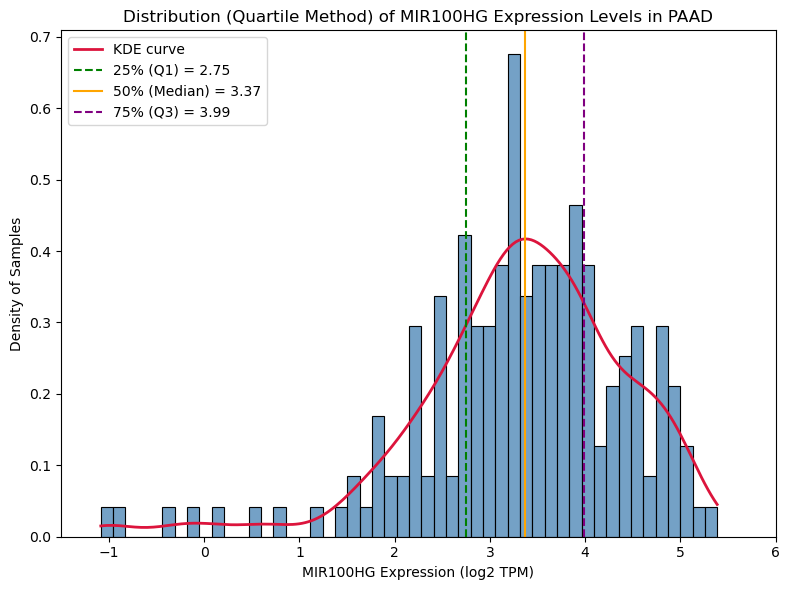


[PAAD] Top 33% / Bottom 33% Grouping Method:

[PAAD] High threshold (Top 33% = 3.82): 61 samples labeled as High
[PAAD] Low threshold (Bottom 33% = 2.98): 61 samples labeled as Low
[PAAD] Number of discarded samples: 61


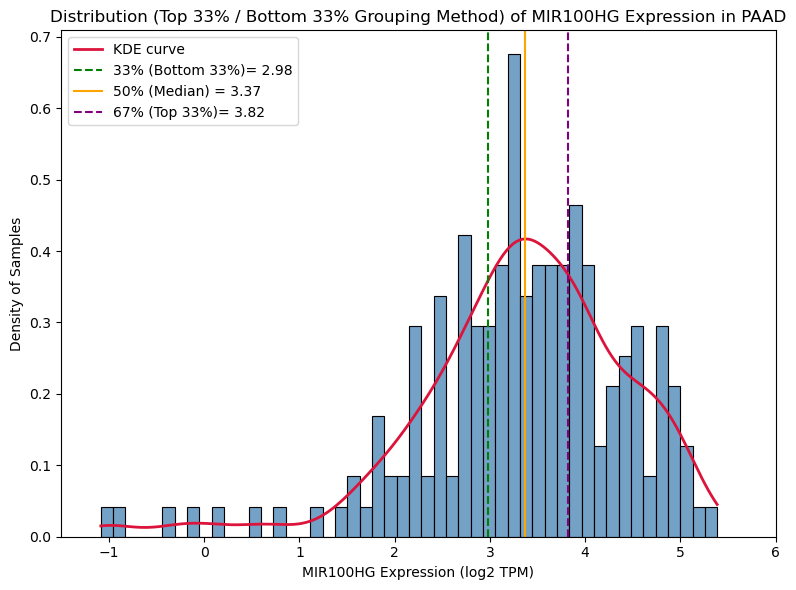


[PAAD] Top 40% / Bottom 40% Grouping Method:

[PAAD] High threshold (Top 40% = 3.61): 74 samples labeled as High
[PAAD] Low threshold (Bottom 40% = 3.21): 73 samples labeled as Low
[PAAD] Number of discarded samples: 36


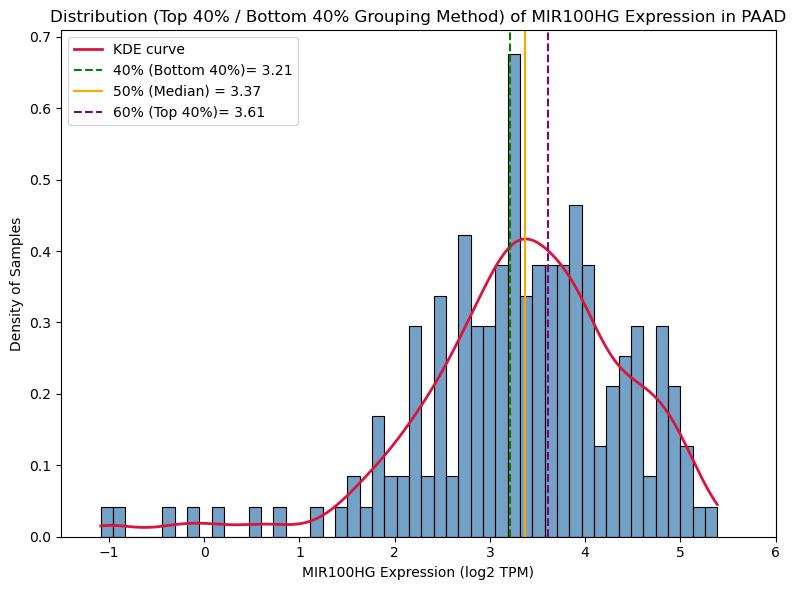

In [15]:
# Step 1: Retrieve MIR100HG expression values for PAAD samples and compute quartiles
mir100hg_mask_PAAD = (df_expr_PAAD["HGNC_symbol"] == "MIR100HG")
df_mir100hg_PAAD = df_expr_PAAD[mir100hg_mask_PAAD]

# Check if the MIR100HG row exists in the DataFrame
if df_mir100hg_PAAD.empty:
    print("[PAAD] No row found for MIR100HG in df_expr_PAAD.")
else:
    # Identify all sample columns excluding the HGNC_symbol column
    sample_cols_PAAD = [col for col in df_mir100hg_PAAD.columns if col != "HGNC_symbol"]
    # Extract MIR100HG expression values for each sample and convert to float
    mir100hg_vals_PAAD = df_mir100hg_PAAD[sample_cols_PAAD].iloc[0].astype(float)
    print(f"[PAAD] MIR100HG expression extracted for {len(mir100hg_vals_PAAD)} samples.")

    # Calculate Q1 (25%), median (50%), and Q3 (75%) quantiles
    q1_val_PAAD = mir100hg_vals_PAAD.quantile(0.25) # 25th percentile
    median_val_PAAD = mir100hg_vals_PAAD.median()   # Median
    q3_val_PAAD = mir100hg_vals_PAAD.quantile(0.75) # 75th percentile

    # Count the samples that fall into High (≥ Q3), Low (≤ Q1), and Discarded (remaining)
    n_high_PAAD = (mir100hg_vals_PAAD >= q3_val_PAAD).sum()
    n_low_PAAD = (mir100hg_vals_PAAD <= q1_val_PAAD).sum()
    n_discarded_PAAD = len(mir100hg_vals_PAAD) - n_high_PAAD - n_low_PAAD

    print("\n[PAAD] Quartile-based Grouping Method:")
    print(f"\n[PAAD] High threshold (Q3 = {q3_val_PAAD:.2f}): {n_high_PAAD} samples labeled as High")
    print(f"[PAAD] Low threshold (Q1 = {q1_val_PAAD:.2f}): {n_low_PAAD} samples labeled as Low")
    print(f"[PAAD] Number of discarded samples: {n_discarded_PAAD}")

    # Assign labels ("High", "Low", or "Discarded") for each sample based on quartiles
    labels_PAAD = []
    for expr_val in mir100hg_vals_PAAD:
        if expr_val >= q3_val_PAAD:
            labels_PAAD.append("High")
        elif expr_val <= q1_val_PAAD:
            labels_PAAD.append("Low")
        else:
            labels_PAAD.append("Discarded")

    # Build a DataFrame containing sample IDs, MIR100HG expression, and assigned labels
    df_mir100hg_labels_PAAD = pd.DataFrame({
        "Sample": mir100hg_vals_PAAD.index,
        "MIR100HG_Expression": mir100hg_vals_PAAD.values,
        "MIR100HG_Expression_Level": labels_PAAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_quartile_extremes_PAAD = df_mir100hg_labels_PAAD[
        df_mir100hg_labels_PAAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    print("\n[PAAD] Samples labeled as 'High' or 'Low' (Quartile Method):")
    display(df_mir100hg_quartile_extremes_PAAD.head(10))

    # Plot a histogram of MIR100HG expression with overlaid KDE, highlighting Q1, median, Q3
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PAAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-1.5, 6)
    sns.kdeplot(
        mir100hg_vals_PAAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-1.5, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=q1_val_PAAD, color="green",  linestyle="--", label=f"25% (Q1) = {q1_val_PAAD:.2f}")
    plt.axvline(x=median_val_PAAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PAAD:.2f}")
    plt.axvline(x=q3_val_PAAD, color="purple", linestyle="--", label=f"75% (Q3) = {q3_val_PAAD:.2f}")
    plt.title("Distribution (Quartile Method) of MIR100HG Expression Levels in PAAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 2: 33%-Based Grouping (Top 33% / Bottom 33%)
    
    # Calculate the Top 33% and Bottom 33% quantiles
    lower_33_PAAD = mir100hg_vals_PAAD.quantile(0.33)
    upper_33_PAAD = mir100hg_vals_PAAD.quantile(0.67)

    n_high_33 = (mir100hg_vals_PAAD >= upper_33_PAAD).sum()
    n_low_33 = (mir100hg_vals_PAAD <= lower_33_PAAD).sum()
    n_discarded_33 = len(mir100hg_vals_PAAD) - n_high_33 - n_low_33

    print("\n[PAAD] Top 33% / Bottom 33% Grouping Method:")
    print(f"\n[PAAD] High threshold (Top 33% = {upper_33_PAAD:.2f}): {n_high_33} samples labeled as High")
    print(f"[PAAD] Low threshold (Bottom 33% = {lower_33_PAAD:.2f}): {n_low_33} samples labeled as Low")
    print(f"[PAAD] Number of discarded samples: {n_discarded_33}")

    # Label each sample using the Top 33% / Bottom 33% grouping method
    labels_33_PAAD = []
    for val in mir100hg_vals_PAAD:
        if val >= upper_33_PAAD:
            labels_33_PAAD.append("High")
        elif val <= lower_33_PAAD:
            labels_33_PAAD.append("Low")
        else:
            labels_33_PAAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_33_labels_PAAD = pd.DataFrame({
        "Sample": mir100hg_vals_PAAD.index,
        "MIR100HG_Expression": mir100hg_vals_PAAD.values,
        "MIR100HG_Expression_Level": labels_33_PAAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_33_extremes_PAAD = df_mir100hg_33_labels_PAAD[
        df_mir100hg_33_labels_PAAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 33% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PAAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-1.5, 6)
    sns.kdeplot(
        mir100hg_vals_PAAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-1.5, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_33_PAAD,  color="green",  linestyle="--", label=f"33% (Bottom 33%)= {lower_33_PAAD:.2f}")
    plt.axvline(x=median_val_PAAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PAAD:.2f}")
    plt.axvline(x=upper_33_PAAD,  color="purple", linestyle="--", label=f"67% (Top 33%)= {upper_33_PAAD:.2f}")
    
    plt.title("Distribution (Top 33% / Bottom 33% Grouping Method) of MIR100HG Expression in PAAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 3: 40%-Based Grouping (Top 40% / Bottom 40%)

    # Calculate the Top 40% and Bottom 30% quantiles
    lower_40_PAAD = mir100hg_vals_PAAD.quantile(0.40)
    upper_40_PAAD = mir100hg_vals_PAAD.quantile(0.60)

    n_high_40 = (mir100hg_vals_PAAD >= upper_40_PAAD).sum()
    n_low_40 = (mir100hg_vals_PAAD <= lower_40_PAAD).sum()
    n_discarded_40 = len(mir100hg_vals_PAAD) - n_high_40 - n_low_40

    print("\n[PAAD] Top 40% / Bottom 40% Grouping Method:")
    print(f"\n[PAAD] High threshold (Top 40% = {upper_40_PAAD:.2f}): {n_high_40} samples labeled as High")
    print(f"[PAAD] Low threshold (Bottom 40% = {lower_40_PAAD:.2f}): {n_low_40} samples labeled as Low")
    print(f"[PAAD] Number of discarded samples: {n_discarded_40}")

    # Label each sample using the Top 40% / Bottom 40% grouping method
    labels_40_PAAD = []
    for val in mir100hg_vals_PAAD:
        if val >= upper_40_PAAD:
            labels_40_PAAD.append("High")
        elif val <= lower_40_PAAD:
            labels_40_PAAD.append("Low")
        else:
            labels_40_PAAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_40_labels_PAAD = pd.DataFrame({
        "Sample": mir100hg_vals_PAAD.index,
        "MIR100HG_Expression": mir100hg_vals_PAAD.values,
        "MIR100HG_Expression_Level": labels_40_PAAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_40_extremes_PAAD = df_mir100hg_40_labels_PAAD[
        df_mir100hg_40_labels_PAAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 40% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PAAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-1.5, 6)
    sns.kdeplot(
        mir100hg_vals_PAAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-1.5, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_40_PAAD, color="green",  linestyle="--", label=f"40% (Bottom 40%)= {lower_40_PAAD:.2f}")
    plt.axvline(x=median_val_PAAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PAAD:.2f}")
    plt.axvline(x=upper_40_PAAD, color="purple", linestyle="--", label=f"60% (Top 40%)= {upper_40_PAAD:.2f}")
    
    plt.title("Distribution (Top 40% / Bottom 40% Grouping Method) of MIR100HG Expression in PAAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subsection 4.2: LUAD-Specific Extraction and High/Low Sample Isolation

In this subsection, we group MIR100HG expression into different categories by using three distinct grouping methods: 
1) quartiles (Top 25% / Bottom 25%), 
2) Top 33% / Bottom 33%, 
3) Top 40% / Bottom 40%. 

[LUAD] MIR100HG expression extracted for 543 samples.

[LUAD] Quartile-based Grouping Method:

[LUAD] High threshold (Q3 = 2.70): 136 samples labeled as High
[LUAD] Low threshold (Q1 = 1.26): 136 samples labeled as Low
[LUAD] Number of discarded samples: 271

[LUAD] Samples labeled as 'High' or 'Low' (Quartile Method):


Sample  MIR100HG_Expression MIR100HG_Expression_Level
3   TCGA-64-1679-01               3.0323                      High
5   TCGA-55-6982-01               2.8034                      High
7      TCGA-73-4666               5.4774                      High
8   TCGA-MN-A4N1-01               0.9343                       Low
9   TCGA-55-7911-01               0.3460                       Low
13  TCGA-55-6712-01               3.4304                      High
14  TCGA-97-7553-01               3.0740                      High
16  TCGA-50-8460-01               3.0671                      High
17  TCGA-50-5933-01               4.3583                      High
18  TCGA-50-5933-11               4.3583                      High

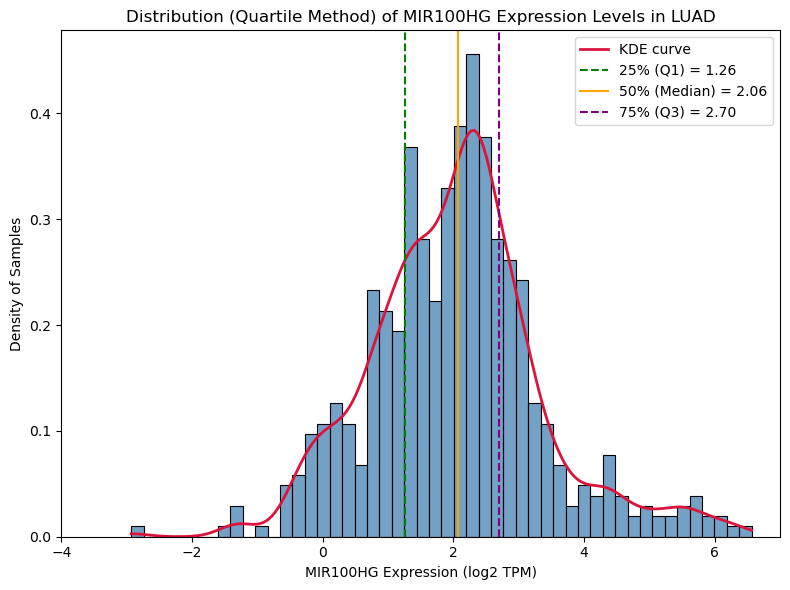


[LUAD] Top 33% / Bottom 33% Grouping Method:

[LUAD] High threshold (Top 33% = 2.44): 179 samples labeled as High
[LUAD] Low threshold (Bottom 33% = 1.48): 179 samples labeled as Low
[LUAD] Number of discarded samples: 185


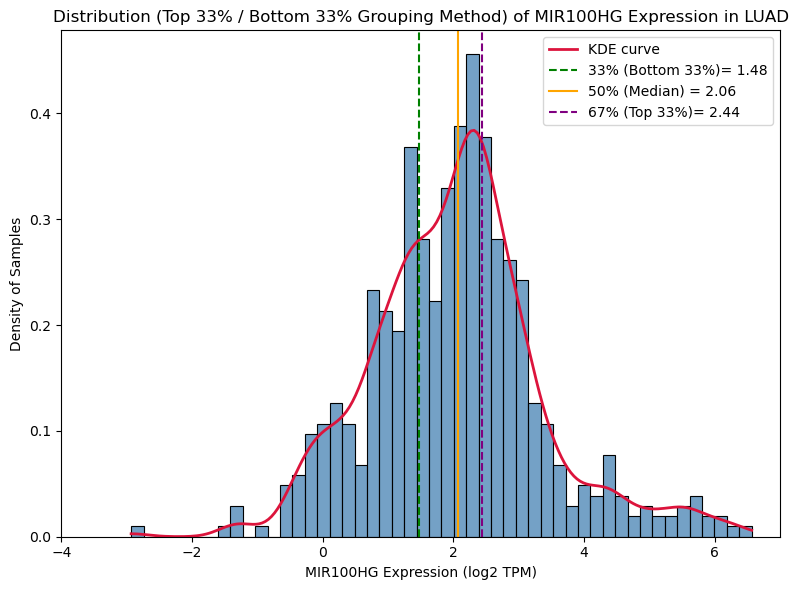


[LUAD] Top 40% / Bottom 40% Grouping Method:

[LUAD] High threshold (Top 40% = 2.33): 217 samples labeled as High
[LUAD] Low threshold (Bottom 40% = 1.75): 218 samples labeled as Low
[LUAD] Number of discarded samples: 108


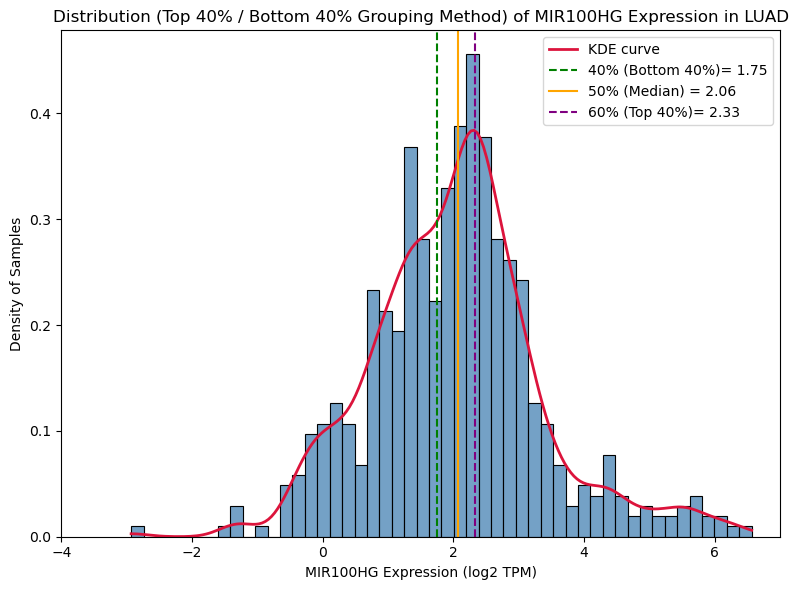

In [18]:
# Step 1: Retrieve MIR100HG expression values for LUAD samples and compute quartiles
mir100hg_mask_LUAD = (df_expr_LUAD["HGNC_symbol"] == "MIR100HG")
df_mir100hg_LUAD = df_expr_LUAD[mir100hg_mask_LUAD]

# Check if the MIR100HG row exists in the DataFrame
if df_mir100hg_LUAD.empty:
    print("[LUAD] No row found for MIR100HG in df_expr_LUAD.")
else:
    # Identify all sample columns excluding the HGNC_symbol column
    sample_cols_LUAD = [col for col in df_mir100hg_LUAD.columns if col != "HGNC_symbol"]
    # Extract MIR100HG expression values for each sample and convert to float
    mir100hg_vals_LUAD = df_mir100hg_LUAD[sample_cols_LUAD].iloc[0].astype(float)
    print(f"[LUAD] MIR100HG expression extracted for {len(mir100hg_vals_LUAD)} samples.")

    # Calculate Q1 (25%), median (50%), and Q3 (75%) quantiles
    q1_val_LUAD = mir100hg_vals_LUAD.quantile(0.25) # 25th percentile
    median_val_LUAD = mir100hg_vals_LUAD.median()   # Median
    q3_val_LUAD = mir100hg_vals_LUAD.quantile(0.75) # 75th percentile

    # Count the samples that fall into High (≥ Q3), Low (≤ Q1), and Discarded (remaining)
    n_high_LUAD = (mir100hg_vals_LUAD >= q3_val_LUAD).sum()
    n_low_LUAD = (mir100hg_vals_LUAD <= q1_val_LUAD).sum()
    n_discarded_LUAD = len(mir100hg_vals_LUAD) - n_high_LUAD - n_low_LUAD

    print("\n[LUAD] Quartile-based Grouping Method:")
    print(f"\n[LUAD] High threshold (Q3 = {q3_val_LUAD:.2f}): {n_high_LUAD} samples labeled as High")
    print(f"[LUAD] Low threshold (Q1 = {q1_val_LUAD:.2f}): {n_low_LUAD} samples labeled as Low")
    print(f"[LUAD] Number of discarded samples: {n_discarded_LUAD}")

    # Assign labels ("High", "Low", or "Discarded") for each sample based on quartiles
    labels_LUAD = []
    for expr_val in mir100hg_vals_LUAD:
        if expr_val >= q3_val_LUAD:
            labels_LUAD.append("High")
        elif expr_val <= q1_val_LUAD:
            labels_LUAD.append("Low")
        else:
            labels_LUAD.append("Discarded")

    # Build a DataFrame containing sample IDs, MIR100HG expression, and assigned labels
    df_mir100hg_labels_LUAD = pd.DataFrame({
        "Sample": mir100hg_vals_LUAD.index,
        "MIR100HG_Expression": mir100hg_vals_LUAD.values,
        "MIR100HG_Expression_Level": labels_LUAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_quartile_extremes_LUAD = df_mir100hg_labels_LUAD[
        df_mir100hg_labels_LUAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    print("\n[LUAD] Samples labeled as 'High' or 'Low' (Quartile Method):")
    display(df_mir100hg_quartile_extremes_LUAD.head(10))

    # Plot a histogram of MIR100HG expression with overlaid KDE, highlighting Q1, median, Q3
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_LUAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 7)
    sns.kdeplot(
        mir100hg_vals_LUAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=q1_val_LUAD, color="green",  linestyle="--", label=f"25% (Q1) = {q1_val_LUAD:.2f}")
    plt.axvline(x=median_val_LUAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_LUAD:.2f}")
    plt.axvline(x=q3_val_LUAD, color="purple", linestyle="--", label=f"75% (Q3) = {q3_val_LUAD:.2f}")
    plt.title("Distribution (Quartile Method) of MIR100HG Expression Levels in LUAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 2: 33%-Based Grouping (Top 33% / Bottom 33%)
    
    # Calculate the Top 33% and Bottom 33% quantiles
    lower_33_LUAD = mir100hg_vals_LUAD.quantile(0.33)
    upper_33_LUAD = mir100hg_vals_LUAD.quantile(0.67)

    n_high_33 = (mir100hg_vals_LUAD >= upper_33_LUAD).sum()
    n_low_33 = (mir100hg_vals_LUAD <= lower_33_LUAD).sum()
    n_discarded_33 = len(mir100hg_vals_LUAD) - n_high_33 - n_low_33

    print("\n[LUAD] Top 33% / Bottom 33% Grouping Method:")
    print(f"\n[LUAD] High threshold (Top 33% = {upper_33_LUAD:.2f}): {n_high_33} samples labeled as High")
    print(f"[LUAD] Low threshold (Bottom 33% = {lower_33_LUAD:.2f}): {n_low_33} samples labeled as Low")
    print(f"[LUAD] Number of discarded samples: {n_discarded_33}")

    # Label each sample using the Top 33% / Bottom 33% grouping method
    labels_33_LUAD = []
    for val in mir100hg_vals_LUAD:
        if val >= upper_33_LUAD:
            labels_33_LUAD.append("High")
        elif val <= lower_33_LUAD:
            labels_33_LUAD.append("Low")
        else:
            labels_33_LUAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_33_labels_LUAD = pd.DataFrame({
        "Sample": mir100hg_vals_LUAD.index,
        "MIR100HG_Expression": mir100hg_vals_LUAD.values,
        "MIR100HG_Expression_Level": labels_33_LUAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_33_extremes_LUAD = df_mir100hg_33_labels_LUAD[
        df_mir100hg_33_labels_LUAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 33% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_LUAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 7)
    sns.kdeplot(
        mir100hg_vals_LUAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_33_LUAD,  color="green",  linestyle="--", label=f"33% (Bottom 33%)= {lower_33_LUAD:.2f}")
    plt.axvline(x=median_val_LUAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_LUAD:.2f}")
    plt.axvline(x=upper_33_LUAD,  color="purple", linestyle="--", label=f"67% (Top 33%)= {upper_33_LUAD:.2f}")
    
    plt.title("Distribution (Top 33% / Bottom 33% Grouping Method) of MIR100HG Expression in LUAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 3: 40%-Based Grouping (Top 40% / Bottom 40%)

    # Calculate the Top 40% and Bottom 40% quantiles
    lower_40_LUAD = mir100hg_vals_LUAD.quantile(0.40)
    upper_40_LUAD = mir100hg_vals_LUAD.quantile(0.60)

    n_high_40 = (mir100hg_vals_LUAD >= upper_40_LUAD).sum()
    n_low_40 = (mir100hg_vals_LUAD <= lower_40_LUAD).sum()
    n_discarded_40 = len(mir100hg_vals_LUAD) - n_high_40 - n_low_40

    print("\n[LUAD] Top 40% / Bottom 40% Grouping Method:")
    print(f"\n[LUAD] High threshold (Top 40% = {upper_40_LUAD:.2f}): {n_high_40} samples labeled as High")
    print(f"[LUAD] Low threshold (Bottom 40% = {lower_40_LUAD:.2f}): {n_low_40} samples labeled as Low")
    print(f"[LUAD] Number of discarded samples: {n_discarded_40}")

    # Label each sample using the Top 40% / Bottom 40% grouping method
    labels_40_LUAD = []
    for val in mir100hg_vals_LUAD:
        if val >= upper_40_LUAD:
            labels_40_LUAD.append("High")
        elif val <= lower_40_LUAD:
            labels_40_LUAD.append("Low")
        else:
            labels_40_LUAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_40_labels_LUAD = pd.DataFrame({
        "Sample": mir100hg_vals_LUAD.index,
        "MIR100HG_Expression": mir100hg_vals_LUAD.values,
        "MIR100HG_Expression_Level": labels_40_LUAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_40_extremes_LUAD = df_mir100hg_40_labels_LUAD[
        df_mir100hg_40_labels_LUAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 40% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_LUAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 7)
    sns.kdeplot(
        mir100hg_vals_LUAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_40_LUAD, color="green",  linestyle="--", label=f"40% (Bottom 40%)= {lower_40_LUAD:.2f}")
    plt.axvline(x=median_val_LUAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_LUAD:.2f}")
    plt.axvline(x=upper_40_LUAD, color="purple", linestyle="--", label=f"60% (Top 40%)= {upper_40_LUAD:.2f}")
    
    plt.title("Distribution (Top 40% / Bottom 40% Grouping Method) of MIR100HG Expression in LUAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subsection 4.3: PRAD-Specific Extraction and High/Low Sample Isolation

In this subsection, we group MIR100HG expression into different categories by using three distinct grouping methods: 
1) quartiles (Top 25% / Bottom 25%), 
2) Top 33% / Bottom 33%, 
3) Top 40% / Bottom 40%. 

[PRAD] MIR100HG expression extracted for 546 samples.

[PRAD] Quartile-based Grouping Method:

[PRAD] High threshold (Q3 = 3.40): 137 samples labeled as High
[PRAD] Low threshold (Q1 = 1.94): 137 samples labeled as Low
[PRAD] Number of discarded samples: 272

[PRAD] Samples labeled as 'High' or 'Low' (Quartile Method):


Sample  MIR100HG_Expression MIR100HG_Expression_Level
4   TCGA-EJ-8468-01               3.5706                      High
7   TCGA-ZG-A9MC-01               3.8085                      High
10  TCGA-M7-A722-01               0.6425                       Low
11  TCGA-VP-A879-01               3.8818                      High
14  TCGA-KK-A8II-01               0.6880                       Low
17  TCGA-YL-A8HJ-01               3.8481                      High
18  TCGA-ZG-A9L5-01               1.8840                       Low
19  TCGA-XK-AAJT-01               3.7017                      High
23  TCGA-QU-A6IL-01               1.0151                       Low
25  TCGA-HC-7752-01               0.7146                       Low

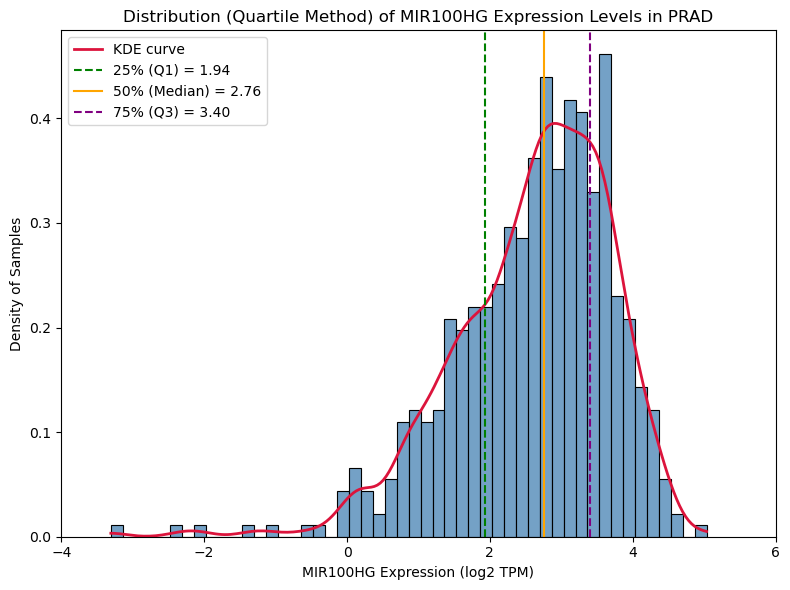


[PRAD] Top 33% / Bottom 33% Grouping Method:

[PRAD] High threshold (Top 33% = 3.21): 180 samples labeled as High
[PRAD] Low threshold (Bottom 33% = 2.29): 182 samples labeled as Low
[PRAD] Number of discarded samples: 184


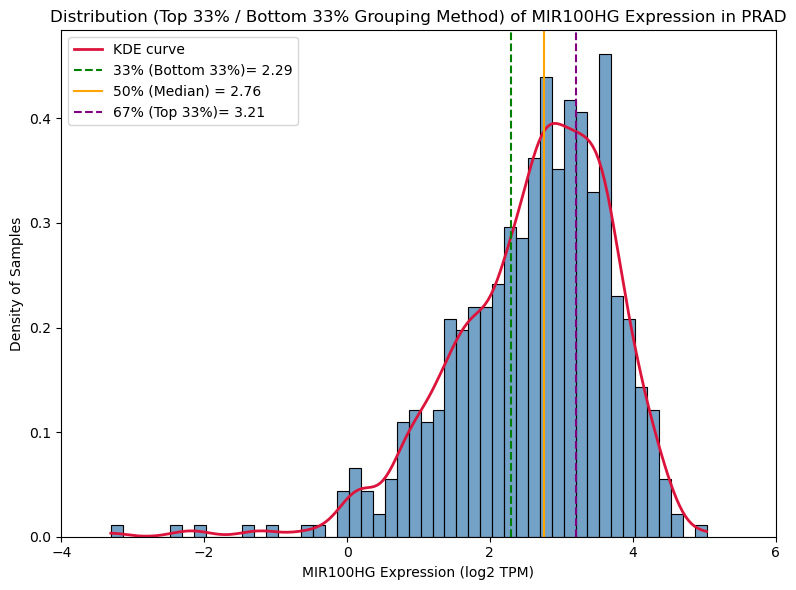


[PRAD] Top 40% / Bottom 40% Grouping Method:

[PRAD] High threshold (Top 40% = 3.03): 219 samples labeled as High
[PRAD] Low threshold (Bottom 40% = 2.51): 219 samples labeled as Low
[PRAD] Number of discarded samples: 108


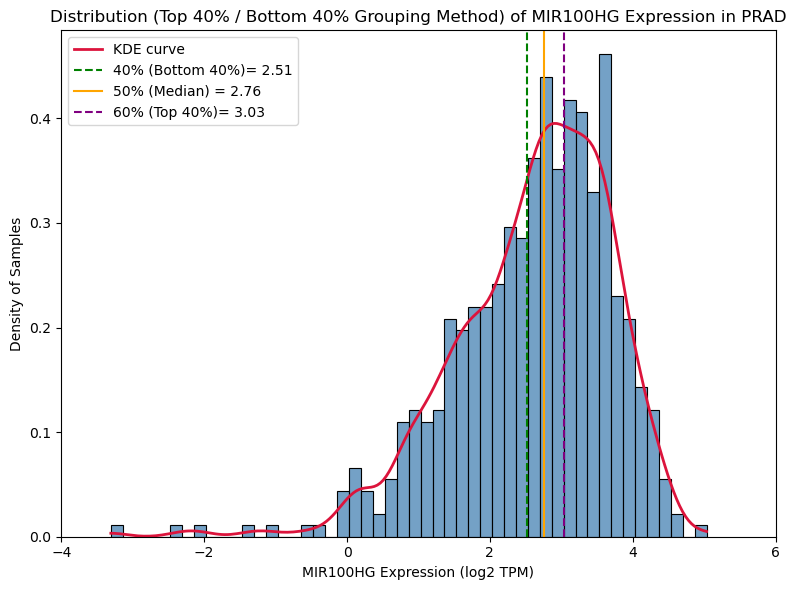

In [21]:
# Step 1: Retrieve MIR100HG expression values for PRAD samples and compute quartiles
mir100hg_mask_PRAD = (df_expr_PRAD["HGNC_symbol"] == "MIR100HG")
df_mir100hg_PRAD = df_expr_PRAD[mir100hg_mask_PRAD]

# Check if the MIR100HG row exists in the DataFrame
if df_mir100hg_PRAD.empty:
    print("[PRAD] No row found for MIR100HG in df_expr_PRAD.")
else:
    # Identify all sample columns excluding the HGNC_symbol column
    sample_cols_PRAD = [col for col in df_mir100hg_PRAD.columns if col != "HGNC_symbol"]
    # Extract MIR100HG expression values for each sample and convert to float
    mir100hg_vals_PRAD = df_mir100hg_PRAD[sample_cols_PRAD].iloc[0].astype(float)
    print(f"[PRAD] MIR100HG expression extracted for {len(mir100hg_vals_PRAD)} samples.")

    # Calculate Q1 (25%), median (50%), and Q3 (75%) quantiles
    q1_val_PRAD = mir100hg_vals_PRAD.quantile(0.25) # 25th percentile
    median_val_PRAD = mir100hg_vals_PRAD.median()   # Median
    q3_val_PRAD = mir100hg_vals_PRAD.quantile(0.75) # 75th percentile

    # Count the samples that fall into High (≥ Q3), Low (≤ Q1), and Discarded (remaining)
    n_high_PRAD = (mir100hg_vals_PRAD >= q3_val_PRAD).sum()
    n_low_PRAD = (mir100hg_vals_PRAD <= q1_val_PRAD).sum()
    n_discarded_PRAD = len(mir100hg_vals_PRAD) - n_high_PRAD - n_low_PRAD

    print("\n[PRAD] Quartile-based Grouping Method:")
    print(f"\n[PRAD] High threshold (Q3 = {q3_val_PRAD:.2f}): {n_high_PRAD} samples labeled as High")
    print(f"[PRAD] Low threshold (Q1 = {q1_val_PRAD:.2f}): {n_low_PRAD} samples labeled as Low")
    print(f"[PRAD] Number of discarded samples: {n_discarded_PRAD}")

    # Assign labels ("High", "Low", or "Discarded") for each sample based on quartiles
    labels_PRAD = []
    for expr_val in mir100hg_vals_PRAD:
        if expr_val >= q3_val_PRAD:
            labels_PRAD.append("High")
        elif expr_val <= q1_val_PRAD:
            labels_PRAD.append("Low")
        else:
            labels_PRAD.append("Discarded")

    # Build a DataFrame containing sample IDs, MIR100HG expression, and assigned labels
    df_mir100hg_labels_PRAD = pd.DataFrame({
        "Sample": mir100hg_vals_PRAD.index,
        "MIR100HG_Expression": mir100hg_vals_PRAD.values,
        "MIR100HG_Expression_Level": labels_PRAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_quartile_extremes_PRAD = df_mir100hg_labels_PRAD[
        df_mir100hg_labels_PRAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    print("\n[PRAD] Samples labeled as 'High' or 'Low' (Quartile Method):")
    display(df_mir100hg_quartile_extremes_PRAD.head(10))

    # Plot a histogram of MIR100HG expression with overlaid KDE, highlighting Q1, median, Q3
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PRAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 6)
    sns.kdeplot(
        mir100hg_vals_PRAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=q1_val_PRAD, color="green",  linestyle="--", label=f"25% (Q1) = {q1_val_PRAD:.2f}")
    plt.axvline(x=median_val_PRAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PRAD:.2f}")
    plt.axvline(x=q3_val_PRAD, color="purple", linestyle="--", label=f"75% (Q3) = {q3_val_PRAD:.2f}")
    plt.title("Distribution (Quartile Method) of MIR100HG Expression Levels in PRAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 2: 33%-Based Grouping (Top 33% / Bottom 33%)
    
    # Calculate the Top 33% and Bottom 33% quantiles
    lower_33_PRAD = mir100hg_vals_PRAD.quantile(0.33)
    upper_33_PRAD = mir100hg_vals_PRAD.quantile(0.67)

    n_high_33 = (mir100hg_vals_PRAD >= upper_33_PRAD).sum()
    n_low_33 = (mir100hg_vals_PRAD <= lower_33_PRAD).sum()
    n_discarded_33 = len(mir100hg_vals_PRAD) - n_high_33 - n_low_33

    print("\n[PRAD] Top 33% / Bottom 33% Grouping Method:")
    print(f"\n[PRAD] High threshold (Top 33% = {upper_33_PRAD:.2f}): {n_high_33} samples labeled as High")
    print(f"[PRAD] Low threshold (Bottom 33% = {lower_33_PRAD:.2f}): {n_low_33} samples labeled as Low")
    print(f"[PRAD] Number of discarded samples: {n_discarded_33}")

    # Label each sample using the Top 33% / Bottom 33% grouping method
    labels_33_PRAD = []
    for val in mir100hg_vals_PRAD:
        if val >= upper_33_PRAD:
            labels_33_PRAD.append("High")
        elif val <= lower_33_PRAD:
            labels_33_PRAD.append("Low")
        else:
            labels_33_PRAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_33_labels_PRAD = pd.DataFrame({
        "Sample": mir100hg_vals_PRAD.index,
        "MIR100HG_Expression": mir100hg_vals_PRAD.values,
        "MIR100HG_Expression_Level": labels_33_PRAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_33_extremes_PRAD = df_mir100hg_33_labels_PRAD[
        df_mir100hg_33_labels_PRAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 33% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PRAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 6)
    sns.kdeplot(
        mir100hg_vals_PRAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_33_PRAD,  color="green",  linestyle="--", label=f"33% (Bottom 33%)= {lower_33_PRAD:.2f}")
    plt.axvline(x=median_val_PRAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PRAD:.2f}")
    plt.axvline(x=upper_33_PRAD,  color="purple", linestyle="--", label=f"67% (Top 33%)= {upper_33_PRAD:.2f}")
    
    plt.title("Distribution (Top 33% / Bottom 33% Grouping Method) of MIR100HG Expression in PRAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 3: 40%-Based Grouping (Top 40% / Bottom 40%)

    # Calculate the Top 40% and Bottom 40% quantiles
    lower_40_PRAD = mir100hg_vals_PRAD.quantile(0.40)
    upper_40_PRAD = mir100hg_vals_PRAD.quantile(0.60)

    n_high_40 = (mir100hg_vals_PRAD >= upper_40_PRAD).sum()
    n_low_40 = (mir100hg_vals_PRAD <= lower_40_PRAD).sum()
    n_discarded_40 = len(mir100hg_vals_PRAD) - n_high_40 - n_low_40

    print("\n[PRAD] Top 40% / Bottom 40% Grouping Method:")
    print(f"\n[PRAD] High threshold (Top 40% = {upper_40_PRAD:.2f}): {n_high_40} samples labeled as High")
    print(f"[PRAD] Low threshold (Bottom 40% = {lower_40_PRAD:.2f}): {n_low_40} samples labeled as Low")
    print(f"[PRAD] Number of discarded samples: {n_discarded_40}")

    # Label each sample using the Top 40% / Bottom 40% grouping method
    labels_40_PRAD = []
    for val in mir100hg_vals_PRAD:
        if val >= upper_40_PRAD:
            labels_40_PRAD.append("High")
        elif val <= lower_40_PRAD:
            labels_40_PRAD.append("Low")
        else:
            labels_40_PRAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_40_labels_PRAD = pd.DataFrame({
        "Sample": mir100hg_vals_PRAD.index,
        "MIR100HG_Expression": mir100hg_vals_PRAD.values,
        "MIR100HG_Expression_Level": labels_40_PRAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_40_extremes_PRAD = df_mir100hg_40_labels_PRAD[
        df_mir100hg_40_labels_PRAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 40% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_PRAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-4, 6)
    sns.kdeplot(
        mir100hg_vals_PRAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-4, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_40_PRAD, color="green",  linestyle="--", label=f"40% (Bottom 40%)= {lower_40_PRAD:.2f}")
    plt.axvline(x=median_val_PRAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_PRAD:.2f}")
    plt.axvline(x=upper_40_PRAD, color="purple", linestyle="--", label=f"60% (Top 40%)= {upper_40_PRAD:.2f}")
    
    plt.title("Distribution (Top 40% / Bottom 40% Grouping Method) of MIR100HG Expression in PRAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subsection 4.4: SKCM-Specific Extraction and High/Low Sample Isolation

In this subsection, we group MIR100HG expression into different categories by using three distinct grouping methods: 
1) quartiles (Top 25% / Bottom 25%), 
2) Top 33% / Bottom 33%, 
3) Top 40% / Bottom 40%. 

[SKCM] MIR100HG expression extracted for 104 samples.

[SKCM] Quartile-based Grouping Method:

[SKCM] High threshold (Q3 = 2.34): 26 samples labeled as High
[SKCM] Low threshold (Q1 = -0.65): 26 samples labeled as Low
[SKCM] Number of discarded samples: 52

[SKCM] Samples labeled as 'High' or 'Low' (Quartile Method):


Sample  MIR100HG_Expression MIR100HG_Expression_Level
2   TCGA-BF-A5ER-01              -2.6349                       Low
4   TCGA-EB-A1NK-01              -0.7108                       Low
11  TCGA-GN-A26C-01               2.9488                      High
14  TCGA-ER-A19K-01              -0.9406                       Low
16  TCGA-BF-A3DJ-01               3.4504                      High
18  TCGA-BF-AAOX-01              -1.9379                       Low
20  TCGA-HR-A5NC-01               5.2122                      High
21  TCGA-XV-A9W5-01               4.2181                      High
22  TCGA-WE-A8K4-01              -0.9971                       Low
23  TCGA-EB-A82B-01              -0.7588                       Low

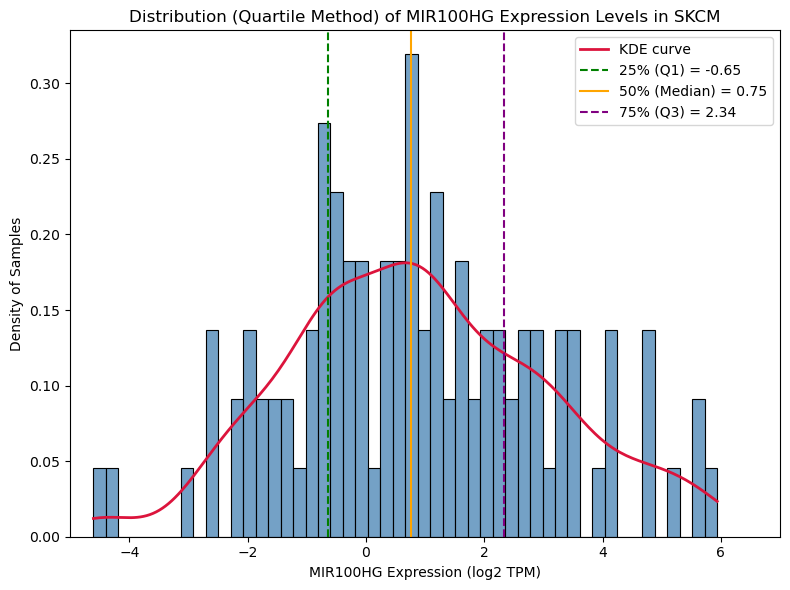


[SKCM] Top 33% / Bottom 33% Grouping Method:

[SKCM] High threshold (Top 33% = 1.64): 34 samples labeled as High
[SKCM] Low threshold (Bottom 33% = -0.22): 34 samples labeled as Low
[SKCM] Number of discarded samples: 36


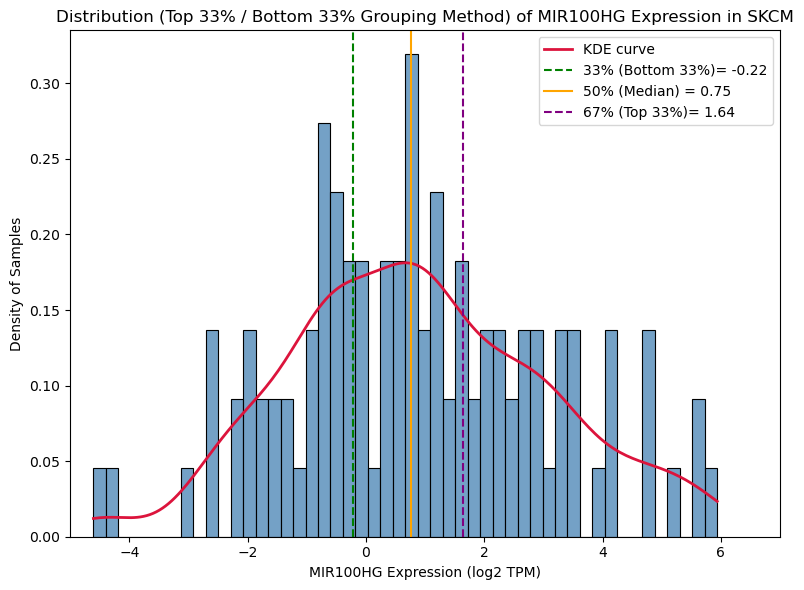


[SKCM] Top 40% / Bottom 40% Grouping Method:

[SKCM] High threshold (Top 40% = 1.19): 42 samples labeled as High
[SKCM] Low threshold (Bottom 40% = 0.28): 42 samples labeled as Low
[SKCM] Number of discarded samples: 20


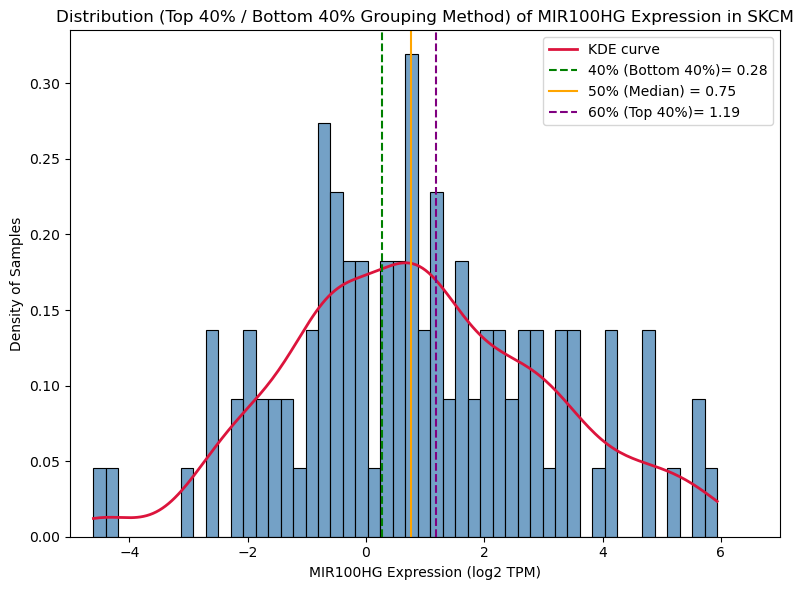

In [24]:
# Step 1: Retrieve MIR100HG expression values for SKCM samples and compute quartiles
mir100hg_mask_SKCM = (df_expr_SKCM["HGNC_symbol"] == "MIR100HG")
df_mir100hg_SKCM = df_expr_SKCM[mir100hg_mask_SKCM]

# Check if the MIR100HG row exists in the DataFrame
if df_mir100hg_SKCM.empty:
    print("[SKCM] No row found for MIR100HG in df_expr_SKCM.")
else:
    # Identify all sample columns excluding the HGNC_symbol column
    sample_cols_SKCM = [col for col in df_mir100hg_SKCM.columns if col != "HGNC_symbol"]
    # Extract MIR100HG expression values for each sample and convert to float
    mir100hg_vals_SKCM = df_mir100hg_SKCM[sample_cols_SKCM].iloc[0].astype(float)
    print(f"[SKCM] MIR100HG expression extracted for {len(mir100hg_vals_SKCM)} samples.")

    # Calculate Q1 (25%), median (50%), and Q3 (75%) quantiles
    q1_val_SKCM = mir100hg_vals_SKCM.quantile(0.25) # 25th percentile
    median_val_SKCM = mir100hg_vals_SKCM.median()   # Median
    q3_val_SKCM = mir100hg_vals_SKCM.quantile(0.75) # 75th percentile

    # Count the samples that fall into High (≥ Q3), Low (≤ Q1), and Discarded (remaining)
    n_high_SKCM = (mir100hg_vals_SKCM >= q3_val_SKCM).sum()
    n_low_SKCM = (mir100hg_vals_SKCM <= q1_val_SKCM).sum()
    n_discarded_SKCM = len(mir100hg_vals_SKCM) - n_high_SKCM - n_low_SKCM

    print("\n[SKCM] Quartile-based Grouping Method:")
    print(f"\n[SKCM] High threshold (Q3 = {q3_val_SKCM:.2f}): {n_high_SKCM} samples labeled as High")
    print(f"[SKCM] Low threshold (Q1 = {q1_val_SKCM:.2f}): {n_low_SKCM} samples labeled as Low")
    print(f"[SKCM] Number of discarded samples: {n_discarded_SKCM}")

    # Assign labels ("High", "Low", or "Discarded") for each sample based on quartiles
    labels_SKCM = []
    for expr_val in mir100hg_vals_SKCM:
        if expr_val >= q3_val_SKCM:
            labels_SKCM.append("High")
        elif expr_val <= q1_val_SKCM:
            labels_SKCM.append("Low")
        else:
            labels_SKCM.append("Discarded")

    # Build a DataFrame containing sample IDs, MIR100HG expression, and assigned labels
    df_mir100hg_labels_SKCM = pd.DataFrame({
        "Sample": mir100hg_vals_SKCM.index,
        "MIR100HG_Expression": mir100hg_vals_SKCM.values,
        "MIR100HG_Expression_Level": labels_SKCM
    })

    # Subset only High and Low labeled samples
    df_mir100hg_quartile_extremes_SKCM = df_mir100hg_labels_SKCM[
        df_mir100hg_labels_SKCM["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    print("\n[SKCM] Samples labeled as 'High' or 'Low' (Quartile Method):")
    display(df_mir100hg_quartile_extremes_SKCM.head(10))

    # Plot a histogram of MIR100HG expression with overlaid KDE, highlighting Q1, median, Q3
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_SKCM,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 7)
    sns.kdeplot(
        mir100hg_vals_SKCM,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=q1_val_SKCM, color="green",  linestyle="--", label=f"25% (Q1) = {q1_val_SKCM:.2f}")
    plt.axvline(x=median_val_SKCM, color="orange", linestyle="-", label=f"50% (Median) = {median_val_SKCM:.2f}")
    plt.axvline(x=q3_val_SKCM, color="purple", linestyle="--", label=f"75% (Q3) = {q3_val_SKCM:.2f}")
    plt.title("Distribution (Quartile Method) of MIR100HG Expression Levels in SKCM")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 2: 33%-Based Grouping (Top 33% / Bottom 33%)
    
    # Calculate the Top 33% and Bottom 33% quantiles
    lower_33_SKCM = mir100hg_vals_SKCM.quantile(0.33)
    upper_33_SKCM = mir100hg_vals_SKCM.quantile(0.67)

    n_high_33 = (mir100hg_vals_SKCM >= upper_33_SKCM).sum()
    n_low_33 = (mir100hg_vals_SKCM <= lower_33_SKCM).sum()
    n_discarded_33 = len(mir100hg_vals_SKCM) - n_high_33 - n_low_33

    print("\n[SKCM] Top 33% / Bottom 33% Grouping Method:")
    print(f"\n[SKCM] High threshold (Top 33% = {upper_33_SKCM:.2f}): {n_high_33} samples labeled as High")
    print(f"[SKCM] Low threshold (Bottom 33% = {lower_33_SKCM:.2f}): {n_low_33} samples labeled as Low")
    print(f"[SKCM] Number of discarded samples: {n_discarded_33}")

    # Label each sample using the Top 33% / Bottom 33% grouping method
    labels_33_SKCM = []
    for val in mir100hg_vals_SKCM:
        if val >= upper_33_SKCM:
            labels_33_SKCM.append("High")
        elif val <= lower_33_SKCM:
            labels_33_SKCM.append("Low")
        else:
            labels_33_SKCM.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_33_labels_SKCM = pd.DataFrame({
        "Sample": mir100hg_vals_SKCM.index,
        "MIR100HG_Expression": mir100hg_vals_SKCM.values,
        "MIR100HG_Expression_Level": labels_33_SKCM
    })

    # Subset only High and Low labeled samples
    df_mir100hg_33_extremes_SKCM = df_mir100hg_33_labels_SKCM[
        df_mir100hg_33_labels_SKCM["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 33% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_SKCM,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 7)
    sns.kdeplot(
        mir100hg_vals_SKCM,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_33_SKCM,  color="green",  linestyle="--", label=f"33% (Bottom 33%)= {lower_33_SKCM:.2f}")
    plt.axvline(x=median_val_SKCM, color="orange", linestyle="-", label=f"50% (Median) = {median_val_SKCM:.2f}")
    plt.axvline(x=upper_33_SKCM,  color="purple", linestyle="--", label=f"67% (Top 33%)= {upper_33_SKCM:.2f}")
    
    plt.title("Distribution (Top 33% / Bottom 33% Grouping Method) of MIR100HG Expression in SKCM")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 3: 40%-Based Grouping (Top 40% / Bottom 40%)

    # Calculate the Top 40% and Bottom 40% quantiles
    lower_40_SKCM = mir100hg_vals_SKCM.quantile(0.40)
    upper_40_SKCM = mir100hg_vals_SKCM.quantile(0.60)

    n_high_40 = (mir100hg_vals_SKCM >= upper_40_SKCM).sum()
    n_low_40 = (mir100hg_vals_SKCM <= lower_40_SKCM).sum()
    n_discarded_40 = len(mir100hg_vals_SKCM) - n_high_40 - n_low_40

    print("\n[SKCM] Top 40% / Bottom 40% Grouping Method:")
    print(f"\n[SKCM] High threshold (Top 40% = {upper_40_SKCM:.2f}): {n_high_40} samples labeled as High")
    print(f"[SKCM] Low threshold (Bottom 40% = {lower_40_SKCM:.2f}): {n_low_40} samples labeled as Low")
    print(f"[SKCM] Number of discarded samples: {n_discarded_40}")

    # Label each sample using the Top 40% / Bottom 40% grouping method
    labels_40_SKCM = []
    for val in mir100hg_vals_SKCM:
        if val >= upper_40_SKCM:
            labels_40_SKCM.append("High")
        elif val <= lower_40_SKCM:
            labels_40_SKCM.append("Low")
        else:
            labels_40_SKCM.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_40_labels_SKCM = pd.DataFrame({
        "Sample": mir100hg_vals_SKCM.index,
        "MIR100HG_Expression": mir100hg_vals_SKCM.values,
        "MIR100HG_Expression_Level": labels_40_SKCM
    })

    # Subset only High and Low labeled samples
    df_mir100hg_40_extremes_SKCM = df_mir100hg_40_labels_SKCM[
        df_mir100hg_40_labels_SKCM["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 40% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_SKCM,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 7)
    sns.kdeplot(
        mir100hg_vals_SKCM,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_40_SKCM, color="green",  linestyle="--", label=f"40% (Bottom 40%)= {lower_40_SKCM:.2f}")
    plt.axvline(x=median_val_SKCM, color="orange", linestyle="-", label=f"50% (Median) = {median_val_SKCM:.2f}")
    plt.axvline(x=upper_40_SKCM, color="purple", linestyle="--", label=f"60% (Top 40%)= {upper_40_SKCM:.2f}")
    
    plt.title("Distribution (Top 40% / Bottom 40% Grouping Method) of MIR100HG Expression in SKCM")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subsection 4.5: STAD-Specific Extraction and High/Low Sample Isolation

In this subsection, we group MIR100HG expression into different categories by using three distinct grouping methods: 
1) quartiles (Top 25% / Bottom 25%), 
2) Top 33% / Bottom 33%, 
3) Top 40% / Bottom 40%. 

[STAD] MIR100HG expression extracted for 416 samples.

[STAD] Quartile-based Grouping Method:

[STAD] High threshold (Q3 = 3.18): 104 samples labeled as High
[STAD] Low threshold (Q1 = 0.68): 104 samples labeled as Low
[STAD] Number of discarded samples: 208

[STAD] Samples labeled as 'High' or 'Low' (Quartile Method):


Sample  MIR100HG_Expression MIR100HG_Expression_Level
0   TCGA-BR-A4J6-01               3.4143                      High
2   TCGA-BR-A4QL-01               0.6425                       Low
4      TCGA-CG-4466               0.4125                       Low
5   TCGA-BR-A4J9-01               5.3733                      High
7      TCGA-CG-4462               4.6702                      High
8   TCGA-IN-8663-01               3.6838                      High
9   TCGA-HU-A4GQ-01               4.1335                      High
10     TCGA-BR-4371               0.0158                       Low
13     TCGA-BR-4363               3.4398                      High
15  TCGA-BR-7196-01               4.9589                      High

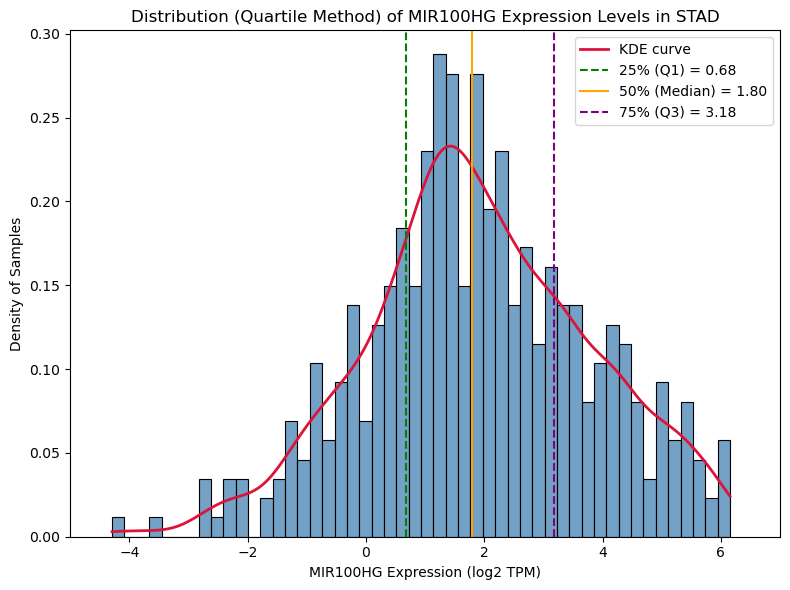


[STAD] Top 33% / Bottom 33% Grouping Method:

[STAD] High threshold (Top 33% = 2.66): 137 samples labeled as High
[STAD] Low threshold (Bottom 33% = 1.14): 137 samples labeled as Low
[STAD] Number of discarded samples: 142


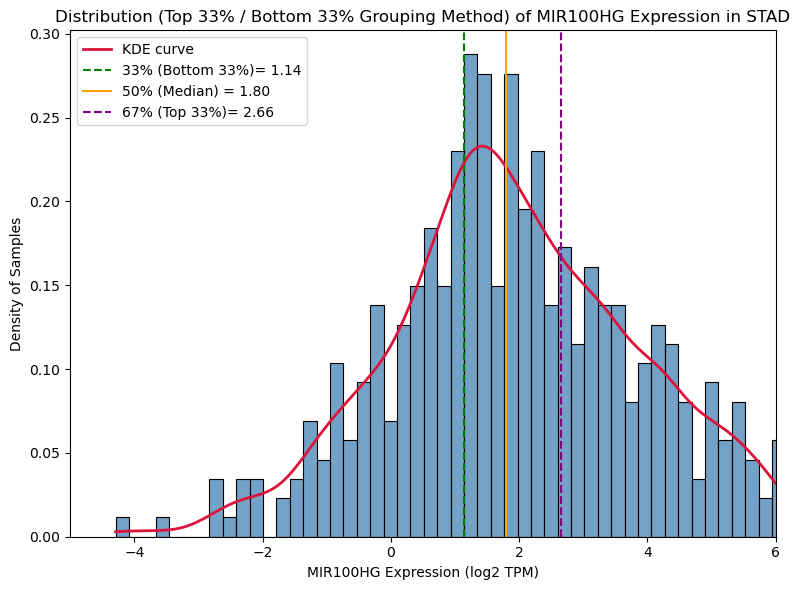


[STAD] Top 40% / Bottom 40% Grouping Method:

[STAD] High threshold (Top 40% = 2.28): 167 samples labeled as High
[STAD] Low threshold (Bottom 40% = 1.38): 168 samples labeled as Low
[STAD] Number of discarded samples: 81


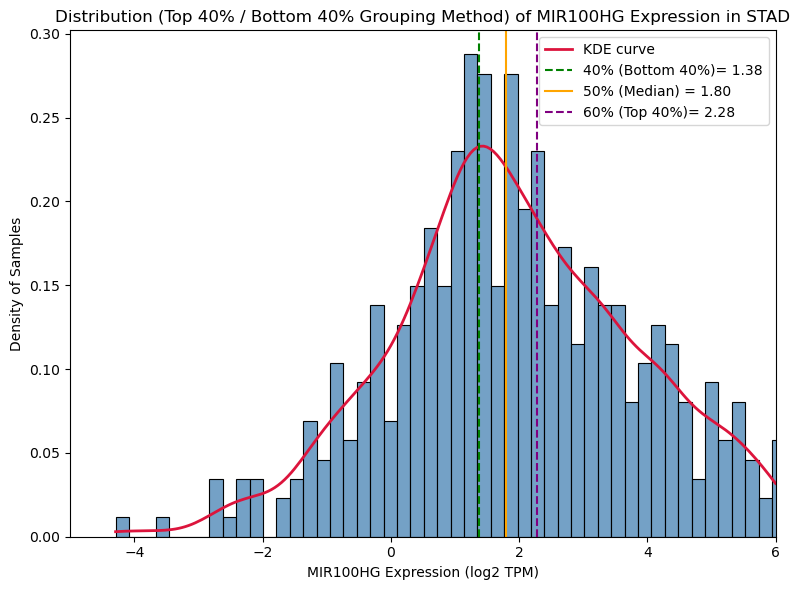

In [27]:
# Step 1: Retrieve MIR100HG expression values for STAD samples and compute quartiles
mir100hg_mask_STAD = (df_expr_STAD["HGNC_symbol"] == "MIR100HG")
df_mir100hg_STAD = df_expr_STAD[mir100hg_mask_STAD]

# Check if the MIR100HG row exists in the DataFrame
if df_mir100hg_STAD.empty:
    print("[STAD] No row found for MIR100HG in df_expr_STAD.")
else:
    # Identify all sample columns excluding the HGNC_symbol column
    sample_cols_STAD = [col for col in df_mir100hg_STAD.columns if col != "HGNC_symbol"]
    # Extract MIR100HG expression values for each sample and convert to float
    mir100hg_vals_STAD = df_mir100hg_STAD[sample_cols_STAD].iloc[0].astype(float)
    print(f"[STAD] MIR100HG expression extracted for {len(mir100hg_vals_STAD)} samples.")

    # Calculate Q1 (25%), median (50%), and Q3 (75%) quantiles
    q1_val_STAD = mir100hg_vals_STAD.quantile(0.25) # 25th percentile
    median_val_STAD = mir100hg_vals_STAD.median()   # Median
    q3_val_STAD = mir100hg_vals_STAD.quantile(0.75) # 75th percentile

    # Count the samples that fall into High (≥ Q3), Low (≤ Q1), and Discarded (remaining)
    n_high_STAD = (mir100hg_vals_STAD >= q3_val_STAD).sum()
    n_low_STAD = (mir100hg_vals_STAD <= q1_val_STAD).sum()
    n_discarded_STAD = len(mir100hg_vals_STAD) - n_high_STAD - n_low_STAD

    print("\n[STAD] Quartile-based Grouping Method:")
    print(f"\n[STAD] High threshold (Q3 = {q3_val_STAD:.2f}): {n_high_STAD} samples labeled as High")
    print(f"[STAD] Low threshold (Q1 = {q1_val_STAD:.2f}): {n_low_STAD} samples labeled as Low")
    print(f"[STAD] Number of discarded samples: {n_discarded_STAD}")

    # Assign labels ("High", "Low", or "Discarded") for each sample based on quartiles
    labels_STAD = []
    for expr_val in mir100hg_vals_STAD:
        if expr_val >= q3_val_STAD:
            labels_STAD.append("High")
        elif expr_val <= q1_val_STAD:
            labels_STAD.append("Low")
        else:
            labels_STAD.append("Discarded")

    # Build a DataFrame containing sample IDs, MIR100HG expression, and assigned labels
    df_mir100hg_labels_STAD = pd.DataFrame({
        "Sample": mir100hg_vals_STAD.index,
        "MIR100HG_Expression": mir100hg_vals_STAD.values,
        "MIR100HG_Expression_Level": labels_STAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_quartile_extremes_STAD = df_mir100hg_labels_STAD[
        df_mir100hg_labels_STAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    print("\n[STAD] Samples labeled as 'High' or 'Low' (Quartile Method):")
    display(df_mir100hg_quartile_extremes_STAD.head(10))

    # Plot a histogram of MIR100HG expression with overlaid KDE, highlighting Q1, median, Q3
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_STAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 7)
    sns.kdeplot(
        mir100hg_vals_STAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 7),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=q1_val_STAD, color="green",  linestyle="--", label=f"25% (Q1) = {q1_val_STAD:.2f}")
    plt.axvline(x=median_val_STAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_STAD:.2f}")
    plt.axvline(x=q3_val_STAD, color="purple", linestyle="--", label=f"75% (Q3) = {q3_val_STAD:.2f}")
    plt.title("Distribution (Quartile Method) of MIR100HG Expression Levels in STAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 2: 33%-Based Grouping (Top 33% / Bottom 33%)
    
    # Calculate the Top 33% and Bottom 33% quantiles
    lower_33_STAD = mir100hg_vals_STAD.quantile(0.33)
    upper_33_STAD = mir100hg_vals_STAD.quantile(0.67)

    n_high_33 = (mir100hg_vals_STAD >= upper_33_STAD).sum()
    n_low_33 = (mir100hg_vals_STAD <= lower_33_STAD).sum()
    n_discarded_33 = len(mir100hg_vals_STAD) - n_high_33 - n_low_33

    print("\n[STAD] Top 33% / Bottom 33% Grouping Method:")
    print(f"\n[STAD] High threshold (Top 33% = {upper_33_STAD:.2f}): {n_high_33} samples labeled as High")
    print(f"[STAD] Low threshold (Bottom 33% = {lower_33_STAD:.2f}): {n_low_33} samples labeled as Low")
    print(f"[STAD] Number of discarded samples: {n_discarded_33}")

    # Label each sample using the Top 33% / Bottom 33% grouping method
    labels_33_STAD = []
    for val in mir100hg_vals_STAD:
        if val >= upper_33_STAD:
            labels_33_STAD.append("High")
        elif val <= lower_33_STAD:
            labels_33_STAD.append("Low")
        else:
            labels_33_STAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_33_labels_STAD = pd.DataFrame({
        "Sample": mir100hg_vals_STAD.index,
        "MIR100HG_Expression": mir100hg_vals_STAD.values,
        "MIR100HG_Expression_Level": labels_33_STAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_33_extremes_STAD = df_mir100hg_33_labels_STAD[
        df_mir100hg_33_labels_STAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 33% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_STAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 6)
    sns.kdeplot(
        mir100hg_vals_STAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_33_STAD,  color="green",  linestyle="--", label=f"33% (Bottom 33%)= {lower_33_STAD:.2f}")
    plt.axvline(x=median_val_STAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_STAD:.2f}")
    plt.axvline(x=upper_33_STAD,  color="purple", linestyle="--", label=f"67% (Top 33%)= {upper_33_STAD:.2f}")
    
    plt.title("Distribution (Top 33% / Bottom 33% Grouping Method) of MIR100HG Expression in STAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 3: 40%-Based Grouping (Top 40% / Bottom 40%)

    # Calculate the Top 40% and Bottom 40% quantiles
    lower_40_STAD = mir100hg_vals_STAD.quantile(0.40)
    upper_40_STAD = mir100hg_vals_STAD.quantile(0.60)

    n_high_40 = (mir100hg_vals_STAD >= upper_40_STAD).sum()
    n_low_40 = (mir100hg_vals_STAD <= lower_40_STAD).sum()
    n_discarded_40 = len(mir100hg_vals_STAD) - n_high_40 - n_low_40

    print("\n[STAD] Top 40% / Bottom 40% Grouping Method:")
    print(f"\n[STAD] High threshold (Top 40% = {upper_40_STAD:.2f}): {n_high_40} samples labeled as High")
    print(f"[STAD] Low threshold (Bottom 40% = {lower_40_STAD:.2f}): {n_low_40} samples labeled as Low")
    print(f"[STAD] Number of discarded samples: {n_discarded_40}")

    # Label each sample using the Top 40% / Bottom 40% grouping method
    labels_40_STAD = []
    for val in mir100hg_vals_STAD:
        if val >= upper_40_STAD:
            labels_40_STAD.append("High")
        elif val <= lower_40_STAD:
            labels_40_STAD.append("Low")
        else:
            labels_40_STAD.append("Discarded")

    # Create a DataFrame of these labels for each sample
    df_mir100hg_40_labels_STAD = pd.DataFrame({
        "Sample": mir100hg_vals_STAD.index,
        "MIR100HG_Expression": mir100hg_vals_STAD.values,
        "MIR100HG_Expression_Level": labels_40_STAD
    })

    # Subset only High and Low labeled samples
    df_mir100hg_40_extremes_STAD = df_mir100hg_40_labels_STAD[
        df_mir100hg_40_labels_STAD["MIR100HG_Expression_Level"].isin(["High", "Low"])
    ]

    # Visualize the distribution under the 40% thresholding method
    plt.figure(figsize=(8, 6))
    sns.histplot(
        mir100hg_vals_STAD,
        bins=50,
        color="SteelBlue",
        stat="density",
        kde=False
    )
    plt.xlim(-5, 6)
    sns.kdeplot(
        mir100hg_vals_STAD,
        color='crimson',
        linewidth=2,
        cut=0,
        clip=(-5, 6),
        bw_adjust=0.7,
        label='KDE curve'
    )
    plt.axvline(x=lower_40_STAD, color="green",  linestyle="--", label=f"40% (Bottom 40%)= {lower_40_STAD:.2f}")
    plt.axvline(x=median_val_STAD, color="orange", linestyle="-", label=f"50% (Median) = {median_val_STAD:.2f}")
    plt.axvline(x=upper_40_STAD, color="purple", linestyle="--", label=f"60% (Top 40%)= {upper_40_STAD:.2f}")
    
    plt.title("Distribution (Top 40% / Bottom 40% Grouping Method) of MIR100HG Expression in STAD")
    plt.xlabel("MIR100HG Expression (log2 TPM)")
    plt.ylabel("Density of Samples")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subsection 4.6: Visualization of MIR100HG Expression Distributions Across Five Cancer Types

In this subsection, we visualize the expression distributions of the long non-coding RNA MIR100HG across five cancer types (PAAD, LUAD, PRAD, SKCM, and STAD) using quartile-based thresholds. We construct a multi-panel figure showing histograms and kernel density estimates (KDEs) of MIR100HG expression levels (log2 TPM) for each cancer. First (Q1), second (median), and third (Q3) quartiles are overlaid as vertical lines to indicate intra-cohort variation and potential threshold cutoffs for expression-based subgrouping.

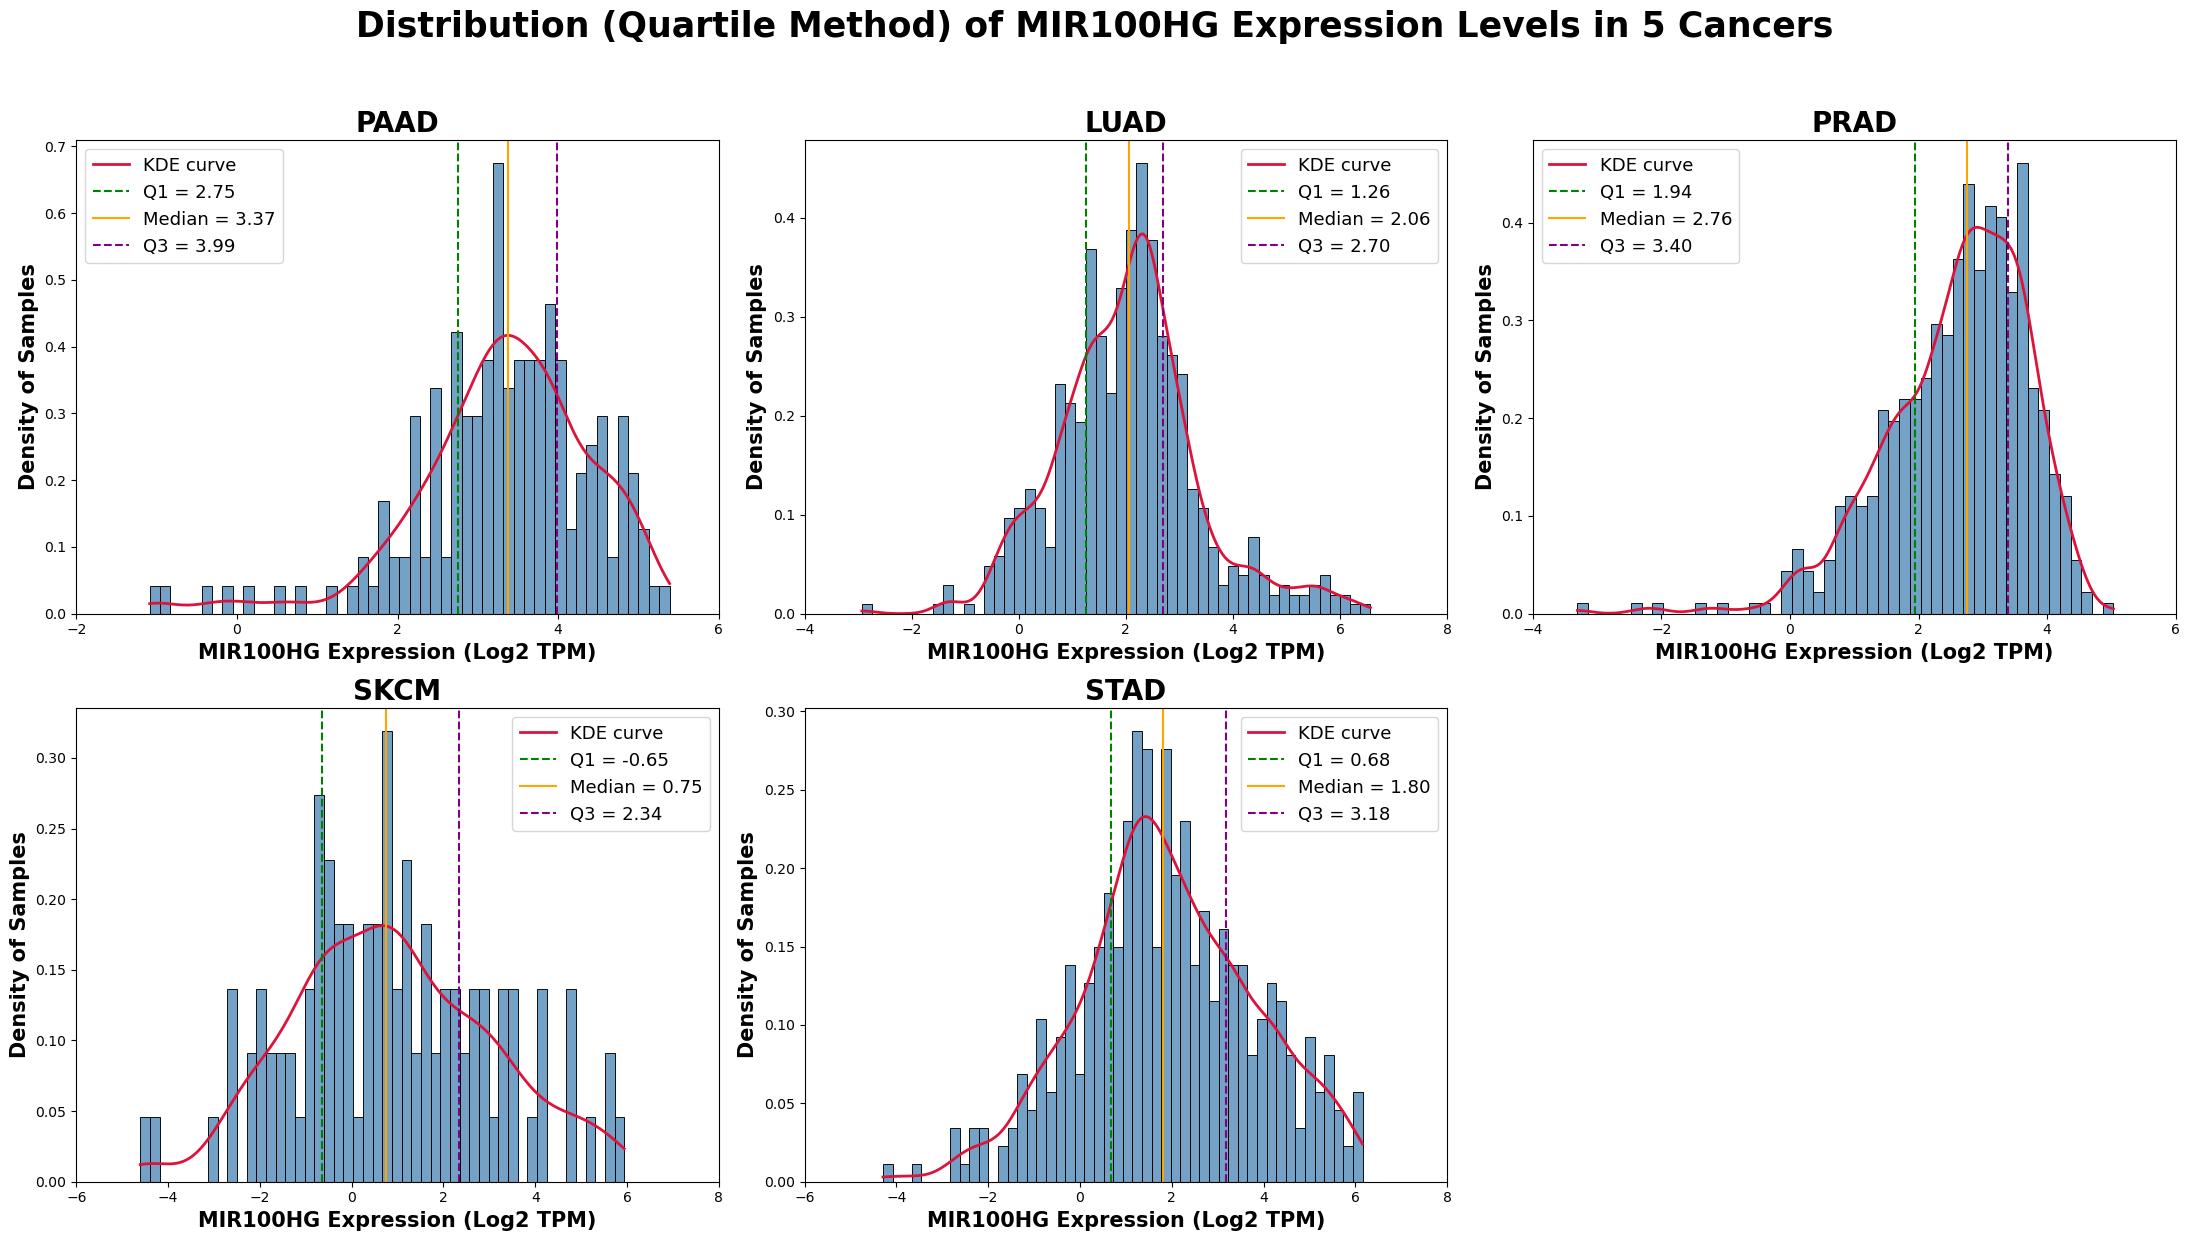

In [29]:
# Step 1: Define cancer types and corresponding expression data and thresholds
cancer_sites = ["PAAD", "LUAD", "PRAD", "SKCM", "STAD"]
expr_data = {
    "PAAD": mir100hg_vals_PAAD,
    "LUAD": mir100hg_vals_LUAD,
    "PRAD": mir100hg_vals_PRAD,
    "SKCM": mir100hg_vals_SKCM,
    "STAD": mir100hg_vals_STAD,
}
quartile_thresholds = {
    "PAAD": (q1_val_PAAD, median_val_PAAD, q3_val_PAAD),
    "LUAD": (q1_val_LUAD, median_val_LUAD, q3_val_LUAD),
    "PRAD": (q1_val_PRAD, median_val_PRAD, q3_val_PRAD),
    "SKCM": (q1_val_SKCM, median_val_SKCM, q3_val_SKCM),
    "STAD": (q1_val_STAD, median_val_STAD, q3_val_STAD),
}

xlims = {
    "PAAD": (-2, 6),
    "LUAD": (-4, 8),
    "PRAD": (-4, 6),
    "SKCM": (-5, 7),
    "STAD": (-5, 7),
}


# Step 2: Prepare figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
axes = axes.flatten()

# Step 3: Plot each cancer's MIR100HG expression distribution
for i, site in enumerate(cancer_sites):
    expr_vals = expr_data[site]
    q1, median, q3 = quartile_thresholds[site]
    ax = axes[i]

    # Histogram and KDE
    sns.histplot(expr_vals, bins=50, color="SteelBlue", stat="density", kde=False, ax=ax)
    sns.kdeplot(expr_vals, color='crimson', linewidth=2, cut=0, bw_adjust=0.7, ax=ax, label="KDE curve")

    # Threshold lines
    ax.axvline(x=q1, color="green", linestyle="--", label=f"Q1 = {q1:.2f}")
    ax.axvline(x=median, color="orange", linestyle="-", label=f"Median = {median:.2f}")
    ax.axvline(x=q3, color="purple", linestyle="--", label=f"Q3 = {q3:.2f}")

    # Titles and labels
    ax.set_title(site, fontsize=20, fontweight='bold')
    ax.set_xlabel("MIR100HG Expression (Log2 TPM)", fontsize=15, fontweight='bold')
    ax.set_ylabel("Density of Samples", fontsize=15, fontweight='bold')

    ax.legend(loc="best", fontsize=13)
    ax.set_xlim(-5, 7)
    ax.set_xlim(xlims[site])
    xtick_min = xlims[site][0]
    xtick_max = xlims[site][1]
    start = (xtick_min // 2) * 2
    end = ((xtick_max + 1) // 2) * 2
    ax.set_xticks(range(start, end + 1, 2))

axes[-1].set_visible(False)

# Step 4: Add a common super title
fig.suptitle(
    "Distribution (Quartile Method) of MIR100HG Expression Levels in 5 Cancers",
    fontsize=25, fontweight='bold', y=1.03
)

# Show the plot
plt.tight_layout()
plt.show()

### Section 5: MIR100HG-Based Differential Expression Analysis Across Five Cancer Types

#### Subsection 5.1: Differential Expression Analysis and Visualization for PAAD samples

In this subsection, we perform differential expression analyses for PAAD samples,
dividing them into "High" or "Low" MIR100HG groups under three distinct grouping methods:
1) Quartile (Q1 vs. Q4)
2) Top/Bottom 33%
3) Top/Bottom 40%

In the following steps, we: 
- Apply two-group DE approach (Welch's t-test + log2FC)
- Correct p-values (FDR)
- Generate volcano plots for each grouping
- Summarize the number of significantly up/down-regulated genes using bar charts

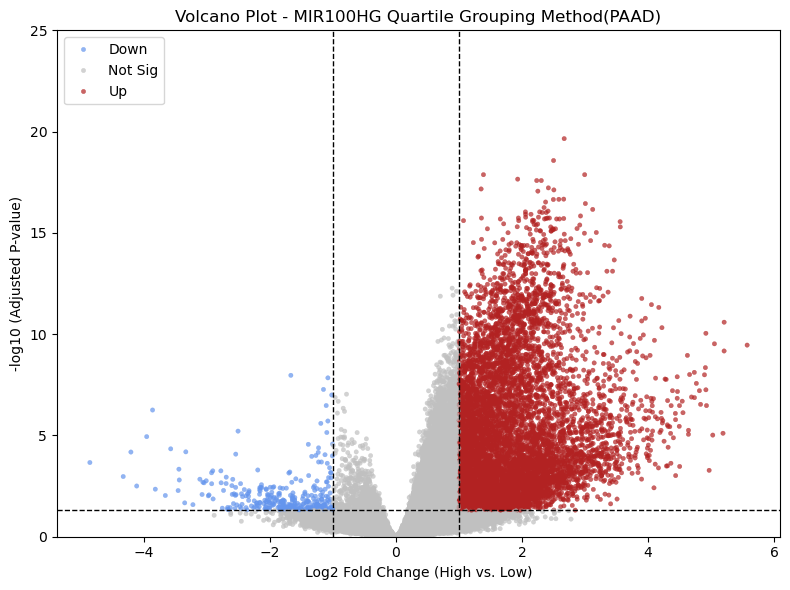

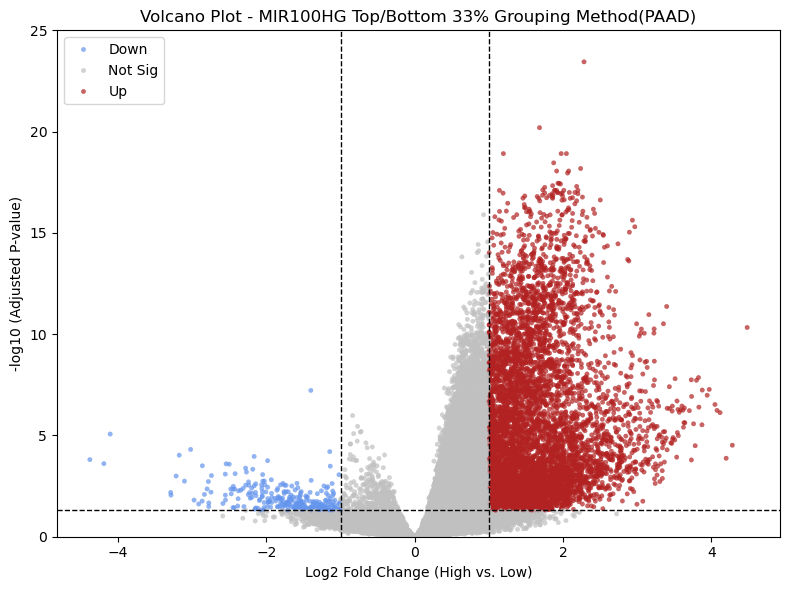

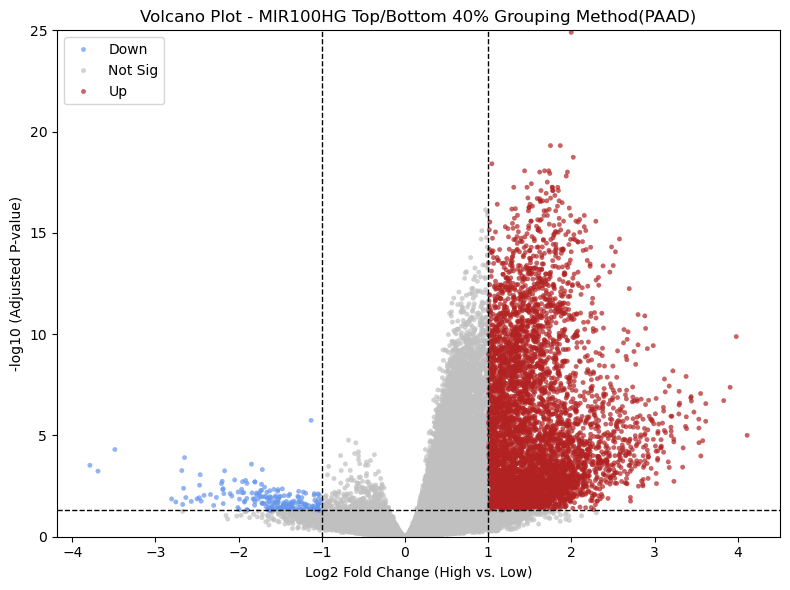

Grouping Method  Up Genes  Down Genes  Total DE Genes
0  Quartile (Q1/Q4)      7539         319            7858
1    Top/Bottom 33%      6293         270            6563
2    Top/Bottom 40%      5377         206            5583

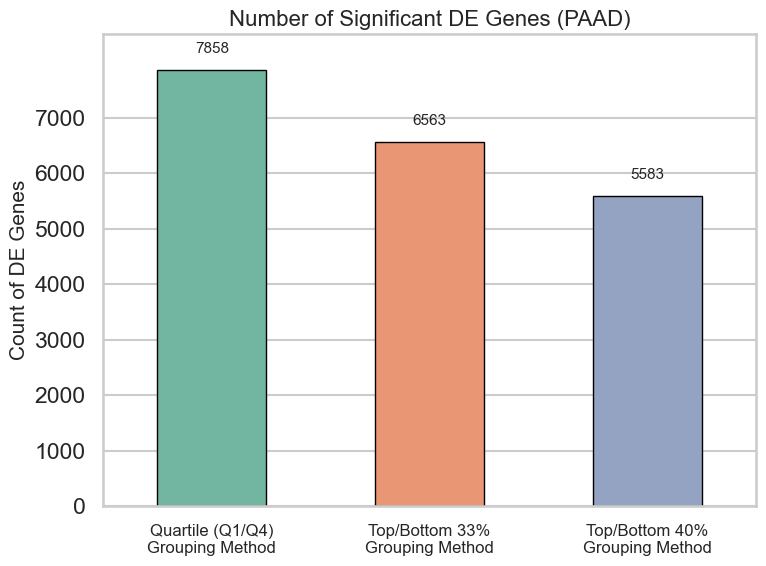

In [41]:
# Step 1: Define helper functions for the DE analysis, volcano plot, and summarizing DEGs
def perform_de_analysis(df_expr, high_samples, low_samples):
    """
    Perform a basic two-group differential expression analysis by:
      1) Extracting log2 expression values for 'High' vs. 'Low' samples.
      2) Conducting a Welch's t-test on each gene.
      3) Computing log2 Fold Change (difference in mean log2 expression).
      4) Applying multiple test correction (FDR) to the p-values.

    df_expr: A DataFrame with rows as genes and columns as sample IDs (log2 TPM).
    high_samples: List of sample IDs designated as 'High' for MIR100HG.
    low_samples:  List of sample IDs designated as 'Low' for MIR100HG.

    Returns:
        A DataFrame with one row per gene and columns ["Gene", "log2FC", "pval", "padj"].
    """
    
    # Store the DE results for each gene
    results = []  
    
    # Iterate over each gene (row) in the expression DataFrame
    for gene_id, row in df_expr.iterrows():
        
        # Check if "HGNC_symbol" column exists; otherwise, use gene_id as gene name
        if "HGNC_symbol" in df_expr.columns:
            gene_name = row["HGNC_symbol"]
        else:
            gene_name = gene_id
        
        # Extract log2 expression data for High and Low sample lists
        high_vals = row[high_samples].astype(float)
        low_vals  = row[low_samples].astype(float)
        
        # Skip further analysis if either group is empty
        if len(high_vals) == 0 or len(low_vals) == 0:
            continue

        # Check group variances to avoid near-zero standard deviations
        sd_high = np.std(high_vals)
        sd_low  = np.std(low_vals)
        if sd_high < 1e-6 or sd_low < 1e-6:
            # Both groups show no variability
            continue
        
        # Perform Welch's t-test to compare High vs. Low groups
        t_stat, p_val = ttest_ind(high_vals, low_vals, equal_var=False)
        
        # Calculate log2 fold change as the difference in mean log2 values
        log2_fc = np.mean(high_vals) - np.mean(low_vals)
        
        # Store results in a list
        results.append([gene_name, log2_fc, p_val])
    
    # Create a DataFrame from the collected list of results
    df_de = pd.DataFrame(results, columns=["Gene", "log2FC", "pval"])
    
    # Apply FDR (Benjamini-Hochberg) correction to account for multiple testing
    df_de["padj"] = multipletests(df_de["pval"], method="fdr_bh")[1]
    
    return df_de


def plot_volcano(df_de, grouping_method, tumor_type, y_max=None, show_plot=True):
    """
    Draw a volcano plot of differential expression results, illustrating:
    - log2 Fold Change on the x-axis
    - -log10(adjusted p-value) on the y-axis
    - Points colored by significance thresholds (Up, Down, Not Sig)
    """

    # Compute -log10 of the adjusted p-value for plotting on y-axis
    df_de["neg_log10_padj"] = -np.log10(df_de["padj"] + 1e-50)

    # Classify each gene as Up, Down, or Not Sig
    def classify_gene(row):
        if (row["padj"] < 0.05) and (row["log2FC"] >= 1):
            return "Up"
        elif (row["padj"] < 0.05) and (row["log2FC"] <= -1):
            return "Down"
        else:
            return "Not Sig"

    df_de["Significance"] = df_de.apply(classify_gene, axis=1)

    # Desired ordering of categories
    categories = ["Down", "Not Sig", "Up"]
    
    # Define color palette for each category
    palette_dict = {
        "Down": "cornflowerblue",   # Blue for down-regulated
        "Not Sig": "silver",        # Gray for non-significant
        "Up": "firebrick"           # Red for up-regulated
    }
    hue_order_list = ["Down", "Not Sig", "Up"]

    # Scatter plot showing each gene's log2FC vs. -log10 p-value
    sns.scatterplot(
        data=df_de,
        x="log2FC",
        y="neg_log10_padj",
        hue="Significance",
        palette=palette_dict,
        hue_order=hue_order_list,
        alpha=0.7,
        s=10,
        edgecolor=None
    )

    # Draw dashed lines for significance cutoffs on the plot
    plt.axhline(y=-np.log10(0.05), color="black", linestyle="--", linewidth=1)
    plt.axvline(x=1,  color="black", linestyle="--", linewidth=1)
    plt.axvline(x=-1, color="black", linestyle="--", linewidth=1)

    # Add chart title and axis labels
    plt.title(f"Volcano Plot - MIR100HG {grouping_method} Grouping Method({tumor_type})")
    plt.xlabel("Log2 Fold Change (High vs. Low)")
    plt.ylabel("-log10 (Adjusted P-value)")
    plt.legend(title=None, loc="upper left")

    # Determine an appropriate maximum y-axis limit automatically.
    if y_max is None:
        tick_step = 5
        data_ymax = df_de["neg_log10_padj"].max()
        if data_ymax > 0:
            auto_limit = math.ceil(data_ymax / tick_step) * tick_step
        else:
            auto_limit = 5

        # Assign the calculated limit to y_max
        y_max = auto_limit
    # Set the y-axis range from 0 up to y_max
    plt.ylim(0, y_max)
    
    # Define the step size for the y-axis tick marks
    tick_step = 5
    y_ticks = list(range(0, int(y_max) + tick_step, tick_step))
    plt.yticks(y_ticks)

    plt.tight_layout()
    
    if show_plot:
        plt.show()

def summarize_degs(df_de):
    """
    Given a differential expression DataFrame with columns ["log2FC", "padj"],
    calculate:
      - num_up: # of genes with padj<0.05 & log2FC >= 1
      - num_down: # of genes with padj<0.05 & log2FC <= -1
      - num_total: sum of up and down genes
    Returns a tuple (num_up, num_down, num_total).
    """
    cond_up = (df_de["padj"] < 0.05) & (df_de["log2FC"] >= 1)
    cond_down = (df_de["padj"] < 0.05) & (df_de["log2FC"] <= -1)
    
    num_up = cond_up.sum()
    num_down = cond_down.sum()
    num_total = num_up + num_down
    
    return num_up, num_down, num_total


# Step 2: Apply the DE analysis for MIR100HG under three grouping methods (PAAD)

# QUARTILE GROUPING METHOD
# 1) Retrieve High and Low sample IDs for the quartile method
high_samples_quartile_PAAD = df_mir100hg_quartile_extremes_PAAD[
    df_mir100hg_quartile_extremes_PAAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_quartile_PAAD = df_mir100hg_quartile_extremes_PAAD[
    df_mir100hg_quartile_extremes_PAAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis across the entire gene set, excluding "HGNC_symbol" column
df_de_quartile_PAAD = perform_de_analysis(
    df_expr_PAAD.drop(columns=["HGNC_symbol"]), 
    high_samples_quartile_PAAD, 
    low_samples_quartile_PAAD
)

# 3) Visualize results with a volcano plot
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_quartile_PAAD, "Quartile", tumor_type="PAAD", y_max=25, show_plot=False)
plt.show()

# 4) Summarize the number of significantly up/down genes
quartile_up_PAAD, quartile_down_PAAD, quartile_total_PAAD = summarize_degs(df_de_quartile_PAAD)


# Top/Bottom 33% GROUPING METHOD
# 1) Identify High and Low samples for Top/Bottom 33%
high_samples_33_PAAD = df_mir100hg_33_extremes_PAAD[
    df_mir100hg_33_extremes_PAAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_33_PAAD = df_mir100hg_33_extremes_PAAD[
    df_mir100hg_33_extremes_PAAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis
df_de_33_PAAD = perform_de_analysis(
    df_expr_PAAD.drop(columns=["HGNC_symbol"]), 
    high_samples_33_PAAD, 
    low_samples_33_PAAD
)

# 3) Volcano plot for 33% grouping results
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_33_PAAD, "Top/Bottom 33%", tumor_type="PAAD", y_max=25, show_plot=False)
plt.show()

# 4) Summarize DE gene counts
top33_up_PAAD, top33_down_PAAD, top33_total_PAAD = summarize_degs(df_de_33_PAAD)


# Top/Bottom 40% GROUPING METHOD
# 1) Identify High and Low samples for Top/Bottom 40%
high_samples_40_PAAD = df_mir100hg_40_extremes_PAAD[
    df_mir100hg_40_extremes_PAAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_40_PAAD = df_mir100hg_40_extremes_PAAD[
    df_mir100hg_40_extremes_PAAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis
df_de_40_PAAD = perform_de_analysis(
    df_expr_PAAD.drop(columns=["HGNC_symbol"]), 
    high_samples_40_PAAD, 
    low_samples_40_PAAD
)

# 3) Volcano plot for 40% grouping
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_40_PAAD, "Top/Bottom 40%", tumor_type="PAAD", y_max=25, show_plot=False)
plt.show()

# 4) Summarize DE gene counts
top40_up_PAAD, top40_down_PAAD, top40_total_PAAD = summarize_degs(df_de_40_PAAD)


# Step 3: Build a summary table and plot bar charts to compare grouping methods

# Create a dictionary capturing the results across all grouping methods
summary_data_PAAD = {
    "Grouping Method": ["Quartile (Q1/Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
    "Up Genes": [
        quartile_up_PAAD,
        top33_up_PAAD,
        top40_up_PAAD
    ],
    "Down Genes": [
        quartile_down_PAAD,
        top33_down_PAAD,
        top40_down_PAAD
    ],
    "Total DE Genes": [
        quartile_total_PAAD,
        top33_total_PAAD,
        top40_total_PAAD
    ]
}

# Convert the summary dictionary into a DataFrame for display
df_summary_PAAD = pd.DataFrame(summary_data_PAAD)
display(df_summary_PAAD)

# Plot a bar chart showing total DE genes across the three grouping methods
with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    plt.figure(figsize=(8,6))
    
    # Create the bar plot
    bars_PAAD = sns.barplot(
        data=df_summary_PAAD,
        x="Grouping Method",
        y="Total DE Genes",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1,
        width=0.5,
        dodge=False
    )

    # Remove the legend and frame for a cleaner look
    plt.legend([], [], frameon=False)

    # Annotate each bar with its height (the count of DE genes)
    for p in bars_PAAD.patches:
        bars_PAAD.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=11
        )

    # Set y-axis limit and tick marks
    plt.ylim(0, 8500)
    yticks_PAAD = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
    ylabels_PAAD = [str(t) for t in yticks_PAAD]
    plt.yticks(yticks_PAAD, ylabels_PAAD)

    # Set the plot title and axis labels
    plt.title("Number of Significant DE Genes (PAAD)", fontsize=16)
    plt.ylabel("Count of DE Genes", fontsize=15)
    plt.xlabel("")

    # Adjust x-axis labels
    old_labels_PAAD = [item.get_text() for item in bars_PAAD.get_xticklabels()]
    rename_dict = {
        "Quartile (Q1/Q4)": "Quartile (Q1/Q4)\nGrouping Method",
        "Top/Bottom 33%": "Top/Bottom 33%\nGrouping Method",
        "Top/Bottom 40%": "Top/Bottom 40%\nGrouping Method"
    }
    new_labels_PAAD = [rename_dict.get(lbl, lbl) for lbl in old_labels_PAAD]
    positions_PAAD = bars_PAAD.get_xticks()
    plt.xticks(positions_PAAD, new_labels_PAAD, rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

#### Subsection 5.2: Differential Expression Analysis and Visualization for LUAD samples

In this subsection, we perform differential expression analyses for LUAD samples,
dividing them into "High" or "Low" MIR100HG groups under three distinct grouping methods:

1) Quartile (Q1 vs. Q4)
2) Top/Bottom 33%
3) Top/Bottom 40%

In the following steps, we: 

- Apply two-group DE approach (Welch's t-test + log2FC)
- Correct p-values (FDR)
- Generate volcano plots for each grouping
- Summarize the number of significantly up/down-regulated genes using bar charts

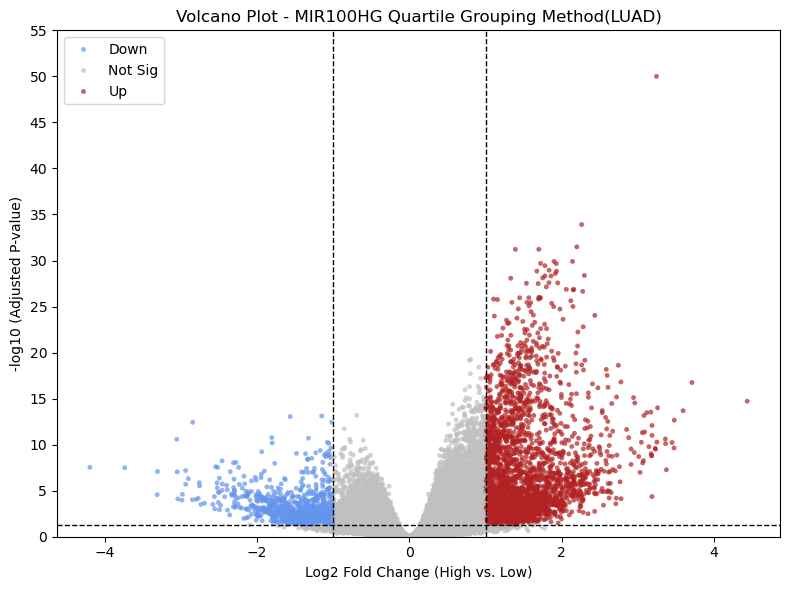

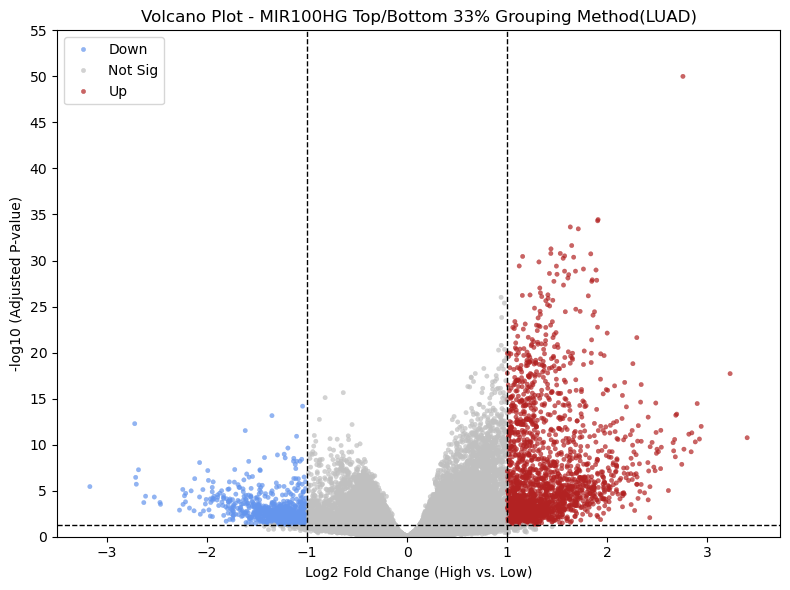

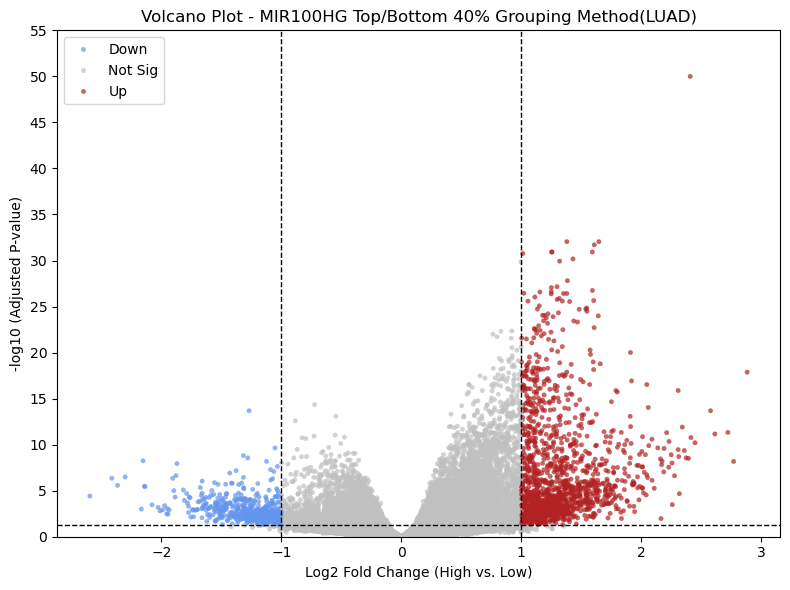

Grouping Method  Up Genes  Down Genes  Total DE Genes
0  Quartile (Q1/Q4)      2953        1076            4029
1    Top/Bottom 33%      2032         741            2773
2    Top/Bottom 40%      1486         491            1977

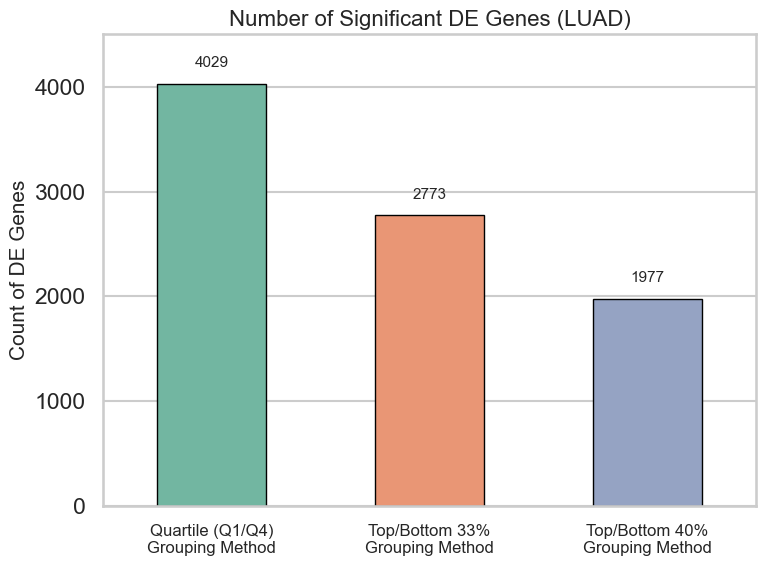

In [44]:
# QUARTILE GROUPING METHOD (LUAD)
# 1) Retrieve High and Low sample IDs for the quartile method
high_samples_quartile_LUAD = df_mir100hg_quartile_extremes_LUAD[
    df_mir100hg_quartile_extremes_LUAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_quartile_LUAD = df_mir100hg_quartile_extremes_LUAD[
    df_mir100hg_quartile_extremes_LUAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis across the entire gene set, excluding "HGNC_symbol" column
df_de_quartile_LUAD = perform_de_analysis(
    df_expr_LUAD.drop(columns=["HGNC_symbol"]), 
    high_samples_quartile_LUAD, 
    low_samples_quartile_LUAD
)

# 3) Visualize results with a volcano plot
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_quartile_LUAD, "Quartile", tumor_type="LUAD", y_max=55, show_plot=False)
plt.show()

# 4) Summarize the number of significantly up/down genes
quartile_up_LUAD, quartile_down_LUAD, quartile_total_LUAD = summarize_degs(df_de_quartile_LUAD)


# Top/Bottom 33% GROUPING METHOD (LUAD)
# 1) Identify High and Low samples for Top/Bottom 33%
high_samples_33_LUAD = df_mir100hg_33_extremes_LUAD[
    df_mir100hg_33_extremes_LUAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_33_LUAD = df_mir100hg_33_extremes_LUAD[
    df_mir100hg_33_extremes_LUAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis
df_de_33_LUAD = perform_de_analysis(
    df_expr_LUAD.drop(columns=["HGNC_symbol"]), 
    high_samples_33_LUAD, 
    low_samples_33_LUAD
)

# 3) Volcano plot for 33% grouping results
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_33_LUAD, "Top/Bottom 33%", tumor_type="LUAD", y_max=55, show_plot=False)
plt.show()

# 4) Summarize DE gene counts
top33_up_LUAD, top33_down_LUAD, top33_total_LUAD = summarize_degs(df_de_33_LUAD)


# Top/Bottom 40% GROUPING METHOD (LUAD)
# 1) Identify High and Low samples for Top/Bottom 40%
high_samples_40_LUAD = df_mir100hg_40_extremes_LUAD[
    df_mir100hg_40_extremes_LUAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_40_LUAD = df_mir100hg_40_extremes_LUAD[
    df_mir100hg_40_extremes_LUAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

# 2) Perform DE analysis
df_de_40_LUAD = perform_de_analysis(
    df_expr_LUAD.drop(columns=["HGNC_symbol"]), 
    high_samples_40_LUAD, 
    low_samples_40_LUAD
)

# 3) Volcano plot for 40% grouping
fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_40_LUAD, "Top/Bottom 40%", tumor_type="LUAD", y_max=55, show_plot=False)
plt.show()

# 4) Summarize DE gene counts
top40_up_LUAD, top40_down_LUAD, top40_total_LUAD = summarize_degs(df_de_40_LUAD)


# Build a summary table (LUAD) and plot bar charts to compare grouping methods
summary_data_LUAD = {
    "Grouping Method": ["Quartile (Q1/Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
    "Up Genes": [
        quartile_up_LUAD,
        top33_up_LUAD,
        top40_up_LUAD
    ],
    "Down Genes": [
        quartile_down_LUAD,
        top33_down_LUAD,
        top40_down_LUAD
    ],
    "Total DE Genes": [
        quartile_total_LUAD,
        top33_total_LUAD,
        top40_total_LUAD
    ]
}

df_summary_LUAD = pd.DataFrame(summary_data_LUAD)
display(df_summary_LUAD)

with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    plt.figure(figsize=(8,6))
    
    bars_LUAD = sns.barplot(
        data=df_summary_LUAD,
        x="Grouping Method",
        y="Total DE Genes",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1,
        width=0.5,
        dodge=False
    )

    plt.legend([], [], frameon=False)

    for p in bars_LUAD.patches:
        bars_LUAD.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=11
        )

    plt.ylim(0, 4500)
    yticks_LUAD = [0, 1000, 2000, 3000, 4000]
    ylabels_LUAD = [str(t) for t in yticks_LUAD]
    plt.yticks(yticks_LUAD, ylabels_LUAD)

    plt.title("Number of Significant DE Genes (LUAD)", fontsize=16)
    plt.ylabel("Count of DE Genes", fontsize=15)
    plt.xlabel("")

    old_labels_LUAD = [item.get_text() for item in bars_LUAD.get_xticklabels()]
    rename_dict_LUAD = {
        "Quartile (Q1/Q4)": "Quartile (Q1/Q4)\nGrouping Method",
        "Top/Bottom 33%": "Top/Bottom 33%\nGrouping Method",
        "Top/Bottom 40%": "Top/Bottom 40%\nGrouping Method"
    }
    new_labels_LUAD = [rename_dict_LUAD.get(lbl, lbl) for lbl in old_labels_LUAD]
    positions_LUAD = bars_LUAD.get_xticks()
    plt.xticks(positions_LUAD, new_labels_LUAD, rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

#### Subsection 5.3: Differential Expression Analysis and Visualization for PRAD samples

In this subsection, we perform differential expression analyses for PRAD samples,
dividing them into "High" or "Low" MIR100HG groups under three distinct grouping methods:

1) Quartile (Q1 vs. Q4)
2) Top/Bottom 33%
3) Top/Bottom 40%

In the following steps, we: 

- Apply two-group DE approach (Welch's t-test + log2FC)
- Correct p-values (FDR)
- Generate volcano plots for each grouping
- Summarize the number of significantly up/down-regulated genes using bar charts

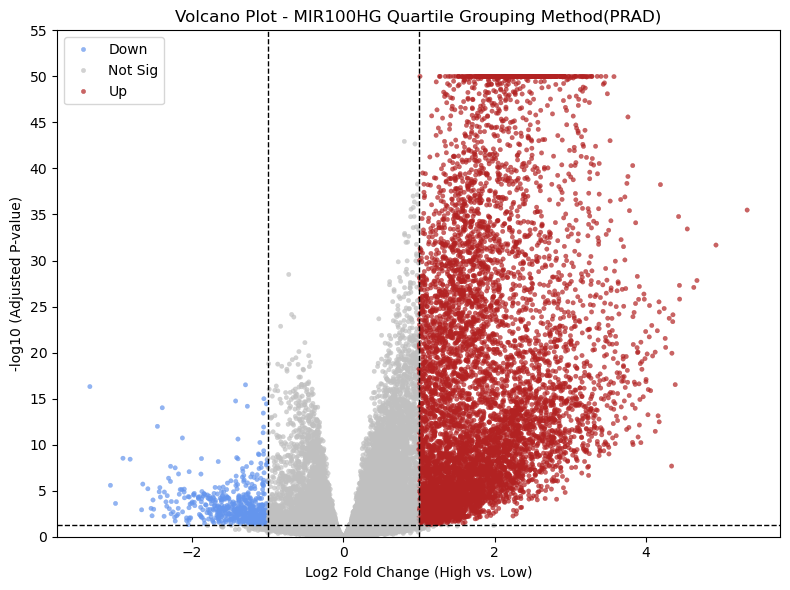

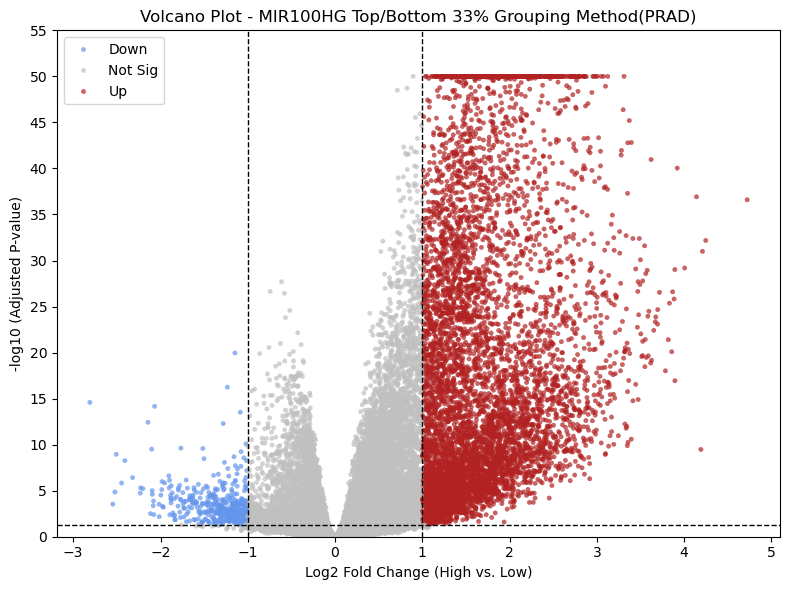

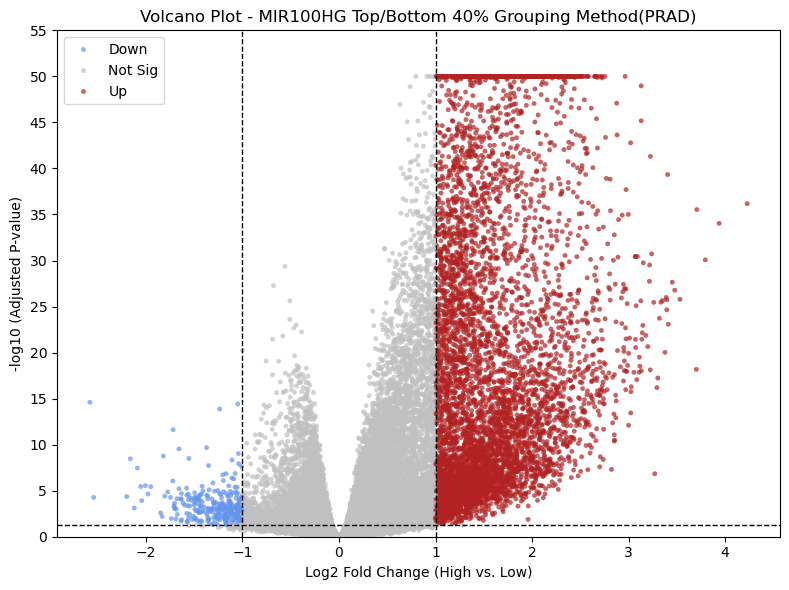

Grouping Method  Up Genes  Down Genes  Total DE Genes
0  Quartile (Q1/Q4)      7825         611            8436
1    Top/Bottom 33%      6860         454            7314
2    Top/Bottom 40%      5890         289            6179

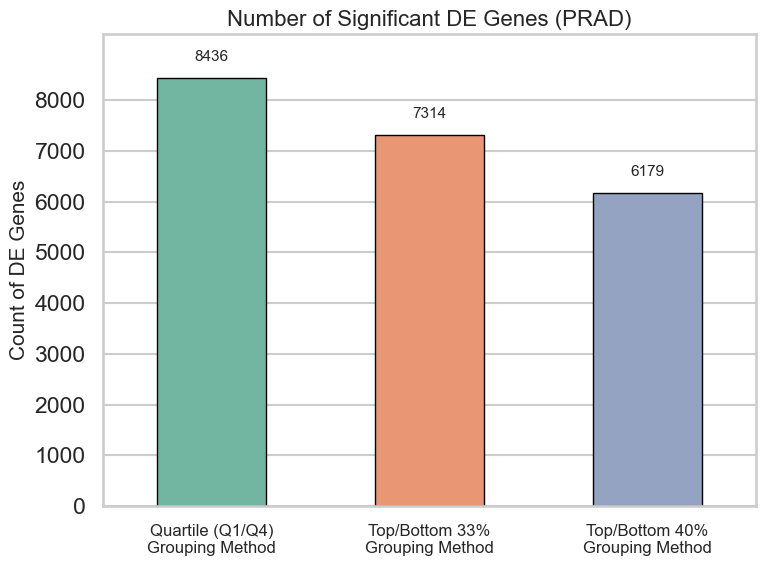

In [47]:
# QUARTILE GROUPING METHOD (PRAD)
high_samples_quartile_PRAD = df_mir100hg_quartile_extremes_PRAD[
    df_mir100hg_quartile_extremes_PRAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_quartile_PRAD = df_mir100hg_quartile_extremes_PRAD[
    df_mir100hg_quartile_extremes_PRAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_quartile_PRAD = perform_de_analysis(
    df_expr_PRAD.drop(columns=["HGNC_symbol"]), 
    high_samples_quartile_PRAD, 
    low_samples_quartile_PRAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_quartile_PRAD, "Quartile", tumor_type="PRAD", y_max=55, show_plot=False)
plt.show()

quartile_up_PRAD, quartile_down_PRAD, quartile_total_PRAD = summarize_degs(df_de_quartile_PRAD)


# Top/Bottom 33% GROUPING METHOD (PRAD)
high_samples_33_PRAD = df_mir100hg_33_extremes_PRAD[
    df_mir100hg_33_extremes_PRAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_33_PRAD = df_mir100hg_33_extremes_PRAD[
    df_mir100hg_33_extremes_PRAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_33_PRAD = perform_de_analysis(
    df_expr_PRAD.drop(columns=["HGNC_symbol"]), 
    high_samples_33_PRAD, 
    low_samples_33_PRAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_33_PRAD, "Top/Bottom 33%", tumor_type="PRAD", y_max=55, show_plot=False)
plt.show()

top33_up_PRAD, top33_down_PRAD, top33_total_PRAD = summarize_degs(df_de_33_PRAD)


# Top/Bottom 40% GROUPING METHOD (PRAD)
high_samples_40_PRAD = df_mir100hg_40_extremes_PRAD[
    df_mir100hg_40_extremes_PRAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_40_PRAD = df_mir100hg_40_extremes_PRAD[
    df_mir100hg_40_extremes_PRAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_40_PRAD = perform_de_analysis(
    df_expr_PRAD.drop(columns=["HGNC_symbol"]), 
    high_samples_40_PRAD, 
    low_samples_40_PRAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_40_PRAD, "Top/Bottom 40%", tumor_type="PRAD", y_max=55, show_plot=False)
plt.show()

top40_up_PRAD, top40_down_PRAD, top40_total_PRAD = summarize_degs(df_de_40_PRAD)

# Build a summary table (PRAD) and plot bar charts
summary_data_PRAD = {
    "Grouping Method": ["Quartile (Q1/Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
    "Up Genes": [
        quartile_up_PRAD,
        top33_up_PRAD,
        top40_up_PRAD
    ],
    "Down Genes": [
        quartile_down_PRAD,
        top33_down_PRAD,
        top40_down_PRAD
    ],
    "Total DE Genes": [
        quartile_total_PRAD,
        top33_total_PRAD,
        top40_total_PRAD
    ]
}

df_summary_PRAD = pd.DataFrame(summary_data_PRAD)
display(df_summary_PRAD)

with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    plt.figure(figsize=(8,6))
    
    bars_PRAD = sns.barplot(
        data=df_summary_PRAD,
        x="Grouping Method",
        y="Total DE Genes",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1,
        width=0.5,
        dodge=False
    )

    plt.legend([], [], frameon=False)

    for p in bars_PRAD.patches:
        bars_PRAD.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=11
        )

    plt.ylim(0, 9300)
    yticks_PRAD = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
    ylabels_PRAD = [str(t) for t in yticks_PRAD]
    plt.yticks(yticks_PRAD, ylabels_PRAD)

    plt.title("Number of Significant DE Genes (PRAD)", fontsize=16)
    plt.ylabel("Count of DE Genes", fontsize=15)
    plt.xlabel("")

    old_labels_PRAD = [item.get_text() for item in bars_PRAD.get_xticklabels()]
    rename_dict_PRAD = {
        "Quartile (Q1/Q4)": "Quartile (Q1/Q4)\nGrouping Method",
        "Top/Bottom 33%": "Top/Bottom 33%\nGrouping Method",
        "Top/Bottom 40%": "Top/Bottom 40%\nGrouping Method"
    }
    new_labels_PRAD = [rename_dict_PRAD.get(lbl, lbl) for lbl in old_labels_PRAD]
    positions_PRAD = bars_PRAD.get_xticks()
    plt.xticks(positions_PRAD, new_labels_PRAD, rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

#### Subsection 5.4: Differential Expression Analysis and Visualization for SKCM samples

In this subsection, we perform differential expression analyses for SKCM samples,
dividing them into "High" or "Low" MIR100HG groups under three distinct grouping methods:

1) Quartile (Q1 vs. Q4)
2) Top/Bottom 33%
3) Top/Bottom 40%

In the following steps, we: 

- Apply two-group DE approach (Welch's t-test + log2FC)
- Correct p-values (FDR)
- Generate volcano plots for each grouping
- Summarize the number of significantly up/down-regulated genes using bar charts

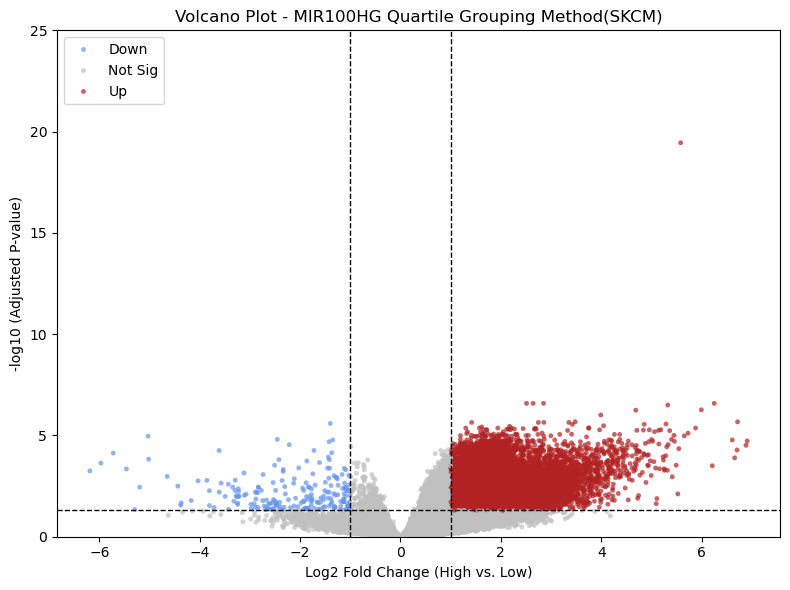

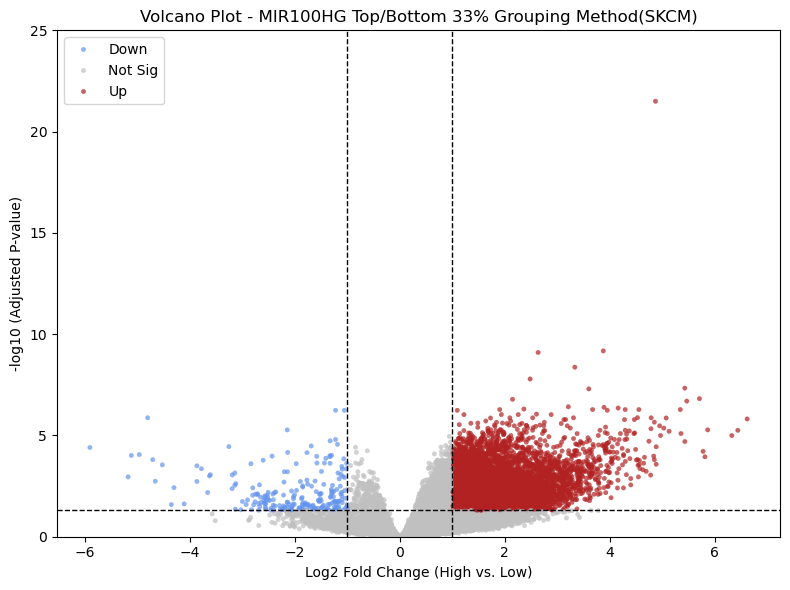

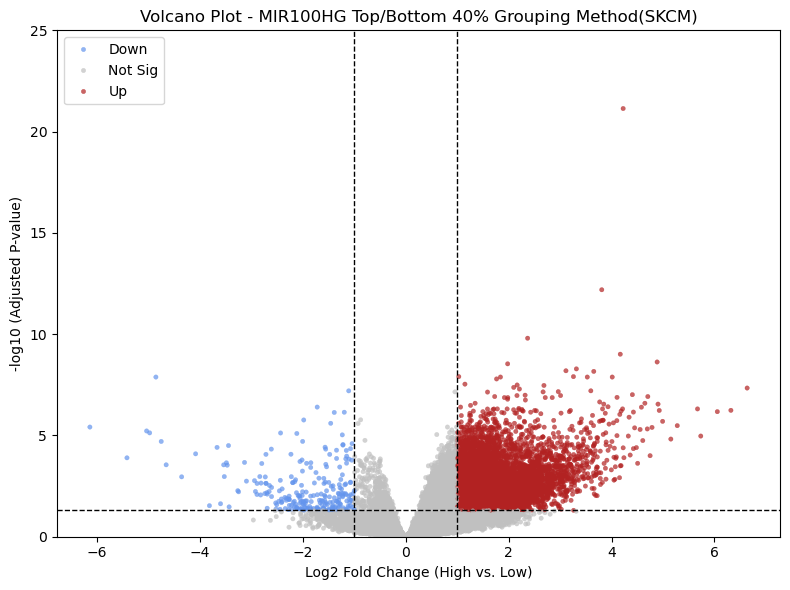

Grouping Method  Up Genes  Down Genes  Total DE Genes
0  Quartile (Q1/Q4)      9318         202            9520
1    Top/Bottom 33%      6917         216            7133
2    Top/Bottom 40%      6652         242            6894

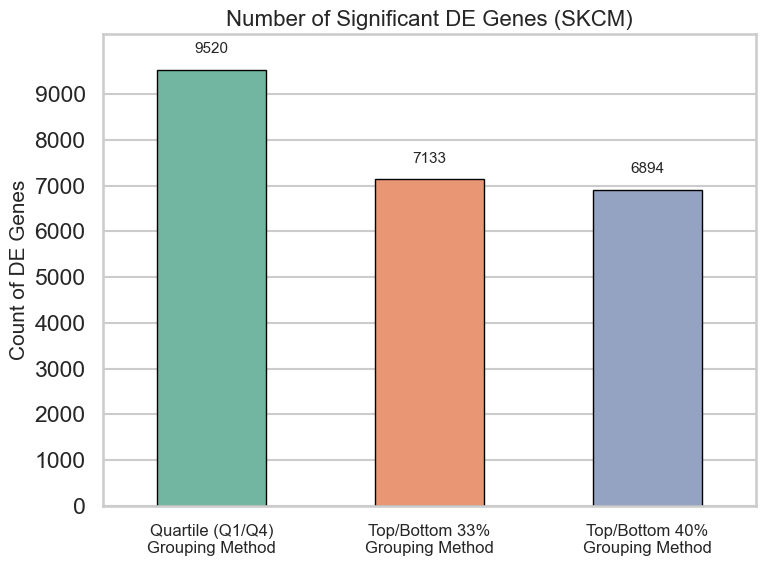

In [50]:
# QUARTILE GROUPING METHOD (SKCM)
high_samples_quartile_SKCM = df_mir100hg_quartile_extremes_SKCM[
    df_mir100hg_quartile_extremes_SKCM["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_quartile_SKCM = df_mir100hg_quartile_extremes_SKCM[
    df_mir100hg_quartile_extremes_SKCM["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_quartile_SKCM = perform_de_analysis(
    df_expr_SKCM.drop(columns=["HGNC_symbol"]), 
    high_samples_quartile_SKCM, 
    low_samples_quartile_SKCM
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_quartile_SKCM, "Quartile", tumor_type="SKCM", y_max=25, show_plot=False)
plt.show()

quartile_up_SKCM, quartile_down_SKCM, quartile_total_SKCM = summarize_degs(df_de_quartile_SKCM)


# Top/Bottom 33% GROUPING METHOD (SKCM)
high_samples_33_SKCM = df_mir100hg_33_extremes_SKCM[
    df_mir100hg_33_extremes_SKCM["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_33_SKCM = df_mir100hg_33_extremes_SKCM[
    df_mir100hg_33_extremes_SKCM["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_33_SKCM = perform_de_analysis(
    df_expr_SKCM.drop(columns=["HGNC_symbol"]), 
    high_samples_33_SKCM, 
    low_samples_33_SKCM
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_33_SKCM, "Top/Bottom 33%", tumor_type="SKCM", y_max=25, show_plot=False)
plt.show()

top33_up_SKCM, top33_down_SKCM, top33_total_SKCM = summarize_degs(df_de_33_SKCM)


# Top/Bottom 40% GROUPING METHOD (SKCM)
high_samples_40_SKCM = df_mir100hg_40_extremes_SKCM[
    df_mir100hg_40_extremes_SKCM["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_40_SKCM = df_mir100hg_40_extremes_SKCM[
    df_mir100hg_40_extremes_SKCM["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_40_SKCM = perform_de_analysis(
    df_expr_SKCM.drop(columns=["HGNC_symbol"]), 
    high_samples_40_SKCM, 
    low_samples_40_SKCM
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_40_SKCM, "Top/Bottom 40%", tumor_type="SKCM", y_max=25, show_plot=False)
plt.show()

top40_up_SKCM, top40_down_SKCM, top40_total_SKCM = summarize_degs(df_de_40_SKCM)

# Build a summary table (SKCM) and plot bar charts
summary_data_SKCM = {
    "Grouping Method": ["Quartile (Q1/Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
    "Up Genes": [
        quartile_up_SKCM,
        top33_up_SKCM,
        top40_up_SKCM
    ],
    "Down Genes": [
        quartile_down_SKCM,
        top33_down_SKCM,
        top40_down_SKCM
    ],
    "Total DE Genes": [
        quartile_total_SKCM,
        top33_total_SKCM,
        top40_total_SKCM
    ]
}

df_summary_SKCM = pd.DataFrame(summary_data_SKCM)
display(df_summary_SKCM)


with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    plt.figure(figsize=(8,6))
    
    bars_SKCM = sns.barplot(
        data=df_summary_SKCM,
        x="Grouping Method",
        y="Total DE Genes",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1,
        width=0.5,
        dodge=False
    )

    plt.legend([], [], frameon=False)

    for p in bars_SKCM.patches:
        bars_SKCM.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=11
        )

    plt.ylim(0, 10300)
    yticks_SKCM = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
    ylabels_SKCM = [str(t) for t in yticks_SKCM]
    plt.yticks(yticks_SKCM, ylabels_SKCM)

    plt.title("Number of Significant DE Genes (SKCM)", fontsize=16)
    plt.ylabel("Count of DE Genes", fontsize=15)
    plt.xlabel("")

    old_labels_SKCM = [item.get_text() for item in bars_SKCM.get_xticklabels()]
    rename_dict_SKCM = {
        "Quartile (Q1/Q4)": "Quartile (Q1/Q4)\nGrouping Method",
        "Top/Bottom 33%": "Top/Bottom 33%\nGrouping Method",
        "Top/Bottom 40%": "Top/Bottom 40%\nGrouping Method"
    }
    new_labels_SKCM = [rename_dict_SKCM.get(lbl, lbl) for lbl in old_labels_SKCM]
    positions_SKCM = bars_SKCM.get_xticks()
    plt.xticks(positions_SKCM, new_labels_SKCM, rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

#### Subsection 5.5: Differential Expression Analysis and Visualization for STAD samples

In this subsection, we perform differential expression analyses for STAD samples,
dividing them into "High" or "Low" MIR100HG groups under three distinct grouping methods:

1) Quartile (Q1 vs. Q4),
2) Top/Bottom 33%, and
3) Top/Bottom 40%.

In the following steps, we:

- Apply a simple two-group DE approach (Welch's t-test + log2FC)
- Correct p-values (FDR)
- Generate volcano plots for each grouping
- Summarize the number of significantly up/down-regulated genes using bar charts

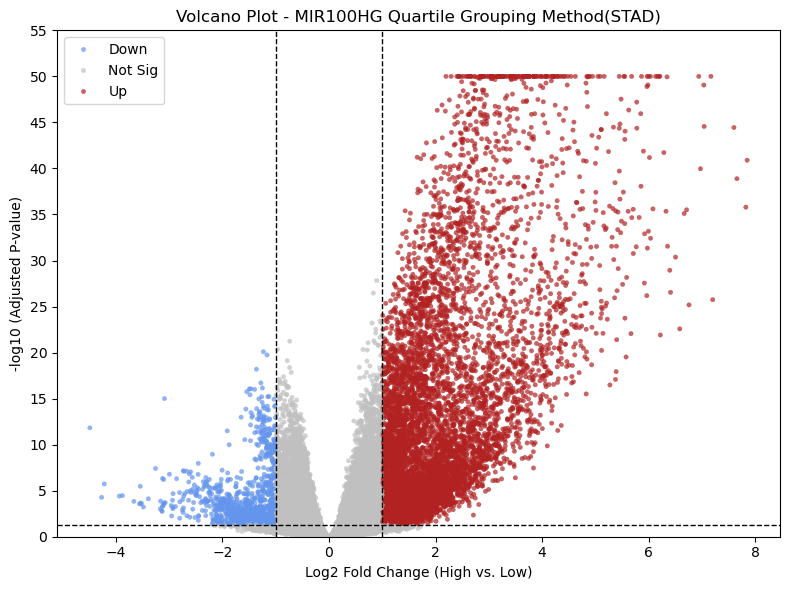

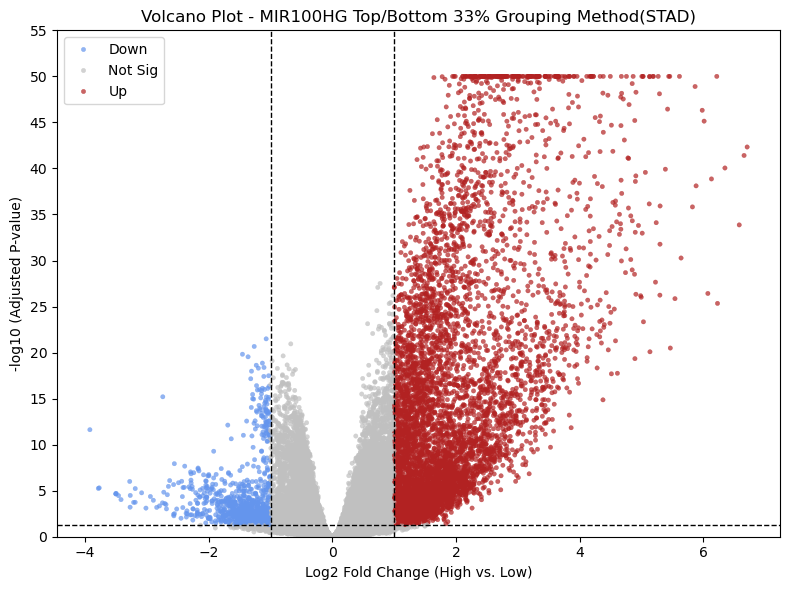

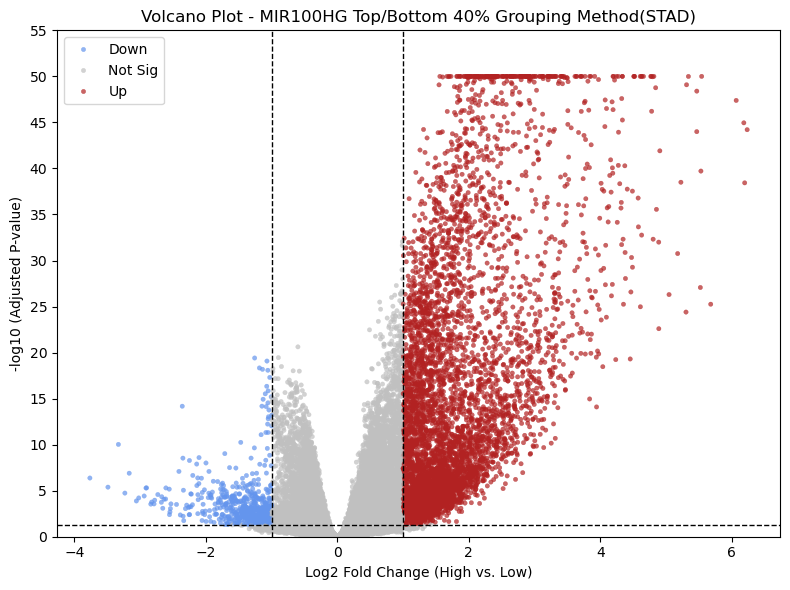

Grouping Method  Up Genes  Down Genes  Total DE Genes
0  Quartile (Q1/Q4)      8109        1243            9352
1    Top/Bottom 33%      6606        1077            7683
2    Top/Bottom 40%      5823         668            6491

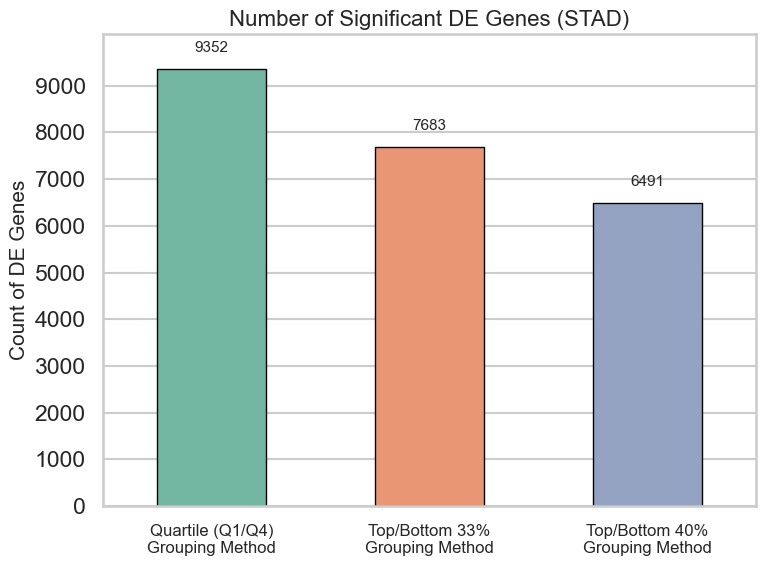

In [53]:
# QUARTILE GROUPING METHOD (STAD)
high_samples_quartile_STAD = df_mir100hg_quartile_extremes_STAD[
    df_mir100hg_quartile_extremes_STAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_quartile_STAD = df_mir100hg_quartile_extremes_STAD[
    df_mir100hg_quartile_extremes_STAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_quartile_STAD = perform_de_analysis(
    df_expr_STAD.drop(columns=["HGNC_symbol"]), 
    high_samples_quartile_STAD, 
    low_samples_quartile_STAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_quartile_STAD, "Quartile", tumor_type="STAD", y_max=55, show_plot=False)
plt.show()

quartile_up_STAD, quartile_down_STAD, quartile_total_STAD = summarize_degs(df_de_quartile_STAD)


# Top/Bottom 33% GROUPING METHOD (STAD)
high_samples_33_STAD = df_mir100hg_33_extremes_STAD[
    df_mir100hg_33_extremes_STAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_33_STAD = df_mir100hg_33_extremes_STAD[
    df_mir100hg_33_extremes_STAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_33_STAD = perform_de_analysis(
    df_expr_STAD.drop(columns=["HGNC_symbol"]), 
    high_samples_33_STAD, 
    low_samples_33_STAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_33_STAD, "Top/Bottom 33%", tumor_type="STAD", y_max=55, show_plot=False)
plt.show()

top33_up_STAD, top33_down_STAD, top33_total_STAD = summarize_degs(df_de_33_STAD)


# Top/Bottom 40% GROUPING METHOD (STAD)
high_samples_40_STAD = df_mir100hg_40_extremes_STAD[
    df_mir100hg_40_extremes_STAD["MIR100HG_Expression_Level"] == "High"
]["Sample"].tolist()

low_samples_40_STAD = df_mir100hg_40_extremes_STAD[
    df_mir100hg_40_extremes_STAD["MIR100HG_Expression_Level"] == "Low"
]["Sample"].tolist()

df_de_40_STAD = perform_de_analysis(
    df_expr_STAD.drop(columns=["HGNC_symbol"]), 
    high_samples_40_STAD, 
    low_samples_40_STAD
)

fig = plt.figure(figsize=(8,6));
plot_volcano(df_de_40_STAD, "Top/Bottom 40%", tumor_type="STAD", y_max=55, show_plot=False)
plt.show()

top40_up_STAD, top40_down_STAD, top40_total_STAD = summarize_degs(df_de_40_STAD)


# Build a summary table (STAD) and plot bar charts
summary_data_STAD = {
    "Grouping Method": ["Quartile (Q1/Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
    "Up Genes": [
        quartile_up_STAD,
        top33_up_STAD,
        top40_up_STAD
    ],
    "Down Genes": [
        quartile_down_STAD,
        top33_down_STAD,
        top40_down_STAD
    ],
    "Total DE Genes": [
        quartile_total_STAD,
        top33_total_STAD,
        top40_total_STAD
    ]
}

df_summary_STAD = pd.DataFrame(summary_data_STAD)
display(df_summary_STAD)

with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    plt.figure(figsize=(8,6))
    
    bars_STAD = sns.barplot(
        data=df_summary_STAD,
        x="Grouping Method",
        y="Total DE Genes",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1,
        width=0.5,
        dodge=False
    )

    plt.legend([], [], frameon=False)

    for p in bars_STAD.patches:
        bars_STAD.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=11
        )

    plt.ylim(0, 10100)
    yticks_STAD = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
    ylabels_STAD = [str(t) for t in yticks_STAD]
    plt.yticks(yticks_STAD, ylabels_STAD)

    plt.title("Number of Significant DE Genes (STAD)", fontsize=16)
    plt.ylabel("Count of DE Genes", fontsize=15)
    plt.xlabel("")

    old_labels_STAD = [item.get_text() for item in bars_STAD.get_xticklabels()]
    rename_dict_STAD = {
        "Quartile (Q1/Q4)": "Quartile (Q1/Q4)\nGrouping Method",
        "Top/Bottom 33%": "Top/Bottom 33%\nGrouping Method",
        "Top/Bottom 40%": "Top/Bottom 40%\nGrouping Method"
    }
    new_labels_STAD = [rename_dict_STAD.get(lbl, lbl) for lbl in old_labels_STAD]
    positions_STAD = bars_STAD.get_xticks()
    plt.xticks(positions_STAD, new_labels_STAD, rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()


#### Subsection 5.6: Cross-Cancer Visualization of Differential Expression (Top/Bottom 33%\nGrouping Method)

In this subsection, we generate volcano plots to visualize differentially expressed genes (DEGs) associated with MIR100HG expression status across five cancer types (PAAD, LUAD, PRAD, SKCM, STAD), using the top/bottom 33% grouping method.
For each cancer, we plot Log2 fold change against the -log10 adjusted p-value to distinguish significantly upregulated and downregulated genes in the MIR100HG high vs. low expression groups. Genes are classified into Up, Down, or Not Significant based on statistical thresholds (adjusted p-value < 0.05 and |log2FC| ≥ 1), and colored accordingly.

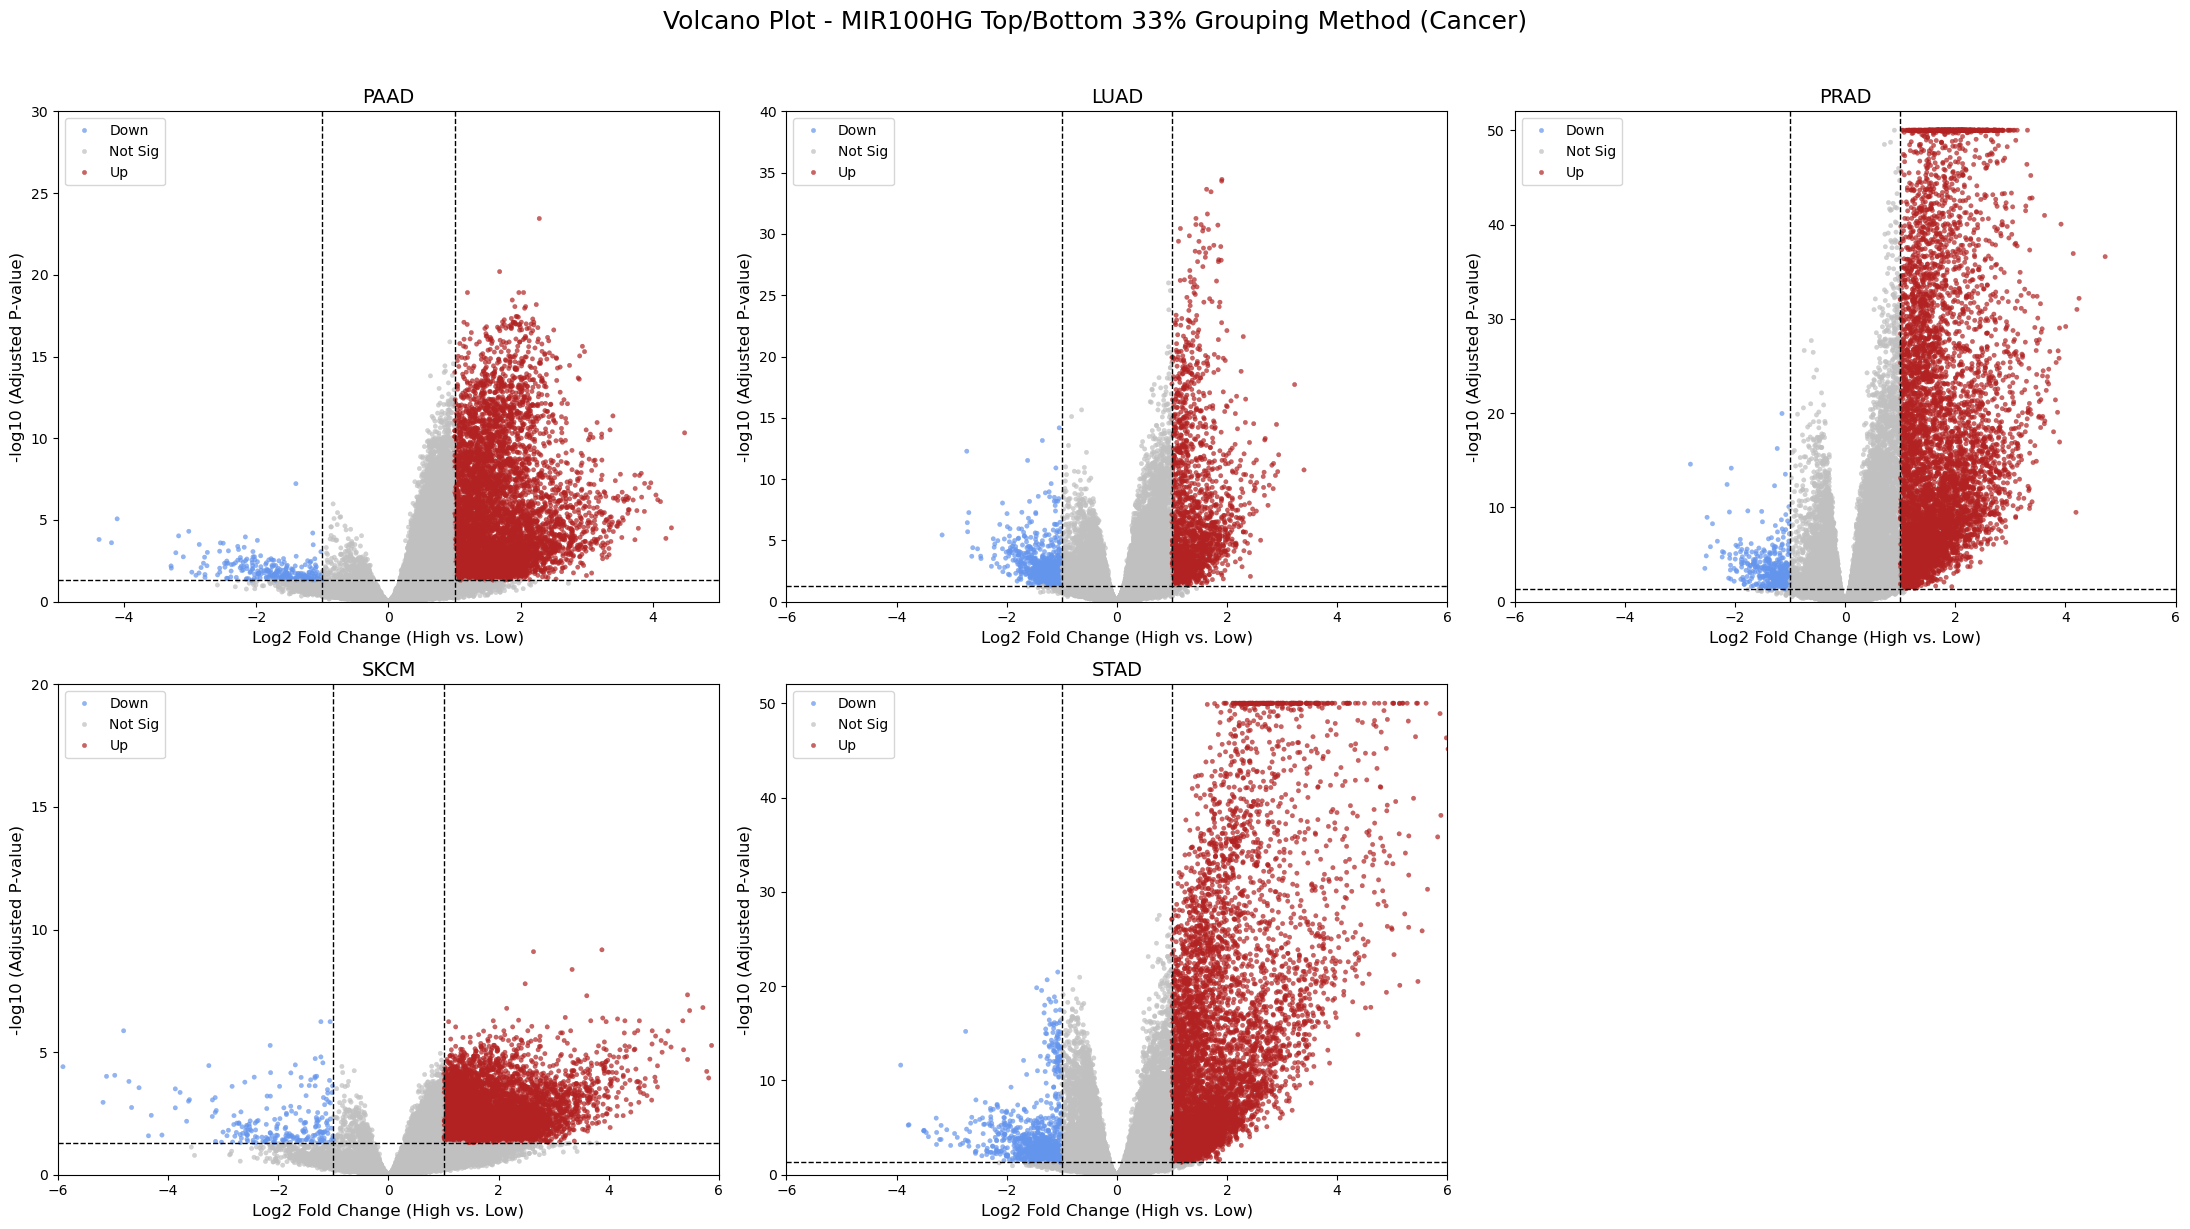

In [56]:
# Step 1: Define DE result mapping and per-cancer axis ranges
de_results_33 = {
    "PAAD": df_de_33_PAAD,
    "LUAD": df_de_33_LUAD,
    "PRAD": df_de_33_PRAD,
    "SKCM": df_de_33_SKCM,
    "STAD": df_de_33_STAD
}

axis_ranges = {
    "PAAD": {"xlim": (-5, 5), "ylim": 30},
    "LUAD": {"xlim": (-6, 6), "ylim": 40},
    "PRAD": {"xlim": (-6, 6), "ylim": 52},
    "SKCM": {"xlim": (-6, 6), "ylim": 20}, 
    "STAD": {"xlim": (-6, 6), "ylim": 52}
}

# Step 2: Create subplot grid (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
axes = axes.flatten()

# Step 3: Draw volcano plots on each subplot
def draw_volcano_on_ax(ax, df_de, cancer_type, xlim, ylim):
    df_de["neg_log10_padj"] = -np.log10(df_de["padj"] + 1e-50)

    def classify_gene(row):
        if (row["padj"] < 0.05) and (row["log2FC"] >= 1):
            return "Up"
        elif (row["padj"] < 0.05) and (row["log2FC"] <= -1):
            return "Down"
        else:
            return "Not Sig"
    df_de["Significance"] = df_de.apply(classify_gene, axis=1)

    palette_dict = {
        "Down": "cornflowerblue",
        "Not Sig": "silver",
        "Up": "firebrick"
    }

    sns.scatterplot(
        data=df_de,
        x="log2FC",
        y="neg_log10_padj",
        hue="Significance",
        palette=palette_dict,
        hue_order=["Down", "Not Sig", "Up"],
        alpha=0.7,
        s=10,
        edgecolor=None,
        ax=ax
    )

    ax.axhline(y=-np.log10(0.05), color="black", linestyle="--", linewidth=1)
    ax.axvline(x=1, color="black", linestyle="--", linewidth=1)
    ax.axvline(x=-1, color="black", linestyle="--", linewidth=1)

    ax.set_title(cancer_type, fontsize=14)
    ax.set_xlabel("Log2 Fold Change (High vs. Low)", fontsize=12)
    ax.set_ylabel("-log10 (Adjusted P-value)", fontsize=12)
    ax.set_xlim(xlim)
    ax.set_ylim(0, ylim)

    # Custom y-ticks for SKCM with step of 5
    if cancer_type == "SKCM":
        ax.set_yticks(np.arange(0, ylim + 1, 5))

    ax.legend(title=None, loc="upper left", fontsize=10)

# Step 4: Loop through all cancer types and draw
for i, (cancer_type, df_de) in enumerate(de_results_33.items()):
    xlim = axis_ranges[cancer_type]["xlim"]
    ylim = axis_ranges[cancer_type]["ylim"]
    draw_volcano_on_ax(axes[i], df_de.copy(), cancer_type, xlim, ylim)
axes[-1].set_visible(False)

# Step 5: Super title and high-res PDF export
fig.suptitle("Volcano Plot - MIR100HG Top/Bottom 33% Grouping Method (Cancer)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### Subsection 5.7: Cross-Cancer Comparison of DEG Counts under Different Expression Grouping Strategies

In this subsection, we summarize and visualize the number of differentially expressed genes (DEGs) across five cancer types—PAAD, LUAD, PRAD, SKCM, and STAD—using three expression grouping strategies: Quartile (Q1 vs Q4), Top/Bottom 33%, and Top/Bottom 40%.
For each cancer, we aggregate the total number of DEGs as well as the counts of significantly upregulated and downregulated genes under each grouping method. These summaries are compiled into a unified DataFrame for comparison.

To facilitate interpretation, we generate a grouped bar plot where the x-axis denotes cancer types and the y-axis shows the number of DEGs, colored by grouping method. The plot is annotated with exact counts on each bar and formatted for publication-level clarity.

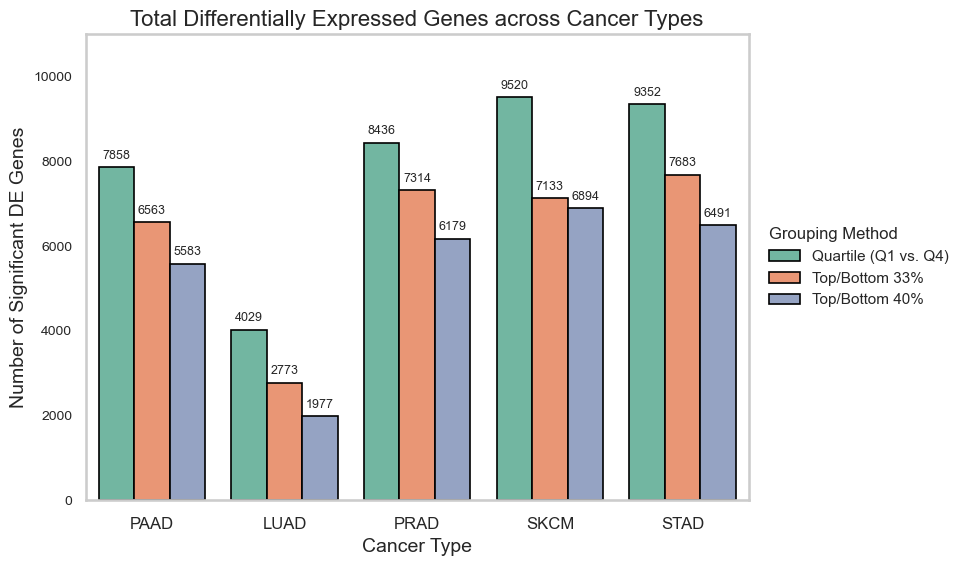

In [59]:
# Step 1: Define cancer types and initialize DEG summary list
cancer_types = ["PAAD", "LUAD", "PRAD", "SKCM", "STAD"]
summary_data_cancer = []

# Step 2: Loop through each cancer type to summarize DEG counts under 3 grouping methods
for cancer in cancer_types:
    # Retrieve DEG counts from precomputed results
    up_q, down_q, total_q = summarize_degs(eval(f"df_de_quartile_{cancer}"))
    up_33, down_33, total_33 = summarize_degs(eval(f"df_de_33_{cancer}"))
    up_40, down_40, total_40 = summarize_degs(eval(f"df_de_40_{cancer}"))

    # Create a summary DataFrame for this cancer type
    df_cancer = pd.DataFrame({
        "Cancer Type": cancer,
        "Grouping Method": ["Quartile (Q1 vs. Q4)", "Top/Bottom 33%", "Top/Bottom 40%"],
        "Total DEGs": [total_q, total_33, total_40],
        "Up Genes": [up_q, up_33, up_40],
        "Down Genes": [down_q, down_33, down_40]
    })

    # Append to overall summary list
    summary_data_cancer.append(df_cancer)

# Step 3: Concatenate all cancer summaries into a single DataFrame
df_summary_cancer = pd.concat(summary_data_cancer, ignore_index=True)

# Step 4: Create a grouped bar plot of Total DEGs across cancer types and methods
with sns.axes_style("whitegrid"), sns.plotting_context("talk"):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the grouped bar plot
    bars = sns.barplot(
        data=df_summary_cancer,
        x="Cancer Type",
        y="Total DEGs",
        hue="Grouping Method",
        palette="Set2",
        edgecolor="black",
        linewidth=1.2,
        ax=ax
    )

    # Customize plot title and axis labels
    ax.set_title("Total Differentially Expressed Genes across Cancer Types", fontsize=16)
    ax.set_xlabel("Cancer Type", fontsize=14)
    ax.set_ylabel("Number of Significant DE Genes", fontsize=14)

    # Customize tick appearance
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='y', which='major', length=6, width=1.2, direction='out')
    
    ax.grid(False)

    # Set Y-axis limits and manual ticks
    ax.set_ylim(0, 11000)
    ax.set_yticks(range(0, 11001, 2000))

    # Annotate each bar with its value
    for p in bars.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9,
                xytext=(0, 4),
                textcoords='offset points'
            )

    # Format legend and layout
    ax.legend(
        title="Grouping Method",
        title_fontsize=12,
        fontsize=11,
        loc="center left",
        bbox_to_anchor=(1.01, 0.5),
        frameon=False,
        alignment="left"
    )

    plt.tight_layout()
    plt.show()

### Section 6: Filter and Visualize Cancer Histological Types

#### Subsection 6.1: Loading, Filtering, and Visualizing PAAD Histological Types

In this subsection, we load clinical data for multiple cancer types, filter for PAAD (Pancreatic Adenocarcinoma),
calculate the frequencies of each histological type within PAAD, visualize these frequencies in a bar plot,
and then identify and subset the most common histological subtype.

Clinical Data (head):


sample      _PATIENT cancer type abbreviation  \
0  TCGA-OR-A5J1-01  TCGA-OR-A5J1                      ACC   
1  TCGA-OR-A5J2-01  TCGA-OR-A5J2                      ACC   
2  TCGA-OR-A5J3-01  TCGA-OR-A5J3                      ACC   
3  TCGA-OR-A5J4-01  TCGA-OR-A5J4                      ACC   
4  TCGA-OR-A5J5-01  TCGA-OR-A5J5                      ACC   

   age_at_initial_pathologic_diagnosis  gender   race  \
0                                 58.0    MALE  WHITE   
1                                 44.0  FEMALE  WHITE   
2                                 23.0  FEMALE  WHITE   
3                                 23.0  FEMALE  WHITE   
4                                 30.0    MALE  WHITE   

  ajcc_pathologic_tumor_stage clinical_stage  \
0                    Stage II            NaN   
1                    Stage IV            NaN   
2                   Stage III            NaN   
3                    Stage IV            NaN   
4                   Stage III            NaN   

                      histological_type histological_grade  ...  \
0  Adrenocortical carcinoma- Usual Type                NaN  ...   
1  Adrenocortical carcinoma- Usual Type                NaN  ...   
2  Adrenocortical carcinoma- Usual Type                NaN  ...   
3  Adrenocortical carcinoma- Usual Type                NaN  ...   
4  Adrenocortical carcinoma- Usual Type                NaN  ...   

   residual_tumor   OS  OS.time  DSS DSS.time  DFI  DFI.time  PFI PFI.time  \
0             NaN  1.0   1355.0  1.0   1355.0  1.0     754.0  1.0    754.0   
1             NaN  1.0   1677.0  1.0   1677.0  NaN       NaN  1.0    289.0   
2             NaN  0.0   2091.0  0.0   2091.0  1.0      53.0  1.0     53.0   
3             NaN  1.0    423.0  1.0    423.0  NaN       NaN  1.0    126.0   
4             NaN  1.0    365.0  1.0    365.0  NaN       NaN  1.0     50.0   

  Redaction  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 34 columns]


[PAAD] Number of PAAD samples: 196

[PAAD] Frequency of 'histological_type' among PAAD samples:
Pancreas-Adenocarcinoma Ductal Type                163
Pancreas-Adenocarcinoma-Other Subtype               27
Pancreas-Colloid (mucinous non-cystic) Carcinoma     4
Pancreas-Undifferentiated Carcinoma                  1
[Discrepancy]                                        1


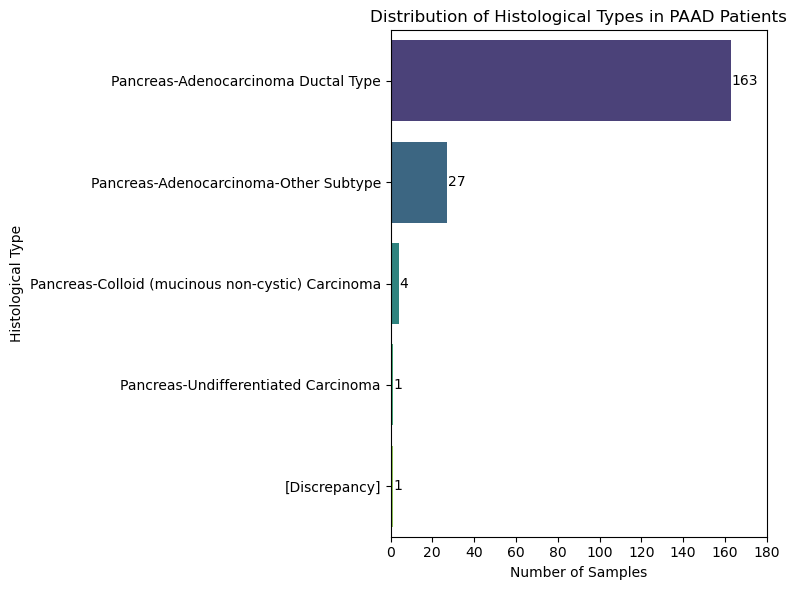


[PAAD] The most common 'histological_type' for PAAD is: 'Pancreas-Adenocarcinoma Ductal Type'

[PAAD] Filtering to the most common subtype: 'Pancreas-Adenocarcinoma Ductal Type'.
[PAAD] Number of samples in this subtype: 163


In [71]:
# Step 1: Load the clinical data (all cancers) from a tab-delimited file
clinical_file = "Survival_SupplementalTable_S1_20171025_xena_sp"  
df_clinical = pd.read_csv(clinical_file, sep="\t", header=0)      

print("Clinical Data (head):")
display(df_clinical.head())                                       

# Step 2: Filter the clinical DataFrame to retrieve only the PAAD (pancreatic cancer) samples
# Select rows where 'cancer type abbreviation' is 'PAAD'
df_clinical_PAAD = df_clinical[df_clinical["cancer type abbreviation"] == "PAAD"] 

# Store the total number of PAAD samples
num_paadc_PAAD = df_clinical_PAAD.shape[0]                                          
print(f"\n[PAAD] Number of PAAD samples: {num_paadc_PAAD}")

# Step 3: Calculate how many samples fall under each histological type (PAAD)
# Count the occurrences of each histological type
hist_counts_PAAD = df_clinical_PAAD["histological_type"].value_counts(dropna=False) 
print("\n[PAAD] Frequency of 'histological_type' among PAAD samples:")

# Determine max length for pretty printing
# Compute the longest string length among histological types for alignment
max_len_PAAD = max(len(str(ht)) for ht in hist_counts_PAAD.index)  
for hist_type, freq in hist_counts_PAAD.items():
    # Print each histological type and its frequency
    print(f"{hist_type:<{max_len_PAAD}}   {freq:>3}")              

# Create a DataFrame for plotting
hist_df_PAAD = pd.DataFrame({
    "hist_type": hist_counts_PAAD.index,
    "freq": hist_counts_PAAD.values
})                                                                

# Step 4: Plot a horizontal bar chart of these histological type frequencies (PAAD)
plt.figure(figsize=(8, 6))                                        
ax = sns.barplot(
    data=hist_df_PAAD,
    x="freq",
    y="hist_type",
    hue="hist_type",
    dodge=False,
    palette="viridis",
    legend=False
)                                                                  

# Create a horizontal bar plot of frequencies by histological type
plt.xlabel("Number of Samples")                                   
plt.ylabel("Histological Type")                                   
plt.title("Distribution of Histological Types in PAAD Patients")  
ax.set_xlim(0, 180)                                               
# Label each bar with its count
for i, row in hist_df_PAAD.iterrows():
    val = row["freq"]
    ax.text(val + 0.3, i, str(int(val)), color="black", va="center")  # Annotate each bar with its frequency

plt.tight_layout() 
plt.show()                                                       

# Step 5: Identify and report the most common histological type among PAAD samples
if not hist_counts_PAAD.empty:
    # Retrieve the histological type with the highest frequency
    most_common_subtype_PAAD = hist_counts_PAAD.index[0]           
    print(f"\n[PAAD] The most common 'histological_type' for PAAD is: '{most_common_subtype_PAAD}'")

    # Filter PAAD samples to include only those with the most common subtype
    df_clinical_PAAD_sub = df_clinical_PAAD[
        df_clinical_PAAD["histological_type"] == most_common_subtype_PAAD
    ]                                                             
    print(f"\n[PAAD] Filtering to the most common subtype: '{most_common_subtype_PAAD}'.")
    print(f"[PAAD] Number of samples in this subtype: {df_clinical_PAAD_sub.shape[0]}")
else:
    print("[PAAD] No 'histological_type' entries found for PAAD samples.")

#### Subsection 6.2: Loading, Filtering, and Visualizing LUAD Histological Types

In this subsection, we load clinical data for multiple cancer types, filter for LUAD (Lung Adenocarcinoma),
calculate the frequencies of each histological type within LUAD, visualize these frequencies in a bar plot,
and then identify and subset the most common histological subtype.


[LUAD] Number of LUAD samples: 641

[LUAD] Frequency of 'histological_type' among LUAD samples:
Lung Adenocarcinoma   641


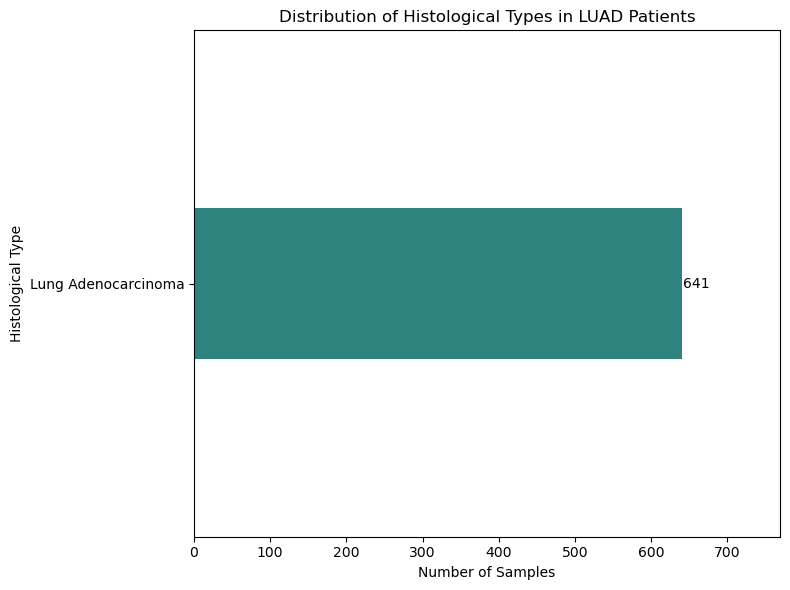


[LUAD] The most common 'histological_type' for LUAD is: 'Lung Adenocarcinoma'

[LUAD] Filtering to the most common subtype: 'Lung Adenocarcinoma'.
[LUAD] Number of samples in this subtype: 641


In [75]:
# Step 1: Filter the clinical DataFrame to retrieve only the LUAD (lung cancer) samples
# Select rows where 'cancer type abbreviation' is 'LUAD'
df_clinical_LUAD = df_clinical[df_clinical["cancer type abbreviation"] == "LUAD"]

# Store the total number of LUAD samples
num_luadc_LUAD = df_clinical_LUAD.shape[0]
print(f"\n[LUAD] Number of LUAD samples: {num_luadc_LUAD}")

# Step 2: Calculate how many samples fall under each histological type (LUAD)
# Count the occurrences of each histological type
hist_counts_LUAD = df_clinical_LUAD["histological_type"].value_counts(dropna=False)
print("\n[LUAD] Frequency of 'histological_type' among LUAD samples:")

# Determine max length for pretty printing
max_len_LUAD = max(len(str(ht)) for ht in hist_counts_LUAD.index)
for hist_type, freq in hist_counts_LUAD.items():
    # Print each histological type and its frequency
    print(f"{hist_type:<{max_len_LUAD}}   {freq:>3}")

# Create a DataFrame for plotting
hist_df_LUAD = pd.DataFrame({
    "hist_type": hist_counts_LUAD.index,
    "freq": hist_counts_LUAD.values
})

# Step 3: Plot a horizontal bar chart of these histological type frequencies (LUAD)
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=hist_df_LUAD,
    x="freq",
    y="hist_type",
    hue="hist_type",
    dodge=False,
    palette="viridis",
    legend=False,
    width=0.3 
)

# Create a horizontal bar plot of frequencies by histological type
plt.xlabel("Number of Samples")
plt.ylabel("Histological Type")
plt.title("Distribution of Histological Types in LUAD Patients")

ax.set_xlim(0, hist_counts_LUAD.max() * 1.2)

# Label each bar with its count
for i, row in hist_df_LUAD.iterrows():
    val = row["freq"]
    ax.text(val + 0.3, i, str(int(val)), color="black", va="center")

plt.tight_layout()
plt.show()

# Step 4: Identify and report the most common histological type among LUAD samples
if not hist_counts_LUAD.empty:
    # Retrieve the histological type with the highest frequency
    most_common_subtype_LUAD = hist_counts_LUAD.index[0]
    print(f"\n[LUAD] The most common 'histological_type' for LUAD is: '{most_common_subtype_LUAD}'")

    # Filter LUAD samples to include only those with the most common subtype
    df_clinical_LUAD_sub = df_clinical_LUAD[
        df_clinical_LUAD["histological_type"] == most_common_subtype_LUAD
    ]
    print(f"\n[LUAD] Filtering to the most common subtype: '{most_common_subtype_LUAD}'.")
    print(f"[LUAD] Number of samples in this subtype: {df_clinical_LUAD_sub.shape[0]}")
else:
    print("[LUAD] No 'histological_type' entries found for LUAD samples.")

#### Subsection 6.3: Loading, Filtering, and Visualizing PRAD Histological Types

In this subsection, we load clinical data for multiple cancer types, filter for PRAD (Prostate Adenocarcinoma),
calculate the frequencies of each histological type within PRAD, visualize these frequencies in a bar plot,
and then identify and subset the most common histological subtype.


[PRAD] Number of PRAD samples: 566

[PRAD] Frequency of 'histological_type' among PRAD samples:
Prostate Adenocarcinoma Acinar Type      550
Prostate Adenocarcinoma, Other Subtype    16


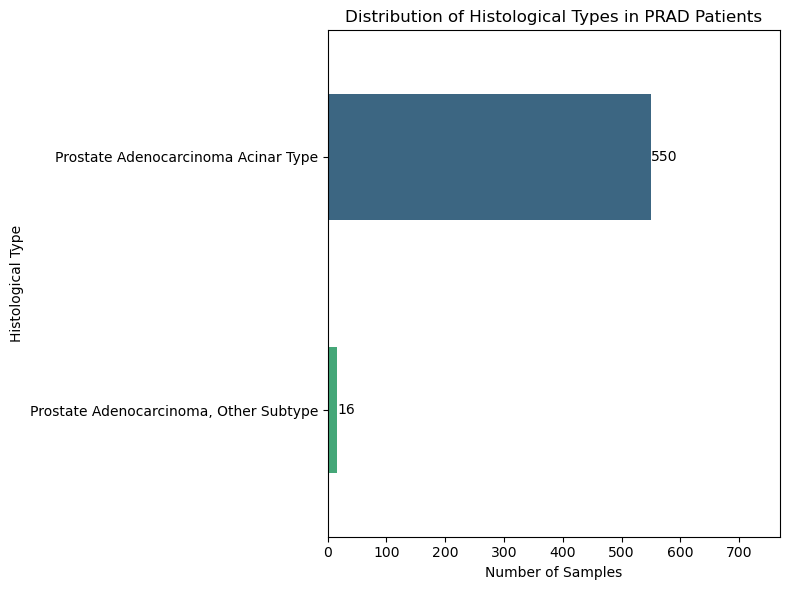


[PRAD] The most common 'histological_type' for PRAD is: 'Prostate Adenocarcinoma Acinar Type'

[PRAD] Filtering to the most common subtype: 'Prostate Adenocarcinoma Acinar Type'.
[PRAD] Number of samples in this subtype: 550


In [79]:
# Step 1: Filter the clinical DataFrame to retrieve only the PRAD (prostate cancer) samples
# Select rows where 'cancer type abbreviation' is 'PRAD'
df_clinical_PRAD = df_clinical[df_clinical["cancer type abbreviation"] == "PRAD"]

# Store the total number of PRAD samples
num_pradc_PRAD = df_clinical_PRAD.shape[0]
print(f"\n[PRAD] Number of PRAD samples: {num_pradc_PRAD}")

# Step 2: Calculate how many samples fall under each histological type (PRAD)
# Count the occurrences of each histological type
hist_counts_PRAD = df_clinical_PRAD["histological_type"].value_counts(dropna=False)
print("\n[PRAD] Frequency of 'histological_type' among PRAD samples:")

# Determine max length for pretty printing
max_len_PRAD = max(len(str(ht)) for ht in hist_counts_PRAD.index)
for hist_type, freq in hist_counts_PRAD.items():
    # Print each histological type and its frequency
    print(f"{hist_type:<{max_len_PRAD}}   {freq:>3}")

# Create a DataFrame for plotting
hist_df_PRAD = pd.DataFrame({
    "hist_type": hist_counts_PRAD.index,
    "freq": hist_counts_PRAD.values
})

# Step 3: Plot a horizontal bar chart of these histological type frequencies (PRAD)
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=hist_df_PRAD,
    x="freq",
    y="hist_type",
    hue="hist_type",
    dodge=False,
    palette="viridis",
    legend=False,
    width=0.5
)

# Create a horizontal bar plot of frequencies by histological type
plt.xlabel("Number of Samples")
plt.ylabel("Histological Type")
plt.title("Distribution of Histological Types in PRAD Patients")
ax.set_xlim(0, hist_counts_LUAD.max() * 1.2)

# Label each bar with its count
for i, row in hist_df_PRAD.iterrows():
    val = row["freq"]
    ax.text(val + 0.3, i, str(int(val)), color="black", va="center")

plt.tight_layout()
plt.show()

# Step 4: Identify and report the most common histological type among PRAD samples
if not hist_counts_PRAD.empty:
    # Retrieve the histological type with the highest frequency
    most_common_subtype_PRAD = hist_counts_PRAD.index[0]
    print(f"\n[PRAD] The most common 'histological_type' for PRAD is: '{most_common_subtype_PRAD}'")

    # Filter PRAD samples to include only those with the most common subtype
    df_clinical_PRAD_sub = df_clinical_PRAD[
        df_clinical_PRAD["histological_type"] == most_common_subtype_PRAD
    ]
    print(f"\n[PRAD] Filtering to the most common subtype: '{most_common_subtype_PRAD}'.")
    print(f"[PRAD] Number of samples in this subtype: {df_clinical_PRAD_sub.shape[0]}")
else:
    print("[PRAD] No 'histological_type' entries found for PRAD samples.")

#### Subsection 6.4: Loading, Filtering, and Visualizing SKCM Histological Types

In this subsection, we load clinical data for multiple cancer types, filter for SKCM (Skin Cutaneous Melanoma),
calculate the frequencies of each histological type within SKCM, visualize these frequencies in a bar plot,
and then identify and subset the most common histological subtype.

In [83]:
# Step 1: Filter the clinical DataFrame to retrieve only the SKCM (skin cancer) samples
# Select rows where 'cancer type abbreviation' is 'SKCM'
df_clinical_SKCM = df_clinical[df_clinical["cancer type abbreviation"] == "SKCM"]

# Store the total number of SKCM samples
num_skcmm_SKCM = df_clinical_SKCM.shape[0]
print(f"\n[SKCM] Number of SKCM samples: {num_skcmm_SKCM}")

# Step 2: Calculate how many samples fall under each histological type (SKCM)
# Count the occurrences of each histological type
hist_counts_SKCM = df_clinical_SKCM["histological_type"].value_counts(dropna=False)
print("\n[SKCM] Frequency of 'histological_type' among SKCM samples:")

# Determine max length for neat printing
max_len_SKCM = max(len(str(ht)) for ht in hist_counts_SKCM.index)
for hist_type, freq in hist_counts_SKCM.items():
    print(f"{hist_type:<{max_len_SKCM}}   {freq:>3}")

# Create a DataFrame for plotting
hist_df_SKCM = pd.DataFrame({
    "hist_type": hist_counts_SKCM.index,
    "freq": hist_counts_SKCM.values
})

# Step 3: Plot a horizontal bar chart of these histological type frequencies (SKCM),
#         or skip the plot if no valid (non-NaN) histological types exist.
if hist_df_SKCM.dropna(subset=["hist_type"]).empty:
    # If the DataFrame is empty or only contains NaN categories, skip plotting
    print("[SKCM] No valid histological_type data for SKCM samples, skipping plot.")
else:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        data=hist_df_SKCM,
        x="freq",
        y="hist_type",
        hue="hist_type",
        dodge=False,
        palette="viridis",
        legend=False
    )
    plt.xlabel("Number of Samples")
    plt.ylabel("Histological Type")
    plt.title("Distribution of Histological Types in SKCM Patients")
    ax.set_xlim(0, hist_counts_SKCM.max() * 1.2)

    # Label each bar with its count
    for i, row in hist_df_SKCM.iterrows():
        val = row["freq"]
        ax.text(val + 0.3, i, str(int(val)), color="black", va="center")

    plt.tight_layout()
    plt.show()

# Step 4: Identify and report the most common histological type among SKCM samples
if not hist_counts_SKCM.empty:
    most_common_subtype_SKCM = hist_counts_SKCM.index[0]
    print(f"\n[SKCM] The most common 'histological_type' for SKCM is: '{most_common_subtype_SKCM}'")

    # If the most common subtype is NaN (i.e. all samples have NaN in this column),
    # treat all SKCM samples as one group named "All SKCM Samples".
    if pd.isna(most_common_subtype_SKCM) or str(most_common_subtype_SKCM).lower() == 'nan':
        df_clinical_SKCM_sub = df_clinical_SKCM
        print(f"\n[SKCM] Filtering to the most common subtype: 'All SKCM Samples'.")
        print(f"[SKCM] Number of samples in this subtype: {df_clinical_SKCM_sub.shape[0]}")
    else:
        df_clinical_SKCM_sub = df_clinical_SKCM[
            df_clinical_SKCM["histological_type"] == most_common_subtype_SKCM
        ]
        print(f"\n[SKCM] Filtering to the most common subtype: '{most_common_subtype_SKCM}'.")
        print(f"[SKCM] Number of samples in this subtype: {df_clinical_SKCM_sub.shape[0]}")
else:
    print("[SKCM] No 'histological_type' entries found for SKCM samples.")


[SKCM] Number of SKCM samples: 479

[SKCM] Frequency of 'histological_type' among SKCM samples:
nan   479
[SKCM] No valid histological_type data for SKCM samples, skipping plot.

[SKCM] The most common 'histological_type' for SKCM is: 'nan'

[SKCM] Filtering to the most common subtype: 'All SKCM Samples'.
[SKCM] Number of samples in this subtype: 479


#### Subsection 6.5: Loading, Filtering, and Visualizing STAD Histological Types

In this subsection, we load clinical data for multiple cancer types, filter for STAD (Stomach Adenocarcinoma),
calculate the frequencies of each histological type within STAD, visualize these frequencies in a bar plot,
and then identify and subset the most common histological subtype.


[STAD] Number of STAD samples: 511

[STAD] Frequency of 'histological_type' among STAD samples:
Stomach, Adenocarcinoma, Not Otherwise Specified (NOS)              208
Stomach, Intestinal Adenocarcinoma, Not Otherwise Specified (NOS)    90
Stomach, Intestinal Adenocarcinoma, Tubular Type                     85
Stomach, Adenocarcinoma, Diffuse Type                                80
Stomach, Intestinal Adenocarcinoma, Mucinous Type                    23
Stomach Adenocarcinoma, Signet Ring Type                             13
Stomach, Intestinal Adenocarcinoma, Papillary Type                    9
nan                                                                   2
[Discrepancy]                                                         1


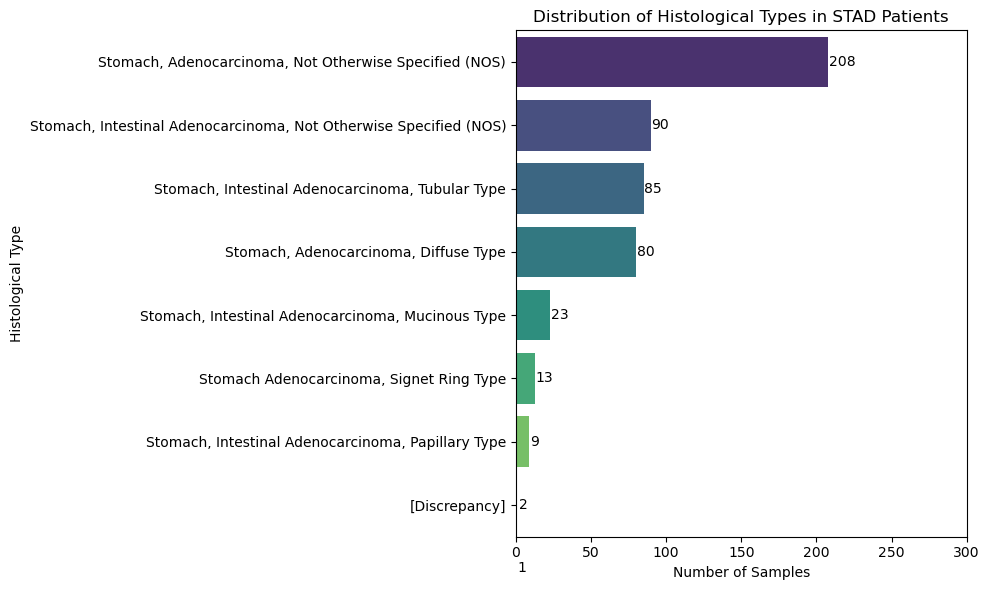


[STAD] The most common 'histological_type' for STAD is: 'Stomach, Adenocarcinoma, Not Otherwise Specified (NOS)'

[STAD] Filtering to the most common subtype: 'Stomach, Adenocarcinoma, Not Otherwise Specified (NOS)'.
[STAD] Number of samples in this subtype: 208


In [87]:
# Step 1: Filter the clinical DataFrame to retrieve only the STAD (stomach cancer) samples
# Select rows where 'cancer type abbreviation' is 'STAD'
df_clinical_STAD = df_clinical[df_clinical["cancer type abbreviation"] == "STAD"]

# Store the total number of STAD samples
num_stadc_STAD = df_clinical_STAD.shape[0]
print(f"\n[STAD] Number of STAD samples: {num_stadc_STAD}")

# Step 2: Calculate how many samples fall under each histological type (STAD)
# Count the occurrences of each histological type
hist_counts_STAD = df_clinical_STAD["histological_type"].value_counts(dropna=False)
print("\n[STAD] Frequency of 'histological_type' among STAD samples:")

# Determine max length for pretty printing
max_len_STAD = max(len(str(ht)) for ht in hist_counts_STAD.index)
for hist_type, freq in hist_counts_STAD.items():
    # Print each histological type and its frequency
    print(f"{hist_type:<{max_len_STAD}}   {freq:>3}")

# Create a DataFrame for plotting
hist_df_STAD = pd.DataFrame({
    "hist_type": hist_counts_STAD.index,
    "freq": hist_counts_STAD.values
})

# Step 3: Plot a horizontal bar chart of these histological type frequencies (STAD)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=hist_df_STAD,
    x="freq",
    y="hist_type",
    hue="hist_type",
    dodge=False,
    palette="viridis",
    legend=False
)

# Create a horizontal bar plot of frequencies by histological type
plt.xlabel("Number of Samples")
plt.ylabel("Histological Type")
plt.title("Distribution of Histological Types in STAD Patients")
ax.set_xlim(0, 300)

# Label each bar with its count
for i, row in hist_df_STAD.iterrows():
    val = row["freq"]
    ax.text(val + 0.3, i, str(int(val)), color="black", va="center")

plt.tight_layout()
plt.show()

# Step 4: Identify and report the most common histological type among STAD samples
if not hist_counts_STAD.empty:
    # Retrieve the histological type with the highest frequency
    most_common_subtype_STAD = hist_counts_STAD.index[0]
    print(f"\n[STAD] The most common 'histological_type' for STAD is: '{most_common_subtype_STAD}'")

    # Filter STAD samples to include only those with the most common subtype
    df_clinical_STAD_sub = df_clinical_STAD[
        df_clinical_STAD["histological_type"] == most_common_subtype_STAD
    ]
    print(f"\n[STAD] Filtering to the most common subtype: '{most_common_subtype_STAD}'.")
    print(f"[STAD] Number of samples in this subtype: {df_clinical_STAD_sub.shape[0]}")
else:
    print("[STAD] No 'histological_type' entries found for STAD samples.")

### Section 7: Subtype-Specific Filtering of Gene Expression Level and Methylation Data

In this section, we filter gene expression_level and methylation DataFrames to samples that:
1) Belong to the most common histological subtype for each cancer,
2) Classified as High or Low for MIR100HG expression (top/bottom 33%),
3) Include valid data across clinical, expression, and methylation DataFrames.

In [91]:
# PAAD (Pancreatic Adenocarcinoma)
# Step 1: Print a summary of available data for PAAD
print("PAAD Filtering:")
print("[PAAD] Number of samples in PAAD Gene_Expression file:", df_expr_PAAD.shape[1])
print("[PAAD] Number of samples in PAAD Gene_Methylation file:", df_meth_PAAD.shape[1])
print("[PAAD] Number of samples in the PAAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories:", df_mir100hg_33_extremes_PAAD.shape[0])
print("[PAAD] Number of samples in chosen PAAD subtype:", df_clinical_PAAD_sub.shape[0])
print("[PAAD] First 5 rows of df_clinical_PAAD_sub:")
display(df_clinical_PAAD_sub.head())

# Step 2: Identify the intersection of sample IDs across clinical, expression, methylation, and MIR100HG (High/Low)
mir100hg_samples_extremes_PAAD = set(df_mir100hg_33_extremes_PAAD["Sample"])
clin_samples_PAAD = set(df_clinical_PAAD_sub["sample"])
expr_samples_PAAD = set(df_expr_PAAD.columns) - {"HGNC_symbol"}
meth_samples_PAAD = set(df_meth_PAAD.columns)

common_samples_PAAD = (
    expr_samples_PAAD
    .intersection(meth_samples_PAAD)
    .intersection(mir100hg_samples_extremes_PAAD)
    .intersection(clin_samples_PAAD)
)

print(f"\n[PAAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): {len(common_samples_PAAD)}")

# Step 3: Filter expression and methylation DataFrames to only these samples
df_filter_expr_PAAD = df_expr_PAAD[["HGNC_symbol"] + list(common_samples_PAAD)]
print("[PAAD] df_expr_PAAD shape AFTER filtering:", df_filter_expr_PAAD.shape)

df_filter_meth_PAAD = df_meth_PAAD[list(common_samples_PAAD)]
print("[PAAD] df_meth_PAAD shape AFTER filtering:", df_filter_meth_PAAD.shape)


# LUAD (Lung Adenocarcinoma)
# Step 1: Print a summary of available data for LUAD
print("\nLUAD Filtering:")
print("[LUAD] Number of samples in LUAD Gene_Expression file:", df_expr_LUAD.shape[1])
print("[LUAD] Number of samples in LUAD Gene_Methylation file:", df_meth_LUAD.shape[1])
print("[LUAD] Number of samples in the LUAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories:", df_mir100hg_33_extremes_LUAD.shape[0])
print("[LUAD] Number of samples in chosen LUAD subtype:", df_clinical_LUAD_sub.shape[0])
print("[LUAD] First 5 rows of df_clinical_LUAD_sub:")
display(df_clinical_LUAD_sub.head())

# Step 2: Identify the intersection of sample IDs across clinical, expression, methylation, and MIR100HG (High/Low)
mir100hg_samples_extremes_LUAD = set(df_mir100hg_33_extremes_LUAD["Sample"])
clin_samples_LUAD = set(df_clinical_LUAD_sub["sample"])
expr_samples_LUAD = set(df_expr_LUAD.columns) - {"HGNC_symbol"}
meth_samples_LUAD = set(df_meth_LUAD.columns)

common_samples_LUAD = (
    expr_samples_LUAD
    .intersection(meth_samples_LUAD)
    .intersection(mir100hg_samples_extremes_LUAD)
    .intersection(clin_samples_LUAD)
)

print(f"\n[LUAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): {len(common_samples_LUAD)}")

# Step 3: Filter expression and methylation DataFrames to only these samples
df_filter_expr_LUAD = df_expr_LUAD[["HGNC_symbol"] + list(common_samples_LUAD)]
print("[LUAD] df_expr_LUAD shape AFTER filtering:", df_filter_expr_LUAD.shape)

df_filter_meth_LUAD = df_meth_LUAD[list(common_samples_LUAD)]
print("[LUAD] df_meth_LUAD shape AFTER filtering:", df_filter_meth_LUAD.shape)


# PRAD (Prostate Adenocarcinoma)
# Step 1: Print a summary of available data for PRAD
print("\nPRAD Filtering:")
print("[PRAD] Number of samples in PRAD Gene_Expression file:", df_expr_PRAD.shape[1])
print("[PRAD] Number of samples in PRAD Gene_Methylation file:", df_meth_PRAD.shape[1])
print("[PRAD] Number of samples in the PRAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories:", df_mir100hg_33_extremes_PRAD.shape[0])
print("[PRAD] Number of samples in chosen PRAD subtype:", df_clinical_PRAD_sub.shape[0])
print("[PRAD] First 5 rows of df_clinical_PRAD_sub:")
display(df_clinical_PRAD_sub.head())

# Step 2: Identify the intersection of sample IDs across clinical, expression, methylation, and MIR100HG (High/Low)
mir100hg_samples_extremes_PRAD = set(df_mir100hg_33_extremes_PRAD["Sample"])
clin_samples_PRAD = set(df_clinical_PRAD_sub["sample"])
expr_samples_PRAD = set(df_expr_PRAD.columns) - {"HGNC_symbol"}
meth_samples_PRAD = set(df_meth_PRAD.columns)

common_samples_PRAD = (
    expr_samples_PRAD
    .intersection(meth_samples_PRAD)
    .intersection(mir100hg_samples_extremes_PRAD)
    .intersection(clin_samples_PRAD)
)

print(f"\n[PRAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): {len(common_samples_PRAD)}")

# Step 3: Filter expression and methylation DataFrames to only these samples
df_filter_expr_PRAD = df_expr_PRAD[["HGNC_symbol"] + list(common_samples_PRAD)]
print("[PRAD] df_expr_PRAD shape AFTER filtering:", df_filter_expr_PRAD.shape)

df_filter_meth_PRAD = df_meth_PRAD[list(common_samples_PRAD)]
print("[PRAD] df_meth_PRAD shape AFTER filtering:", df_filter_meth_PRAD.shape)


# SKCM (Skin Cutaneous Melanoma)
# Step 1: Print a summary of available data for SKCM
print("\nSKCM Filtering:")
print("[SKCM] Number of samples in SKCM Gene_Expression file:", df_expr_SKCM.shape[1])
print("[SKCM] Number of samples in SKCM Gene_Methylation file:", df_meth_SKCM.shape[1])
print("[SKCM] Number of samples in the SKCM dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories:", df_mir100hg_33_extremes_SKCM.shape[0])
print("[SKCM] Number of samples in chosen SKCM subtype:", df_clinical_SKCM_sub.shape[0])
print("[SKCM] First 5 rows of df_clinical_SKCM_sub:")
display(df_clinical_SKCM_sub.head())

# Step 2: Identify the intersection of sample IDs across clinical, expression, methylation, and MIR100HG (High/Low)
mir100hg_samples_extremes_SKCM = set(df_mir100hg_33_extremes_SKCM["Sample"])
clin_samples_SKCM = set(df_clinical_SKCM_sub["sample"])
expr_samples_SKCM = set(df_expr_SKCM.columns) - {"HGNC_symbol"}
meth_samples_SKCM = set(df_meth_SKCM.columns)

common_samples_SKCM = (
    expr_samples_SKCM
    .intersection(meth_samples_SKCM)
    .intersection(mir100hg_samples_extremes_SKCM)
    .intersection(clin_samples_SKCM)
)

print(f"\n[SKCM] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): {len(common_samples_SKCM)}")

# Step 3: Filter expression and methylation DataFrames to only these samples
df_filter_expr_SKCM = df_expr_SKCM[["HGNC_symbol"] + list(common_samples_SKCM)]
print("[SKCM] df_expr_SKCM shape AFTER filtering:", df_filter_expr_SKCM.shape)

df_filter_meth_SKCM = df_meth_SKCM[list(common_samples_SKCM)]
print("[SKCM] df_meth_SKCM shape AFTER filtering:", df_filter_meth_SKCM.shape)


# STAD (Stomach Adenocarcinoma)
# Step 1: Print a summary of available data for STAD
print("\nSTAD Filtering:")
print("[STAD] Number of samples in STAD Gene_Expression file:", df_expr_STAD.shape[1])
print("[STAD] Number of samples in STAD Gene_Methylation file:", df_meth_STAD.shape[1])
print("[STAD] Number of samples in the STAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories:", df_mir100hg_33_extremes_STAD.shape[0])
print("[STAD] Number of samples in chosen STAD subtype:", df_clinical_STAD_sub.shape[0])
print("[STAD] First 5 rows of df_clinical_STAD_sub:")
display(df_clinical_STAD_sub.head())

# Step 2: Identify the intersection of sample IDs across clinical, expression, methylation, and MIR100HG (High/Low)
mir100hg_samples_extremes_STAD = set(df_mir100hg_33_extremes_STAD["Sample"])
clin_samples_STAD = set(df_clinical_STAD_sub["sample"])
expr_samples_STAD = set(df_expr_STAD.columns) - {"HGNC_symbol"}
meth_samples_STAD = set(df_meth_STAD.columns)

common_samples_STAD = (
    expr_samples_STAD
    .intersection(meth_samples_STAD)
    .intersection(mir100hg_samples_extremes_STAD)
    .intersection(clin_samples_STAD)
)

print(f"\n[STAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): {len(common_samples_STAD)}")

# Step 3: Filter expression and methylation DataFrames to only these samples
df_filter_expr_STAD = df_expr_STAD[["HGNC_symbol"] + list(common_samples_STAD)]
print("[STAD] df_expr_STAD shape AFTER filtering:", df_filter_expr_STAD.shape)

df_filter_meth_STAD = df_meth_STAD[list(common_samples_STAD)]
print("[STAD] df_meth_STAD shape AFTER filtering:", df_filter_meth_STAD.shape)

PAAD Filtering:
[PAAD] Number of samples in PAAD Gene_Expression file: 184
[PAAD] Number of samples in PAAD Gene_Methylation file: 195
[PAAD] Number of samples in the PAAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories: 122
[PAAD] Number of samples in chosen PAAD subtype: 163
[PAAD] First 5 rows of df_clinical_PAAD_sub:


sample      _PATIENT cancer type abbreviation  \
8635  TCGA-2J-AAB6-01  TCGA-2J-AAB6                     PAAD   
8636  TCGA-2J-AAB8-01  TCGA-2J-AAB8                     PAAD   
8637  TCGA-2J-AAB9-01  TCGA-2J-AAB9                     PAAD   
8638  TCGA-2J-AABA-01  TCGA-2J-AABA                     PAAD   
8639  TCGA-2J-AABE-01  TCGA-2J-AABE                     PAAD   

      age_at_initial_pathologic_diagnosis  gender   race  \
8635                                 75.0    MALE  WHITE   
8636                                 71.0    MALE  WHITE   
8637                                 70.0  FEMALE  WHITE   
8638                                 55.0    MALE  WHITE   
8639                                 73.0    MALE  WHITE   

     ajcc_pathologic_tumor_stage clinical_stage  \
8635                   Stage IIA            NaN   
8636                   Stage IIB            NaN   
8637                   Stage IIB            NaN   
8638                   Stage IIB            NaN   
8639                   Stage IIA            NaN   

                        histological_type histological_grade  ...  \
8635  Pancreas-Adenocarcinoma Ductal Type                 G2  ...   
8636  Pancreas-Adenocarcinoma Ductal Type                 G3  ...   
8637  Pancreas-Adenocarcinoma Ductal Type                 G1  ...   
8638  Pancreas-Adenocarcinoma Ductal Type                 G2  ...   
8639  Pancreas-Adenocarcinoma Ductal Type                 G2  ...   

      residual_tumor   OS  OS.time  DSS DSS.time  DFI  DFI.time  PFI PFI.time  \
8635             NaN  1.0    293.0  1.0    293.0  NaN       NaN  1.0    169.0   
8636             NaN  0.0     80.0  0.0     80.0  NaN       NaN  0.0     80.0   
8637             NaN  1.0    627.0  1.0    627.0  1.0     521.0  1.0    521.0   
8638             NaN  1.0    607.0  1.0    607.0  NaN       NaN  1.0    160.0   
8639             NaN  0.0    676.0  0.0    676.0  0.0     676.0  0.0    676.0   

     Redaction  
8635       NaN  
8636       NaN  
8637       NaN  
8638       NaN  
8639       NaN  

[5 rows x 34 columns]


[PAAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): 95
[PAAD] df_expr_PAAD shape AFTER filtering: (56404, 96)
[PAAD] df_meth_PAAD shape AFTER filtering: (485577, 95)

LUAD Filtering:
[LUAD] Number of samples in LUAD Gene_Expression file: 544
[LUAD] Number of samples in LUAD Gene_Methylation file: 492
[LUAD] Number of samples in the LUAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories: 358
[LUAD] Number of samples in chosen LUAD subtype: 641
[LUAD] First 5 rows of df_clinical_LUAD_sub:


sample      _PATIENT cancer type abbreviation  \
6678  TCGA-05-4244-01  TCGA-05-4244                     LUAD   
6679  TCGA-05-4249-01  TCGA-05-4249                     LUAD   
6680  TCGA-05-4250-01  TCGA-05-4250                     LUAD   
6681  TCGA-05-4382-01  TCGA-05-4382                     LUAD   
6682  TCGA-05-4384-01  TCGA-05-4384                     LUAD   

      age_at_initial_pathologic_diagnosis  gender race  \
6678                                 70.0    MALE  NaN   
6679                                 67.0    MALE  NaN   
6680                                 79.0  FEMALE  NaN   
6681                                 68.0    MALE  NaN   
6682                                 66.0    MALE  NaN   

     ajcc_pathologic_tumor_stage clinical_stage    histological_type  \
6678                    Stage IV            NaN  Lung Adenocarcinoma   
6679                    Stage IB            NaN  Lung Adenocarcinoma   
6680                  Stage IIIA            NaN  Lung Adenocarcinoma   
6681                    Stage IB            NaN  Lung Adenocarcinoma   
6682                  Stage IIIA            NaN  Lung Adenocarcinoma   

     histological_grade  ...  residual_tumor   OS  OS.time  DSS DSS.time  DFI  \
6678                NaN  ...             NaN  0.0      0.0  0.0      0.0  NaN   
6679                NaN  ...             NaN  0.0   1523.0  0.0   1523.0  NaN   
6680                NaN  ...             NaN  1.0    121.0  NaN    121.0  NaN   
6681                NaN  ...             NaN  0.0    607.0  0.0    607.0  1.0   
6682                NaN  ...             NaN  0.0    426.0  0.0    426.0  NaN   

      DFI.time  PFI PFI.time Redaction  
6678       NaN  0.0      0.0       NaN  
6679       NaN  0.0   1523.0       NaN  
6680       NaN  0.0    121.0       NaN  
6681     334.0  1.0    334.0       NaN  
6682       NaN  1.0    183.0       NaN  

[5 rows x 34 columns]


[LUAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): 323
[LUAD] df_expr_LUAD shape AFTER filtering: (56404, 324)
[LUAD] df_meth_LUAD shape AFTER filtering: (485577, 323)

PRAD Filtering:
[PRAD] Number of samples in PRAD Gene_Expression file: 547
[PRAD] Number of samples in PRAD Gene_Methylation file: 549
[PRAD] Number of samples in the PRAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories: 362
[PRAD] Number of samples in chosen PRAD subtype: 550
[PRAD] First 5 rows of df_clinical_PRAD_sub:


sample      _PATIENT cancer type abbreviation  \
9016  TCGA-2A-A8VL-01  TCGA-2A-A8VL                     PRAD   
9017  TCGA-2A-A8VO-01  TCGA-2A-A8VO                     PRAD   
9018  TCGA-2A-A8VT-01  TCGA-2A-A8VT                     PRAD   
9019  TCGA-2A-A8VV-01  TCGA-2A-A8VV                     PRAD   
9020  TCGA-2A-A8VX-01  TCGA-2A-A8VX                     PRAD   

      age_at_initial_pathologic_diagnosis gender race  \
9016                                 51.0   MALE  NaN   
9017                                 57.0   MALE  NaN   
9018                                 47.0   MALE  NaN   
9019                                 52.0   MALE  NaN   
9020                                 70.0   MALE  NaN   

     ajcc_pathologic_tumor_stage clinical_stage  \
9016                         NaN            NaN   
9017                         NaN            NaN   
9018                         NaN            NaN   
9019                         NaN            NaN   
9020                         NaN            NaN   

                        histological_type histological_grade  ...  \
9016  Prostate Adenocarcinoma Acinar Type                NaN  ...   
9017  Prostate Adenocarcinoma Acinar Type                NaN  ...   
9018  Prostate Adenocarcinoma Acinar Type                NaN  ...   
9019  Prostate Adenocarcinoma Acinar Type                NaN  ...   
9020  Prostate Adenocarcinoma Acinar Type                NaN  ...   

      residual_tumor   OS  OS.time  DSS DSS.time  DFI  DFI.time  PFI PFI.time  \
9016             NaN  0.0    621.0  0.0    621.0  NaN       NaN  0.0    621.0   
9017             NaN  0.0   1701.0  0.0   1701.0  NaN       NaN  0.0   1701.0   
9018             NaN  0.0   1373.0  0.0   1373.0  NaN       NaN  0.0   1373.0   
9019             NaN  0.0    671.0  0.0    671.0  NaN       NaN  0.0    671.0   
9020             NaN  0.0   1378.0  0.0   1378.0  NaN       NaN  0.0   1378.0   

     Redaction  
9016       NaN  
9017       NaN  
9018       NaN  
9019       NaN  
9020       NaN  

[5 rows x 34 columns]


[PRAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): 352
[PRAD] df_expr_PRAD shape AFTER filtering: (56404, 353)
[PRAD] df_meth_PRAD shape AFTER filtering: (485577, 352)

SKCM Filtering:
[SKCM] Number of samples in SKCM Gene_Expression file: 105
[SKCM] Number of samples in SKCM Gene_Methylation file: 476
[SKCM] Number of samples in the SKCM dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories: 68
[SKCM] Number of samples in chosen SKCM subtype: 479
[SKCM] First 5 rows of df_clinical_SKCM_sub:


sample      _PATIENT cancer type abbreviation  \
10036  TCGA-3N-A9WB-06  TCGA-3N-A9WB                     SKCM   
10037  TCGA-3N-A9WC-06  TCGA-3N-A9WC                     SKCM   
10038  TCGA-3N-A9WD-06  TCGA-3N-A9WD                     SKCM   
10039  TCGA-BF-A1PU-01  TCGA-BF-A1PU                     SKCM   
10040  TCGA-BF-A1PV-01  TCGA-BF-A1PV                     SKCM   

       age_at_initial_pathologic_diagnosis  gender   race  \
10036                                 71.0    MALE  WHITE   
10037                                 82.0    MALE  WHITE   
10038                                 82.0    MALE  WHITE   
10039                                 46.0  FEMALE  WHITE   
10040                                 74.0  FEMALE  WHITE   

      ajcc_pathologic_tumor_stage clinical_stage histological_type  \
10036                    Stage IA            NaN               NaN   
10037                   Stage IIA            NaN               NaN   
10038                  Stage IIIA            NaN               NaN   
10039                   Stage IIC            NaN               NaN   
10040                   Stage IIC            NaN               NaN   

      histological_grade  ...  residual_tumor   OS  OS.time  DSS DSS.time  \
10036                NaN  ...             NaN  1.0    518.0  1.0    518.0   
10037                NaN  ...             NaN  0.0   2022.0  0.0   2022.0   
10038                NaN  ...             NaN  1.0    395.0  1.0    395.0   
10039                NaN  ...             NaN  0.0    387.0  0.0    387.0   
10040                NaN  ...             NaN  0.0     14.0  0.0     14.0   

       DFI  DFI.time  PFI PFI.time Redaction  
10036  NaN       NaN  1.0    426.0       NaN  
10037  NaN       NaN  1.0   1705.0       NaN  
10038  NaN       NaN  1.0    306.0       NaN  
10039  NaN       NaN  1.0    484.0       NaN  
10040  NaN       NaN  0.0     14.0       NaN  

[5 rows x 34 columns]


[SKCM] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): 68
[SKCM] df_expr_SKCM shape AFTER filtering: (56404, 69)
[SKCM] df_meth_SKCM shape AFTER filtering: (485577, 68)

STAD Filtering:
[STAD] Number of samples in STAD Gene_Expression file: 417
[STAD] Number of samples in STAD Gene_Methylation file: 398
[STAD] Number of samples in the STAD dataset after grouping MIR100HG expression levels into high (top 33%) and low (bottom 33%) categories: 274
[STAD] Number of samples in chosen STAD subtype: 208
[STAD] First 5 rows of df_clinical_STAD_sub:


sample      _PATIENT cancer type abbreviation  \
10515  TCGA-3M-AB46-01  TCGA-3M-AB46                     STAD   
10516  TCGA-3M-AB47-01  TCGA-3M-AB47                     STAD   
10522  TCGA-B7-A5TN-01  TCGA-B7-A5TN                     STAD   
10523  TCGA-BR-4183-01  TCGA-BR-4183                     STAD   
10524  TCGA-BR-4183-11  TCGA-BR-4183                     STAD   

       age_at_initial_pathologic_diagnosis  gender   race  \
10515                                 70.0    MALE  WHITE   
10516                                 51.0    MALE  WHITE   
10522                                 60.0    MALE  WHITE   
10523                                 55.0  FEMALE  WHITE   
10524                                 55.0  FEMALE  WHITE   

      ajcc_pathologic_tumor_stage clinical_stage  \
10515                    Stage IB            NaN   
10516                  Stage IIIB            NaN   
10522                   Stage IIB            NaN   
10523                  Stage IIIA            NaN   
10524                  Stage IIIA            NaN   

                                       histological_type histological_grade  \
10515  Stomach, Adenocarcinoma, Not Otherwise Specifi...                 G2   
10516  Stomach, Adenocarcinoma, Not Otherwise Specifi...                 G3   
10522  Stomach, Adenocarcinoma, Not Otherwise Specifi...                 G2   
10523  Stomach, Adenocarcinoma, Not Otherwise Specifi...                 G3   
10524  Stomach, Adenocarcinoma, Not Otherwise Specifi...                 G3   

       ...  residual_tumor   OS  OS.time  DSS DSS.time  DFI  DFI.time  PFI  \
10515  ...             NaN  0.0   1765.0  0.0   1765.0  0.0    1765.0  0.0   
10516  ...             NaN  1.0      NaN  1.0      NaN  NaN       NaN  1.0   
10522  ...             NaN  0.0    287.0  0.0    287.0  0.0     287.0  0.0   
10523  ...             NaN  1.0    201.0  NaN    201.0  NaN       NaN  0.0   
10524  ...             NaN  1.0    201.0  NaN    201.0  NaN       NaN  0.0   

      PFI.time Redaction  
10515   1765.0       NaN  
10516    395.0       NaN  
10522    287.0       NaN  
10523    201.0       NaN  
10524    201.0       NaN  

[5 rows x 34 columns]


[STAD] Number of common samples (expression, methylation, MIR100HG High/Low, clinical-subtype): 76
[STAD] df_expr_STAD shape AFTER filtering: (56404, 77)
[STAD] df_meth_STAD shape AFTER filtering: (485577, 76)


### Section 8: Build Gene Symbol → Ensembl ID Mappings for the Five Cancer Types

In this section, we define and demonstrate a function that constructs a dictionary mapping HGNC gene symbols 
to their corresponding Ensembl gene IDs for each of several cancer datasets. 
We then provide an example invocation of this function 
for multiple cancer types (PAAD, LUAD, PRAD, SKCM, and STAD).

In [99]:
def build_symbol_to_ensg_mapping(df_expr, cancer_type):
    """
    Build and return a dictionary that maps each HGNC gene symbol to one or more 
    Ensembl gene IDs, using data from a preprocessed expression DataFrame.
    """

    print(f"\nBuilding Symbol→ENSG Mapping for {cancer_type}:")

    # Step 1: Prepare a list of Ensembl gene IDs from the expression DataFrame index
    ensg_list = df_expr.index.tolist()  # Convert the DataFrame index (Ensembl IDs) to a Python list

    # Step 2: Create a dictionary mapping gene symbols to one or more Ensembl IDs
    genesymbol_to_ensg = {}
    # Loop through each Ensembl ID and capture its corresponding HGNC symbol
    for ensg_id in ensg_list:
        gene_symbol = df_expr.at[ensg_id, "HGNC_symbol"]  # Retrieve the gene symbol from the DataFrame
        if pd.notnull(gene_symbol):  # Only proceed if the gene symbol is not null
            if gene_symbol not in genesymbol_to_ensg:
                genesymbol_to_ensg[gene_symbol] = []  # Initialize a new list if key not present
            genesymbol_to_ensg[gene_symbol].append(ensg_id)  # Append the Ensembl ID to the list

    # Print confirmation that the dictionary has been created
    print(f"\n[{cancer_type}] Mapping 'genesymbol_to_ensg' has been successfully created.\n")

    # Step 3: Print general statistics about the newly created mapping
    num_symbols = len(genesymbol_to_ensg)  # Count how many distinct gene symbols are present
    num_ensg_in_mapping = sum(len(lst) for lst in genesymbol_to_ensg.values())  # Sum the total number of Ensembl IDs

    print(f"[{cancer_type}]   {num_symbols} distinct gene symbols.")
    print(f"[{cancer_type}]   {num_ensg_in_mapping} total ENSG IDs are mapped (with duplicates).")

    # Step 4: Calculate and display distribution statistics for ENSG IDs per gene symbol
    all_ensg_counts = [len(ensg_list) for ensg_list in genesymbol_to_ensg.values()]
    if len(all_ensg_counts) > 0:
        print(f"\n[{cancer_type}] Number of gene symbols with at least one ENSG:", len(all_ensg_counts))
        print(f"[{cancer_type}] Min ENSG per gene:", min(all_ensg_counts))
        print(f"[{cancer_type}] Max ENSG per gene:", max(all_ensg_counts))
        print(f"[{cancer_type}] Average ENSG per gene:", sum(all_ensg_counts) / len(all_ensg_counts))
    else:
        # This branch only occurs if no gene symbols are found in df_expr
        print(f"\n[{cancer_type}] No valid gene symbols found in this dataset.")

    # Step 5: Demonstrate dictionary lookup for a specific example gene, e.g., MIR100HG
    test_gene = "MIR100HG"
    if test_gene in genesymbol_to_ensg:
        print(f"\n[{cancer_type}] Example: Ensembl IDs for {test_gene}:", genesymbol_to_ensg[test_gene])
    else:
        print(f"\n[{cancer_type}] {test_gene} not in genesymbol_to_ensg.")

    # Return the dictionary for downstream analyses
    return genesymbol_to_ensg

# Step 6: Use the build_symbol_to_ensg_mapping function for five different 
# cancer DataFrames, each providing its own expression data.
if __name__ == "__main__":

    genesymbol_to_ensg_PAAD = build_symbol_to_ensg_mapping(df_expr_PAAD, "PAAD")
    genesymbol_to_ensg_LUAD = build_symbol_to_ensg_mapping(df_expr_LUAD, "LUAD")
    genesymbol_to_ensg_PRAD = build_symbol_to_ensg_mapping(df_expr_PRAD, "PRAD")
    genesymbol_to_ensg_SKCM = build_symbol_to_ensg_mapping(df_expr_SKCM, "SKCM")
    genesymbol_to_ensg_STAD = build_symbol_to_ensg_mapping(df_expr_STAD, "STAD")
    
    # Step 7: Merge all five dictionaries into a single final dictionary, 'genesymbol_to_ensg'
    temp_merged_dict = defaultdict(set)

    def merge_cancer_dict(cancer_dict):
        """
        Merge the Ensembl IDs from a single-cancer dictionary into a global set-based collection.
        """
        for gene_symbol, ensg_list in cancer_dict.items():
            temp_merged_dict[gene_symbol].update(ensg_list)

    # Merge each cancer dictionary
    merge_cancer_dict(genesymbol_to_ensg_PAAD)
    merge_cancer_dict(genesymbol_to_ensg_LUAD)
    merge_cancer_dict(genesymbol_to_ensg_PRAD)
    merge_cancer_dict(genesymbol_to_ensg_SKCM)
    merge_cancer_dict(genesymbol_to_ensg_STAD)

    # Convert sets to sorted lists in the final dictionary called 'genesymbol_to_ensg'
    genesymbol_to_ensg = {
        gene_symbol: sorted(list(ensg_ids))
        for gene_symbol, ensg_ids in temp_merged_dict.items()
    }

    # Print the combined dictionary
    print("\nCombined dictionary 'genesymbol_to_ensg' created successfully.")


Building Symbol→ENSG Mapping for PAAD:

[PAAD] Mapping 'genesymbol_to_ensg' has been successfully created.

[PAAD]   40045 distinct gene symbols.
[PAAD]   40060 total ENSG IDs are mapped (with duplicates).

[PAAD] Number of gene symbols with at least one ENSG: 40045
[PAAD] Min ENSG per gene: 1
[PAAD] Max ENSG per gene: 2
[PAAD] Average ENSG per gene: 1.000374578599076

[PAAD] Example: Ensembl IDs for MIR100HG: ['ENSG00000255248']

Building Symbol→ENSG Mapping for LUAD:

[LUAD] Mapping 'genesymbol_to_ensg' has been successfully created.

[LUAD]   40045 distinct gene symbols.
[LUAD]   40060 total ENSG IDs are mapped (with duplicates).

[LUAD] Number of gene symbols with at least one ENSG: 40045
[LUAD] Min ENSG per gene: 1
[LUAD] Max ENSG per gene: 2
[LUAD] Average ENSG per gene: 1.000374578599076

[LUAD] Example: Ensembl IDs for MIR100HG: ['ENSG00000255248']

Building Symbol→ENSG Mapping for PRAD:

[PRAD] Mapping 'genesymbol_to_ensg' has been successfully created.

[PRAD]   40045 distin

### Section 9: Load and Map Gene–TF Associations to Ensembl IDs

In this section, we load a file containing gene–TF relationships, adjust column names to accurately label genes and TFs, 
and map both gene and TF symbols to their respective Ensembl gene IDs. Afterward, we filter out any pairs for which the Ensembl mapping could not be found.

In [102]:
# Step 1: Load the Gene Attribute Edges File
edges_file = "gene_attribute_edges.txt"
df_edges = pd.read_csv(edges_file, sep="\t", header=0, low_memory=False)

# Print the first few rows to check original data
print("Gene attribute edges file (head):")
display(df_edges.head())  

# Display the dimensions (rows, columns) of the DataFrame
print("df_edges.shape =", df_edges.shape)  

# Rename columns to clarify the Gene–TF Associations
df_edges.rename(columns={
    "source":       "gene",       # Rename 'source' to 'gene'
    "source_desc":  "gene_desc",  # Rename 'source_desc' to 'gene_desc'
    "source_id":    "gene_id",    # Rename 'source_id' to 'gene_id'
    "target":       "tf",         # Rename 'target' to 'tf'
    "target_desc":  "tf_desc",    # Rename 'target_desc' to 'tf_desc'
    "target_id":    "tf_id"       # Rename 'target_id' to 'tf_id'
}, inplace=True)

# Step 2: Convert Gene Symbols and TF Symbols to Ensembl IDs
df_edges["gene_ensg"] = df_edges["gene"].map(genesymbol_to_ensg)
df_edges["tf_ensg"] = df_edges["tf"].map(genesymbol_to_ensg)

# If a symbol maps to multiple Ensembl IDs, we explode them to separate rows
df_edges = df_edges.explode("gene_ensg")
df_edges = df_edges.explode("tf_ensg")

# Step 3: Filter Out Rows with Missing Ensembl Mappings
df_edges.dropna(subset=["gene_ensg", "tf_ensg"], inplace=True)

# Remove any rows where either the gene or the TF did not map to an Ensembl ID
df_edges.reset_index(drop=True, inplace=True)

# Print results:
# Show the first few rows of the updated DataFrame for verification
display(df_edges.head())

# Display the count of gene–TF pairs that remain after filtering
print(f"After filtering, the number of gene/TF pairs found in the expression data is: {df_edges.shape[0]}")

# Step 4: Select MIR100HG-Specific Subset
# Filter 'df_edges' for rows where the gene symbol is "MIR100HG."
# Display how many unique TFs are linked to MIR100HG and list them.
mir100hg_subset = df_edges[df_edges["gene"] == "MIR100HG"]
unique_tfs = mir100hg_subset["tf"].unique()

print(f"Number of unique TFs for MIR100HG: {len(unique_tfs)}")
print("List of corresponding TFs:")
print(unique_tfs)

# Display the subset DataFrame to see MIR100HG rows
display(mir100hg_subset)

Gene attribute edges file (head):


source source_desc source_id   target target_desc target_id    weight
0   GeneSym         NaN    GeneID  GeneSym         NaN    GeneID    weight
1      A1BG          na         1   ARID3A          na      1820  1.000000
2  A1BG-AS1          na    503538   ARID3A          na      1820  1.000000
3      A1CF          na     29974   ARID3A          na      1820  1.000000
4       A2M          na         2   ARID3A          na      1820  1.000000

df_edges.shape = (1655384, 7)


gene gene_desc gene_id      tf tf_desc tf_id    weight  \
0      A1BG        na       1  ARID3A      na  1820  1.000000   
1  A1BG-AS1        na  503538  ARID3A      na  1820  1.000000   
2      A1CF        na   29974  ARID3A      na  1820  1.000000   
3       A2M        na       2  ARID3A      na  1820  1.000000   
4      AAAS        na    8086  ARID3A      na  1820  1.000000   

         gene_ensg          tf_ensg  
0  ENSG00000121410  ENSG00000116017  
1  ENSG00000268895  ENSG00000116017  
2  ENSG00000148584  ENSG00000116017  
3  ENSG00000175899  ENSG00000116017  
4  ENSG00000094914  ENSG00000116017

After filtering, the number of gene/TF pairs found in the expression data is: 1456102
Number of unique TFs for MIR100HG: 56
List of corresponding TFs:
['ATF2' 'BACH1' 'BHLHE40' 'BRCA1' 'CEBPB' 'CHD2' 'CHD7' 'CTCF' 'CTCFL'
 'CUX1' 'E2F4' 'EP300' 'EZH2' 'FOS' 'FOSL2' 'FOXA1' 'FOXP2' 'GATA2'
 'GATA3' 'GTF2F1' 'HDAC1' 'HDAC2' 'JUND' 'KDM4A' 'KDM5A' 'MAFK' 'MAX'
 'MAZ' 'MXI1' 'MYC' 'NR3C1' 'NRF1' 'PBX3' 'POLR2A' 'RAD21' 'RBBP5' 'RCOR1'
 'REST' 'RFX5' 'SIN3A' 'SMC3' 'SP1' 'STAT3' 'TAF1' 'TBL1XR1' 'TBP' 'TCF12'
 'TCF3' 'TCF7L2' 'TEAD4' 'TRIM28' 'USF2' 'WRNIP1' 'YY1' 'ZNF143' 'ZNF263']


gene gene_desc gene_id       tf tf_desc   tf_id    weight  \
20409    MIR100HG        na  399959     ATF2      na    1386  1.000000   
38127    MIR100HG        na  399959    BACH1      na     571  1.000000   
72968    MIR100HG        na  399959  BHLHE40      na    8553  1.000000   
85571    MIR100HG        na  399959    BRCA1      na     672  1.000000   
122361   MIR100HG        na  399959    CEBPB      na    1051  1.000000   
162911   MIR100HG        na  399959     CHD2      na    1106  1.000000   
178845   MIR100HG        na  399959     CHD7      na   55636  1.000000   
212371   MIR100HG        na  399959     CTCF      na   10664  1.000000   
224356   MIR100HG        na  399959    CTCFL      na  140690  1.000000   
230624   MIR100HG        na  399959     CUX1      na    1523  1.000000   
243950   MIR100HG        na  399959     E2F4      na    1874  1.000000   
323420   MIR100HG        na  399959    EP300      na    2033  1.000000   
354067   MIR100HG        na  399959     EZH2      na    2146  1.000000   
371977   MIR100HG        na  399959      FOS      na    2353  1.000000   
384255   MIR100HG        na  399959    FOSL2      na    2355  1.000000   
393353   MIR100HG        na  399959    FOXA1      na    3169  1.000000   
419783   MIR100HG        na  399959    FOXP2      na   93986  1.000000   
448749   MIR100HG        na  399959    GATA2      na    2624  1.000000   
456558   MIR100HG        na  399959    GATA3      na    2625  1.000000   
473808   MIR100HG        na  399959   GTF2F1      na    2962  1.000000   
499792   MIR100HG        na  399959    HDAC1      na    3065  1.000000   
513891   MIR100HG        na  399959    HDAC2      na    3066  1.000000   
589508   MIR100HG        na  399959     JUND      na    3727  1.000000   
622168   MIR100HG        na  399959    KDM4A      na    9682  1.000000   
634598   MIR100HG        na  399959    KDM5A      na    5927  1.000000   
668431   MIR100HG        na  399959     MAFK      na    7975  1.000000   
683461   MIR100HG        na  399959      MAX      na    4149  1.000000   
698919   MIR100HG        na  399959      MAZ      na    4150  1.000000   
732832   MIR100HG        na  399959     MXI1      na    4601  1.000000   
758123   MIR100HG        na  399959      MYC      na    4609  1.000000   
840651   MIR100HG        na  399959    NR3C1      na    2908  1.000000   
847247   MIR100HG        na  399959     NRF1      na    4899  1.000000   
867328   MIR100HG        na  399959     PBX3      na    5090  1.000000   
904846   MIR100HG        na  399959   POLR2A      na    5430  1.000000   
933288   MIR100HG        na  399959    RAD21      na    5885  1.000000   
948276   MIR100HG        na  399959    RBBP5      na    5929  1.000000   
963597   MIR100HG        na  399959    RCOR1      na   23186  1.000000   
985536   MIR100HG        na  399959     REST      na    5978  1.000000   
998746   MIR100HG        na  399959     RFX5      na    5993  1.000000   
1054211  MIR100HG        na  399959    SIN3A      na   25942  1.000000   
1090950  MIR100HG        na  399959     SMC3      na    9126  1.000000   
1103847  MIR100HG        na  399959      SP1      na    6667  1.000000   
1156310  MIR100HG        na  399959    STAT3      na    6774  1.000000   
1188070  MIR100HG        na  399959     TAF1      na    6872  1.000000   
1216951  MIR100HG        na  399959  TBL1XR1      na   79718  1.000000   
1230383  MIR100HG        na  399959      TBP      na    6908  1.000000   
1244474  MIR100HG        na  399959    TCF12      na    6938  1.000000   
1256061  MIR100HG        na  399959     TCF3      na    6929  1.000000   
1266101  MIR100HG        na  399959   TCF7L2      na    6934  1.000000   
1277704  MIR100HG        na  399959    TEAD4      na    7004  1.000000   
1296926  MIR100HG        na  399959   TRIM28      na   10155  1.000000   
1331206  MIR100HG        na  399959     USF2      na    7392  1.000000   
1342595  MIR100HG        na  399959   WRNIP1      na   56897  1.000000   
1354716  MIR100HG

### Section 10: Buildand Load Expression Caches for the Five Cancer Types

In this section, we build or load expression caches for each of the five cancer types (PAAD, LUAD, PRAD, SKCM, STAD). 
If a cache file already exists (e.g., 'expr_cache_PAAD.pkl'), we simply load it to avoid redundant computations; 
otherwise, we create a new cache by iterating over relevant Ensembl gene IDs and extracting expression values from the DataFrame. 
Finally, we select random samples of genes from each cache to verify correctness.

In [194]:
# Specify file paths for cache persistence
os.makedirs("expr_cache", exist_ok=True)

# PAAD (Pancreatic Adenocarcinoma)
# Step 1 (PAAD): Specify cache file path and inform user of the current task
print("\nPAAD: Building/Loading Expression Cache")
expr_cache_path_PAAD = os.path.join("expr_cache", "expr_cache_PAAD.pkl")

# Step 2 (PAAD): Check if the PAAD cache file already exists
if os.path.exists(expr_cache_path_PAAD):
    # If the cache file is on disk, load it to skip the building process
    print("Detected existing PAAD expression cache file. Loading expr_cache.\n")
    expr_cache_PAAD = joblib.load(expr_cache_path_PAAD)
    print("Loaded expr_cache_PAAD from disk. Skipping PAAD expression cache building.\n")
else:
    # If the cache file is missing, build a new cache from the DataFrame
    if isinstance(common_samples_PAAD, set):
        # Convert the set of sample IDs to a list for indexing
        common_samples_PAAD = list(common_samples_PAAD)

    # Collect a unique set of Ensembl gene IDs from the gene–TF edges DataFrame (df_edges)
    # 'gene_ensg' and 'tf_ensg' are columns indicating Ensembl IDs for genes and TFs
    unique_ensgs_PAAD = set(df_edges["gene_ensg"].dropna()) | set(df_edges["tf_ensg"].dropna())

    # Convert the set of Ensembl IDs to a list and compute the total number
    ensg_list_PAAD = list(unique_ensgs_PAAD)
    total_expr_PAAD = len(ensg_list_PAAD)

    # Prepare an empty dictionary to store expression data keyed by Ensembl ID
    expr_cache_PAAD = {}
    print(f"Building PAAD expression cache, total {total_expr_PAAD} ENSG IDs to process...\n")

    start_cache_expr_PAAD = time.time()   
    processed_expr_PAAD = 0               # Count how many Ensembl IDs have been processed
    print_interval_PAAD = 10000           # Print progress every 10000 Ensembl IDs

    # Loop over each Ensembl ID and extract expression values from df_expr_PAAD
    for ensg_id in ensg_list_PAAD:
        # Check if this Ensembl ID is present in df_expr_PAAD's index
        if ensg_id in df_expr_PAAD.index:
            # If yes, retrieve its expression values for the relevant samples
            expr_cache_PAAD[ensg_id] = df_expr_PAAD.loc[ensg_id, common_samples_PAAD]
        else:
            # Otherwise, store None to indicate no expression data for this Ensembl ID
            expr_cache_PAAD[ensg_id] = None

        processed_expr_PAAD += 1
        # Print progress every 10000 genes
        if processed_expr_PAAD % print_interval_PAAD == 0:
            print(f"  Processed {processed_expr_PAAD}/{total_expr_PAAD} ENSG IDs...")

    # Calculate how long it took to build the PAAD cache
    end_cache_expr_PAAD = time.time()
    print(f"\n[PAAD] Expression cache built. Time used: {end_cache_expr_PAAD - start_cache_expr_PAAD:.2f} seconds.")
    print(f"[PAAD] Total ENSGs processed: {processed_expr_PAAD}.\n")

    # Save the resulting dictionary to disk for future runs
    print("Saving expr_cache_PAAD to disk.\n")
    joblib.dump(expr_cache_PAAD, expr_cache_path_PAAD)
    print("expr_cache_PAAD.pkl has been successfully saved.\n")

# Step 3 (PAAD): Randomly sample 5 genes from the cache to verify correctness
random.seed(42)
valid_keys_PAAD = [k for k, v in expr_cache_PAAD.items() if v is not None]
sampled_keys_PAAD = random.sample(valid_keys_PAAD, 5)
df_sampled_PAAD = pd.DataFrame({ensg_id: expr_cache_PAAD[ensg_id] for ensg_id in sampled_keys_PAAD})
print("[PAAD] Samples from the expression cache:")
display(df_sampled_PAAD)


# LUAD (Lung Adenocarcinoma) – Add detailed comments similar to PAAD
# Step 1 (LUAD): Specify cache file path and inform user of the current task
print("\nLUAD: Building/Loading Expression Cache")
expr_cache_path_LUAD = os.path.join("expr_cache", "expr_cache_LUAD.pkl")

# Step 2 (LUAD): Check if the LUAD cache file already exists
if os.path.exists(expr_cache_path_LUAD):
    # If the file is on disk, load it to avoid rebuilding
    print("Detected existing LUAD expression cache file. Loading expr_cache.\n")
    expr_cache_LUAD = joblib.load(expr_cache_path_LUAD)
    print("Loaded expr_cache_LUAD from disk. Skipping LUAD expression cache building.\n")
else:
    # If absent, build a new LUAD expression cache from the DataFrame
    if isinstance(common_samples_LUAD, set):
        # Convert the set of sample IDs to a list for indexing
        common_samples_LUAD = list(common_samples_LUAD)

    # Collect a unique set of Ensembl gene IDs from the gene–TF edges DataFrame (df_edges)
    # 'gene_ensg' and 'tf_ensg' are columns indicating Ensembl IDs for genes and TFs
    unique_ensgs_LUAD = set(df_edges["gene_ensg"].dropna()) | set(df_edges["tf_ensg"].dropna())

    # Convert the set of Ensembl IDs to a list and compute the total number
    ensg_list_LUAD = list(unique_ensgs_LUAD)
    total_expr_LUAD = len(ensg_list_LUAD)

    # Prepare an empty dictionary to store expression data keyed by Ensembl ID
    expr_cache_LUAD = {}
    print(f"Building LUAD expression cache, total {total_expr_LUAD} ENSG IDs to process...\n")

    start_cache_expr_LUAD = time.time()
    processed_expr_LUAD = 0               # Count how many Ensembl IDs have been processed
    print_interval_LUAD = 10000           # Print progress every 10000 Ensembl IDs

    # Loop over each Ensembl ID and extract expression values from df_expr_LUAD
    for ensg_id in ensg_list_LUAD:
        # Check if this Ensembl ID is present in df_expr_LUAD's index
        if ensg_id in df_expr_LUAD.index:
            # If yes, retrieve its expression values for the relevant samples
            expr_cache_LUAD[ensg_id] = df_expr_LUAD.loc[ensg_id, common_samples_LUAD]
        else:
            # Otherwise, store None to indicate no expression data for this Ensembl ID
            expr_cache_LUAD[ensg_id] = None

        processed_expr_LUAD += 1
        # Print progress every 10000 genes
        if processed_expr_LUAD % print_interval_LUAD == 0:
            print(f"  Processed {processed_expr_LUAD}/{total_expr_LUAD} ENSG IDs...")

    # Calculate how long it took to build the LUAD cache
    end_cache_expr_LUAD = time.time()
    print(f"\n[LUAD] Expression cache built. Time used: {end_cache_expr_LUAD - start_cache_expr_LUAD:.2f} seconds.")
    print(f"[LUAD] Total ENSGs processed: {processed_expr_LUAD}.\n")

    # Save the resulting dictionary to disk for future runs
    print("Saving expr_cache_LUAD to disk.\n")
    joblib.dump(expr_cache_LUAD, expr_cache_path_LUAD)
    print("expr_cache_LUAD.pkl has been successfully saved.\n")

# Step 3 (LUAD): Randomly sample 5 genes from the cache to verify correctness
random.seed(42)
valid_keys_LUAD = [k for k, v in expr_cache_LUAD.items() if v is not None]
sampled_keys_LUAD = random.sample(valid_keys_LUAD, 5)
df_sampled_LUAD = pd.DataFrame({ensg_id: expr_cache_LUAD[ensg_id] for ensg_id in sampled_keys_LUAD})
print("[LUAD] Samples from the expression cache:")
display(df_sampled_LUAD)


# PRAD (Prostate Adenocarcinoma) – Add detailed comments similar to PAAD
# Step 1 (PRAD): Specify cache file path and inform user of the current task
print("\nPRAD: Building/Loading Expression Cache")
expr_cache_path_PRAD = os.path.join("expr_cache", "expr_cache_PRAD.pkl")

# Step 2 (PRAD): Check if the PRAD cache file already exists
if os.path.exists(expr_cache_path_PRAD):
    # If the cache file is on disk, load it to avoid re-computation
    print("Detected existing PRAD expression cache file. Loading expr_cache.\n")
    expr_cache_PRAD = joblib.load(expr_cache_path_PRAD)
    print("Loaded expr_cache_PRAD from disk. Skipping PRAD expression cache building.\n")
else:
    # If absent, build a new PRAD expression cache from the DataFrame
    if isinstance(common_samples_PRAD, set):
        # Convert the set of sample IDs to a list for indexing
        common_samples_PRAD = list(common_samples_PRAD)

    # Collect a unique set of Ensembl gene IDs from the gene–TF edges DataFrame (df_edges)
    # 'gene_ensg' and 'tf_ensg' are columns indicating Ensembl IDs for genes and TFs
    unique_ensgs_PRAD = set(df_edges["gene_ensg"].dropna()) | set(df_edges["tf_ensg"].dropna())

    # Convert the set of Ensembl IDs to a list and compute the total number
    ensg_list_PRAD = list(unique_ensgs_PRAD)
    total_expr_PRAD = len(ensg_list_PRAD)

    # Prepare an empty dictionary to store expression data keyed by Ensembl ID
    expr_cache_PRAD = {}
    print(f"Building PRAD expression cache, total {total_expr_PRAD} ENSG IDs to process...\n")

    start_cache_expr_PRAD = time.time()
    processed_expr_PRAD = 0               # Count how many Ensembl IDs have been processed
    print_interval_PRAD = 10000           # Print progress every 10000 Ensembl IDs

    # Loop over each Ensembl ID and extract expression values from df_expr_PRAD
    for ensg_id in ensg_list_PRAD:
        # Check if this Ensembl ID is present in df_expr_PRAD's index
        if ensg_id in df_expr_PRAD.index:
            # If yes, retrieve its expression values for the relevant samples
            expr_cache_PRAD[ensg_id] = df_expr_PRAD.loc[ensg_id, common_samples_PRAD]
        else:
            # Otherwise, store None to indicate no expression data for this Ensembl ID
            expr_cache_PRAD[ensg_id] = None

        processed_expr_PRAD += 1
        # Print progress every 10000 genes
        if processed_expr_PRAD % print_interval_PRAD == 0:
            print(f"  Processed {processed_expr_PRAD}/{total_expr_PRAD} ENSG IDs...")

    # Calculate how long it took to build the PRAD cache
    end_cache_expr_PRAD = time.time()
    print(f"\n[PRAD] Expression cache built. Time used: {end_cache_expr_PRAD - start_cache_expr_PRAD:.2f} seconds.")
    print(f"[PRAD] Total ENSGs processed: {processed_expr_PRAD}.\n")

    # Save the resulting dictionary to disk for future runs
    print("Saving expr_cache_PRAD to disk.\n")
    joblib.dump(expr_cache_PRAD, expr_cache_path_PRAD)
    print("expr_cache_PRAD.pkl has been successfully saved.\n")

# Step 3 (PRAD): Randomly sample 5 genes from the cache to verify correctness
random.seed(42)
valid_keys_PRAD = [k for k, v in expr_cache_PRAD.items() if v is not None]
sampled_keys_PRAD = random.sample(valid_keys_PRAD, 5)
df_sampled_PRAD = pd.DataFrame({ensg_id: expr_cache_PRAD[ensg_id] for ensg_id in sampled_keys_PRAD})
print("[PRAD] Samples from the expression cache:")
display(df_sampled_PRAD)


# SKCM (Skin Cutaneous Melanoma) – Add detailed comments similar to PAAD
# Step 1 (SKCM): Specify cache file path and inform user of the current task
print("\nSKCM: Building/Loading Expression Cache")
expr_cache_path_SKCM = os.path.join("expr_cache", "expr_cache_SKCM.pkl")

# Step 2 (SKCM): Check if the SKCM cache file already exists
if os.path.exists(expr_cache_path_SKCM):
    # If the cache file is on disk, load it to skip rebuilding
    print("Detected existing SKCM expression cache file. Loading expr_cache.\n")
    expr_cache_SKCM = joblib.load(expr_cache_path_SKCM)
    print("Loaded expr_cache_SKCM from disk. Skipping SKCM expression cache building.\n")
else:
    # If absent, build a new SKCM expression cache from the DataFrame
    if isinstance(common_samples_SKCM, set):
        # Convert the set of sample IDs to a list for indexing
        common_samples_SKCM = list(common_samples_SKCM)

    # Collect a unique set of Ensembl gene IDs from the gene–TF edges DataFrame (df_edges)
    # 'gene_ensg' and 'tf_ensg' are columns indicating Ensembl IDs for genes and TFs
    unique_ensgs_SKCM = set(df_edges["gene_ensg"].dropna()) | set(df_edges["tf_ensg"].dropna())

    # Convert the set of Ensembl IDs to a list and compute the total number
    ensg_list_SKCM = list(unique_ensgs_SKCM)
    total_expr_SKCM = len(ensg_list_SKCM)

    # Prepare an empty dictionary to store expression data keyed by Ensembl ID
    expr_cache_SKCM = {}
    print(f"Building SKCM expression cache, total {total_expr_SKCM} ENSG IDs to process...\n")

    start_cache_expr_SKCM = time.time()
    processed_expr_SKCM = 0               # Count how many Ensembl IDs have been processed
    print_interval_SKCM = 10000           # Print progress every 10000 Ensembl IDs

    # Loop over each Ensembl ID and extract expression values from df_expr_SKCM
    for ensg_id in ensg_list_SKCM:
        # Check if this Ensembl ID is present in df_expr_SKCM.index
        if ensg_id in df_expr_SKCM.index:
            # If yes, retrieve its expression values for the relevant samples
            expr_cache_SKCM[ensg_id] = df_expr_SKCM.loc[ensg_id, common_samples_SKCM]
        else:
            # Otherwise, store None to indicate no expression data for this Ensembl ID
            expr_cache_SKCM[ensg_id] = None

        processed_expr_SKCM += 1
        # Print progress every 10000 genes
        if processed_expr_SKCM % print_interval_SKCM == 0:
            print(f"  Processed {processed_expr_SKCM}/{total_expr_SKCM} ENSG IDs...")

    # Calculate how long it took to build the SKCM cache
    end_cache_expr_SKCM = time.time()
    print(f"\n[SKCM] Expression cache built. Time used: {end_cache_expr_SKCM - start_cache_expr_SKCM:.2f} seconds.")
    print(f"[SKCM] Total ENSGs processed: {processed_expr_SKCM}.\n")

    # Save the resulting dictionary to disk for future runs
    print("Saving expr_cache_SKCM to disk.\n")
    joblib.dump(expr_cache_SKCM, expr_cache_path_SKCM)
    print("expr_cache_SKCM.pkl has been successfully saved.\n")

# Step 3 (SKCM): Randomly sample 5 genes from the cache to verify correctness
random.seed(42)
valid_keys_SKCM = [k for k, v in expr_cache_SKCM.items() if v is not None]
sampled_keys_SKCM = random.sample(valid_keys_SKCM, 5)
df_sampled_SKCM = pd.DataFrame({ensg_id: expr_cache_SKCM[ensg_id] for ensg_id in sampled_keys_SKCM})
print("[SKCM] Samples from the expression cache:")
display(df_sampled_SKCM)


# STAD (Stomach Adenocarcinoma) – Add detailed comments similar to PAAD
# Step 1 (STAD): Specify cache file path and inform user of the current task
print("\nSTAD: Building/Loading Expression Cache")
expr_cache_path_STAD = os.path.join("expr_cache", "expr_cache_STAD.pkl")

# Step 2 (STAD): Check if the STAD cache file already exists
if os.path.exists(expr_cache_path_STAD):
    # If the cache file is on disk, load it to skip rebuilding
    print("Detected existing STAD expression cache file. Loading expr_cache.\n")
    expr_cache_STAD = joblib.load(expr_cache_path_STAD)
    print("Loaded expr_cache_STAD from disk. Skipping STAD expression cache building.\n")
else:
    # If absent, build a new STAD expression cache from the DataFrame
    if isinstance(common_samples_STAD, set):
        # Convert the set of sample IDs to a list for indexing
        common_samples_STAD = list(common_samples_STAD)

    # Collect a unique set of Ensembl gene IDs from the gene–TF edges DataFrame (df_edges)
    # 'gene_ensg' and 'tf_ensg' are columns indicating Ensembl IDs for genes and TFs
    unique_ensgs_STAD = set(df_edges["gene_ensg"].dropna()) | set(df_edges["tf_ensg"].dropna())

    # Convert the set of Ensembl IDs to a list and compute the total number
    ensg_list_STAD = list(unique_ensgs_STAD)
    total_expr_STAD = len(ensg_list_STAD)

    # Prepare an empty dictionary to store expression data keyed by Ensembl ID
    expr_cache_STAD = {}
    print(f"Building STAD expression cache, total {total_expr_STAD} ENSG IDs to process...\n")

    start_cache_expr_STAD = time.time()
    processed_expr_STAD = 0               # Count how many Ensembl IDs have been processed
    print_interval_STAD = 10000           # Print progress every 10000 Ensembl IDs

    # Loop over each Ensembl ID and extract expression values from df_expr_STAD
    for ensg_id in ensg_list_STAD:
        # Check if this Ensembl ID is present in df_expr_STAD.index
        if ensg_id in df_expr_STAD.index:
            # If yes, retrieve its expression values for the relevant samples
            expr_cache_STAD[ensg_id] = df_expr_STAD.loc[ensg_id, common_samples_STAD]
        else:
            # Otherwise, store None to indicate no expression data for this Ensembl ID
            expr_cache_STAD[ensg_id] = None

        processed_expr_STAD += 1
        # Print progress every 10000 genes
        if processed_expr_STAD % print_interval_STAD == 0:
            print(f"  Processed {processed_expr_STAD}/{total_expr_STAD} ENSG IDs...")

    # Calculate how long it took to build the STAD cache
    end_cache_expr_STAD = time.time()
    print(f"\n[STAD] Expression cache built. Time used: {end_cache_expr_STAD - start_cache_expr_STAD:.2f} seconds.")
    print(f"[STAD] Total ENSGs processed: {processed_expr_STAD}.\n")

    # Save the resulting dictionary to disk for future runs
    print("Saving expr_cache_STAD to disk.\n")
    joblib.dump(expr_cache_STAD, expr_cache_path_STAD)
    print("expr_cache_STAD.pkl has been successfully saved.\n")

# Step 3 (STAD): Randomly sample 5 genes from the cache to verify correctness
random.seed(42)
valid_keys_STAD = [k for k, v in expr_cache_STAD.items() if v is not None]
sampled_keys_STAD = random.sample(valid_keys_STAD, 5)
df_sampled_STAD = pd.DataFrame({ensg_id: expr_cache_STAD[ensg_id] for ensg_id in sampled_keys_STAD})
print("[STAD] Samples from the expression cache:")
display(df_sampled_STAD)


PAAD: Building/Loading Expression Cache
Building PAAD expression cache, total 19920 ENSG IDs to process...

  Processed 10000/19920 ENSG IDs...

[PAAD] Expression cache built. Time used: 6.63 seconds.
[PAAD] Total ENSGs processed: 19920.

Saving expr_cache_PAAD to disk.

expr_cache_PAAD.pkl has been successfully saved.

[PAAD] Samples from the expression cache:


ENSG00000141232 ENSG00000133704 ENSG00000204671  \
TCGA-F2-7273-01          5.5404          4.2721         -9.9658   
TCGA-3A-A9IH-01          5.9334           4.061         -9.9658   
TCGA-HZ-7920-01          5.5714          4.3716         -9.9658   
TCGA-HZ-A8P1-01          6.3565          3.9974         -9.9658   
TCGA-2J-AABV-01          2.0878          0.9419         -9.9658   
...                         ...             ...             ...   
TCGA-HZ-7925-01          6.4421          3.9956         -9.9658   
TCGA-IB-AAUO-01          6.2743           3.027         -9.9658   
TCGA-HZ-8315-01          7.2106          3.9487         -9.9658   
TCGA-RL-AAAS-01          4.5249          3.2707         -9.9658   
TCGA-IB-7897-01          5.4696          4.9561         -9.9658   

                ENSG00000169436 ENSG00000258818  
TCGA-F2-7273-01          1.8801          5.2487  
TCGA-3A-A9IH-01          4.4135          5.2536  
TCGA-HZ-7920-01          2.2693          5.3678  
TCGA-HZ-A8P1-01           1.125          6.7302  
TCGA-2J-AABV-01         -1.3548          3.2018  
...                         ...             ...  
TCGA-HZ-7925-01          4.6077          5.6206  
TCGA-IB-AAUO-01          2.3251          3.2359  
TCGA-HZ-8315-01          3.8105          5.2533  
TCGA-RL-AAAS-01          2.9692          5.3827  
TCGA-IB-7897-01          2.3898          5.5614  

[95 rows x 5 columns]


LUAD: Building/Loading Expression Cache
Building LUAD expression cache, total 19920 ENSG IDs to process...

  Processed 10000/19920 ENSG IDs...

[LUAD] Expression cache built. Time used: 8.49 seconds.
[LUAD] Total ENSGs processed: 19920.

Saving expr_cache_LUAD to disk.

expr_cache_LUAD.pkl has been successfully saved.

[LUAD] Samples from the expression cache:


ENSG00000141232 ENSG00000133704 ENSG00000204671  \
TCGA-86-8669-01          5.3031          3.9874         -9.9658   
TCGA-50-5946-02          4.9079          3.3591         -3.1714   
TCGA-86-6562-01          5.2369          4.4732         -9.9658   
TCGA-50-5044-01           3.958          2.5683         -9.9658   
TCGA-55-8089-01          4.7709          3.8391         -9.9658   
...                         ...             ...             ...   
TCGA-55-8505-01          6.1819          4.0287         -9.9658   
TCGA-50-5045-01          4.0278          3.2647         -9.9658   
TCGA-44-6146-11        6.043088        4.194397       -6.124452   
TCGA-62-8402-01          4.0028          3.7919         -3.0469   
TCGA-44-2662-11        2.738604        3.984954         -9.9658   

                ENSG00000169436 ENSG00000258818  
TCGA-86-8669-01         -0.4921          7.6428  
TCGA-50-5946-02          -3.458          3.1294  
TCGA-86-6562-01         -0.9406          4.2434  
TCGA-50-5044-01          0.6239          4.4777  
TCGA-55-8089-01          2.6278          2.5536  
...                         ...             ...  
TCGA-55-8505-01          3.8002          5.9713  
TCGA-50-5045-01         -0.1031           4.178  
TCGA-44-6146-11        -1.55214         6.17665  
TCGA-62-8402-01         -2.0529          4.7788  
TCGA-44-2662-11       -1.170291        3.224071  

[323 rows x 5 columns]


PRAD: Building/Loading Expression Cache
Building PRAD expression cache, total 19920 ENSG IDs to process...

  Processed 10000/19920 ENSG IDs...

[PRAD] Expression cache built. Time used: 9.10 seconds.
[PRAD] Total ENSGs processed: 19920.

Saving expr_cache_PRAD to disk.

expr_cache_PRAD.pkl has been successfully saved.

[PRAD] Samples from the expression cache:


ENSG00000141232 ENSG00000133704 ENSG00000204671  \
TCGA-ZG-A9KY-01          6.8504          3.7507         -9.9658   
TCGA-CH-5761-01          6.7734          4.3155         -9.9658   
TCGA-EJ-A46F-01          4.8768          2.6487         -9.9658   
TCGA-VP-A875-01          6.3651           3.741         -9.9658   
TCGA-KK-A8ID-01          5.7687          4.1359         -9.9658   
...                         ...             ...             ...   
TCGA-V1-A9OF-01          5.8415          3.8501         -9.9658   
TCGA-YL-A8S9-01          6.2294          3.4075         -9.9658   
TCGA-G9-6356-01          6.2839          3.9487         -9.9658   
TCGA-HC-A6AN-01          5.2958          2.7249         -9.9658   
TCGA-XK-AAJU-01          5.6387          3.8964         -9.9658   

                ENSG00000169436 ENSG00000258818  
TCGA-ZG-A9KY-01         -2.0529          2.9488  
TCGA-CH-5761-01         -0.5543          5.0514  
TCGA-EJ-A46F-01          2.1147          4.9589  
TCGA-VP-A875-01          0.6699           0.547  
TCGA-KK-A8ID-01         -1.5951          2.8974  
...                         ...             ...  
TCGA-V1-A9OF-01          0.1257          6.3031  
TCGA-YL-A8S9-01         -5.0116          2.2113  
TCGA-G9-6356-01          2.6185          5.5164  
TCGA-HC-A6AN-01          3.3119          5.3136  
TCGA-XK-AAJU-01           3.741          5.9953  

[352 rows x 5 columns]


SKCM: Building/Loading Expression Cache
Building SKCM expression cache, total 19920 ENSG IDs to process...

  Processed 10000/19920 ENSG IDs...

[SKCM] Expression cache built. Time used: 5.22 seconds.
[SKCM] Total ENSGs processed: 19920.

Saving expr_cache_SKCM to disk.

expr_cache_SKCM.pkl has been successfully saved.

[SKCM] Samples from the expression cache:


ENSG00000141232 ENSG00000133704 ENSG00000204671  \
TCGA-EB-A6QY-01           4.562          4.6165         -9.9658   
TCGA-XV-A9VZ-01          4.6277          3.7603         -9.9658   
TCGA-WE-A8K4-01          5.1684          3.3148         -9.9658   
TCGA-EB-A42Z-01          4.4874          4.1978         -9.9658   
TCGA-EB-A551-01          4.4964          3.8925         -5.0116   
...                         ...             ...             ...   
TCGA-EB-A97M-01          3.6451          2.4934         -9.9658   
TCGA-EB-A4XL-01          4.9458          3.4437         -9.9658   
TCGA-FR-A726-01           5.101           4.048         -9.9658   
TCGA-HR-A5NC-01          5.2028          4.4189         -9.9658   
TCGA-EB-A3XE-01          3.3105          2.5112         -9.9658   

                ENSG00000169436 ENSG00000258818  
TCGA-EB-A6QY-01         -3.1714          1.7141  
TCGA-XV-A9VZ-01          1.0642          4.2274  
TCGA-WE-A8K4-01          4.3017          3.8044  
TCGA-EB-A42Z-01          5.7211           3.832  
TCGA-EB-A551-01         -1.4305          2.6348  
...                         ...             ...  
TCGA-EB-A97M-01         -1.7322          2.6693  
TCGA-EB-A4XL-01          1.0642          3.5584  
TCGA-FR-A726-01         -0.1504          2.5338  
TCGA-HR-A5NC-01           5.133          4.3299  
TCGA-EB-A3XE-01          1.3225          3.3119  

[68 rows x 5 columns]


STAD: Building/Loading Expression Cache
Building STAD expression cache, total 19920 ENSG IDs to process...

  Processed 10000/19920 ENSG IDs...

[STAD] Expression cache built. Time used: 7.15 seconds.
[STAD] Total ENSGs processed: 19920.

Saving expr_cache_STAD to disk.

expr_cache_STAD.pkl has been successfully saved.

[STAD] Samples from the expression cache:


ENSG00000141232 ENSG00000133704 ENSG00000204671  \
TCGA-BR-8367-01          5.3093          4.7587         -9.9658   
TCGA-BR-8380-01           5.691          4.2488         -9.9658   
TCGA-BR-8590-01          5.9971          4.4582         -9.9658   
TCGA-BR-6456-01          7.2881          4.2304         -9.9658   
TCGA-D7-8578-01          6.1627           3.837         -4.2934   
...                         ...             ...             ...   
TCGA-BR-A4QL-01          4.5802          2.6278         -9.9658   
TCGA-BR-A4J8-01          4.9833          2.7847         -9.9658   
TCGA-BR-6707-01          5.1748           3.027         -9.9658   
TCGA-BR-6458-01          5.3632          4.2691         -9.9658   
TCGA-CD-8532-01          7.0242           3.453         -9.9658   

                ENSG00000169436 ENSG00000258818  
TCGA-BR-8367-01         -1.5522          5.3512  
TCGA-BR-8380-01         -1.0262          5.2646  
TCGA-BR-8590-01         -0.4719          5.7209  
TCGA-BR-6456-01          3.8002          4.7887  
TCGA-D7-8578-01          2.8681          5.1404  
...                         ...             ...  
TCGA-BR-A4QL-01         -3.3076          4.8299  
TCGA-BR-A4J8-01         -1.2828          5.0756  
TCGA-BR-6707-01          2.9375          4.6554  
TCGA-BR-6458-01          0.7146           3.506  
TCGA-CD-8532-01          3.0978          6.4468  

[76 rows x 5 columns]

### Section 11: Identification of Genomic Probes Overlapping MIR100HG Promoter Regions

In this section, we identify all DNA methylation probes from the Illumina HumanMethylation450 BeadChip platform that overlap the genomic coordinates of the MIR100HG gene, with a specific focus on its promoter regions. We utilize the hg19-based gene annotation to locate all relevant MIR100HG features, and compute probe overlaps based on chromosomal coordinates. The final output includes a filtered set of promoter-associated probes which can be used in downstream methylation analysis across cancer types.

In [109]:
# Step 1: Load the Probe Map File (platform-wide)
probe_map_file = "probeMap_illuminaMethyl450_hg19_GPL16304_TCGAlegacy"
df_probe = pd.read_csv(probe_map_file, sep="\t", header=0)

print("\nProbe map data (head):")
display(df_probe.head())
print("df_probe.shape =", df_probe.shape)

# Step 2: Load the Gene Annotation File (hg19 reference)
annotation_file = "geneAnnotation_hg19_basicgenes.txt"
df_annot = pd.read_csv(annotation_file, sep="\t", header=0)

print("\nGene annotation data (head):")
display(df_annot.head())
print("df_annot.shape =", df_annot.shape)

# Step 3: Define the Gene Symbol of Interest (MIR100HG)
mir100hg_gene = "MIR100HG"

# Step 4: Extract All Annotations for MIR100HG
mir100hg_rows = df_annot[df_annot["symbol"] == mir100hg_gene]
print(f"\nFound {mir100hg_rows.shape[0]} annotated regions for '{mir100hg_gene}' in hg19_basigenes.")

# Step 5: Identify All Probes that Overlap MIR100HG Regions
region_to_probes_MIR100HG = {}

# Iterate through each annotation row of MIR100HG
for idx, row_annot in mir100hg_rows.iterrows():
    region_chr = row_annot["chr"]       # Chromosome name (e.g., "chr11")
    region_start = row_annot["start"]   # Region start coordinate
    region_end = row_annot["end"]       # Region end coordinate
    region_type = row_annot["type"]     # Annotation type (e.g., 'hg19_genes_promoters')

    # Find all probes that overlap with this annotated region
    overlapped = df_probe[
        (df_probe["chrom"] == region_chr) &
        (df_probe["chromStart"] <= region_end) &
        (df_probe["chromEnd"] >= region_start)
    ]
    overlapped_probes = overlapped["#id"].tolist()

    # Construct a unique region key and store the overlapping probes
    region_key = f"{region_chr}:{region_start}-{region_end} ({region_type})"
    region_to_probes_MIR100HG[region_key] = overlapped_probes

# Step 6: Summarize Probe Overlaps by Genomic Region
region_data = []
for r_key, probes in region_to_probes_MIR100HG.items():
    # Extract region type from the key string
    if "(" in r_key and ")" in r_key:
        region_type_str = r_key.split("(")[1].rstrip(")")
    else:
        region_type_str = "UnknownType"

    region_coords = r_key.split(" (")[0]
    region_data.append({
        "Region": region_coords,
        "Region Type": region_type_str,
        "Num_Probes": len(probes),
        "Probe_IDs": ", ".join(probes) if probes else "None"
    })

# Convert region-level summary into a DataFrame
df_region_summary = pd.DataFrame(
    region_data,
    columns=["Region", "Region Type", "Num_Probes", "Probe_IDs"]
)

print("\nRegion-level DataFrame for MIR100HG (Before Filtering):")
display(df_region_summary)

# Output ALL unique probes across all MIR100HG regions
all_region_probes = []
for row in df_region_summary.itertuples():
    if row.Probe_IDs != "None":
        all_region_probes.extend(row.Probe_IDs.split(", "))

unique_all_probes = sorted(set(all_region_probes))
print(f"Total number of probe entries across all regions (including duplicates): {len(all_region_probes)}")
print(f"Total number of unique probes: {len(unique_all_probes)}")

probe_counter = Counter(all_region_probes)
repeated_probes = {probe: count for probe, count in probe_counter.items() if count > 1}

print(f"Number of probes appearing in multiple regions: {len(repeated_probes)}")
print("Example repeated probes (top 10):")
for p, c in list(repeated_probes.items())[:10]:
    print(f"{p}: {c} times")

print(f"\n In conclusion, MIR100HG corresponds to {len(unique_all_probes)} unique probes in the dictionary.\n")
print(f"The probe IDs are: {unique_all_probes}")

# Step 7: Filter for Promoter Regions that Contain at Least One Probe
df_region_summary_promoter = df_region_summary[
    (df_region_summary["Region Type"] == "hg19_genes_promoters") &
    (df_region_summary["Num_Probes"] != 0)
].copy()

print("\nWe keep only rows with Region Type = 'hg19_genes_promoters' and Num_Probes > 0.")
print("\nRegion-level DataFrame for MIR100HG Promoter Regions (Filtered):")
display(df_region_summary_promoter)

# Step 8: Summarize Final Promoter Probe Counts
num_regions = df_region_summary_promoter.shape[0]
total_probes = df_region_summary_promoter["Num_Probes"].sum()

# Step 9: Collect the Unique Set of Promoter Probes for MIR100HG
all_promoter_probes = []
for row_idx, row in df_region_summary_promoter.iterrows():
    if row["Probe_IDs"] != "None":
        these_probes = row["Probe_IDs"].split(", ")
        all_promoter_probes.extend(these_probes)

unique_promoter_probes = set(all_promoter_probes)

print(f"\nTotal promoter probes for MIR100HG: {len(unique_promoter_probes)}")
print(f"The probe IDs are: {unique_promoter_probes}")


Probe map data (head):


#id         gene  chrom  chromStart  chromEnd strand
0  cg13332474            .   chr7    25935146  25935148      .
1  cg00651829  RSPH14,GNAZ  chr22    23413065  23413067      .
2  cg17027195        AUTS2   chr7    69064092  69064094      .
3  cg22461835       ADRA1A   chr8    26723364  26723366      .
4  cg03050183        AP5B1  chr11    65547777  65547779      .

df_probe.shape = (395985, 6)

Gene annotation data (head):


chr   start     end  width strand          id       tx_id      gene_id  \
1  chr1   10874   11873   1000      +  promoter:1  uc001aaa.3  100287102.0   
2  chr1   10874   11873   1000      +  promoter:2  uc010nxq.1  100287102.0   
3  chr1   10874   11873   1000      +  promoter:3  uc010nxr.1  100287102.0   
4  chr1   68091   69090   1000      +  promoter:4  uc001aal.1      79501.0   
5  chr1  320084  321083   1000      +  promoter:5  uc001aaq.2          NaN   

    symbol                  type  
1  DDX11L1  hg19_genes_promoters  
2  DDX11L1  hg19_genes_promoters  
3  DDX11L1  hg19_genes_promoters  
4    OR4F5  hg19_genes_promoters  
5      NaN  hg19_genes_promoters

df_annot.shape = (1746407, 10)

Found 23 annotated regions for 'MIR100HG' in hg19_basigenes.

Region-level DataFrame for MIR100HG (Before Filtering):


Region           Region Type  Num_Probes  \
0   chr11:121971160-121972159  hg19_genes_promoters           4   
1   chr11:122073771-122074770  hg19_genes_promoters           7   
2   chr11:122238468-122239467  hg19_genes_promoters           0   
3   chr11:121972160-121976159     hg19_genes_1to5kb           5   
4   chr11:122074771-122078770     hg19_genes_1to5kb           1   
5   chr11:122239468-122243467     hg19_genes_1to5kb           1   
6   chr11:121971082-121971159      hg19_genes_exons           1   
7   chr11:121959811-121962448      hg19_genes_exons           2   
8   chr11:122073472-122073770      hg19_genes_exons           1   
9   chr11:122051044-122051106      hg19_genes_exons           0   
10  chr11:122026259-122026340      hg19_genes_exons           0   
11  chr11:122238204-122238467      hg19_genes_exons           0   
12  chr11:122164015-122164314      hg19_genes_exons           0   
13  chr11:122162992-122163111      hg19_genes_exons           0   
14  chr11:121962449-121971081    hg19_genes_introns           7   
15  chr11:121962449-122026258    hg19_genes_introns          31   
16  chr11:122026341-122051043    hg19_genes_introns           4   
17  chr11:122051107-122073471    hg19_genes_introns           5   
18  chr11:122051107-122162991    hg19_genes_introns          20   
19  chr11:122163112-122164014    hg19_genes_introns           0   
20  chr11:122164315-122238203    hg19_genes_introns           7   

                                            Probe_IDs  
0      cg20475322, cg07685357, cg06749053, cg24603444  
1   cg10262710, cg15617346, cg12239342, cg03393223...  
2                                                None  
3   cg18224077, cg05678526, cg26363555, cg01983698...  
4                                          cg23834919  
5                                          cg23920120  
6                                          cg24150623  
7                              cg03704073, cg17595735  
8                                          cg08087655  
9                                                None  
10                                               None  
11                                               None  
12                                               None  
13                                               None  
14  cg03891346, cg05005343, cg02101355, cg07281370...  
15  cg16949103, cg18224077, cg05678526, cg17196933...  
16     cg17658568, cg21585512, cg15826891, cg20721628  
17  cg06000878, cg14724899, cg18730174, cg17389813...  
18  cg24358246, cg13123165, cg06000878, cg10262710...  
19                                               None  
20  cg14530143, cg07991139, cg21854228, cg19014214...

Total number of probe entries across all regions (including duplicates): 96
Total number of unique probes: 65
Number of probes appearing in multiple regions: 31
Example repeated probes (top 10):
cg20475322: 2 times
cg07685357: 2 times
cg06749053: 2 times
cg24603444: 2 times
cg10262710: 2 times
cg15617346: 2 times
cg12239342: 2 times
cg03393223: 2 times
cg27212940: 2 times
cg04883609: 2 times

 In conclusion, MIR100HG corresponds to 65 unique probes in the dictionary.

The probe IDs are: ['cg00577969', 'cg01983698', 'cg02101355', 'cg03225882', 'cg03261272', 'cg03393223', 'cg03402120', 'cg03649143', 'cg03704073', 'cg03891346', 'cg04883609', 'cg05005343', 'cg05469118', 'cg05678526', 'cg06000878', 'cg06749053', 'cg06811361', 'cg07281370', 'cg07685357', 'cg07991139', 'cg08087655', 'cg08181212', 'cg10130088', 'cg10262710', 'cg12239342', 'cg13123165', 'cg13125488', 'cg14530143', 'cg14724899', 'cg15056794', 'cg15598802', 'cg15617346', 'cg15826891', 'cg16189093', 'cg16865908', 'cg16949103', 'cg

Region           Region Type  Num_Probes  \
0  chr11:121971160-121972159  hg19_genes_promoters           4   
1  chr11:122073771-122074770  hg19_genes_promoters           7   

                                           Probe_IDs  
0     cg20475322, cg07685357, cg06749053, cg24603444  
1  cg10262710, cg15617346, cg12239342, cg03393223...


Total promoter probes for MIR100HG: 11
The probe IDs are: {'cg27212940', 'cg15617346', 'cg06749053', 'cg12239342', 'cg03393223', 'cg20475322', 'cg07685357', 'cg04883609', 'cg24603444', 'cg03261272', 'cg10262710'}


### Section 12: Cross-Cancer Correlation Analysis Between Promoter Methylation and MIR100HG Expression

In this section, we systematically evaluate the association between DNA methylation at MIR100HG promoter CpG sites and its gene expression across five cancer types (PAAD, LUAD, SKCM, PRAD, and STAD). For each cancer type, we compute probe-wise Pearson correlation coefficients $r$ between methylation beta values and log-transformed expression values using matched sample subsets. Multiple testing correction is applied using the Benjamini–Hochberg procedure to control the false discovery rate (FDR). Significant negatively correlated probes ($r$ < -0.2 and FDR-adjusted $p$ < 0.05) are identified and retained for further analysis.

Finally, we construct a heatmap summarizing Pearson $r$ values across all cancer types to enable cross-comparison of methylation–expression relationships for each promoter-associated probe.


CORRELATION ANALYSIS FOR PAAD

[PAAD] Number of matched samples: 95

[PAAD] df_corr_raw (first 10 rows):


Probe  PearsonR          pval  NumSamplesUsed
0  cg27212940  0.430071  1.363147e-05              95
1  cg15617346 -0.038458  7.113718e-01              95
2  cg06749053 -0.450477  4.634839e-06              95
3  cg12239342 -0.040911  6.938487e-01              95
4  cg07685357 -0.369133  2.322033e-04              95
5  cg20475322 -0.481042  8.041177e-07              95
6  cg04883609  0.111310  2.828686e-01              95
7  cg24603444 -0.399979  5.922310e-05              95
8  cg03261272 -0.028173  7.863815e-01              95
9  cg10262710  0.137248  1.847401e-01              95

[PAAD] df_corr_fdr (with FDR correction):


Probe  PearsonR          pval  NumSamplesUsed  pval_adj  significant
0   cg27212940  0.430071  1.363147e-05              95  0.000050         True
1   cg15617346 -0.038458  7.113718e-01              95  0.782509        False
2   cg06749053 -0.450477  4.634839e-06              95  0.000025         True
3   cg12239342 -0.040911  6.938487e-01              95  0.782509        False
4   cg07685357 -0.369133  2.322033e-04              95  0.000511         True
5   cg20475322 -0.481042  8.041177e-07              95  0.000009         True
6   cg04883609  0.111310  2.828686e-01              95  0.388944        False
7   cg24603444 -0.399979  5.922310e-05              95  0.000163         True
8   cg03261272 -0.028173  7.863815e-01              95  0.786381        False
9   cg10262710  0.137248  1.847401e-01              95  0.290306        False
10  cg03393223  0.244083  1.713948e-02              95  0.031422         True

[PAAD] df_corr_filtered (significant and negative):


Probe  PearsonR          pval  NumSamplesUsed  pval_adj  significant
5  cg20475322 -0.481042  8.041177e-07              95  0.000009         True
2  cg06749053 -0.450477  4.634839e-06              95  0.000025         True
7  cg24603444 -0.399979  5.922310e-05              95  0.000163         True
4  cg07685357 -0.369133  2.322033e-04              95  0.000511         True

[PAAD] Total probes passing r<-0.2 and FDR<0.05: 4

CORRELATION ANALYSIS FOR LUAD

[LUAD] Number of matched samples: 323

[LUAD] df_corr_raw (first 10 rows):


Probe  PearsonR      pval  NumSamplesUsed
0  cg27212940 -0.141769  0.010867             322
1  cg15617346 -0.049476  0.375459             323
2  cg06749053  0.015307  0.784053             323
3  cg12239342 -0.095422  0.086859             323
4  cg07685357  0.220820  0.000063             323
5  cg20475322 -0.089910  0.106771             323
6  cg04883609 -0.057111  0.306182             323
7  cg24603444  0.037422  0.502737             323
8  cg03261272 -0.055720  0.318132             323
9  cg10262710  0.020142  0.718375             323

[LUAD] df_corr_fdr (with FDR correction):


Probe  PearsonR      pval  NumSamplesUsed  pval_adj  significant
0   cg27212940 -0.141769  0.010867             322  0.039847         True
1   cg15617346 -0.049476  0.375459             323  0.516257        False
2   cg06749053  0.015307  0.784053             323  0.784053        False
3   cg12239342 -0.095422  0.086859             323  0.234896        False
4   cg07685357  0.220820  0.000063             323  0.000344         True
5   cg20475322 -0.089910  0.106771             323  0.234896        False
6   cg04883609 -0.057111  0.306182             323  0.499921        False
7   cg24603444  0.037422  0.502737             323  0.614456        False
8   cg03261272 -0.055720  0.318132             323  0.499921        False
9   cg10262710  0.020142  0.718375             323  0.784053        False
10  cg03393223  0.252809  0.000004             323  0.000046         True

[LUAD] df_corr_filtered (significant and negative):


Empty DataFrame
Columns: [Probe, PearsonR, pval, NumSamplesUsed, pval_adj, significant]
Index: []

[LUAD] Total probes passing r<-0.2 and FDR<0.05: 0
[LUAD] No significant negative correlations found.

CORRELATION ANALYSIS FOR SKCM

[SKCM] Number of matched samples: 68

[SKCM] df_corr_raw (first 10 rows):


Probe  PearsonR      pval  NumSamplesUsed
0  cg27212940 -0.285497  0.019186              67
1  cg15617346 -0.168353  0.169953              68
2  cg06749053 -0.044101  0.721018              68
3  cg12239342 -0.178515  0.145253              68
4  cg07685357 -0.283621  0.019089              68
5  cg20475322 -0.176023  0.151046              68
6  cg04883609 -0.092212  0.454521              68
7  cg24603444 -0.105858  0.390249              68
8  cg03261272 -0.145610  0.236098              68
9  cg10262710 -0.285860  0.018123              68

[SKCM] df_corr_fdr (with FDR correction):


Probe  PearsonR      pval  NumSamplesUsed  pval_adj  significant
0   cg27212940 -0.285497  0.019186              67  0.052763        False
1   cg15617346 -0.168353  0.169953              68  0.267069        False
2   cg06749053 -0.044101  0.721018              68  0.721018        False
3   cg12239342 -0.178515  0.145253              68  0.267069        False
4   cg07685357 -0.283621  0.019089              68  0.052763        False
5   cg20475322 -0.176023  0.151046              68  0.267069        False
6   cg04883609 -0.092212  0.454521              68  0.499973        False
7   cg24603444 -0.105858  0.390249              68  0.476972        False
8   cg03261272 -0.145610  0.236098              68  0.324635        False
9   cg10262710 -0.285860  0.018123              68  0.052763        False
10  cg03393223  0.345529  0.003903              68  0.042928         True

[SKCM] df_corr_filtered (significant and negative):


Empty DataFrame
Columns: [Probe, PearsonR, pval, NumSamplesUsed, pval_adj, significant]
Index: []

[SKCM] Total probes passing r<-0.2 and FDR<0.05: 0
[SKCM] No significant negative correlations found.

CORRELATION ANALYSIS FOR PRAD

[PRAD] Number of matched samples: 352

[PRAD] df_corr_raw (first 10 rows):


Probe  PearsonR      pval  NumSamplesUsed
0  cg27212940  0.193783  0.000265             350
1  cg15617346 -0.129869  0.014760             352
2  cg06749053 -0.097660  0.067231             352
3  cg12239342 -0.201226  0.000144             352
4  cg07685357  0.006509  0.903149             352
5  cg20475322 -0.170682  0.001307             352
6  cg04883609 -0.215877  0.000044             352
7  cg24603444 -0.076931  0.149766             352
8  cg03261272 -0.189019  0.000363             352
9  cg10262710  0.194153  0.000248             352

[PRAD] df_corr_fdr (with FDR correction):


Probe  PearsonR          pval  NumSamplesUsed      pval_adj  \
0   cg27212940  0.193783  2.653181e-04             350  5.836998e-04   
1   cg15617346 -0.129869  1.475989e-02             352  2.029484e-02   
2   cg06749053 -0.097660  6.723118e-02             352  8.217144e-02   
3   cg12239342 -0.201226  1.441990e-04             352  5.287297e-04   
4   cg07685357  0.006509  9.031495e-01             352  9.031495e-01   
5   cg20475322 -0.170682  1.306653e-03             352  2.053312e-03   
6   cg04883609 -0.215877  4.425441e-05             352  2.433992e-04   
7   cg24603444 -0.076931  1.497659e-01             352  1.647425e-01   
8   cg03261272 -0.189019  3.626183e-04             352  6.648002e-04   
9   cg10262710  0.194153  2.477269e-04             352  5.836998e-04   
10  cg03393223  0.377492  2.298998e-13             352  2.528898e-12   

    significant  
0          True  
1          True  
2         False  
3          True  
4         False  
5          True  
6          True  
7         False  
8          True  
9          True  
10         True

[PRAD] df_corr_filtered (significant and negative):


Probe  PearsonR      pval  NumSamplesUsed  pval_adj  significant
6  cg04883609 -0.215877  0.000044             352  0.000243         True
3  cg12239342 -0.201226  0.000144             352  0.000529         True

[PRAD] Total probes passing r<-0.2 and FDR<0.05: 2

CORRELATION ANALYSIS FOR STAD

[STAD] Number of matched samples: 76

[STAD] df_corr_raw (first 10 rows):


Probe  PearsonR      pval  NumSamplesUsed
0  cg27212940  0.202073  0.091036              71
1  cg15617346 -0.028365  0.807827              76
2  cg06749053 -0.172729  0.135673              76
3  cg12239342 -0.037609  0.747035              76
4  cg07685357 -0.186241  0.107216              76
5  cg20475322 -0.189086  0.101862              76
6  cg04883609  0.025181  0.829052              76
7  cg24603444 -0.176694  0.126788              76
8  cg03261272 -0.081733  0.482742              76
9  cg10262710  0.181771  0.116065              76

[STAD] df_corr_fdr (with FDR correction):


Probe  PearsonR      pval  NumSamplesUsed  pval_adj  significant
0   cg27212940  0.202073  0.091036              71  0.213200        False
1   cg15617346 -0.028365  0.807827              76  0.829052        False
2   cg06749053 -0.172729  0.135673              76  0.213200        False
3   cg12239342 -0.037609  0.747035              76  0.829052        False
4   cg07685357 -0.186241  0.107216              76  0.213200        False
5   cg20475322 -0.189086  0.101862              76  0.213200        False
6   cg04883609  0.025181  0.829052              76  0.829052        False
7   cg24603444 -0.176694  0.126788              76  0.213200        False
8   cg03261272 -0.081733  0.482742              76  0.663771        False
9   cg10262710  0.181771  0.116065              76  0.213200        False
10  cg03393223  0.301010  0.008236              76  0.090595        False

[STAD] df_corr_filtered (significant and negative):


Empty DataFrame
Columns: [Probe, PearsonR, pval, NumSamplesUsed, pval_adj, significant]
Index: []

[STAD] Total probes passing r<-0.2 and FDR<0.05: 0
[STAD] No significant negative correlations found.


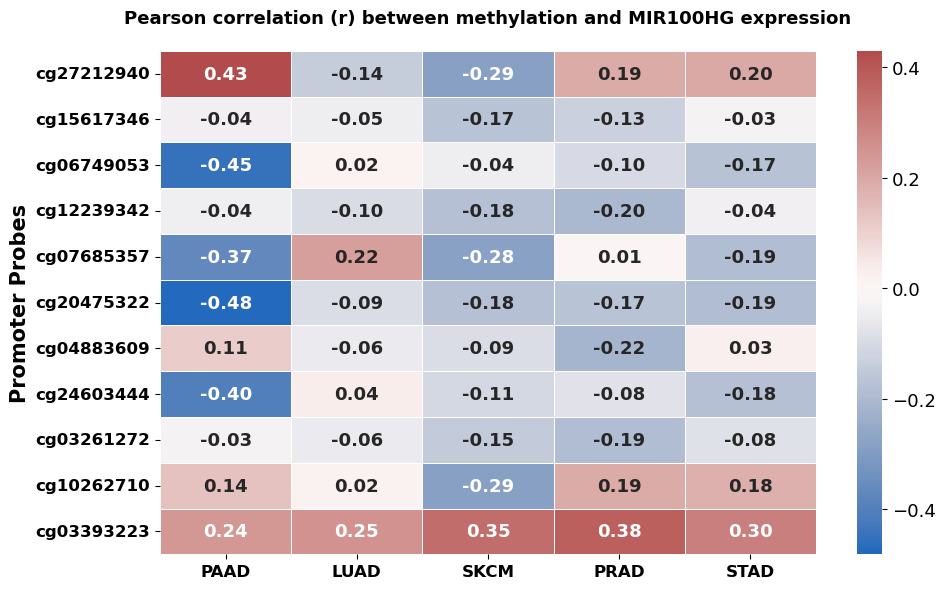


Selected probes and their corresponding promoter region:

cg20475322  -->  chr11:121971160-121972159
cg07685357  -->  chr11:121971160-121972159
cg06749053  -->  chr11:121971160-121972159
cg24603444  -->  chr11:121971160-121972159


In [117]:
# Step 1: Define the analysis function for methylation-expression correlation
# This function computes Pearson correlation between methylation beta values 
# and expression values (log2-transformed by default) for promoter-region probes.

def analyze_probe_expression_correlation(
    expr_cache,
    df_meth,
    ensg_id,
    promoter_probes,
    cancer_label="",
    log_transform=False,        
    pseudocount=0.001,
    fdr_alpha=0.05,
    verbose=True
):
    """
    Compute probe-wise correlation between promoter-region methylation 
    and target gene expression across matched samples.

    Parameters:
        expr_cache: Dictionary mapping Ensembl ID to expression Series
        df_meth: Methylation beta matrix (rows = probes, cols = samples)
        ensg_id: Ensembl ID of the target gene (e.g., MIR100HG)
        promoter_probes: Set of CpG probes in the gene's promoter
        cancer_label: Short label for the current cancer type (used in printouts)
        log_transform: Whether to log-transform expression again (default=False)
        pseudocount: Value added before log-transform if needed
        fdr_alpha: FDR threshold for significance
        verbose: Whether to print and display detailed results

    Returns:
        df_corr_raw: Raw correlation results (r, p) without FDR correction
        df_corr_fdr: Correlation results with FDR-adjusted p-values
        df_corr_filtered: Subset with significant negative correlations (r < -0.2 and FDR < 0.05)
    """

    # Verify that the target gene exists in the expression cache
    if ensg_id not in expr_cache:
        raise ValueError(f"Ensembl ID '{ensg_id}' not found in expression cache.")

    # Retrieve the expression Series and validate its structure
    raw_expr = expr_cache[ensg_id]
    if raw_expr is None:
        raise ValueError(f"[{cancer_label}] Expression data for {ensg_id} is None.")
    if isinstance(raw_expr, (float, int)):
        raise TypeError(f"[{cancer_label}] Expression data is not a Series. Got: {type(raw_expr)}")

    expr_series = pd.Series(raw_expr, copy=True)
    if expr_series.empty or expr_series.isnull().all():
        raise ValueError(f"[{cancer_label}] Expression Series is empty or all NaN.")

    # Optionally apply log2 transformation (disabled by default)
    if log_transform:
        expr_series = np.log2(expr_series + pseudocount)
    expr_series.name = "MIR100HG_expression"

    # Determine matched samples between expression and methylation matrices
    common_samples = expr_series.index.intersection(df_meth.columns)
    if verbose:
        print(f"\n[{cancer_label}] Number of matched samples: {len(common_samples)}")

    # Initialize results container
    results = []

    # For each promoter probe, compute correlation with gene expression
    for probe_id in promoter_probes:
        if probe_id not in df_meth.index:
            continue  # Skip if probe not present in methylation data

        meth_series = pd.to_numeric(df_meth.loc[probe_id, common_samples], errors="coerce")

        valid_mask = (~meth_series.isna()) & (~expr_series.isna())
        x_valid = expr_series[valid_mask]
        y_valid = meth_series[valid_mask]

        if len(x_valid) > 2:
            r_val, p_val = pearsonr(x_valid, y_valid)
        else:
            r_val, p_val = (np.nan, np.nan)

        results.append({
            "Probe": probe_id,
            "PearsonR": r_val,
            "pval": p_val,
            "NumSamplesUsed": len(x_valid)
        })

    # Convert to DataFrame and drop NaN rows
    df_corr_raw = pd.DataFrame(results, columns=["Probe", "PearsonR", "pval", "NumSamplesUsed"])
    df_corr_raw.dropna(subset=["PearsonR", "pval"], inplace=True)

    # Apply multiple testing correction (FDR)
    df_corr_fdr = df_corr_raw.copy()
    if len(df_corr_fdr) > 0:
        reject_null, pvals_adj, _, _ = multipletests(df_corr_fdr["pval"].values, alpha=fdr_alpha, method="fdr_bh")
        df_corr_fdr["pval_adj"] = pvals_adj
        df_corr_fdr["significant"] = reject_null
    else:
        df_corr_fdr["pval_adj"] = []
        df_corr_fdr["significant"] = []

    # Filter for probes with significant negative correlation
    # (Updated threshold: r < -0.2 instead of r < 0)
    df_corr_filtered = df_corr_fdr[
        (df_corr_fdr["PearsonR"] < -0.2) & 
        (df_corr_fdr["pval_adj"] < fdr_alpha)
    ].copy()
    df_corr_filtered.sort_values(by="PearsonR", inplace=True)

    # If verbose, display all three tables
    if verbose:
        print(f"\n[{cancer_label}] df_corr_raw (first 10 rows):")
        display(df_corr_raw.head(10))

        print(f"[{cancer_label}] df_corr_fdr (with FDR correction):")
        display(df_corr_fdr)

        print(f"[{cancer_label}] df_corr_filtered (significant and negative):")
        display(df_corr_filtered)

        print(f"[{cancer_label}] Total probes passing r<-0.2 and FDR<{fdr_alpha}: {df_corr_filtered.shape[0]}")
        if df_corr_filtered.shape[0] == 0:
            print(f"[{cancer_label}] No significant negative correlations found.")

    return df_corr_raw, df_corr_fdr, df_corr_filtered


# Step 2: Define the gene and target promoter probes for analysis
mir100hg_ensg = "ENSG00000255248"
promoter_probes = {
    "cg04883609", "cg15617346", "cg06749053", "cg03393223", "cg27212940",
    "cg03261272", "cg24603444", "cg10262710", "cg07685357", "cg12239342",
    "cg20475322"
}


# Step 3: Run the correlation analysis for each cancer type individually
print("\nCORRELATION ANALYSIS FOR PAAD")
df_corr_raw_PAAD, df_corr_fdr_PAAD, df_corr_filtered_PAAD = analyze_probe_expression_correlation(
    expr_cache=expr_cache_PAAD,
    df_meth=df_meth_PAAD,
    ensg_id=mir100hg_ensg,
    promoter_probes=promoter_probes,
    cancer_label="PAAD",
    log_transform=False,
    fdr_alpha=0.05,
    verbose=True
)

print("\nCORRELATION ANALYSIS FOR LUAD")
df_corr_raw_LUAD, df_corr_fdr_LUAD, df_corr_filtered_LUAD = analyze_probe_expression_correlation(
    expr_cache=expr_cache_LUAD,
    df_meth=df_meth_LUAD,
    ensg_id=mir100hg_ensg,
    promoter_probes=promoter_probes,
    cancer_label="LUAD",
    log_transform=False,
    fdr_alpha=0.05,
    verbose=True
)

print("\nCORRELATION ANALYSIS FOR SKCM")
df_corr_raw_SKCM, df_corr_fdr_SKCM, df_corr_filtered_SKCM = analyze_probe_expression_correlation(
    expr_cache=expr_cache_SKCM,
    df_meth=df_meth_SKCM,
    ensg_id=mir100hg_ensg,
    promoter_probes=promoter_probes,
    cancer_label="SKCM",
    log_transform=False,
    fdr_alpha=0.05,
    verbose=True
)

print("\nCORRELATION ANALYSIS FOR PRAD")
df_corr_raw_PRAD, df_corr_fdr_PRAD, df_corr_filtered_PRAD = analyze_probe_expression_correlation(
    expr_cache=expr_cache_PRAD,
    df_meth=df_meth_PRAD,
    ensg_id=mir100hg_ensg,
    promoter_probes=promoter_probes,
    cancer_label="PRAD",
    log_transform=False,
    fdr_alpha=0.05,
    verbose=True
)

print("\nCORRELATION ANALYSIS FOR STAD")
df_corr_raw_STAD, df_corr_fdr_STAD, df_corr_filtered_STAD = analyze_probe_expression_correlation(
    expr_cache=expr_cache_STAD,
    df_meth=df_meth_STAD,
    ensg_id=mir100hg_ensg,
    promoter_probes=promoter_probes,
    cancer_label="STAD",
    log_transform=False,
    fdr_alpha=0.05,
    verbose=True
)


# Step 4: Build a cross-cancer Pearson r heatmap for visualization
# This plot summarizes per-probe correlation coefficients across all cancer types

# 4.1) Organize the correlation data for heatmap visualization
cancer_to_df = {
    "PAAD": df_corr_fdr_PAAD,
    "LUAD": df_corr_fdr_LUAD,
    "SKCM": df_corr_fdr_SKCM,
    "PRAD": df_corr_fdr_PRAD,
    "STAD": df_corr_fdr_STAD,
}

probe_list = list(promoter_probes)
heatmap_data = pd.DataFrame(index=probe_list)

for cancer, df in cancer_to_df.items():
    r_values = df.set_index("Probe")["PearsonR"]
    heatmap_data[cancer] = heatmap_data.index.map(r_values.to_dict())

# 4.2) Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    center=0,
    cmap="vlag",
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 13, "weight": "bold"} 
)

plt.title("Pearson correlation (r) between methylation and MIR100HG expression",
          fontsize=13, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')

plt.xlabel("")
plt.ylabel("Promoter Probes", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')
plt.ylabel("Promoter Probes", fontsize=15, fontweight='bold')

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=13) 

plt.tight_layout()
plt.savefig("methylation_expression_correlation_heatmap.pdf", format="pdf", dpi=1000)
plt.show()

# Step 5: Map selected probes to their corresponding promoter region
# This step helps determine which promoter sub-region each retained probe belongs to.

# Define the list of retained promoter probes (e.g., based on significance or reproducibility)
selected_probes = ['cg20475322', 'cg07685357', 'cg06749053', 'cg24603444']

# Initialize a dictionary to store probe-to-region mappings
probe_to_region = {}

# Iterate through the filtered promoter region DataFrame
for row in df_region_summary_promoter.itertuples():
    region = row.Region  # Genomic coordinates of the promoter region
    probe_ids = row.Probe_IDs.split(", ") if row.Probe_IDs != "None" else []
    
    # Check which of the selected probes are found in this region
    for probe in probe_ids:
        if probe in selected_probes:
            probe_to_region[probe] = region

# Print a summary of which promoter region each selected probe belongs to
print("\nSelected probes and their corresponding promoter region:\n")
for probe in selected_probes:
    region = probe_to_region.get(probe, "Not Found")
    print(f"{probe}  -->  {region}")

### Section 13: Representative Methylation Region Selection

In this section, we identify significantly negatively correlated methylation probes (Pearson $r$ < -0.2 and adjusted p-value < 0.05) within MIR100HG’s annotated genomic regions (e.g., promoter, exon, intron). For each region type, we select one sub-region that shows the strongest negative correlation (i.e., the most negative Pearson $r$) as the “representative” region. The function get_representative_regions implements this logic by scanning each annotated region for qualifying probes, and the final outputs for all five cancer types (PAAD, LUAD, SKCM, PRAD, STAD) are stored in the df_final_regions dictionary.

In [198]:
# Step 1: Define the function to select representative methylation regions based on correlation results
def get_representative_regions(
    df_region_summary: pd.DataFrame,
    df_corr_fdr: pd.DataFrame,
    gene_label: str = "MIR100HG",
    r_threshold: float = -0.2,
    fdr_threshold: float = 0.05,
    verbose: bool = True
) -> pd.DataFrame:
    # Select representative sub-regions per region type based on strongest negative correlation

    # Get a list of all unique region types
    region_types = df_region_summary["Region Type"].unique().tolist()
    # Initialize an empty list to store the final output rows
    final_rows = []
    
    # Loop over each region type
    for rtype in region_types:
        # Subset the region summary data for the current region type
        df_sub = df_region_summary[df_region_summary["Region Type"] == rtype].copy()
        
        # Initialize variables to track the best region for this type
        best_region = None
        best_r = 0
        best_p = None
        best_retained_probes = []
        
        # Iterate through each region of the current type
        for row in df_sub.itertuples():
            # Initialize list of probe IDs
            probe_ids = []
            # If the region has associated probes, split them into a list
            if row.Probe_IDs != "None":
                probe_ids = row.Probe_IDs.split(", ")
            
            # Filter the correlation results for the probes in this region
            df_probes = df_corr_fdr[df_corr_fdr["Probe"].isin(probe_ids)].copy()
            # Further filter for significantly negatively correlated probes
            df_probes_sig = df_probes[
                (df_probes["PearsonR"] < r_threshold) &
                (df_probes["pval_adj"] < fdr_threshold)
            ]
            # Sort significant probes by correlation strength
            df_probes_sig = df_probes_sig.sort_values(by="PearsonR")
            
            # If any significant probe is found
            if df_probes_sig.shape[0] > 0:
                # Sort again to ensure most negative correlation on top
                df_probes_sig.sort_values(by="PearsonR", inplace=True)
                # Select the top probe
                top_probe = df_probes_sig.iloc[0]
                
                # Update best region if this one is more negatively correlated
                if (best_region is None) or (top_probe.PearsonR < best_r):
                    best_region = row.Region
                    best_r = top_probe.PearsonR
                    best_p = top_probe.pval_adj
                    best_retained_probes = df_probes_sig["Probe"].tolist()
        
        # If a representative region is found, store its information
        if best_region is not None:
            final_rows.append({
                "Region_Type": rtype,
                "Region": best_region,
                "Num_Probes": len(best_retained_probes),
                "Retained_Probes": ", ".join(best_retained_probes),
                "r": best_r,
                "p": best_p
            })
        else:
            # If no significant probes are found, store a null result for this type
            final_rows.append({
                "Region_Type": rtype,
                "Region": None,
                "Num_Probes": 0,
                "Retained_Probes": None,
                "r": None,
                "p": None
            })
    
    # Create the final DataFrame from the collected rows
    df_final = pd.DataFrame(final_rows, columns=[
        "Region_Type", "Region", "Num_Probes", "Retained_Probes", "r", "p"
    ])
    
    # Rename columns for clarity and consistency
    df_final.rename(
        columns={
            "r": "Min_Pearson_r_Promoter",
            "p": "Adjusted_pval_Promoter"
        },
        inplace=True
    )
    
    # If verbose is enabled, display the summary table
    if verbose:
        print(f"\nSummary of Representative Regions for {gene_label}:")
        display(df_final)
    
    # Return the result DataFrame
    return df_final


# Step 2: Apply the representative region selection to each cancer type
# Create a dictionary to store results for all cancer types
df_final_regions = {}

# PAAD
print("\nRepresentative Regions for PAAD")
df_final_regions["PAAD"] = get_representative_regions(
    df_region_summary=df_region_summary, 
    df_corr_fdr=df_corr_fdr_PAAD,
    gene_label="MIR100HG (PAAD)",
    r_threshold=-0.2,
    fdr_threshold=0.05,
    verbose=True
)

# LUAD
print("\nRepresentative Regions for LUAD")
df_final_regions["LUAD"] = get_representative_regions(
    df_region_summary=df_region_summary, 
    df_corr_fdr=df_corr_fdr_LUAD,
    gene_label="MIR100HG (LUAD)",
    r_threshold=-0.2,
    fdr_threshold=0.05,
    verbose=True
)

# SKCM
print("\nRepresentative Regions for SKCM")
df_final_regions["SKCM"] = get_representative_regions(
    df_region_summary=df_region_summary, 
    df_corr_fdr=df_corr_fdr_SKCM,
    gene_label="MIR100HG (SKCM)",
    r_threshold=-0.2,
    fdr_threshold=0.05,
    verbose=True
)

# PRAD
print("\nRepresentative Regions for PRAD")
df_final_regions["PRAD"] = get_representative_regions(
    df_region_summary=df_region_summary, 
    df_corr_fdr=df_corr_fdr_PRAD,
    gene_label="MIR100HG (PRAD)",
    r_threshold=-0.2,
    fdr_threshold=0.05,
    verbose=True
)

# STAD
print("\nRepresentative Regions for STAD")
df_final_regions["STAD"] = get_representative_regions(
    df_region_summary=df_region_summary, 
    df_corr_fdr=df_corr_fdr_STAD,
    gene_label="MIR100HG (STAD)",
    r_threshold=-0.2,
    fdr_threshold=0.05,
    verbose=True
)


Representative Regions for PAAD

Summary of Representative Regions for MIR100HG (PAAD):


Region_Type                     Region  Num_Probes  \
0  hg19_genes_promoters  chr11:121971160-121972159           4   
1     hg19_genes_1to5kb                       None           0   
2      hg19_genes_exons                       None           0   
3    hg19_genes_introns  chr11:121962449-122026258           4   

                                  Retained_Probes  Min_Pearson_r_Promoter  \
0  cg20475322, cg06749053, cg24603444, cg07685357               -0.481042   
1                                            None                     NaN   
2                                            None                     NaN   
3  cg20475322, cg06749053, cg24603444, cg07685357               -0.481042   

   Adjusted_pval_Promoter  
0                0.000009  
1                     NaN  
2                     NaN  
3                0.000009


Representative Regions for LUAD

Summary of Representative Regions for MIR100HG (LUAD):


Region_Type Region  Num_Probes Retained_Probes  \
0  hg19_genes_promoters   None           0            None   
1     hg19_genes_1to5kb   None           0            None   
2      hg19_genes_exons   None           0            None   
3    hg19_genes_introns   None           0            None   

  Min_Pearson_r_Promoter Adjusted_pval_Promoter  
0                   None                   None  
1                   None                   None  
2                   None                   None  
3                   None                   None


Representative Regions for SKCM

Summary of Representative Regions for MIR100HG (SKCM):


Region_Type Region  Num_Probes Retained_Probes  \
0  hg19_genes_promoters   None           0            None   
1     hg19_genes_1to5kb   None           0            None   
2      hg19_genes_exons   None           0            None   
3    hg19_genes_introns   None           0            None   

  Min_Pearson_r_Promoter Adjusted_pval_Promoter  
0                   None                   None  
1                   None                   None  
2                   None                   None  
3                   None                   None


Representative Regions for PRAD

Summary of Representative Regions for MIR100HG (PRAD):


Region_Type                     Region  Num_Probes  \
0  hg19_genes_promoters  chr11:122073771-122074770           2   
1     hg19_genes_1to5kb                       None           0   
2      hg19_genes_exons                       None           0   
3    hg19_genes_introns  chr11:122051107-122162991           2   

          Retained_Probes  Min_Pearson_r_Promoter  Adjusted_pval_Promoter  
0  cg04883609, cg12239342               -0.215877                0.000243  
1                    None                     NaN                     NaN  
2                    None                     NaN                     NaN  
3  cg04883609, cg12239342               -0.215877                0.000243


Representative Regions for STAD

Summary of Representative Regions for MIR100HG (STAD):


Region_Type Region  Num_Probes Retained_Probes  \
0  hg19_genes_promoters   None           0            None   
1     hg19_genes_1to5kb   None           0            None   
2      hg19_genes_exons   None           0            None   
3    hg19_genes_introns   None           0            None   

  Min_Pearson_r_Promoter Adjusted_pval_Promoter  
0                   None                   None  
1                   None                   None  
2                   None                   None  
3                   None                   None

### Section 14: Final Integration of Multi-Omics and Clinical Data Across Five Cancer Types

In this section, we perform comprehensive integration of key multi-omics and clinical features for five cancer types: PAAD, LUAD, SKCM, PRAD, and STAD. For each cancer type, we identify a filtered set of samples that meet stringent criteria—belonging to the most common histological subtype, classified into high or low MIR100HG expression groups (Top/Bottom 33%), and having valid data in expression, methylation, and clinical datasets. We construct final integrated DataFrames that include sample ID, gender, MIR100HG expression level, average promoter methylation (across four CpG probes in the MIR100HG promoter region), and expression levels for 56 transcription factors known to be associated with MIR100HG regulation. These cancer-specific integrated tables are saved as Excel files in a standardized format, serving as the foundation for downstream analyses such as correlation, differential methylation, or transcriptional network modeling.

#### Subsection 14.1: Final Integration of PAAD-Related Data

In this subsection, we integrate multiple data sources (clinical data, expression data, methylation data, etc.) into a single DataFrame for PAAD (Pancreatic Adenocarcinoma). We merge key information such as sample IDs, gender, MIR100HG expression levels, promoter methylation averages, and TF expression values. Finally, we save the resulting integrated data into an Excel file for subsequent analyses.

In [204]:
# Define the folder name for the final integrated data.
final_integration_dir = "Task1_Final_Integration_with_Methylation"

# Create the folder if it does not exist; do nothing if it already exists.
os.makedirs(final_integration_dir, exist_ok=True)

# Construct the path to the output Excel file in the specified folder.
output_excel_paath = os.path.join(final_integration_dir, "Final_Integration_PAAD_with_Methylation.xlsx")

# Check if the final integration Excel file already exists.
if os.path.exists(output_excel_paath):
    # Indicate that the existing file will be used.
    print(f"File '{output_excel_paath}' found. Loading df_final_PAAD_with_Methylation directly...\n")
    # Load the existing integrated DataFrame from the Excel file.
    df_final_PAAD = pd.read_excel(output_excel_paath)
    # Print the shape of the loaded DataFrame.
    print("df_final_PAAD_with_Methylation loaded from disk. Shape:", df_final_PAAD.shape)
else:
    # Indicate that the file is not found and data will be constructed anew.
    print(f"File '{output_excel_paath}' not found. Building df_final_PAAD_with_Methylation from scratch...\n")

    # Create a DataFrame from the set of common PAAD samples, sorted by sample ID.
    df_samples = pd.DataFrame({"Sample_PAAD": sorted(list(common_samples_PAAD))})

    # Set the sample column as the index for the final integrated DataFrame.
    df_final_PAAD = df_samples.set_index("Sample_PAAD")

    # Check if the 'gender' column is present in the clinical DataFrame.
    if "gender" in df_clinical_PAAD_sub.columns:
        # Extract 'sample' and 'gender' columns.
        df_gender_sub = df_clinical_PAAD_sub[["sample", "gender"]].copy()
        # Rename the 'sample' column to match the final DataFrame's index name.
        df_gender_sub.rename(columns={"sample": "Sample_PAAD"}, inplace=True)
        # Remove duplicate rows based on sample ID to ensure uniqueness.
        df_gender_sub.drop_duplicates("Sample_PAAD", inplace=True)

        # Set the sample column as index for merging purposes.
        df_gender_sub.set_index("Sample_PAAD", inplace=True)
        # Merge gender information into the final DataFrame by matching the index.
        df_final_PAAD["Gender"] = df_gender_sub["gender"]
    else:
        # Print a warning if gender is not available.
        print("No 'gender' column found in df_clinical_PAAD_sub. Skipping gender.\n")
        # Assign NaN if gender data is not found.
        df_final_PAAD["Gender"] = np.nan

    # Select relevant columns from MIR100HG data.
    df_mir100hg_tmp = df_mir100hg_33_extremes_PAAD[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp.rename(columns={
        "Sample": "Sample_PAAD",
        "MIR100HG_Expression": "MIR100HG_Expression_PAAD",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_PAAD"
    }, inplace=True)

    # Remove duplicates based on the sample ID column.
    df_mir100hg_tmp.drop_duplicates("Sample_PAAD", inplace=True)
    # Set the sample ID column as the index for merging.
    df_mir100hg_tmp.set_index("Sample_PAAD", inplace=True)

    # Merge MIR100HG expression values into the final DataFrame.
    df_final_PAAD["MIR100HG_Expression_PAAD"] = df_mir100hg_tmp["MIR100HG_Expression_PAAD"]
    # Merge MIR100HG expression levels into the final DataFrame.
    df_final_PAAD["MIR100HG_Expression_Level_PAAD"] = df_mir100hg_tmp["MIR100HG_Expression_Level_PAAD"]

    # List of probe IDs related to the MIR100HG promoter region.
    promoter_probes_4 = ["cg20475322", "cg07685357", "cg06749053", "cg24603444"]
    # Name of the column for the averaged promoter methylation values.
    mean_promoter_col = "promoter(chr11:121971160-121972159)_meth_PAAD"

    # Initialize a list to store the average promoter methylation values per sample.
    average_meth_values = []
    # Iterate over each sample in the final DataFrame.
    for samp_id in df_final_PAAD.index:
        # Temporary list for storing methylation values from multiple probes for one sample.
        probe_values = []
        # Go through each relevant promoter probe.
        for probe_id in promoter_probes_4:
            # Check if the probe and sample exist in the methylation DataFrame.
            if probe_id in df_meth_PAAD.index and samp_id in df_meth_PAAD.columns:
                # Retrieve the methylation value.
                val = df_meth_PAAD.at[probe_id, samp_id]
                # Collect the value.
                probe_values.append(val)

        # If any valid probe values are found, compute the mean ignoring NaNs.
        if len(probe_values) > 0:
            avg_val = np.nanmean(probe_values)
        else:
            # Assign NaN if no values are found.
            avg_val = np.nan

        # Collect the computed average for this sample.
        average_meth_values.append(avg_val)

    # Create a new column in the final DataFrame with average promoter methylation values.
    df_final_PAAD[mean_promoter_col] = average_meth_values

    # List of transcription factors (TFs) to be integrated into the DataFrame.
    tf_list = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    # Define the path to the cached expression data.
    expr_cache_path = os.path.join("expr_cache", "expr_cache_PAAD.pkl")
    # Check whether a cached expression file is available.
    use_cache = os.path.exists(expr_cache_path)

    # If the cache file exists, load it; otherwise, use df_expr_PAAD.
    if use_cache:
        print("Cached expression file detected, using cached expression file 'expr_cache_PAAD.pkl' for TF expression.\n")
        expr_cache_PAAD = joblib.load(expr_cache_path)
    else:
        print("Expression cache not found. Falling back to df_expr_PAAD for TF expression.\n")

    # Iterate through each transcription factor symbol in the list.
    for tf_sym in tf_list:
        # Construct a column name for this TF's expression values.
        tf_col_name = f"tf_{tf_sym}_expr_PAAD"
        # Retrieve the list of Ensembl IDs corresponding to the TF symbol.
        ensg_ids = genesymbol_to_ensg_PAAD.get(tf_sym, [])

        # If no Ensembl IDs are found for this TF, fill the column with NaNs.
        if not ensg_ids:
            df_final_PAAD[tf_col_name] = np.nan
            continue

        # List to accumulate expression Series from one or more Ensembl IDs.
        expr_series_list = []

        # Iterate over each Ensembl ID associated with the TF.
        for ensg_id in ensg_ids:
            # If we are using cached data, retrieve values from the cache.
            if use_cache:
                expr_values = expr_cache_PAAD.get(ensg_id)
                if expr_values is not None:
                    # Convert to a Series matching the final DataFrame index.
                    expr_series = pd.Series(expr_values).reindex(df_final_PAAD.index).astype(float)
                    # Collect the Series.
                    expr_series_list.append(expr_series)
            else:
                # Otherwise, use df_expr_PAAD directly if the Ensembl ID is found.
                if ensg_id in df_expr_PAAD.index:
                    # Extract expression values for the relevant samples.
                    expr_series = df_expr_PAAD.loc[ensg_id, df_final_PAAD.index].astype(float)
                    # Collect the Series.
                    expr_series_list.append(expr_series)

        # If no expression Series are successfully collected, assign NaN for this TF.
        if len(expr_series_list) == 0:
            df_final_PAAD[tf_col_name] = np.nan
        else:
            # Take the average if multiple Ensembl IDs exist for the same TF.
            combined_expr = pd.concat(expr_series_list, axis=1).mean(axis=1)
            # Assign the combined expression values to the final DataFrame.
            df_final_PAAD[tf_col_name] = combined_expr

    # Reset the index to turn 'Sample_PAAD' back into a column.
    df_final_PAAD.reset_index(inplace=True)

    # Define an ordered list of key columns to appear at the front of the DataFrame.
    final_cols = [
        "Sample_PAAD",
        "Gender",
        "MIR100HG_Expression_PAAD",
        "MIR100HG_Expression_Level_PAAD",
        mean_promoter_col
    ]
    # Collect all TF expression columns and sort them alphabetically.
    tf_expr_cols = sorted([c for c in df_final_PAAD.columns if c.startswith("tf_")])
    # Reorder the columns so that the key columns come first, followed by the TF columns.
    df_final_PAAD = df_final_PAAD[ final_cols + tf_expr_cols ]

    # Save the assembled final DataFrame to an Excel file without including the index.
    df_final_PAAD.to_excel(output_excel_paath, index=False)
    # Print a message indicating successful file creation and the DataFrame shape.
    print(f"\nCreated final integration file '{output_excel_paath}'. Shape: {df_final_PAAD.shape}")

# Indicate that a preview will be shown next.
print("\nPreview of the final integrated DataFrame for PAAD:")
# Display the first 10 rows of the integrated DataFrame without showing the index.
display(df_final_PAAD.head(10).style.hide(axis="index"))

File 'Task1_Final_Integration_with_Methylation\Final_Integration_PAAD_with_Methylation.xlsx' not found. Building df_final_PAAD_with_Methylation from scratch...

Cached expression file detected, using cached expression file 'expr_cache_PAAD.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_with_Methylation\Final_Integration_PAAD_with_Methylation.xlsx'. Shape: (95, 61)

Preview of the final integrated DataFrame for PAAD:


### Section 15: Final Integration of Multi-Cancer Datasets without Methylation data

In this section, we merge key clinical attributes (e.g., gender) and transcriptomic features (e.g., MIR100HG expression levels and TF expression profiles) for each of the five cancer types: PAAD, LUAD, SKCM, PRAD, and STAD. We first check whether a previously saved integration file exists, and if not, build a new DataFrame from scratch. The steps involve:

1) Assembling base sample IDs for each cancer subtype.

2) Merging relevant clinical data (e.g., gender) from the refined clinical DataFrames.

3) Adding MIR100HG expression values, along with categorical “High” or “Low” labels.

4) Integrating the expression of 56 transcription factors, either from cached files or the main expression matrices.

5) Reordering columns to emphasize core clinical, MIR100HG, and TF expression features.

6) Saving each final integrated DataFrame to Excel for easy downstream usage.

By applying this unified integration process across all five cancer types, we create consistent, analysis-ready datasets for subsequent downstream steps (e.g., survival analysis, pathway enrichment, or multi-omics investigations).

#### Subsection 15.1: Final Integration of PAAD-Related Data without Methylation data

In this subsection, we construct an integrated DataFrame for PAAD samples, consolidating key clinical and transcriptomic information. We first verify whether a previously saved integration file (Final_Integration_PAAD_without_Methylation.xlsx) exists; if it does, we load it directly. Otherwise, we build the DataFrame from scratch by assembling the base sample identifiers, merging gender data where available, and including MIR100HG expression levels (both continuous and categorical). Furthermore, we integrate expression data for a set of 56 transcription factors, retrieving them from a cached file if present or from the original expression matrix if necessary. The resulting DataFrame is reordered to highlight crucial columns, saved to Excel, and finally displayed as a preview.

In [209]:
# Define the folder name for the final integrated data (PAAD).
final_integration_dir = "Task1_Final_Integration_without_Methylation"
os.makedirs(final_integration_dir, exist_ok=True)

# Construct the path to the output Excel file in the specified folder (PAAD).
output_excel_paad = os.path.join(final_integration_dir, "Final_Integration_PAAD_without_Methylation.xlsx")

# Check if the final integration Excel file already exists (PAAD).
if os.path.exists(output_excel_paad):
    print(f"File '{output_excel_paad}' found. Loading df_final_PAAD_without_Methylation directly...\n")
    df_final_PAAD = pd.read_excel(output_excel_paad)
    print("df_final_PAAD_without_Methylation loaded from disk. Shape:", df_final_PAAD.shape)
else:
    print(f"File '{output_excel_paad}' not found. Building df_final_PAAD_without_Methylation from scratch...\n")

    # Create a DataFrame from the set of common PAAD samples.
    df_samples_paad = pd.DataFrame({"Sample_PAAD": sorted(list(common_samples_PAAD))})

    # Set the sample column as the index for the final integrated DataFrame (PAAD).
    df_final_PAAD = df_samples_paad.set_index("Sample_PAAD")

    # Merge gender from df_clinical_PAAD_sub (if available).
    if "gender" in df_clinical_PAAD_sub.columns:
        df_gender_sub_paad = df_clinical_PAAD_sub[["sample", "gender"]].copy()
        df_gender_sub_paad.rename(columns={"sample": "Sample_PAAD"}, inplace=True)
        df_gender_sub_paad.drop_duplicates("Sample_PAAD", inplace=True)
        df_gender_sub_paad.set_index("Sample_PAAD", inplace=True)
        df_final_PAAD["Gender"] = df_gender_sub_paad["gender"]
    else:
        print("No 'gender' column found in df_clinical_PAAD_sub. Skipping gender.\n")
        df_final_PAAD["Gender"] = np.nan

    # Merge MIR100HG expression and levels (PAAD).
    df_mir100hg_tmp_paad = df_mir100hg_33_extremes_PAAD[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp_paad.rename(columns={
        "Sample": "Sample_PAAD",
        "MIR100HG_Expression": "MIR100HG_Expression_PAAD",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_PAAD"
    }, inplace=True)

    df_mir100hg_tmp_paad.drop_duplicates("Sample_PAAD", inplace=True)
    df_mir100hg_tmp_paad.set_index("Sample_PAAD", inplace=True)

    df_final_PAAD["MIR100HG_Expression_PAAD"] = df_mir100hg_tmp_paad["MIR100HG_Expression_PAAD"]
    df_final_PAAD["MIR100HG_Expression_Level_PAAD"] = df_mir100hg_tmp_paad["MIR100HG_Expression_Level_PAAD"]

    # Define the list of transcription factors (TFs) to integrate.
    tf_list_paad = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    # Check for cached expression file (PAAD).
    expr_cache_path_paad = os.path.join("expr_cache", "expr_cache_PAAD.pkl")
    use_cache_paad = os.path.exists(expr_cache_path_paad)

    if use_cache_paad:
        print("Cached expression file detected, using 'expr_cache_PAAD.pkl' for TF expression.\n")
        expr_cache_PAAD = joblib.load(expr_cache_path_paad)
    else:
        print("Expression cache not found for PAAD. Falling back to df_expr_PAAD.\n")

    # Iterate through each TF and merge expression into df_final_PAAD.
    for tf_sym in tf_list_paad:
        tf_col_name_paad = f"tf_{tf_sym}_expr_PAAD"
        ensg_ids_paad = genesymbol_to_ensg_PAAD.get(tf_sym, [])

        if not ensg_ids_paad:
            df_final_PAAD[tf_col_name_paad] = np.nan
            continue

        expr_series_list_paad = []
        for ensg_id_paad in ensg_ids_paad:
            if use_cache_paad:
                expr_values_paad = expr_cache_PAAD.get(ensg_id_paad)
                if expr_values_paad is not None:
                    expr_series_paad = pd.Series(expr_values_paad).reindex(df_final_PAAD.index).astype(float)
                    expr_series_list_paad.append(expr_series_paad)
            else:
                if ensg_id_paad in df_expr_PAAD.index:
                    expr_series_paad = df_expr_PAAD.loc[ensg_id_paad, df_final_PAAD.index].astype(float)
                    expr_series_list_paad.append(expr_series_paad)

        if len(expr_series_list_paad) == 0:
            df_final_PAAD[tf_col_name_paad] = np.nan
        else:
            combined_expr_paad = pd.concat(expr_series_list_paad, axis=1).mean(axis=1)
            df_final_PAAD[tf_col_name_paad] = combined_expr_paad

    # Reset index and reorder columns.
    df_final_PAAD.reset_index(inplace=True)

    final_cols_paad = [
        "Sample_PAAD",
        "Gender",
        "MIR100HG_Expression_PAAD",
        "MIR100HG_Expression_Level_PAAD"
    ]
    tf_expr_cols_paad = sorted([c for c in df_final_PAAD.columns if c.startswith("tf_")])
    df_final_PAAD = df_final_PAAD[ final_cols_paad + tf_expr_cols_paad ]

    # Save to Excel.
    df_final_PAAD.to_excel(output_excel_paad, index=False)
    print(f"\nCreated final integration file '{output_excel_paad}'. Shape: {df_final_PAAD.shape}")

print("\nPreview of the final integrated DataFrame for PAAD:")
display(df_final_PAAD.head(10).style.hide(axis="index"))

File 'Task1_Final_Integration_without_Methylation\Final_Integration_PAAD_without_Methylation.xlsx' not found. Building df_final_PAAD_without_Methylation from scratch...

Cached expression file detected, using 'expr_cache_PAAD.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_without_Methylation\Final_Integration_PAAD_without_Methylation.xlsx'. Shape: (95, 60)

Preview of the final integrated DataFrame for PAAD:


#### Subsection 15.2: Final Integration of LUAD-Related Data without Methylation data

In this subsection, we construct an integrated DataFrame for LUAD samples by merging key molecular and clinical features. Specifically, we begin by checking whether a previously saved integration file (Final_Integration_LUAD.xlsx) exists; if not, we build the DataFrame from scratch. The integration process starts with assembling a base of LUAD sample identifiers. We then incorporate gender information from the clinical dataset and add MIR100HG gene expression values along with categorical expression levels. Furthermore, we integrate expression data for 56 transcription factors, retrieving them either from a cached expression file or directly from the raw expression matrix. Finally, the resulting DataFrame is reordered to prioritize core clinical and expression columns, saved to disk, and previewed for verification.

In [212]:
# Define the folder name for the final integrated data (LUAD).
final_integration_dir = "Task1_Final_Integration_without_Methylation"

# Create the folder if it does not exist; do nothing if it already exists.
os.makedirs(final_integration_dir, exist_ok=True)

# Construct the path to the output Excel file in the specified folder (LUAD).
output_excel_luad = os.path.join(final_integration_dir, "Final_Integration_LUAD_without_Methylation.xlsx")

# Check if the final integration Excel file already exists (LUAD).
if os.path.exists(output_excel_luad):
    print(f"File '{output_excel_luad}' found. Loading df_final_LUAD_without_Methylation directly...\n")
    df_final_LUAD = pd.read_excel(output_excel_luad)
    print("df_final_LUAD_without_Methylation loaded from disk. Shape:", df_final_LUAD.shape)
else:
    print(f"File '{output_excel_luad}' not found. Building df_final_LUAD_without_Methylation from scratch...\n")

    # Create a DataFrame from the set of common LUAD samples.
    df_samples_luad = pd.DataFrame({"Sample_LUAD": sorted(list(common_samples_LUAD))})

    # Set the sample column as the index for the final integrated DataFrame (LUAD).
    df_final_LUAD = df_samples_luad.set_index("Sample_LUAD")

    # Merge gender from df_clinical_LUAD_sub (if available).
    if "gender" in df_clinical_LUAD_sub.columns:
        df_gender_sub_luad = df_clinical_LUAD_sub[["sample", "gender"]].copy()
        df_gender_sub_luad.rename(columns={"sample": "Sample_LUAD"}, inplace=True)
        df_gender_sub_luad.drop_duplicates("Sample_LUAD", inplace=True)
        df_gender_sub_luad.set_index("Sample_LUAD", inplace=True)
        df_final_LUAD["Gender"] = df_gender_sub_luad["gender"]
    else:
        print("No 'gender' column found in df_clinical_LUAD_sub. Skipping gender.\n")
        df_final_LUAD["Gender"] = np.nan

    # Merge MIR100HG expression and levels (LUAD).
    df_mir100hg_tmp_luad = df_mir100hg_33_extremes_LUAD[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp_luad.rename(columns={
        "Sample": "Sample_LUAD",
        "MIR100HG_Expression": "MIR100HG_Expression_LUAD",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_LUAD"
    }, inplace=True)

    df_mir100hg_tmp_luad.drop_duplicates("Sample_LUAD", inplace=True)
    df_mir100hg_tmp_luad.set_index("Sample_LUAD", inplace=True)

    df_final_LUAD["MIR100HG_Expression_LUAD"] = df_mir100hg_tmp_luad["MIR100HG_Expression_LUAD"]
    df_final_LUAD["MIR100HG_Expression_Level_LUAD"] = df_mir100hg_tmp_luad["MIR100HG_Expression_Level_LUAD"]

    # List of transcription factors (TFs) to integrate (same list as in PAAD).
    tf_list_luad = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    # Check for cached expression file (LUAD).
    expr_cache_path_luad = os.path.join("expr_cache", "expr_cache_LUAD.pkl")
    use_cache_luad = os.path.exists(expr_cache_path_luad)

    if use_cache_luad:
        print("Cached expression file detected, using 'expr_cache_LUAD.pkl' for TF expression.\n")
        expr_cache_LUAD = joblib.load(expr_cache_path_luad)
    else:
        print("Expression cache not found for LUAD. Falling back to df_expr_LUAD.\n")

    # Iterate through each TF and merge expression into df_final_LUAD.
    for tf_sym in tf_list_luad:
        tf_col_name_luad = f"tf_{tf_sym}_expr_LUAD"
        ensg_ids_luad = genesymbol_to_ensg_LUAD.get(tf_sym, [])

        if not ensg_ids_luad:
            df_final_LUAD[tf_col_name_luad] = np.nan
            continue

        expr_series_list_luad = []
        for ensg_id_luad in ensg_ids_luad:
            if use_cache_luad:
                expr_values_luad = expr_cache_LUAD.get(ensg_id_luad)
                if expr_values_luad is not None:
                    expr_series_luad = pd.Series(expr_values_luad).reindex(df_final_LUAD.index).astype(float)
                    expr_series_list_luad.append(expr_series_luad)
            else:
                if ensg_id_luad in df_expr_LUAD.index:
                    expr_series_luad = df_expr_LUAD.loc[ensg_id_luad, df_final_LUAD.index].astype(float)
                    expr_series_list_luad.append(expr_series_luad)

        if len(expr_series_list_luad) == 0:
            df_final_LUAD[tf_col_name_luad] = np.nan
        else:
            combined_expr_luad = pd.concat(expr_series_list_luad, axis=1).mean(axis=1)
            df_final_LUAD[tf_col_name_luad] = combined_expr_luad

    # Reset index and reorder columns.
    df_final_LUAD.reset_index(inplace=True)

    final_cols_luad = [
        "Sample_LUAD",
        "Gender",
        "MIR100HG_Expression_LUAD",
        "MIR100HG_Expression_Level_LUAD"
    ]
    tf_expr_cols_luad = sorted([c for c in df_final_LUAD.columns if c.startswith("tf_")])
    df_final_LUAD = df_final_LUAD[ final_cols_luad + tf_expr_cols_luad ]

    # Save to Excel.
    df_final_LUAD.to_excel(output_excel_luad, index=False)
    print(f"\nCreated final integration file '{output_excel_luad}'. Shape: {df_final_LUAD.shape}")

print("\nPreview of the final integrated DataFrame for LUAD:")
display(df_final_LUAD.head(10).style.hide(axis="index"))

File 'Task1_Final_Integration_without_Methylation\Final_Integration_LUAD_without_Methylation.xlsx' not found. Building df_final_LUAD_without_Methylation from scratch...

Cached expression file detected, using 'expr_cache_LUAD.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_without_Methylation\Final_Integration_LUAD_without_Methylation.xlsx'. Shape: (323, 60)

Preview of the final integrated DataFrame for LUAD:


#### Subsection 15.3: Final Integration of PRAD-Related Data without Methylation data

In this subsection, we construct an integrated DataFrame for PRAD samples, following the same pattern of verifying whether a previously saved integration file exists (Final_Integration_PRAD_without_Methylation.xlsx). If the file exists, we load it; otherwise, we build the DataFrame from scratch. This workflow includes merging clinical gender data, appending MIR100HG expression levels and corresponding categorical labels, and integrating 56 transcription factors from either a cached expression file or the main expression matrix. In the end, we reorder and save the DataFrame to disk, then preview the output for confirmation.

In [215]:
# Section 15.2: Final Integration of PRAD-Related Data

# Define the folder name for the final integrated data (PRAD).
final_integration_dir = "Task1_Final_Integration_without_Methylation"
os.makedirs(final_integration_dir, exist_ok=True)

output_excel_prad = os.path.join(final_integration_dir, "Final_Integration_PRAD_without_Methylation.xlsx")

if os.path.exists(output_excel_prad):
    print(f"File '{output_excel_prad}' found. Loading df_final_PRAD_without_Methylation directly...\n")
    df_final_PRAD = pd.read_excel(output_excel_prad)
    print("df_final_PRAD_without_Methylation loaded from disk. Shape:", df_final_PRAD.shape)
else:
    print(f"File '{output_excel_prad}' not found. Building df_final_PRAD_without_Methylation from scratch...\n")

    df_samples_prad = pd.DataFrame({"Sample_PRAD": sorted(list(common_samples_PRAD))})
    df_final_PRAD = df_samples_prad.set_index("Sample_PRAD")

    if "gender" in df_clinical_PRAD_sub.columns:
        df_gender_sub_prad = df_clinical_PRAD_sub[["sample", "gender"]].copy()
        df_gender_sub_prad.rename(columns={"sample": "Sample_PRAD"}, inplace=True)
        df_gender_sub_prad.drop_duplicates("Sample_PRAD", inplace=True)
        df_gender_sub_prad.set_index("Sample_PRAD", inplace=True)
        df_final_PRAD["Gender"] = df_gender_sub_prad["gender"]
    else:
        print("No 'gender' column found in df_clinical_PRAD_sub. Skipping gender.\n")
        df_final_PRAD["Gender"] = np.nan

    df_mir100hg_tmp_prad = df_mir100hg_33_extremes_PRAD[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp_prad.rename(columns={
        "Sample": "Sample_PRAD",
        "MIR100HG_Expression": "MIR100HG_Expression_PRAD",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_PRAD"
    }, inplace=True)

    df_mir100hg_tmp_prad.drop_duplicates("Sample_PRAD", inplace=True)
    df_mir100hg_tmp_prad.set_index("Sample_PRAD", inplace=True)

    df_final_PRAD["MIR100HG_Expression_PRAD"] = df_mir100hg_tmp_prad["MIR100HG_Expression_PRAD"]
    df_final_PRAD["MIR100HG_Expression_Level_PRAD"] = df_mir100hg_tmp_prad["MIR100HG_Expression_Level_PRAD"]

    tf_list_prad = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    expr_cache_path_prad = os.path.join("expr_cache", "expr_cache_PRAD.pkl")
    use_cache_prad = os.path.exists(expr_cache_path_prad)

    if use_cache_prad:
        print("Cached expression file detected, using 'expr_cache_PRAD.pkl' for TF expression.\n")
        expr_cache_PRAD = joblib.load(expr_cache_path_prad)
    else:
        print("Expression cache not found for PRAD. Falling back to df_expr_PRAD.\n")

    for tf_sym in tf_list_prad:
        tf_col_name_prad = f"tf_{tf_sym}_expr_PRAD"
        ensg_ids_prad = genesymbol_to_ensg_PRAD.get(tf_sym, [])

        if not ensg_ids_prad:
            df_final_PRAD[tf_col_name_prad] = np.nan
            continue

        expr_series_list_prad = []
        for ensg_id_prad in ensg_ids_prad:
            if use_cache_prad:
                expr_values_prad = expr_cache_PRAD.get(ensg_id_prad)
                if expr_values_prad is not None:
                    expr_series_prad = pd.Series(expr_values_prad).reindex(df_final_PRAD.index).astype(float)
                    expr_series_list_prad.append(expr_series_prad)
            else:
                if ensg_id_prad in df_expr_PRAD.index:
                    expr_series_prad = df_expr_PRAD.loc[ensg_id_prad, df_final_PRAD.index].astype(float)
                    expr_series_list_prad.append(expr_series_prad)

        if len(expr_series_list_prad) == 0:
            df_final_PRAD[tf_col_name_prad] = np.nan
        else:
            combined_expr_prad = pd.concat(expr_series_list_prad, axis=1).mean(axis=1)
            df_final_PRAD[tf_col_name_prad] = combined_expr_prad

    df_final_PRAD.reset_index(inplace=True)

    final_cols_prad = [
        "Sample_PRAD",
        "Gender",
        "MIR100HG_Expression_PRAD",
        "MIR100HG_Expression_Level_PRAD"
    ]
    tf_expr_cols_prad = sorted([c for c in df_final_PRAD.columns if c.startswith("tf_")])
    df_final_PRAD = df_final_PRAD[ final_cols_prad + tf_expr_cols_prad ]

    df_final_PRAD.to_excel(output_excel_prad, index=False)
    print(f"\nCreated final integration file '{output_excel_prad}'. Shape: {df_final_PRAD.shape}")

print("\nPreview of the final integrated DataFrame for PRAD:")
display(df_final_PRAD.head(10).style.hide(axis="index"))


File 'Task1_Final_Integration_without_Methylation\Final_Integration_PRAD_without_Methylation.xlsx' not found. Building df_final_PRAD_without_Methylation from scratch...

Cached expression file detected, using 'expr_cache_PRAD.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_without_Methylation\Final_Integration_PRAD_without_Methylation.xlsx'. Shape: (352, 60)

Preview of the final integrated DataFrame for PRAD:


#### Subsection 15.4: Final Integration of SKCM-Related Data without Methylation data

In this subsection, we construct an integrated DataFrame for SKCM samples that consolidates key clinical and transcriptomic information. After verifying the existence of a previously saved integration file, we either load it directly or build the DataFrame from scratch. The integration begins by collecting SKCM sample identifiers and merging gender data from clinical records if available. We then add MIR100HG gene expression values along with categorical levels indicating expression status. Additionally, expression values for 56 transcription factors are computed using either a cached expression file or the original expression matrix. Finally, the DataFrame is organized into a consistent column structure, saved to Excel, and previewed for further analysis.


In [218]:
# Define the folder name for the final integrated data (SKCM).
final_integration_dir = "Task1_Final_Integration_without_Methylation"
os.makedirs(final_integration_dir, exist_ok=True)

output_excel_skcm = os.path.join(final_integration_dir, "Final_Integration_SKCM_without_Methylation.xlsx")

if os.path.exists(output_excel_skcm):
    print(f"File '{output_excel_skcm}' found. Loading df_final_SKCM_without_Methylation directly...\n")
    df_final_SKCM = pd.read_excel(output_excel_skcm)
    print("df_final_SKCM_without_Methylation loaded from disk. Shape:", df_final_SKCM.shape)
else:
    print(f"File '{output_excel_skcm}' not found. Building df_final_SKCM_without_Methylation from scratch...\n")

    df_samples_skcm = pd.DataFrame({"Sample_SKCM": sorted(list(common_samples_SKCM))})
    df_final_SKCM = df_samples_skcm.set_index("Sample_SKCM")

    if "gender" in df_clinical_SKCM_sub.columns:
        df_gender_sub_skcm = df_clinical_SKCM_sub[["sample", "gender"]].copy()
        df_gender_sub_skcm.rename(columns={"sample": "Sample_SKCM"}, inplace=True)
        df_gender_sub_skcm.drop_duplicates("Sample_SKCM", inplace=True)
        df_gender_sub_skcm.set_index("Sample_SKCM", inplace=True)
        df_final_SKCM["Gender"] = df_gender_sub_skcm["gender"]
    else:
        print("No 'gender' column found in df_clinical_SKCM_sub. Skipping gender.\n")
        df_final_SKCM["Gender"] = np.nan

    df_mir100hg_tmp_skcm = df_mir100hg_33_extremes_SKCM[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp_skcm.rename(columns={
        "Sample": "Sample_SKCM",
        "MIR100HG_Expression": "MIR100HG_Expression_SKCM",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_SKCM"
    }, inplace=True)

    df_mir100hg_tmp_skcm.drop_duplicates("Sample_SKCM", inplace=True)
    df_mir100hg_tmp_skcm.set_index("Sample_SKCM", inplace=True)

    df_final_SKCM["MIR100HG_Expression_SKCM"] = df_mir100hg_tmp_skcm["MIR100HG_Expression_SKCM"]
    df_final_SKCM["MIR100HG_Expression_Level_SKCM"] = df_mir100hg_tmp_skcm["MIR100HG_Expression_Level_SKCM"]

    tf_list_skcm = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    expr_cache_path_skcm = os.path.join("expr_cache", "expr_cache_SKCM.pkl")
    use_cache_skcm = os.path.exists(expr_cache_path_skcm)

    if use_cache_skcm:
        print("Cached expression file detected, using 'expr_cache_SKCM.pkl' for TF expression.\n")
        expr_cache_SKCM = joblib.load(expr_cache_path_skcm)
    else:
        print("Expression cache not found for SKCM. Falling back to df_expr_SKCM.\n")

    for tf_sym in tf_list_skcm:
        tf_col_name_skcm = f"tf_{tf_sym}_expr_SKCM"
        ensg_ids_skcm = genesymbol_to_ensg_SKCM.get(tf_sym, [])

        if not ensg_ids_skcm:
            df_final_SKCM[tf_col_name_skcm] = np.nan
            continue

        expr_series_list_skcm = []
        for ensg_id_skcm in ensg_ids_skcm:
            if use_cache_skcm:
                expr_values_skcm = expr_cache_SKCM.get(ensg_id_skcm)
                if expr_values_skcm is not None:
                    expr_series_skcm = pd.Series(expr_values_skcm).reindex(df_final_SKCM.index).astype(float)
                    expr_series_list_skcm.append(expr_series_skcm)
            else:
                if ensg_id_skcm in df_expr_SKCM.index:
                    expr_series_skcm = df_expr_SKCM.loc[ensg_id_skcm, df_final_SKCM.index].astype(float)
                    expr_series_list_skcm.append(expr_series_skcm)

        if len(expr_series_list_skcm) == 0:
            df_final_SKCM[tf_col_name_skcm] = np.nan
        else:
            combined_expr_skcm = pd.concat(expr_series_list_skcm, axis=1).mean(axis=1)
            df_final_SKCM[tf_col_name_skcm] = combined_expr_skcm

    df_final_SKCM.reset_index(inplace=True)

    final_cols_skcm = [
        "Sample_SKCM",
        "Gender",
        "MIR100HG_Expression_SKCM",
        "MIR100HG_Expression_Level_SKCM"
    ]
    tf_expr_cols_skcm = sorted([c for c in df_final_SKCM.columns if c.startswith("tf_")])
    df_final_SKCM = df_final_SKCM[ final_cols_skcm + tf_expr_cols_skcm ]

    df_final_SKCM.to_excel(output_excel_skcm, index=False)
    print(f"\nCreated final integration file '{output_excel_skcm}'. Shape: {df_final_SKCM.shape}")

print("\nPreview of the final integrated DataFrame for SKCM:")
display(df_final_SKCM.head(10).style.hide(axis="index"))


File 'Task1_Final_Integration_without_Methylation\Final_Integration_SKCM_without_Methylation.xlsx' not found. Building df_final_SKCM_without_Methylation from scratch...

Cached expression file detected, using 'expr_cache_SKCM.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_without_Methylation\Final_Integration_SKCM_without_Methylation.xlsx'. Shape: (68, 60)

Preview of the final integrated DataFrame for SKCM:


#### Subsection 15.5: Final Integration of STAD-Related Data

In this subsection, we build a final integrated DataFrame for STAD samples, consolidating relevant clinical and transcriptomic information. If an existing Excel file is found, it is loaded directly; otherwise, the DataFrame is constructed from scratch. We begin by compiling the list of STAD samples and merging gender information from the clinical dataset if available. MIR100HG gene expression values and their associated expression level labels are then added. We further integrate the expression profiles of 56 transcription factors, either from a cached expression file or from the main expression matrix. The resulting DataFrame is reordered into a standardized column structure, saved to disk, and displayed for inspection.


In [221]:
# Define the folder name for the final integrated data (STAD).
final_integration_dir = "Task1_Final_Integration_without_Methylation"
os.makedirs(final_integration_dir, exist_ok=True)

output_excel_stad = os.path.join(final_integration_dir, "Final_Integration_STAD_without_Methylation.xlsx")

if os.path.exists(output_excel_stad):
    print(f"File '{output_excel_stad}' found. Loading df_final_STAD_without_Methylation directly...\n")
    df_final_STAD = pd.read_excel(output_excel_stad)
    print("df_final_STAD_without_Methylation loaded from disk. Shape:", df_final_STAD.shape)
else:
    print(f"File '{output_excel_stad}' not found. Building df_final_STAD_without_Methylation from scratch...\n")

    df_samples_stad = pd.DataFrame({"Sample_STAD": sorted(list(common_samples_STAD))})
    df_final_STAD = df_samples_stad.set_index("Sample_STAD")

    if "gender" in df_clinical_STAD_sub.columns:
        df_gender_sub_stad = df_clinical_STAD_sub[["sample", "gender"]].copy()
        df_gender_sub_stad.rename(columns={"sample": "Sample_STAD"}, inplace=True)
        df_gender_sub_stad.drop_duplicates("Sample_STAD", inplace=True)
        df_gender_sub_stad.set_index("Sample_STAD", inplace=True)
        df_final_STAD["Gender"] = df_gender_sub_stad["gender"]
    else:
        print("No 'gender' column found in df_clinical_STAD_sub. Skipping gender.\n")
        df_final_STAD["Gender"] = np.nan

    df_mir100hg_tmp_stad = df_mir100hg_33_extremes_STAD[["Sample", "MIR100HG_Expression", "MIR100HG_Expression_Level"]].copy()
    df_mir100hg_tmp_stad.rename(columns={
        "Sample": "Sample_STAD",
        "MIR100HG_Expression": "MIR100HG_Expression_STAD",
        "MIR100HG_Expression_Level": "MIR100HG_Expression_Level_STAD"
    }, inplace=True)

    df_mir100hg_tmp_stad.drop_duplicates("Sample_STAD", inplace=True)
    df_mir100hg_tmp_stad.set_index("Sample_STAD", inplace=True)

    df_final_STAD["MIR100HG_Expression_STAD"] = df_mir100hg_tmp_stad["MIR100HG_Expression_STAD"]
    df_final_STAD["MIR100HG_Expression_Level_STAD"] = df_mir100hg_tmp_stad["MIR100HG_Expression_Level_STAD"]

    tf_list_stad = [
        'ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL',
        'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2',
        'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX',
        'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5',
        'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1',
        'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1',
        'ZNF143', 'ZNF263'
    ]

    expr_cache_path_stad = os.path.join("expr_cache", "expr_cache_STAD.pkl")
    use_cache_stad = os.path.exists(expr_cache_path_stad)

    if use_cache_stad:
        print("Cached expression file detected, using 'expr_cache_STAD.pkl' for TF expression.\n")
        expr_cache_STAD = joblib.load(expr_cache_path_stad)
    else:
        print("Expression cache not found for STAD. Falling back to df_expr_STAD.\n")

    for tf_sym in tf_list_stad:
        tf_col_name_stad = f"tf_{tf_sym}_expr_STAD"
        ensg_ids_stad = genesymbol_to_ensg_STAD.get(tf_sym, [])

        if not ensg_ids_stad:
            df_final_STAD[tf_col_name_stad] = np.nan
            continue

        expr_series_list_stad = []
        for ensg_id_stad in ensg_ids_stad:
            if use_cache_stad:
                expr_values_stad = expr_cache_STAD.get(ensg_id_stad)
                if expr_values_stad is not None:
                    expr_series_stad = pd.Series(expr_values_stad).reindex(df_final_STAD.index).astype(float)
                    expr_series_list_stad.append(expr_series_stad)
            else:
                if ensg_id_stad in df_expr_STAD.index:
                    expr_series_stad = df_expr_STAD.loc[ensg_id_stad, df_final_STAD.index].astype(float)
                    expr_series_list_stad.append(expr_series_stad)

        if len(expr_series_list_stad) == 0:
            df_final_STAD[tf_col_name_stad] = np.nan
        else:
            combined_expr_stad = pd.concat(expr_series_list_stad, axis=1).mean(axis=1)
            df_final_STAD[tf_col_name_stad] = combined_expr_stad

    df_final_STAD.reset_index(inplace=True)

    final_cols_stad = [
        "Sample_STAD",
        "Gender",
        "MIR100HG_Expression_STAD",
        "MIR100HG_Expression_Level_STAD"
    ]
    tf_expr_cols_stad = sorted([c for c in df_final_STAD.columns if c.startswith("tf_")])
    df_final_STAD = df_final_STAD[ final_cols_stad + tf_expr_cols_stad ]

    df_final_STAD.to_excel(output_excel_stad, index=False)
    print(f"\nCreated final integration file '{output_excel_stad}'. Shape: {df_final_STAD.shape}")

print("\nPreview of the final integrated DataFrame for STAD:")
display(df_final_STAD.head(10).style.hide(axis="index"))

File 'Task1_Final_Integration_without_Methylation\Final_Integration_STAD_without_Methylation.xlsx' not found. Building df_final_STAD_without_Methylation from scratch...

Cached expression file detected, using 'expr_cache_STAD.pkl' for TF expression.


Created final integration file 'Task1_Final_Integration_without_Methylation\Final_Integration_STAD_without_Methylation.xlsx'. Shape: (76, 60)

Preview of the final integrated DataFrame for STAD:


### Section 16: PCA-Based Exploration of Molecular Signatures Distinguishing MIR100HG Subgroups

In this section, we apply Principal Component Analysis (PCA) to the integrated molecular profile of PAAD samples—including transcription factor expression, promoter methylation, and clinical sex data—to explore global variance patterns associated with MIR100HG expression.
We first visualize the separation between MIR100HG high and low expression groups in PCA space. We then examine the principal component loadings to identify key features that contribute most to this separation. Together, these analyses reveal interpretable molecular signatures that may underlie MIR100HG-related regulatory programs in pancreatic cancer.

#### Subsection 16.1: PCA Visualization of MIR100HG Expression Subgroups in PAAD Based on Transcriptional, Methylation, and Clinical Features

In this subsection, we perform dimensionality reduction using Principal Component Analysis (PCA) on an integrated dataset combining transcription factor expression, promoter methylation, and gender information for PAAD samples. The data are standardized via Z-score transformation, and PCA is applied to capture the primary axes of variance. A scatter plot of the samples is generated to visualize how MIR100HG expression subgroups (High vs. Low) are distributed in the reduced feature space.

After imputation: 95 samples x 58 features


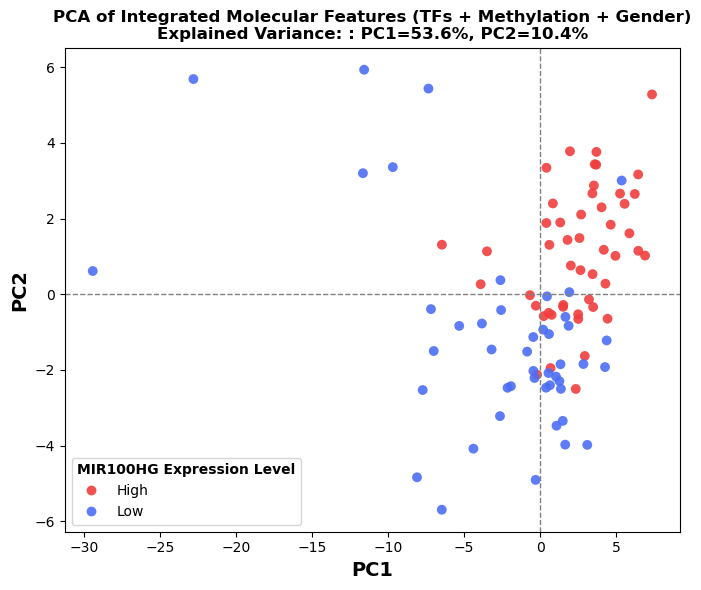

In [226]:
# Step 1: Data Loading and Basic Preprocessing
# Load the integrated dataset for PAAD including TFs, methylation, and gender
FILE_PATH = "Task1_Final_Integration_with_Methylation/Final_Integration_PAAD_with_Methylation.xlsx"
df = pd.read_excel(FILE_PATH)

# Encode gender numerically (FEMALE = 0, MALE = 1)
if "Gender" in df.columns:
    df["Gender_numeric"] = df["Gender"].map({"FEMALE": 0, "MALE": 1})
else:
    df["Gender_numeric"] = np.nan

# Ensure that MIR100HG expression group label is available
if "MIR100HG_Expression_Level_PAAD" not in df.columns:
    raise ValueError("Missing 'MIR100HG_Expression_Level_PAAD' column.")

# Select relevant features: transcription factors, methylation, and gender
feature_cols = [
    col for col in df.columns
    if col.startswith("tf_") or "_meth_PAAD" in col or col == "Gender_numeric"
]

# Remove samples that do not have MIR100HG grouping information
df = df.dropna(subset=["MIR100HG_Expression_Level_PAAD"])

# Apply mean imputation to fill in missing feature values
df_features = df[feature_cols].copy().fillna(df[feature_cols].mean())

# Output the shape of the dataset after preprocessing
print(f"After imputation: {df_features.shape[0]} samples x {df_features.shape[1]} features")

# Step 2: Z-score Standardization, PCA, and Visualization
# Apply Z-score normalization to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Perform PCA to reduce feature space to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA-transformed coordinates
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"], index=df_features.index)
df_pca["MIR100HG_Group"] = df.loc[df_features.index, "MIR100HG_Expression_Level_PAAD"]

# Compute PCA loadings for each original feature
loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_cols,
    columns=["PC1_loading", "PC2_loading"]
)

# Create PCA scatter plot colored by MIR100HG expression level
plt.figure(figsize=(7, 6))
scatter = sns.scatterplot(
    data=df_pca, x="PC1", y="PC2", hue="MIR100HG_Group",
    palette = {"Low": "#4c6ef5", "High": "#f03e3e"},
    s=50, alpha=0.9,
    edgecolor="none"
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axvline(0, color="gray", linestyle="--", linewidth=1)

# Set title and axis labels with explained variance
plt.title(f"PCA of Integrated Molecular Features (TFs + Methylation + Gender)\nExplained Variance: : PC1={pca.explained_variance_ratio_[0]*100:.1f}%, PC2={pca.explained_variance_ratio_[1]*100:.1f}%", fontweight="bold")
plt.xlabel("PC1", fontsize=14, fontweight="bold")
plt.ylabel("PC2", fontsize=14, fontweight="bold")
plt.tight_layout()

# Customize legend appearance and alignment
legend = scatter.legend_
if legend:
    legend.set_title("MIR100HG Expression Level", prop={"weight": "bold"})
    legend._legend_box.align = "left"

# Display the PCA plot
plt.show()

#### Subsection 16.2: PCA Loadings Reveal Key Molecular Contributors Differentiating MIR100HG Subgroups in PAAD

In this subsection, we investigate which molecular features most strongly influence the PCA-based separation between MIR100HG high and low expression subgroups in PAAD.
We compute the loadings of transcription factor expression, promoter methylation, and gender features on the first two principal components and visualize them using two types of heatmaps: a full-feature vertical matrix and a simplified horizontal heatmap that highlights the top 10 TFs along with promoter methylation and gender. These visualizations help identify features driving the major axes of variance across the integrated molecular landscape.

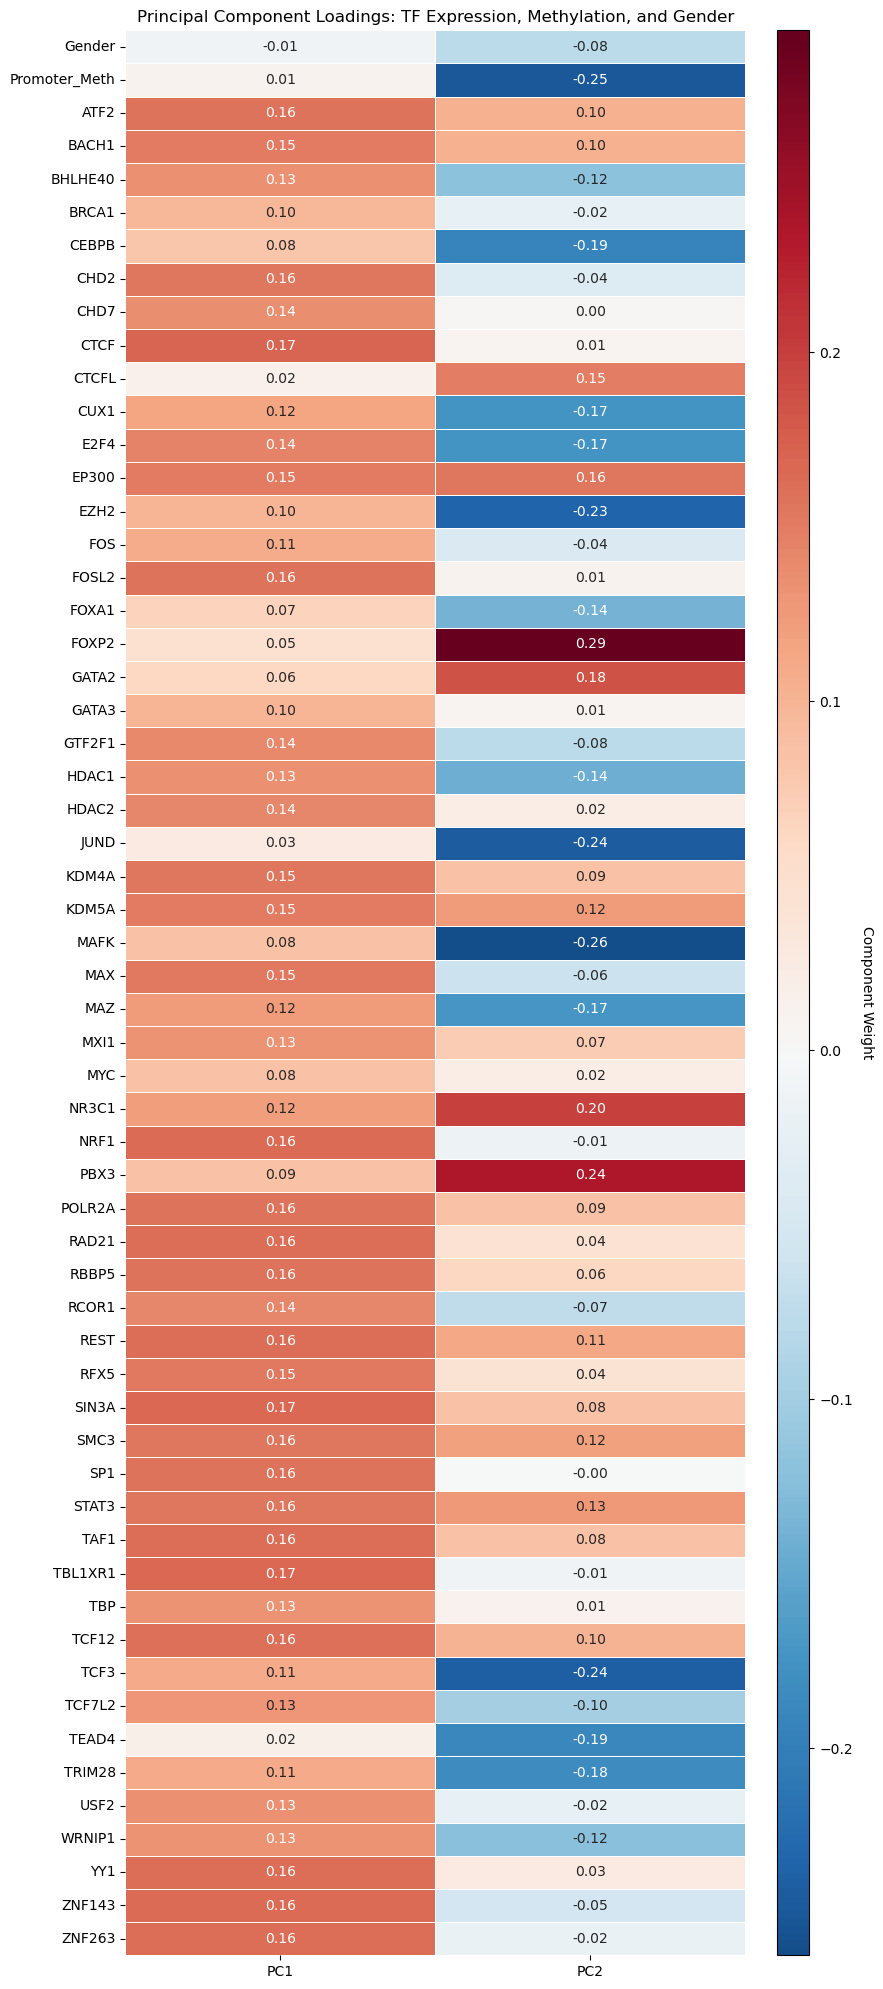

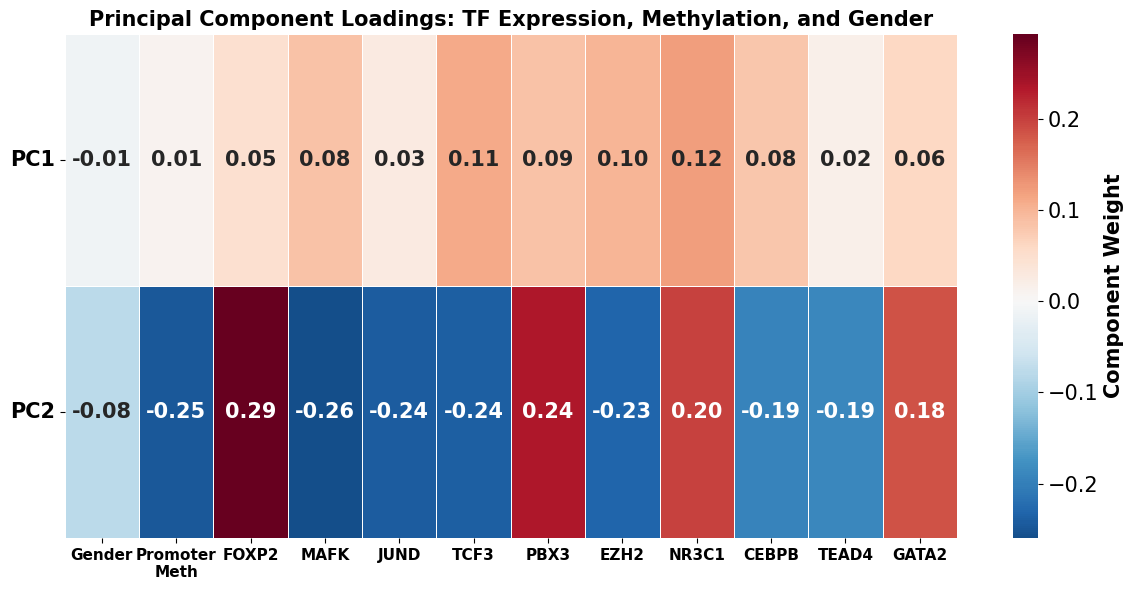

In [229]:
# Step1: Plot PCA Loadings graph (Full Feature, Vertical)
# Rename loading columns if they use default names from PCA object
if "PC1_loading" in loadings.columns:
    loadings.rename(columns={"PC1_loading": "PC1", "PC2_loading": "PC2"}, inplace=True)

# Define a function to simplify long or technical feature names
def simplify_feature_name(feature):
    if feature == "Gender_numeric":
        return "Gender"
    elif feature.startswith("tf_"):
        return feature.replace("tf_", "").replace("_expr_PAAD", "")
    elif feature == "promoter(chr11:121971160-121972159)_meth_PAAD":
        return "Promoter_Meth"
    else:
        return feature

# Apply the name simplification to all features
loadings["Feature_Name"] = loadings.index.map(simplify_feature_name)

# Build a matrix with simplified feature names as rows, PC1/PC2 as columns
plot_data = loadings.set_index("Feature_Name")[["PC1", "PC2"]]

# Reorder the matrix: Gender first, then Promoter_Meth, then alphabetically by TF
first_rows = ["Gender", "Promoter_Meth"]
rest_rows = sorted([r for r in plot_data.index if r not in first_rows])
ordered_rows = first_rows + rest_rows if all(r in plot_data.index for r in first_rows) else plot_data.index.tolist()
plot_data = plot_data.loc[ordered_rows]

# Create a vertical heatmap of PCA loadings for all features
fig, ax = plt.subplots(figsize=(8, 25))
heatmap = sns.heatmap(
    plot_data,
    ax=ax,
    annot=True, fmt=".2f",
    cmap="RdBu_r", center=0,
    cbar=False,
    linewidths=0.5, linecolor='white'
)

# Add a custom, narrow colorbar on the right
cbar_ax = fig.add_axes([0.94, 0.11, 0.04, 0.77])
cbar = fig.colorbar(heatmap.collections[0], cax=cbar_ax)
cbar.set_label("Component Weight", rotation=270, labelpad=15)

# Format the axes and layout
ax.set_title("Principal Component Loadings: TF Expression, Methylation, and Gender")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel("")
ax.set_ylabel("")
plt.subplots_adjust(right=0.9)
plt.show()


# Step2: Plot PCA Loadings graph (Selected Feature, Horizontal)
# Rename PCA loading columns if not already done
loadings.rename(columns={"PC1_loading": "PC1", "PC2_loading": "PC2"}, inplace=True)

# Redefine the simplification function to support line breaks
def simplify_feature_name(feature):
    if feature == "Gender_numeric":
        return "Gender"
    elif feature.startswith("tf_"):
        return feature.replace("tf_", "").replace("_expr_PAAD", "")
    elif feature == "promoter(chr11:121971160-121972159)_meth_PAAD":
        return "Promoter\nMeth"
    else:
        return feature

# Apply simplification with potential line breaks
loadings["Feature_Name"] = loadings.index.map(simplify_feature_name)

# Calculate max absolute loading across PC1/PC2 for feature ranking
loadings["max_abs_loading"] = loadings[["PC1", "PC2"]].abs().max(axis=1)

# Split features into categories: TFs, methylation, and gender
tf_mask = loadings.index.str.startswith("tf_")
meth_mask = loadings.index.str.contains("_meth_PAAD")
gender_mask = (loadings.index == "Gender_numeric")
df_tf = loadings[tf_mask].copy()
df_meth = loadings[meth_mask].copy()
df_gender = loadings[gender_mask].copy()

# Select top 10 TFs with largest loadings, plus gender and promoter methylation
top_tf = df_tf.nlargest(10, "max_abs_loading")
target_promoter = df_meth[df_meth["Feature_Name"].str.contains("Promoter")]
selected = pd.concat([df_gender, target_promoter, top_tf])

# Convert selected features to matrix: PCs as rows, features as columns
selected_plot = (
    selected
    .set_index("Feature_Name")[["PC1", "PC2"]]
    .T
)

# Reorder columns: Gender and Promoter_Meth first
ordered_cols = ["Gender", "Promoter\nMeth"]
other_cols = [c for c in selected_plot.columns if c not in ordered_cols]
selected_plot = selected_plot[ordered_cols + other_cols]

# Create horizontal heatmap showing loadings for top features
plt.figure(figsize=(1 * len(selected_plot.columns), 6))
ax = sns.heatmap( 
    selected_plot,
    annot=True, fmt=".2f",
    cmap="RdBu_r", center=0,
    cbar_kws={"label": "Component Weight"},
    linewidths=0.5, linecolor='white',
    annot_kws={"size": 15, "weight": "bold"}
)

# Format labels and axes
plt.title("Principal Component Loadings: TF Expression, Methylation, and Gender", fontsize=15, fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  
cbar.set_label("Component Weight", fontsize=15, fontweight='bold') 

plt.xticks(rotation=0, ha="center")
plt.yticks(rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Section 17: Identify Transcription Factors Regulating MIR100HG via Graph Traversal

In this section, we build a transcriptional regulatory network from TF–gene interactions, and identify which transcription factors (TFs) regulate the long non-coding RNA MIR100HG, either directly or indirectly.

We construct a directed graph where edges point from TFs to their target genes. Using breadth-first search (BFS), we compute the shortest path from each TF to MIR100HG, then classify the relationship as Direct, Indirect, or Unreachable, and assign a confidence score accordingly. This analysis helps interpret which TFs may be functionally connected to MIR100HG in a given regulatory context.

In [232]:
# Step 1: Build the directed graph representing TF to gene regulatory edges
def build_tf_gene_graph(df_edges):
    # Given df_edges with columns [gene, tf], build a directed graph (tf → gene)
    # Returns a dictionary where each TF maps to a set of downstream target genes
    graph = defaultdict(set)
    for _, row in df_edges.iterrows():
        tf_symbol = row["tf"]
        gene_symbol = row["gene"]
        if pd.notnull(tf_symbol) and pd.notnull(gene_symbol):
            graph[tf_symbol].add(gene_symbol)
    return graph

# Step 2: Define BFS algorithm to compute shortest TF → MIR100HG path
def bfs_find_distance(start_node, target_node="MIR100HG", graph=None):
    # Perform breadth-first search to find shortest path from a TF to the target gene
    # Returns the number of edges if reachable, otherwise returns None
    if start_node == target_node:
        return 0
    if (start_node not in graph) or (len(graph[start_node]) == 0):
        return None
    visited = set([start_node])
    queue = deque([(start_node, 0)])
    while queue:
        current_node, dist = queue.popleft()
        if current_node == target_node:
            return dist
        if current_node in graph:
            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, dist + 1))
    return None

# Step 3: Analyze all TFs and classify their relationship to MIR100HG
def analyze_tf_to_mir100hg(df_edges, target_gene="MIR100HG", max_distance=5, verbose=True):
    # Analyze each unique TF to determine if it regulates MIR100HG
    # Assign a regulation type (Direct, Indirect, Unreachable) and a confidence score
    graph = build_tf_gene_graph(df_edges)
    all_tfs = df_edges["tf"].dropna().unique()
    results = []
    for tf_symbol in all_tfs:
        dist = bfs_find_distance(tf_symbol, target_node=target_gene, graph=graph)
        if dist is None:
            regtype = "Unreachable"
            conf = 0.0
        else:
            if dist == 1:
                regtype = "Direct"
            else:
                regtype = "Indirect"
            dist = int(dist)
            if dist == 0:
                conf = 1.0
                regtype = "Self?"
            else:
                conf = round(1.0 / dist, 3) if dist <= max_distance else round(1.0 / max_distance, 3)
        results.append((tf_symbol, dist, regtype, conf))
    df_out = pd.DataFrame(results, columns=["TF", "Distance", "RegulationType", "Confidence"])
    if verbose:
        n_direct = df_out.query("RegulationType=='Direct'").shape[0]
        n_indirect = df_out.query("RegulationType=='Indirect'").shape[0]
        n_unreach = df_out.query("RegulationType=='Unreachable'").shape[0]
        print(f"\nTotal TFs evaluated: {len(all_tfs)}")
        print(f"Direct regulators of MIR100HG (distance = 1): {n_direct}")
        print(f"Indirect regulators (distance > 1): {n_indirect}")
        print(f"Unreachable in network: {n_unreach}")
        direct_list = df_out.query("RegulationType=='Direct'")["TF"].tolist()
        indirect_list = df_out.query("RegulationType=='Indirect'")["TF"].tolist()
        unreach_list = df_out.query("RegulationType=='Unreachable'")["TF"].tolist()
        print("\nDirect regulators list:")
        print(direct_list)
        print("\nIndirect regulators list:")
        print(indirect_list)
        print("\nUnreachable TF list:")
        print(unreach_list)
    return df_out

# Step 4: Run the TF → MIR100HG regulatory graph analysis and display results
df_tf_bfs = analyze_tf_to_mir100hg(df_edges, target_gene="MIR100HG", max_distance=5, verbose=True)
display(df_tf_bfs.head(20).style.hide(axis="index"))


Total TFs evaluated: 179
Direct regulators of MIR100HG (distance = 1): 56
Indirect regulators (distance > 1): 120
Unreachable in network: 3

Direct regulators list:
['ATF2', 'BACH1', 'BHLHE40', 'BRCA1', 'CEBPB', 'CHD2', 'CHD7', 'CTCF', 'CTCFL', 'CUX1', 'E2F4', 'EP300', 'EZH2', 'FOS', 'FOSL2', 'FOXA1', 'FOXP2', 'GATA2', 'GATA3', 'GTF2F1', 'HDAC1', 'HDAC2', 'JUND', 'KDM4A', 'KDM5A', 'MAFK', 'MAX', 'MAZ', 'MXI1', 'MYC', 'NR3C1', 'NRF1', 'PBX3', 'POLR2A', 'RAD21', 'RBBP5', 'RCOR1', 'REST', 'RFX5', 'SIN3A', 'SMC3', 'SP1', 'STAT3', 'TAF1', 'TBL1XR1', 'TBP', 'TCF12', 'TCF3', 'TCF7L2', 'TEAD4', 'TRIM28', 'USF2', 'WRNIP1', 'YY1', 'ZNF143', 'ZNF263']

Indirect regulators list:
['ARID3A', 'ATF1', 'ATF3', 'BATF', 'BCL11A', 'BCL3', 'BCLAF1', 'BDP1', 'BRF1', 'CBX2', 'CBX3', 'CBX8', 'CCNT2', 'CEBPD', 'CEBPZ', 'CHD1', 'CHD4', 'CREB1', 'CREBBP', 'CTBP2', 'E2F1', 'E2F6', 'EBF1', 'EGR1', 'ELF1', 'ELK1', 'ELK4', 'ESR1', 'ESRRA', 'ETS1', 'FLI1', 'FOSL1', 'FOXA2', 'FOXM1', 'GABPA', 'GATA1', 'GTF2B', 'GTF3C